# 진행사항
- 일단위로 진행하기엔 무리가 있을듯 하여, 월 단위로 분석을 진행할 예정입니다.
# 분석 진행 사항
- 애자일 방식으로 진행 예정, 틀을 정하지 않고서 자유로운 분석을 추구했습니다.
    - 이번 리포트는 도메인 지식을 쌓는 시간으로 정했습니다.
    - 데이터 전처리에 신경을 많이 쓰고, 최대한 데이터를 파악하려고 합니다.
- 중간고사 리포트는 EDA와 시각화를 통한 추세파악 진행예정
- 유통 데이터와 기상 데이터를 사용할 예정
- 세부적으로 경기도 권역만 분석을 실시할 예정
- 그 외 서울과 인천 지역은 지역별 판매량 시각화와 날짜별 판매량 시각화 총 두개만 진행 후 더이상 진행하지 않을 예정

# 추후 진행 방안

- 세부적으로 경기도 광주시와 경기도 성남시의 판매를 통계학적으로 비교하고, 가설을 세워서 검증할 예정
    - ex) 라면판매량은 경기광주시와 경기성남시의 차이가 없다.
    - ex2) 날씨가 추워지면 라면판매량이 증가할까?

# 에로사항
- GS25.csv의 데이터중 법정구역이 합쳐져있음, 기존에 집계 처리가 되어있는 상태여서 복구할 수 없음
- 날씨 데이터와 병합하여 분석할 예정이여서 삭제하고 진행 하였습니다.
  - '가평군양평군'
  - '여주시이천시'
  - '연천군포천군'
  - '오산시안성시평택시'



# Data Load
 - Library load

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [18, 12]
plt.rcParams['font.family'] = 'NanumGothic'
from statannot import add_stat_annotation
import numpy as np
from scipy import stats

In [2]:
gs25 = pd.read_csv('GS25.csv',encoding='cp949')

In [3]:
data_w = pd.read_csv('기상데이터.csv',encoding='cp949')

# Data Validation

# GS25 데이터 확인

- 전체 판매량

In [4]:
gs25['date_year'] = gs25['korea_cvs.sale_dt'].astype(str).str[:4]

In [5]:
print('총 판매량 : ',len(gs25), '\n'
    '2017년 판매량 : ',len(gs25[gs25['date_year'] == '2016']),'비율 : ',
      round(len(gs25[gs25['date_year'] == '2016'])/len(gs25)*100,2),'%', '\n'
      '2018년 판매량 : ',len(gs25[gs25['date_year'] == '2017']),'비율 : ',
      round(len(gs25[gs25['date_year'] == '2017'])/len(gs25)*100,2),'%' '\n'
      '2019년 판매량 : ',len(gs25[gs25['date_year'] == '2018']),'비율 : ',
      round(len(gs25[gs25['date_year'] == '2018'])/len(gs25)*100,2),'%')

총 판매량 :  2707786 
2017년 판매량 :  923321 비율 :  34.1 % 
2018년 판매량 :  904207 비율 :  33.39 %
2019년 판매량 :  880258 비율 :  32.51 %


- 성별 판매량

In [6]:
print('총 판매량 : ',len(gs25), '\n'
    '여성 판매량 : ',len(gs25[gs25['korea_cvs.gen_cd'] == 'F']),'비율 : ',
      round(len(gs25[gs25['korea_cvs.gen_cd'] == 'F'])/len(gs25)*100,2),'%', '\n'
      '남성 판매량 : ',len(gs25[gs25['korea_cvs.gen_cd'] == 'M']),'비율 : ',
      round(len(gs25[gs25['korea_cvs.gen_cd'] == 'M'])/len(gs25)*100,2),'%')

총 판매량 :  2707786 
여성 판매량 :  1442960 비율 :  53.29 % 
남성 판매량 :  1264826 비율 :  46.71 %


- 연령별 판매량

In [7]:
age_list = list(set(gs25['korea_cvs.age_cd']))
age_list.sort()
age_list

['00~19', '20~39', '40~59', '60~99']

In [8]:
print('총 판매량 : ',len(gs25), '\n'
    '00~19 : ',len(gs25[gs25['korea_cvs.age_cd'] == age_list[0]]),'비율 : ',
      round(len(gs25[gs25['korea_cvs.age_cd'] == age_list[0]])/len(gs25)*100,2),'%', '\n'
      '20~39 : ',len(gs25[gs25['korea_cvs.age_cd'] == age_list[1]]),'비율 : ',
      round(len(gs25[gs25['korea_cvs.age_cd'] == age_list[1]])/len(gs25)*100,2),'%', '\n'
     '40~59 : ',len(gs25[gs25['korea_cvs.age_cd'] == age_list[2]]),'비율 : ',
      round(len(gs25[gs25['korea_cvs.age_cd'] == age_list[2]])/len(gs25)*100,2),'%', '\n'
     '60~99 : ',len(gs25[gs25['korea_cvs.age_cd'] == age_list[3]]),'비율 : ',
      round(len(gs25[gs25['korea_cvs.age_cd'] == age_list[3]])/len(gs25)*100,2),'%', '\n') 

총 판매량 :  2707786 
00~19 :  389610 비율 :  14.39 % 
20~39 :  1118350 비율 :  41.3 % 
40~59 :  924433 비율 :  34.14 % 
60~99 :  275393 비율 :  10.17 % 



- 카테고리별 판매량

In [9]:
category_list = list(set(gs25['korea_cvs.category']))
category_list.sort()
category_list

['과자',
 '라면',
 '마스크',
 '맥주',
 '면도기',
 '생리대',
 '생수',
 '숙취해소제',
 '스타킹',
 '아이스크림',
 '우산',
 '탄산음료']

In [11]:
category_rank = dict()
print('총 판매량 : ',len(gs25))
for category in category_list:
    print('{} : '.format(category),len(gs25[gs25['korea_cvs.category'] == category]),
          '비율 : ',round(len(gs25[gs25['korea_cvs.category'] == category])/len(gs25)*100,2),'%')
    category_rank[category] = round(len(gs25[gs25['korea_cvs.category'] == category])/len(gs25)*100,2)

총 판매량 :  2707786
과자 :  428685 비율 :  15.83 %
라면 :  413521 비율 :  15.27 %
마스크 :  65748 비율 :  2.43 %
맥주 :  313128 비율 :  11.56 %
면도기 :  51970 비율 :  1.92 %
생리대 :  158116 비율 :  5.84 %
생수 :  310041 비율 :  11.45 %
숙취해소제 :  184866 비율 :  6.83 %
스타킹 :  103876 비율 :  3.84 %
아이스크림 :  318908 비율 :  11.78 %
우산 :  55153 비율 :  2.04 %
탄산음료 :  303774 비율 :  11.22 %


In [12]:
category_df = pd.DataFrame([category_rank], index = ['판매량(%)']).T

In [13]:
category_df = category_df.sort_values('판매량(%)',ascending=False)

In [14]:
category_df

판매량(%)
과자      15.83
라면      15.27
아이스크림   11.78
맥주      11.56
생수      11.45
탄산음료    11.22
숙취해소제    6.83
생리대      5.84
스타킹      3.84
마스크      2.43
우산       2.04
면도기      1.92

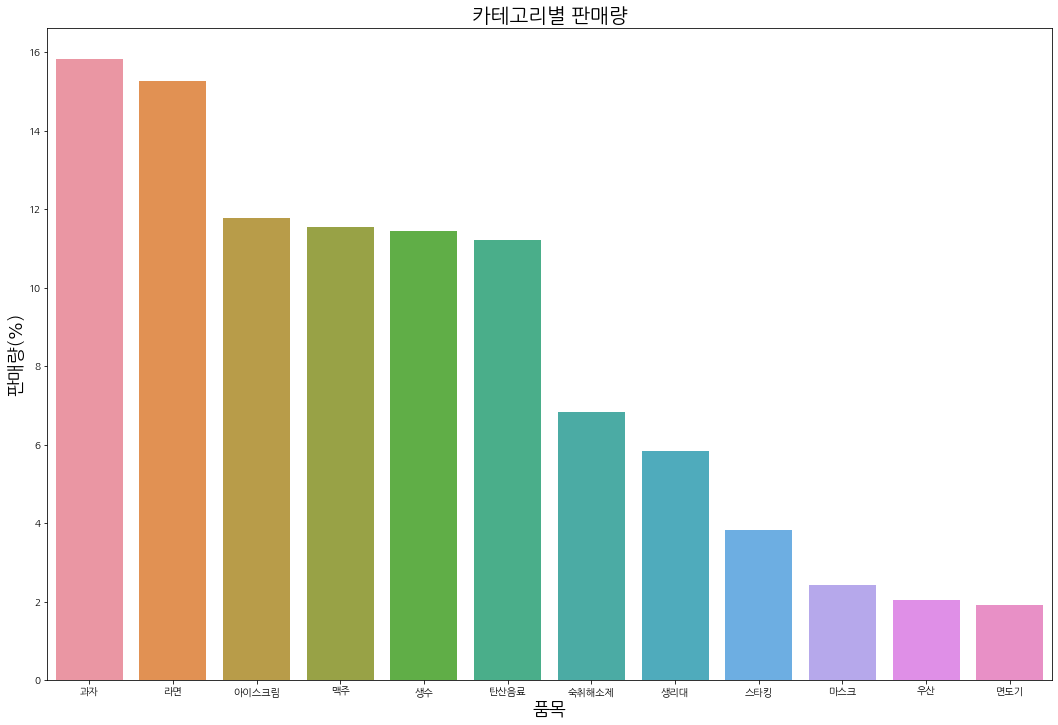

In [15]:
sns.barplot(x=category_df.index, y=category_df['판매량(%)'], data=category_df)
plt.title('카테고리별 판매량', fontsize=20)
plt.ylabel('판매량(%)', fontsize=18)
plt.xlabel('품목', fontsize=18)
plt.show()

# 기상데이터 확인

In [16]:
data_w.columns=['관측일','관측번호','지역','법정동','최고기온','최대풍속','최소기온','평균기온', '평균상대습도','평균풍속', '합계강수량']

In [17]:
data_w['관측일(월)'] = (data_w['관측일'].astype(str).str[:6]).astype(int)

In [18]:
data_w['관측일'] = pd.to_datetime(data_w['관측일'],format="%Y%m%d")

In [19]:
weather_col = ['최고기온','최대풍속','최소기온','평균기온', '평균상대습도','평균풍속', '합계강수량']
def whether_line_visualizition(data_w,weather_col,x='관측일',title=''):
    for col in weather_col:
        ax = sns.lineplot(x=x, y=col ,hue='지역',data=data_w)

        plt.title('{0} 지역별 {1}'.format(title,col), fontsize=20)
        plt.ylabel('{}'.format(col), fontsize=14)
        plt.xlabel('Date', fontsize=14)
        plt.legend(fontsize=12, loc='best')

        plt.show()


KeyboardInterrupt: 

C:\Users\lyt09\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lyt09\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


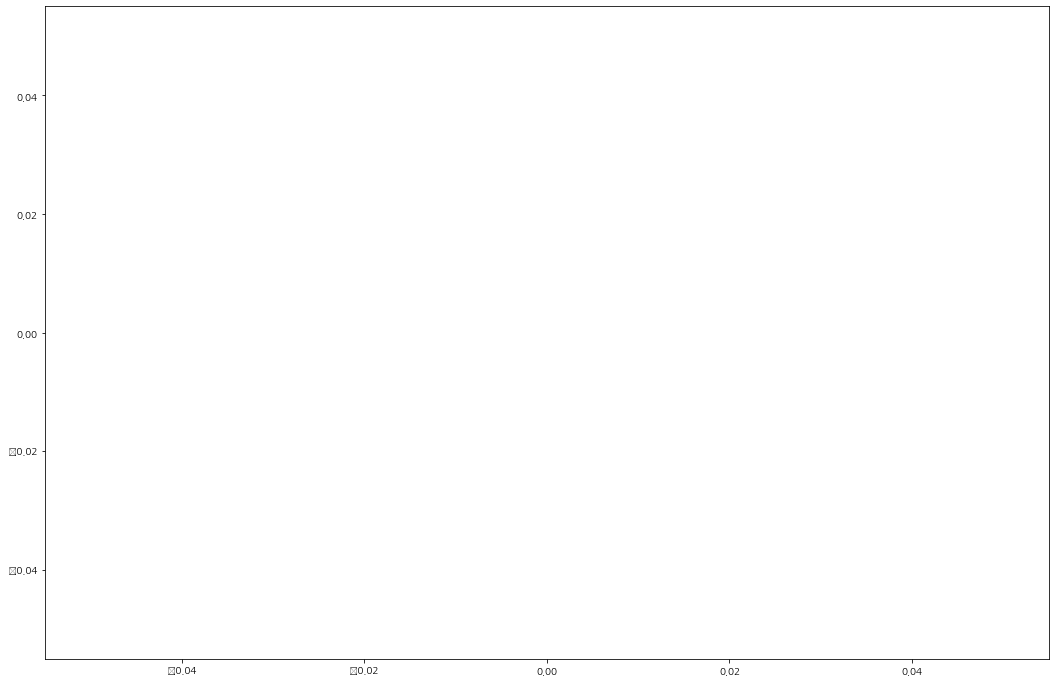

In [20]:
# 일별 그래프
whether_line_visualizition(data_w,weather_col,title='일별')

In [ ]:
groupby_data_w = data_w.groupby(['지역','관측일(월)']).mean().reset_index()

groupby_data_w['관측일(월)'] = pd.to_datetime(groupby_data_w['관측일(월)'],format="%Y%m")

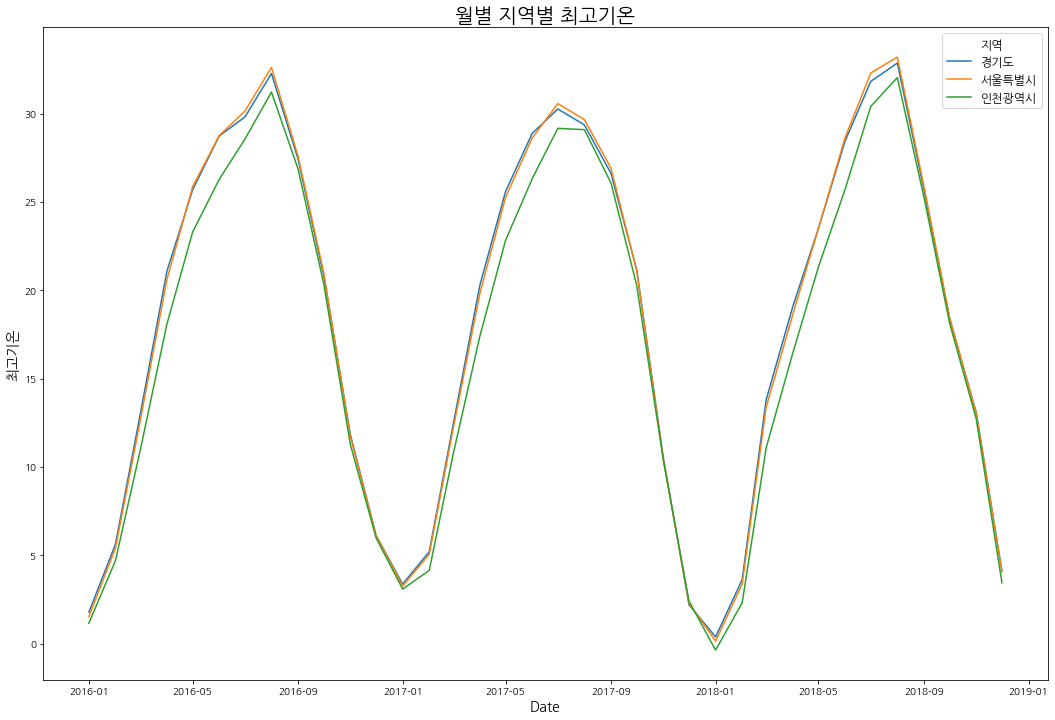

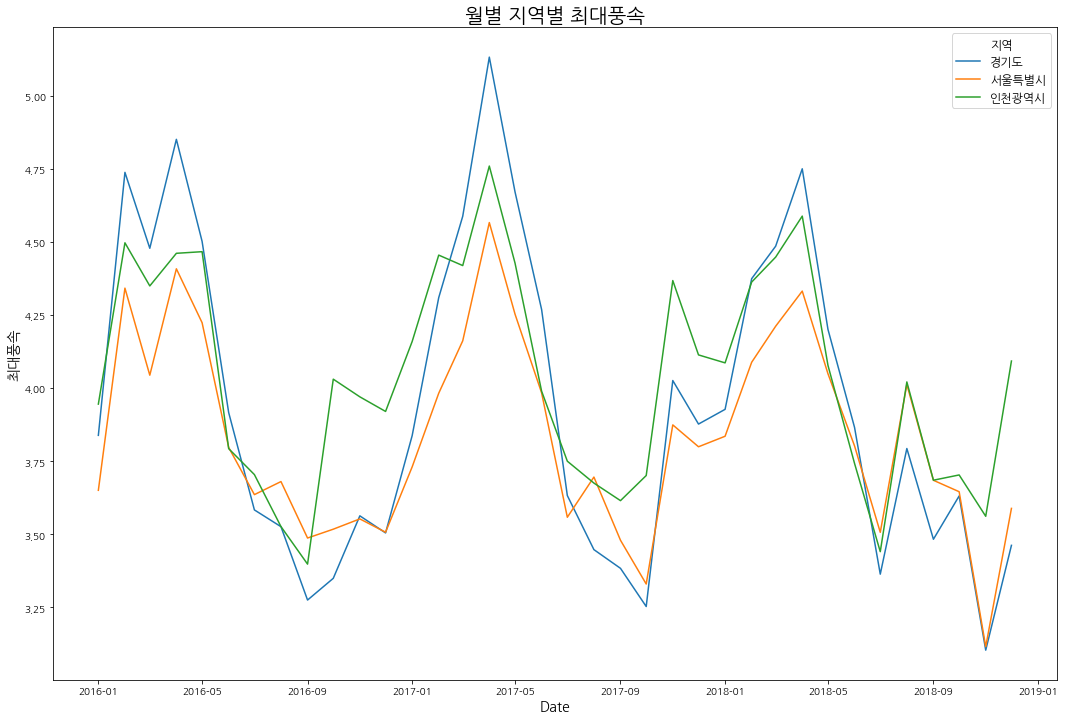

C:\Users\lyt09\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lyt09\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


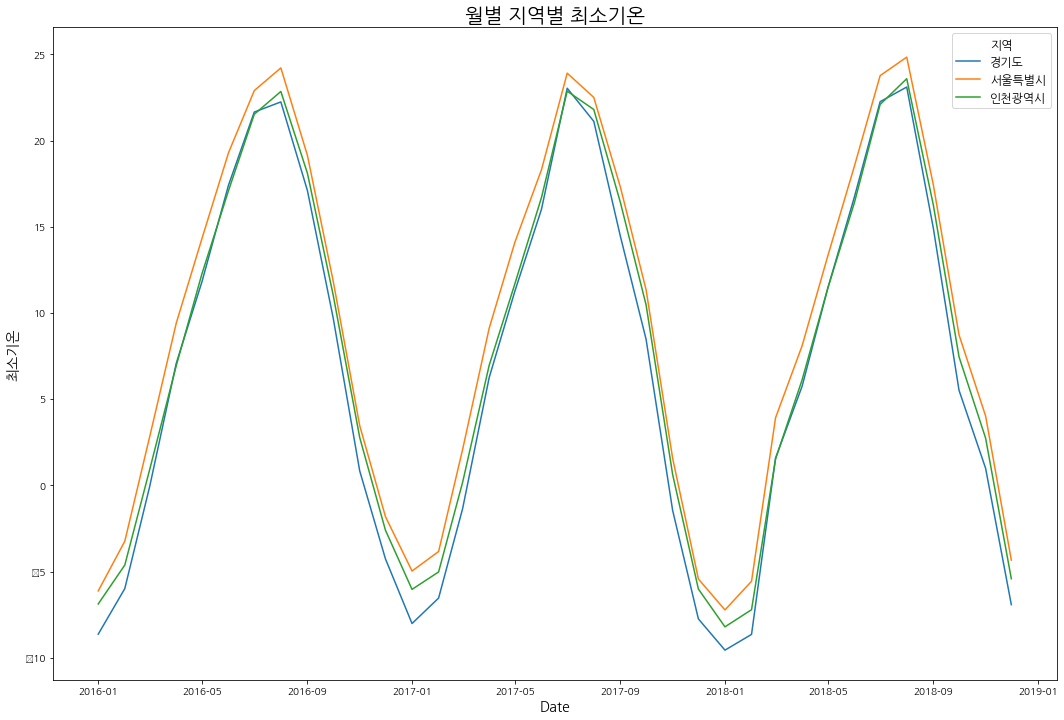

C:\Users\lyt09\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\lyt09\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


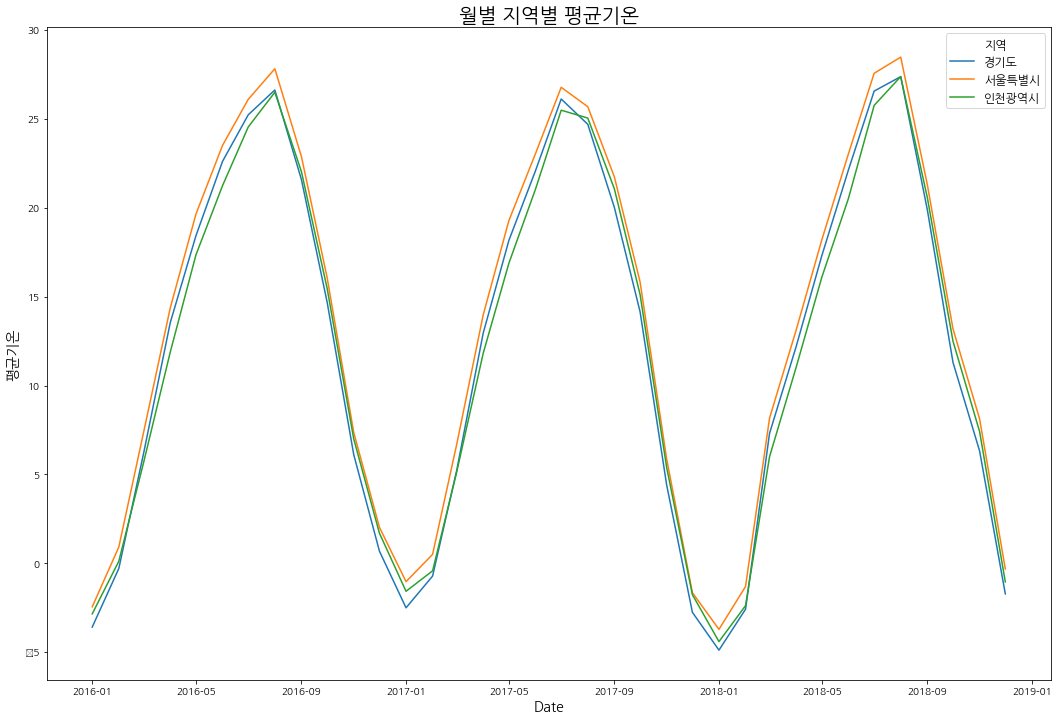

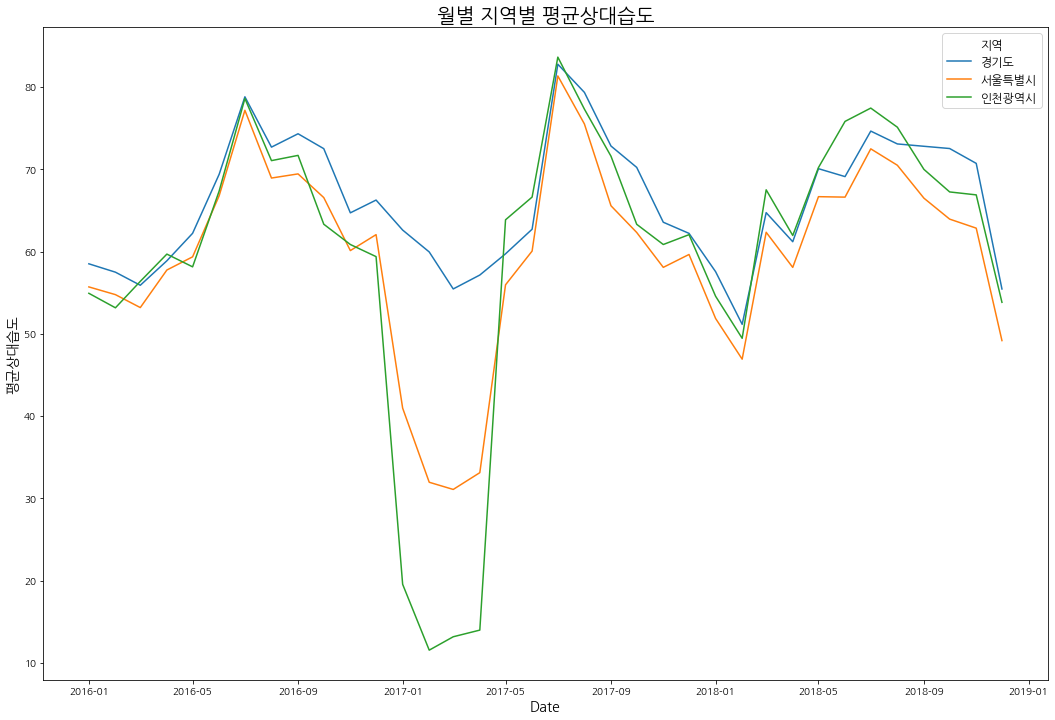

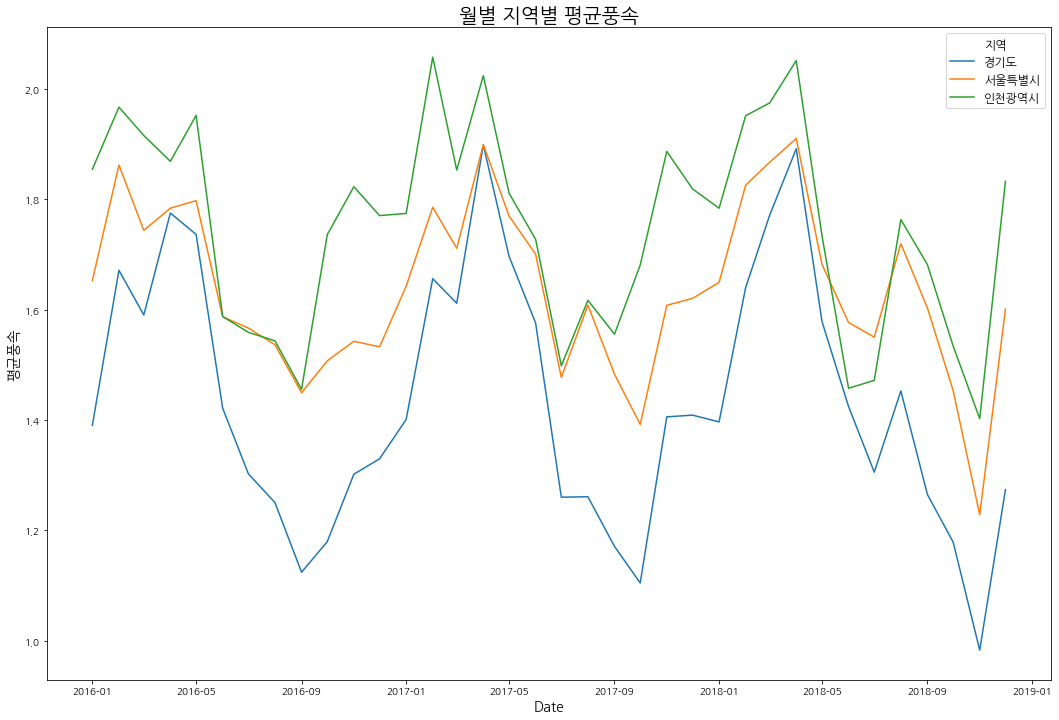

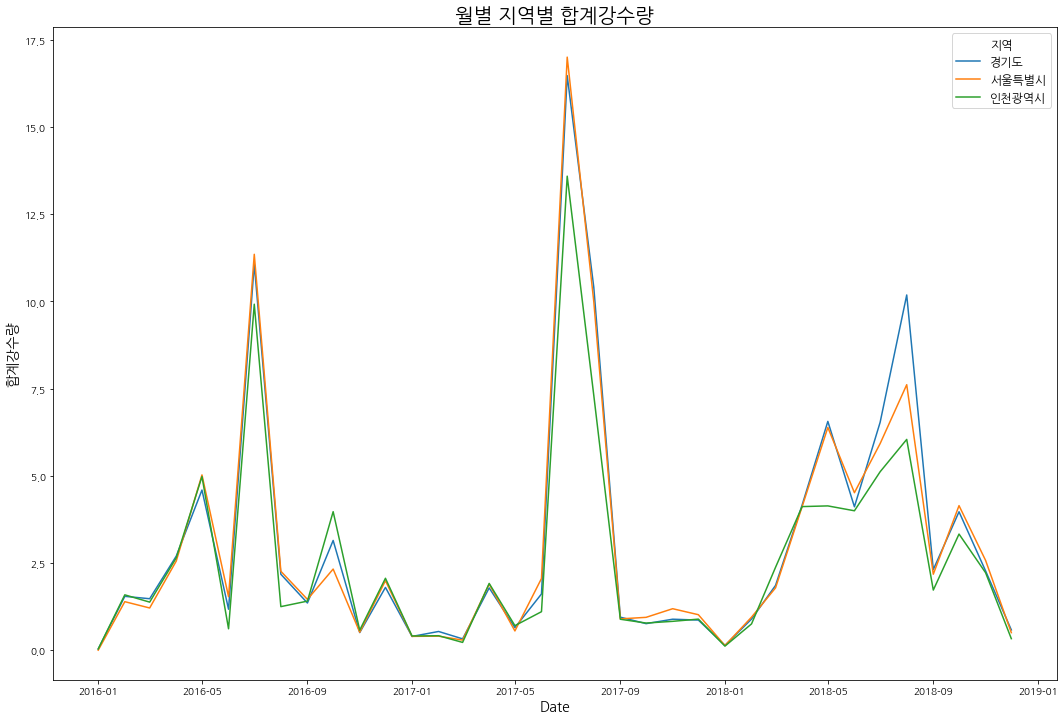

In [23]:
# 월별 그래프
whether_line_visualizition(groupby_data_w,weather_col,x='관측일(월)',title='월별')

# Data Preprocessing

In [21]:
gs25['korea_cvs.sale_dt(month)'] = (gs25['korea_cvs.sale_dt'].astype(str).str[:6]).astype(int)

In [22]:
gs25 = gs25.drop('korea_cvs.sale_dt',axis=1)

In [23]:
# 데이터 집계 처리
gs25_month = gs25.groupby(['korea_cvs.pvn_nm','korea_cvs.sale_dt(month)','korea_cvs.gen_cd','korea_cvs.age_cd','korea_cvs.category','korea_cvs.bor_nm']).sum().reset_index()

In [24]:
data_w_mean=(data_w[['관측일(월)','법정동','최고기온','최대풍속',
         '최소기온','평균기온','평균풍속','합계강수량']].groupby(['관측일(월)','법정동']).mean().reset_index())

In [25]:
# 합쳐진 법정동 제외진행
gs25_month = gs25_month[(gs25_month['korea_cvs.bor_nm'] != '가평군양평군') &
                       (gs25_month['korea_cvs.bor_nm'] != '여주시이천시') &
                       (gs25_month['korea_cvs.bor_nm'] != '연천군포천군') &
                       (gs25_month['korea_cvs.bor_nm'] != '오산시안성시평택시')]

In [26]:
# 기온 데이터와 GS25데이터 조인
merge_data = pd.merge(gs25_month,data_w_mean,how='inner',left_on=['korea_cvs.sale_dt(month)','korea_cvs.bor_nm'],right_on=['관측일(월)','법정동'])

In [27]:
# 년 단위 추가
merge_data['korea_cvs.sale_dt(year)'] = (merge_data['korea_cvs.sale_dt(month)'].astype(str).str[:4]).astype(int)

# 지역분할

In [28]:
gyunggido = merge_data[merge_data['korea_cvs.pvn_nm'] == '경기도']
seoul = merge_data[merge_data['korea_cvs.pvn_nm'] == '서울특별시']
incheon = merge_data[merge_data['korea_cvs.pvn_nm'] == '인천광역시']

In [29]:
gyunggido_area_list = list(set(gyunggido['korea_cvs.bor_nm']))
seoul_area_list = list(set(seoul['korea_cvs.bor_nm']))
incheon_area_list = list(set(incheon['korea_cvs.bor_nm']))

# 날짜 분할


In [30]:
full_month = list(set(merge_data['korea_cvs.sale_dt(month)']))
full_month.sort()

In [31]:
# 201601~201812 월별로 분할
def month_slice(dataframe,full_month):
    month_slice = []
    for month in full_month:
        month_slice.append(dataframe[dataframe['korea_cvs.sale_dt(month)'] == month])
    return month_slice

In [32]:
gyunggido_month_slice = month_slice(gyunggido,full_month)
seoul_month_slice = month_slice(seoul,full_month)
incheon_month_slice = month_slice(incheon,full_month)

# 지역 세분화

In [33]:
# 지역별 dictionary 생성
def area_slice(dataframe,area_list):
    area_dict = dict()
    for area in area_list:
        area_dict[area] = dataframe[dataframe['korea_cvs.bor_nm'] == area]
    return area_dict

In [34]:
gyunggido_area = area_slice(gyunggido,gyunggido_area_list)
seoul_area = area_slice(seoul,seoul_area_list)
incheon_area = area_slice(incheon,incheon_area_list)

In [35]:
temp = (gyunggido_area['광주시'][['korea_cvs.sale_dt(month)','최고기온','최대풍속',
                        '최소기온','평균기온','평균풍속','합계강수량']]).drop_duplicates('korea_cvs.sale_dt(month)')

In [36]:
temp.index = temp['korea_cvs.sale_dt(month)']

# 시각화 (지역별)

In [58]:
def visualization_area(dataframe_dict,area_list,x='korea_cvs.category',y='korea_cvs.adj_qty',category=str('korea_cvs.gen_cd')):
    plt.rcParams['figure.figsize'] = [20, 8]
    for area in area_list:
        for year in [2016,2017,2018]:
            sns.boxplot(x=x, y=y, hue=category, data=gyunggido_area[area][gyunggido_area[area]['korea_cvs.sale_dt(year)'] == year])

            plt.ylabel('Count', fontsize=18)
            plt.xlabel('품목', fontsize=18)

            plt.title('{0} 년도 {1} 판매량 '.format(year,area), fontsize=20)
            plt.legend(fontsize=14,loc='upper right')

            plt.show()

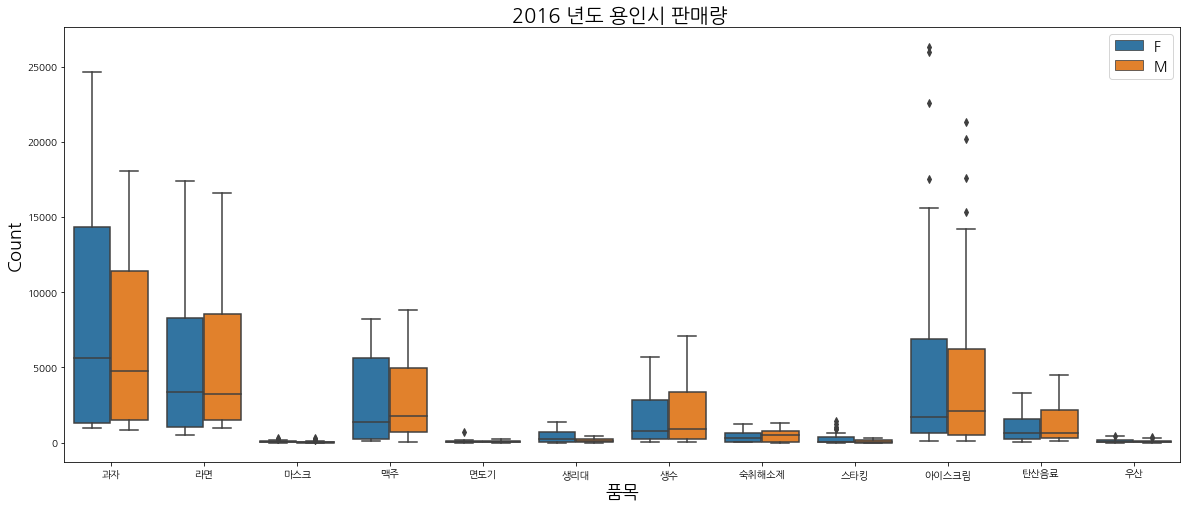

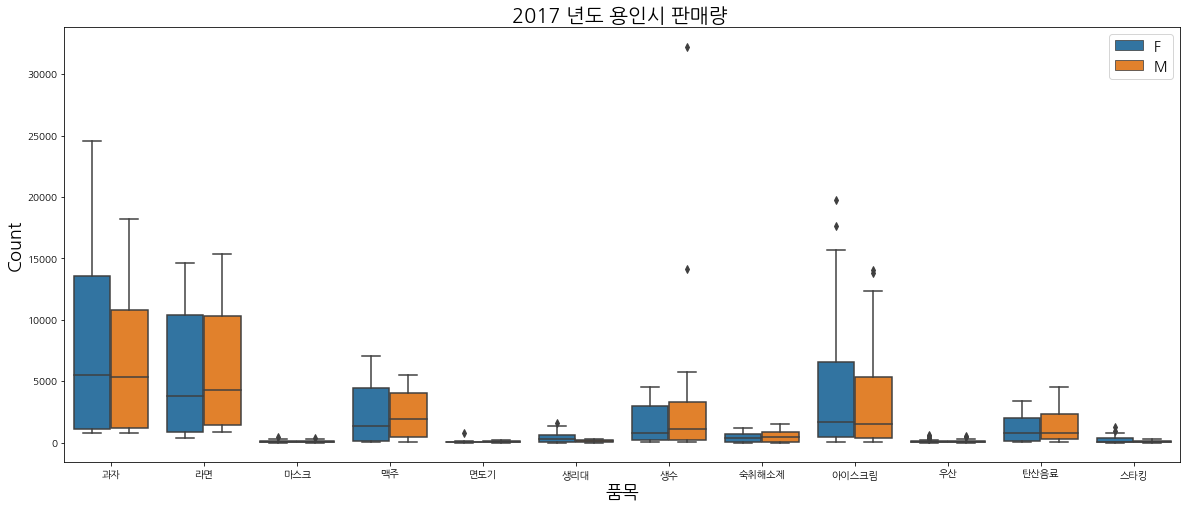

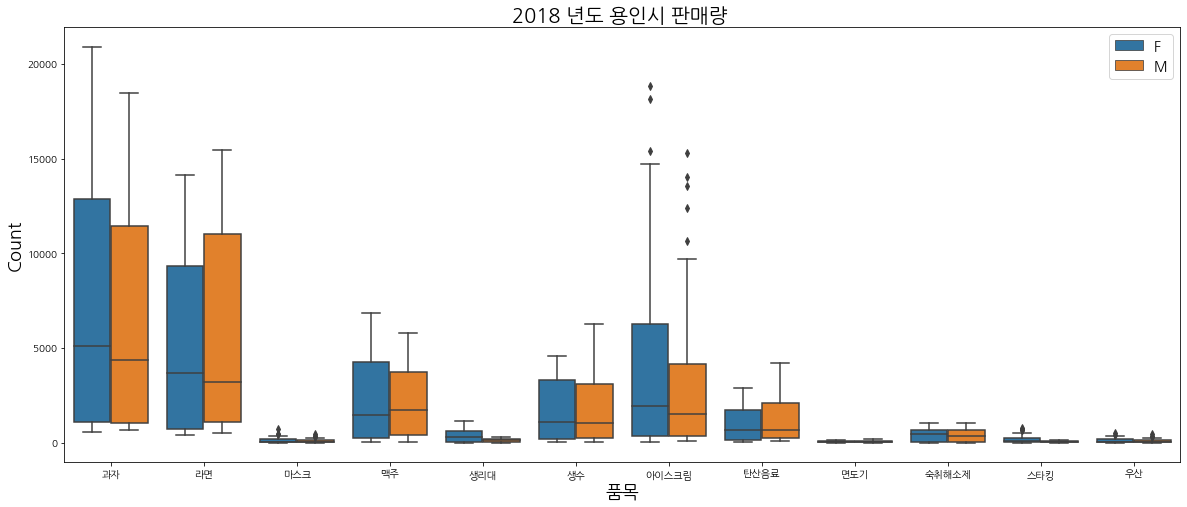

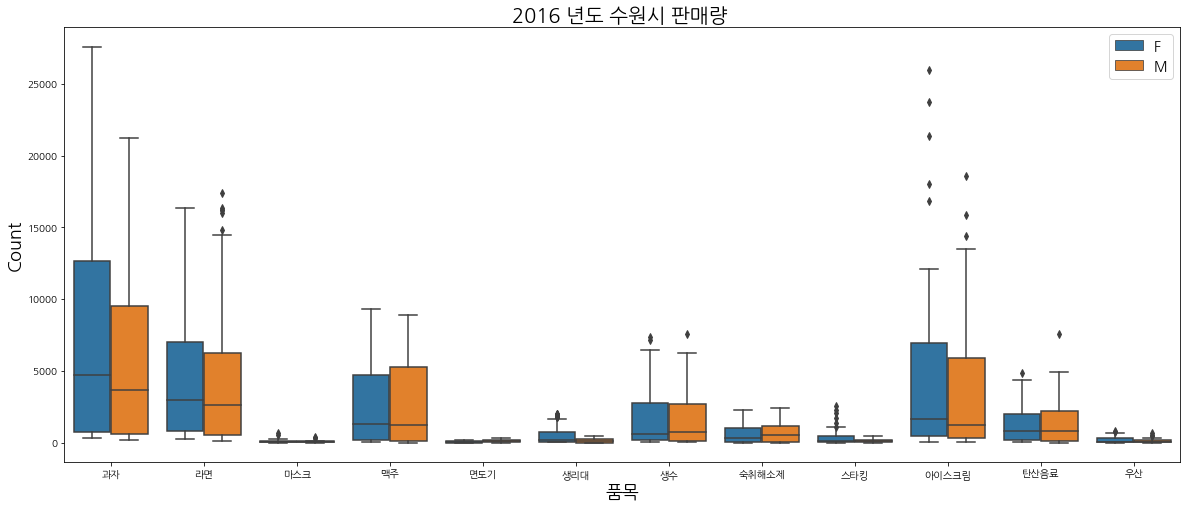

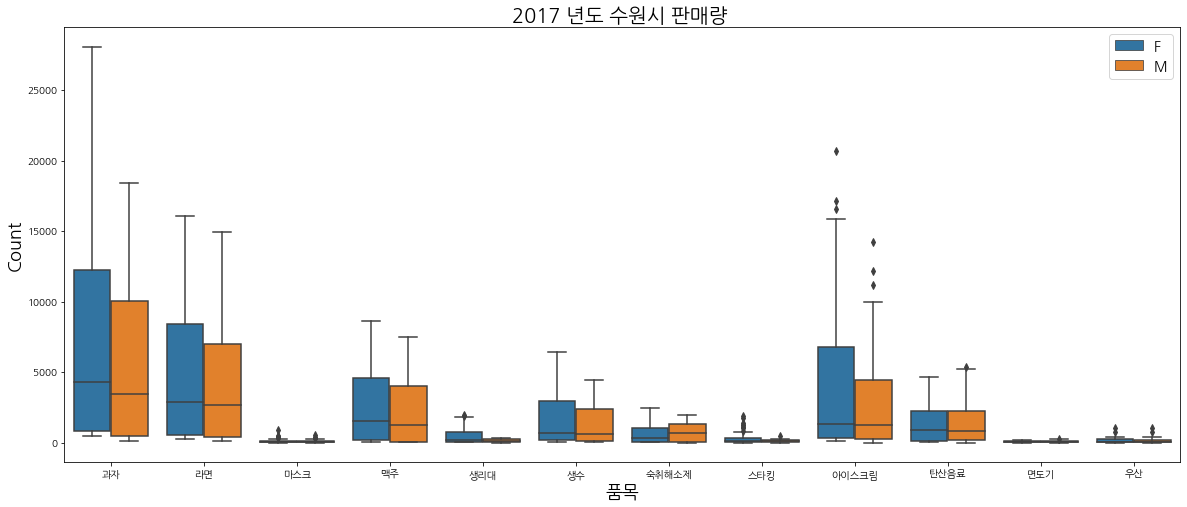

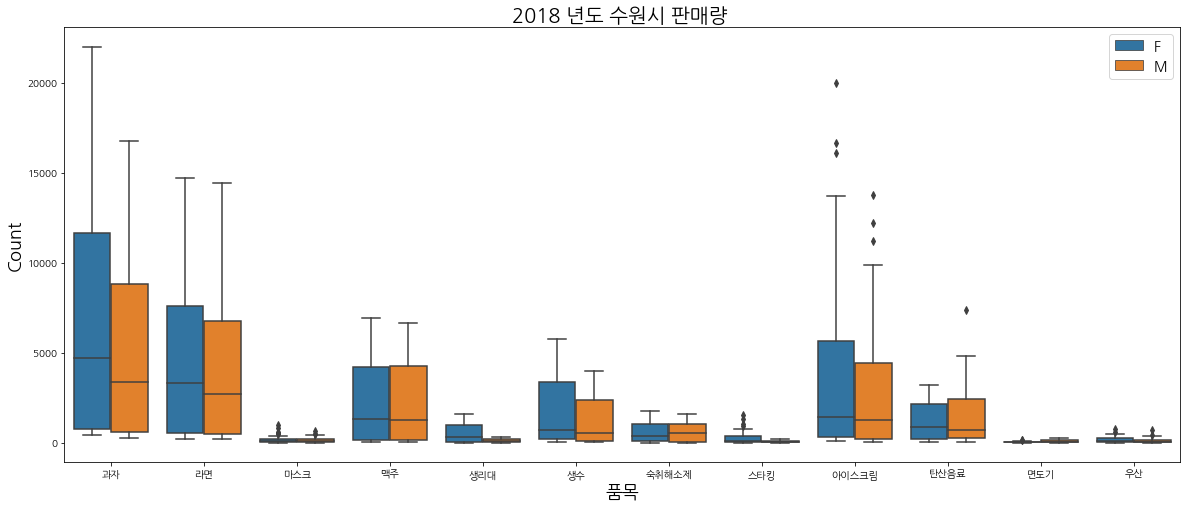

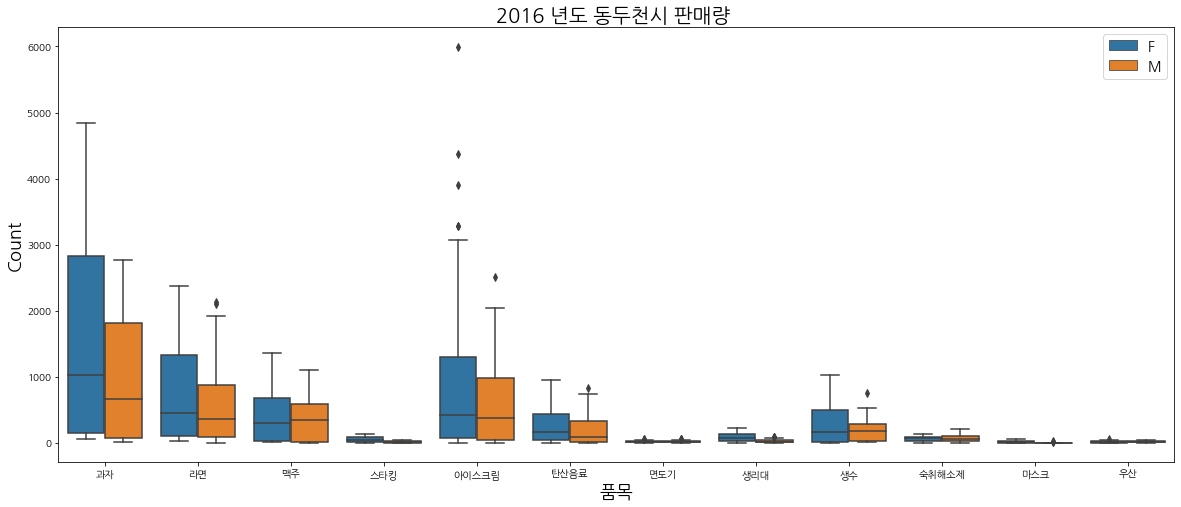

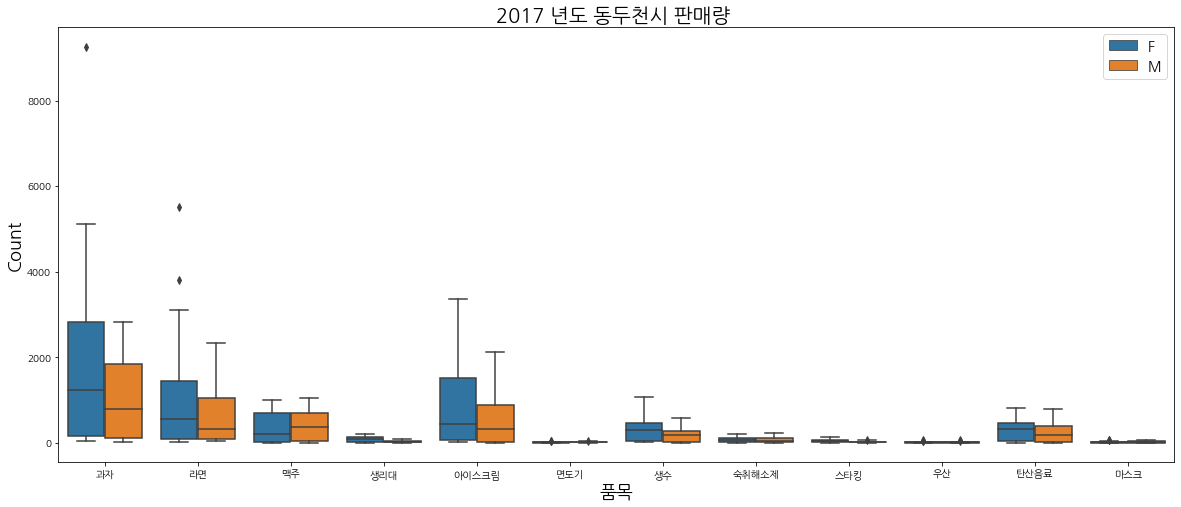

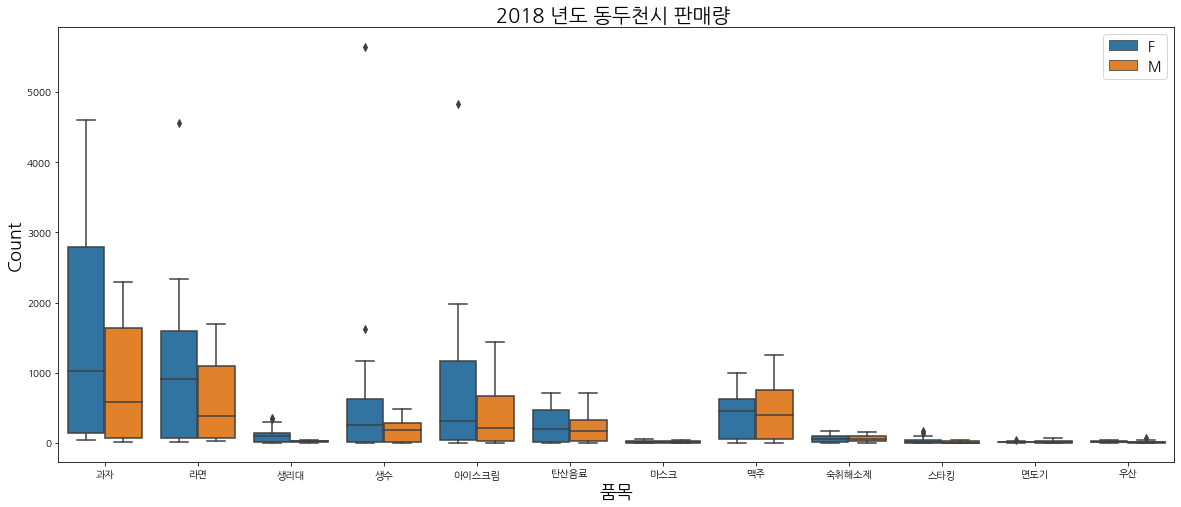

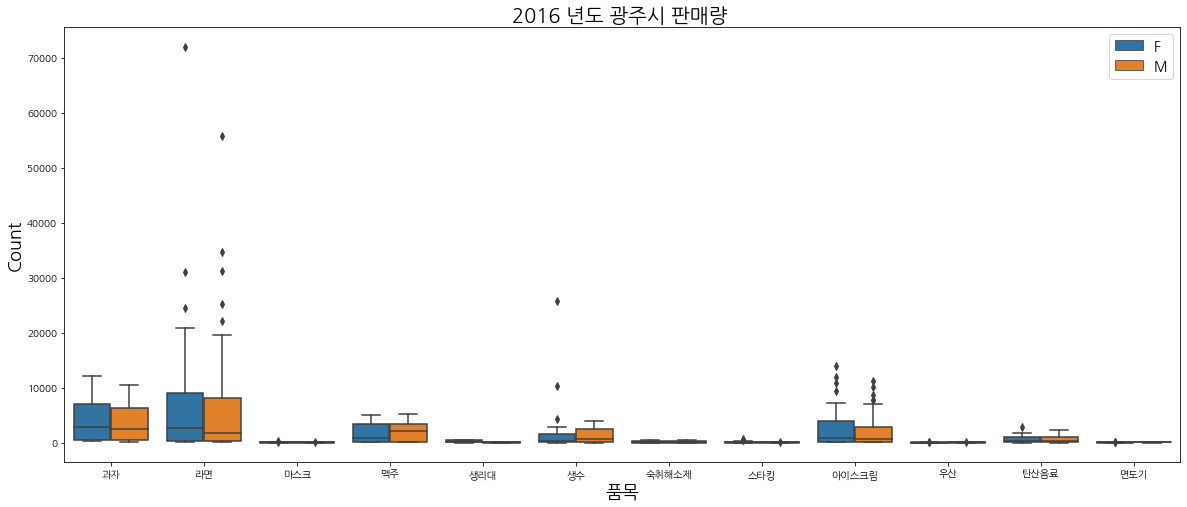

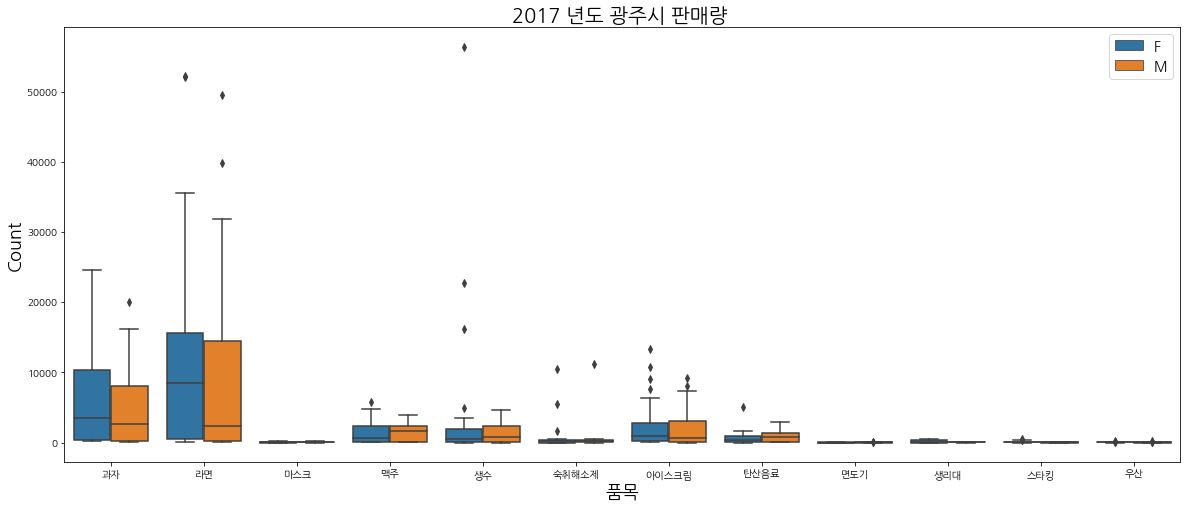

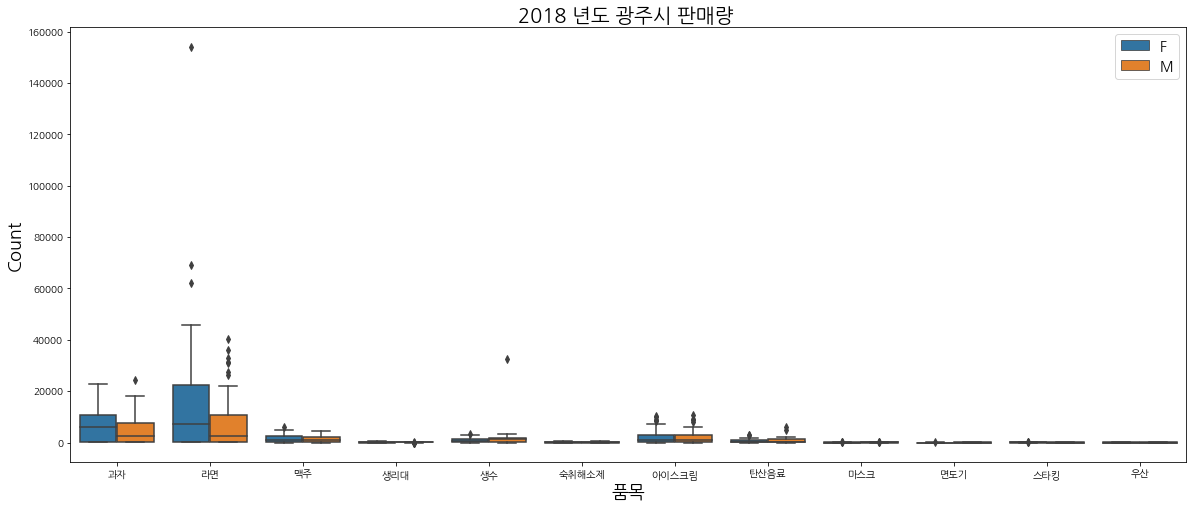

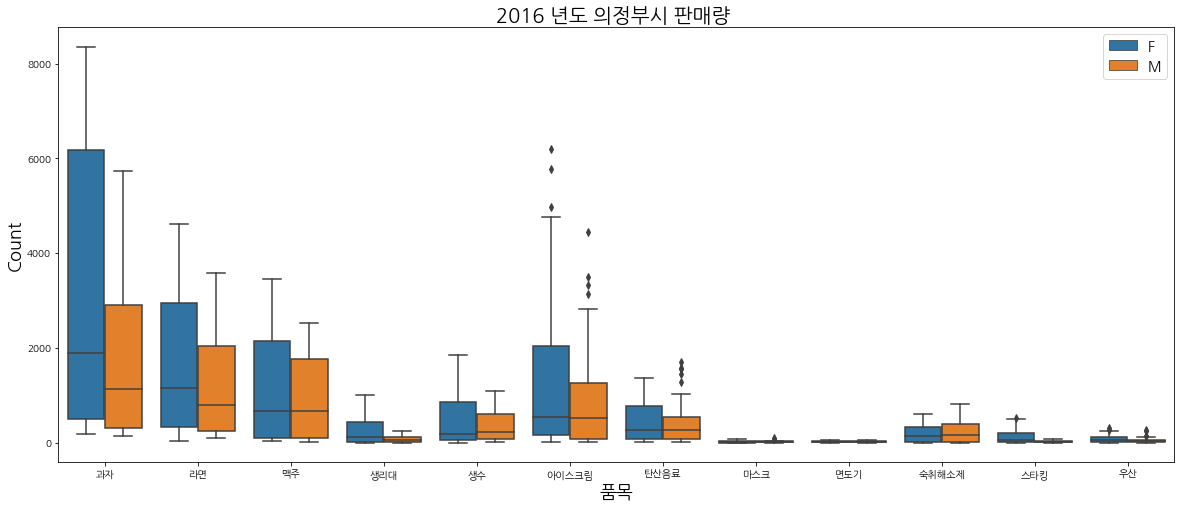

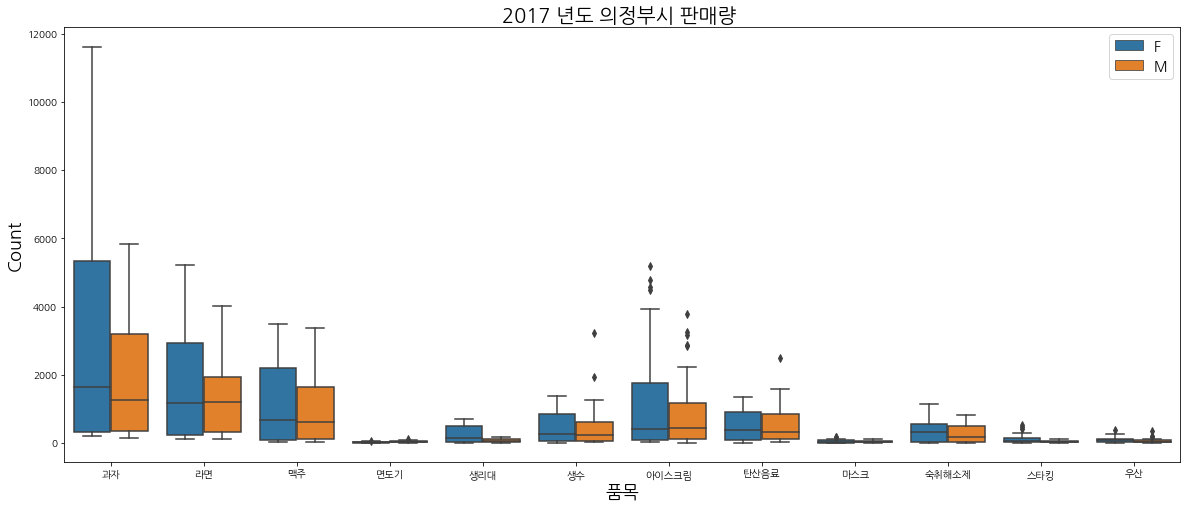

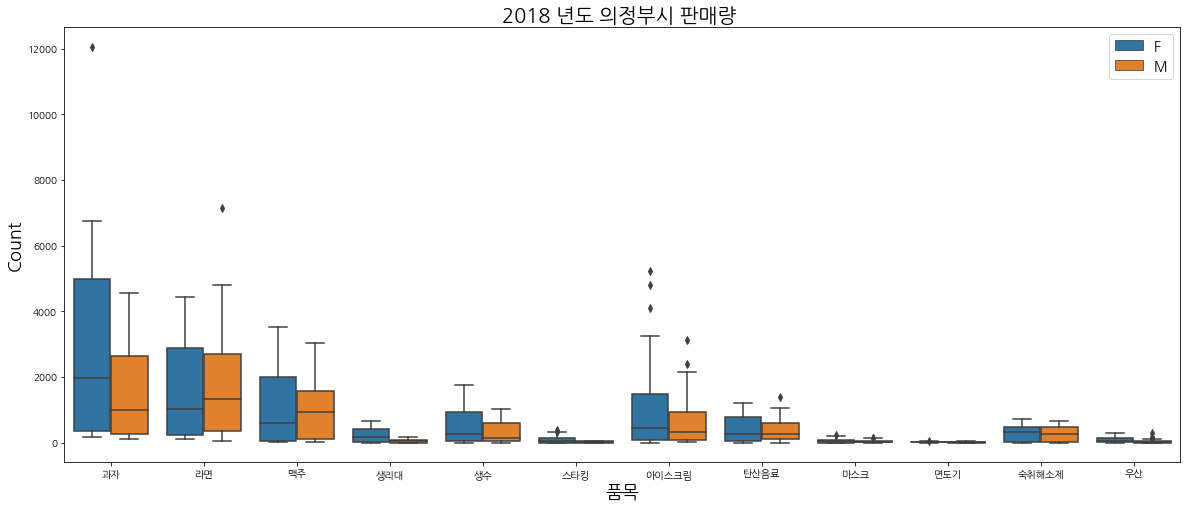

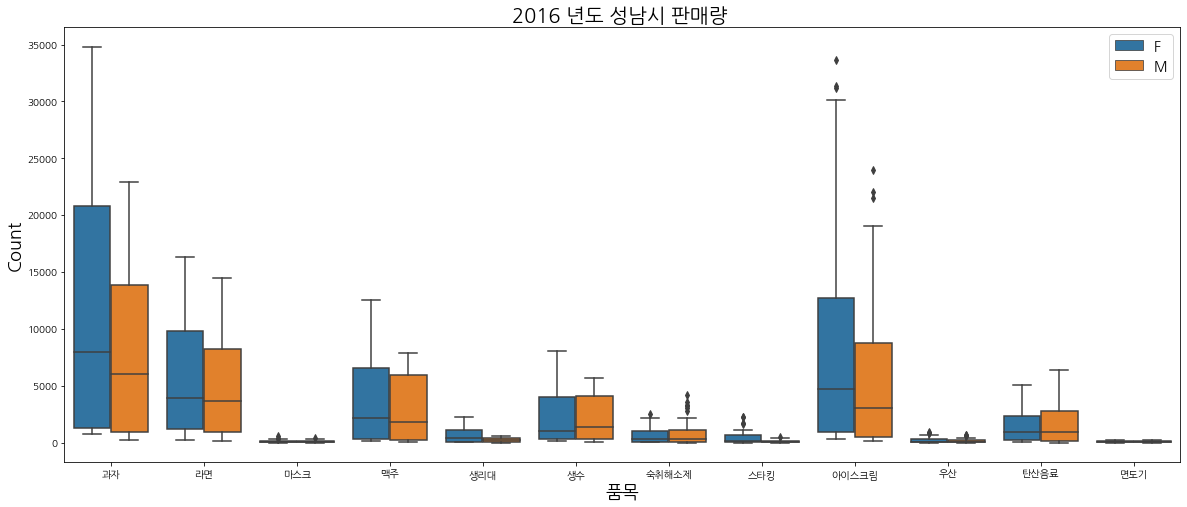

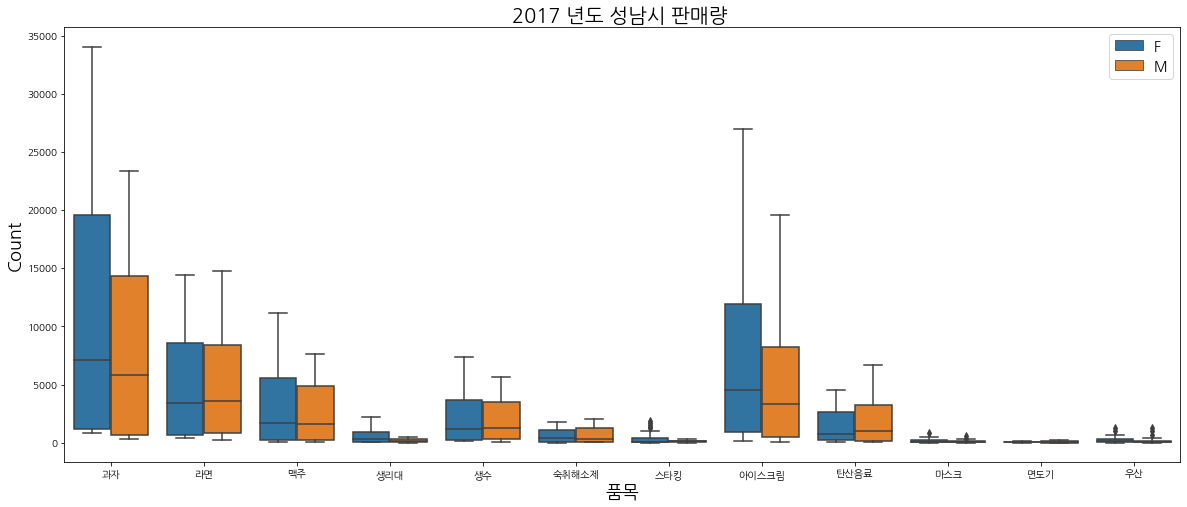

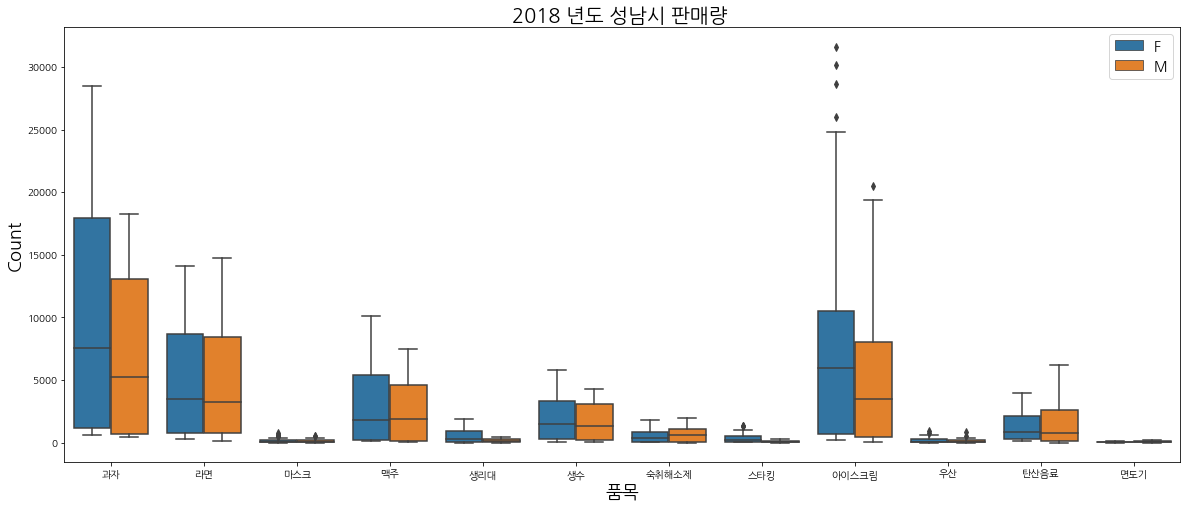

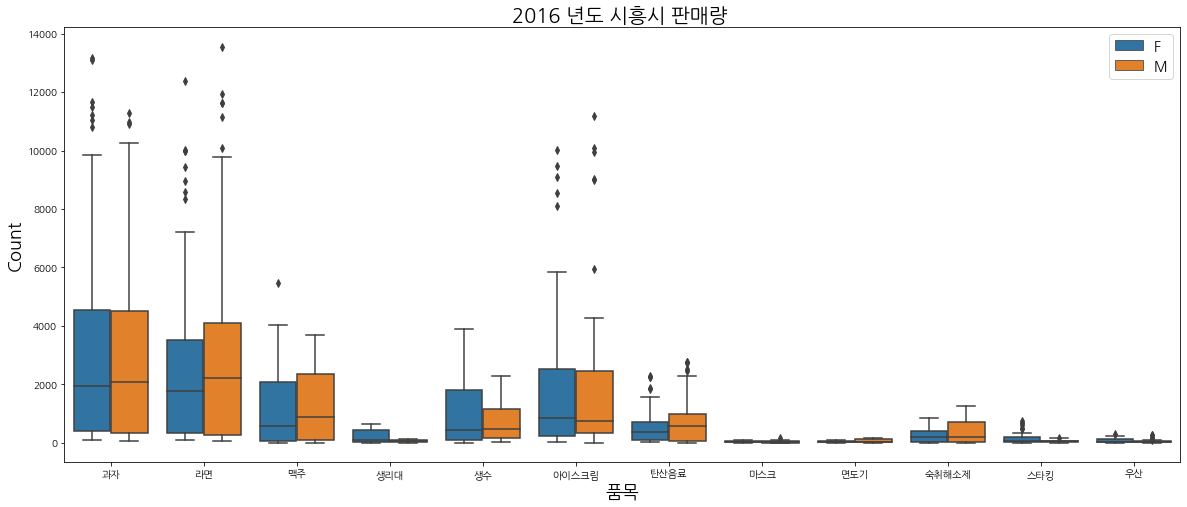

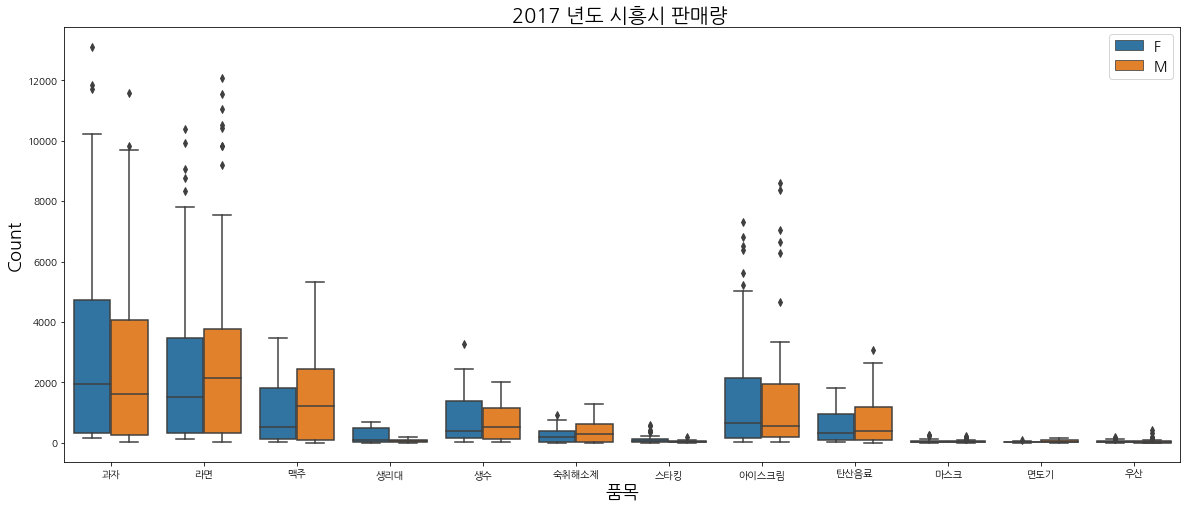

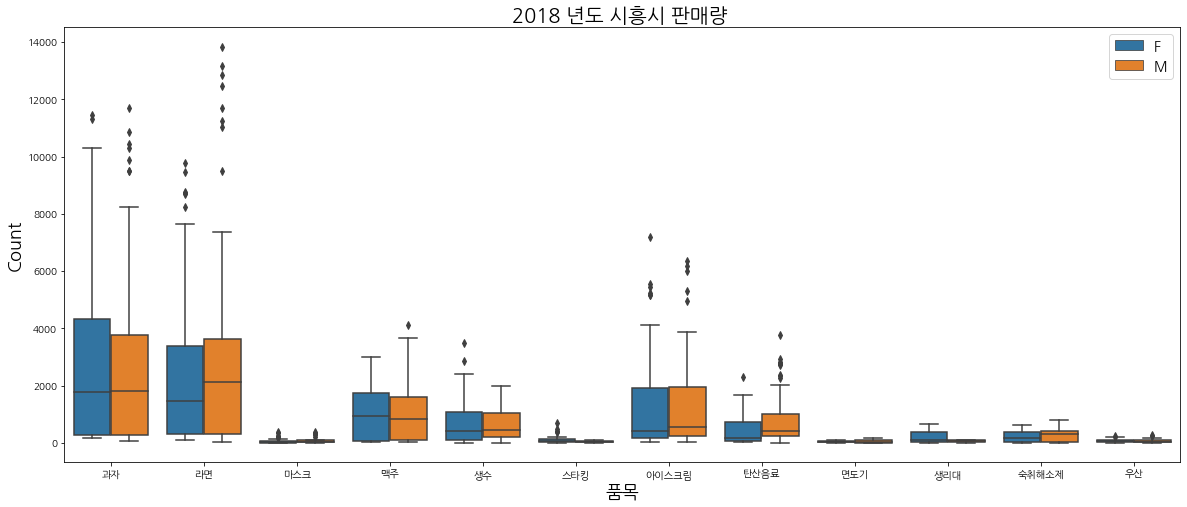

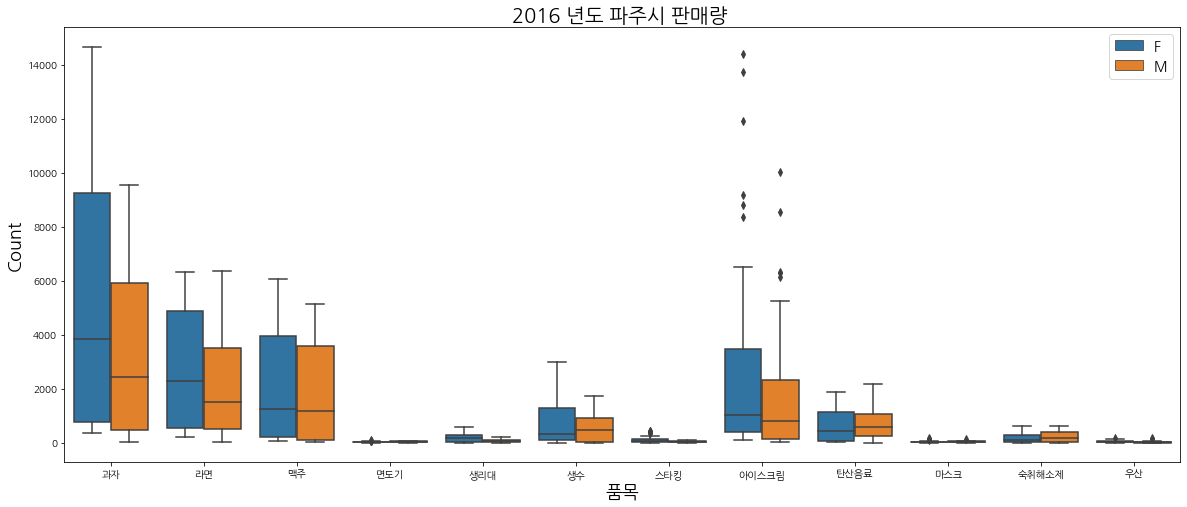

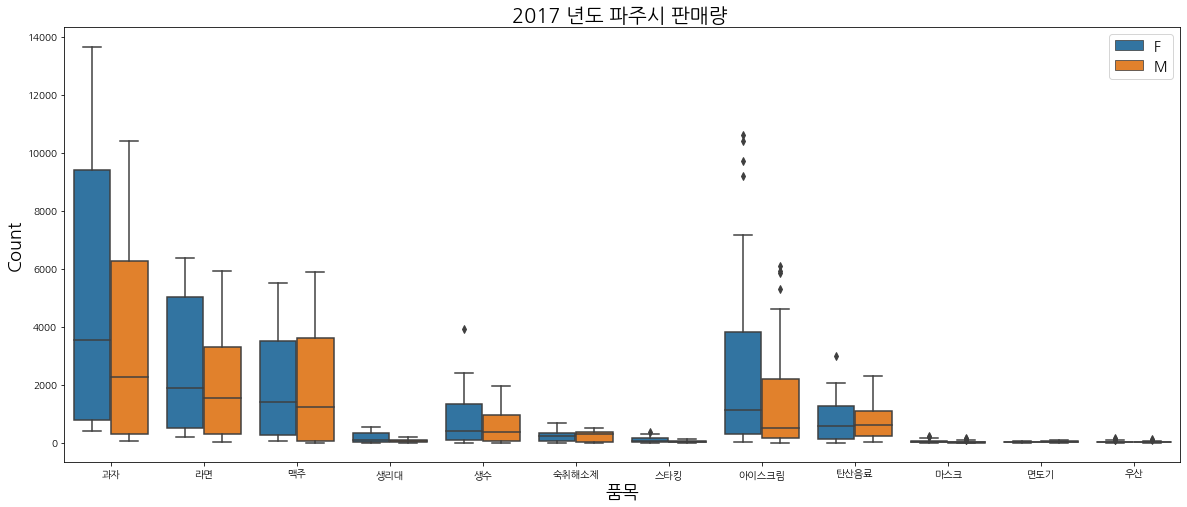

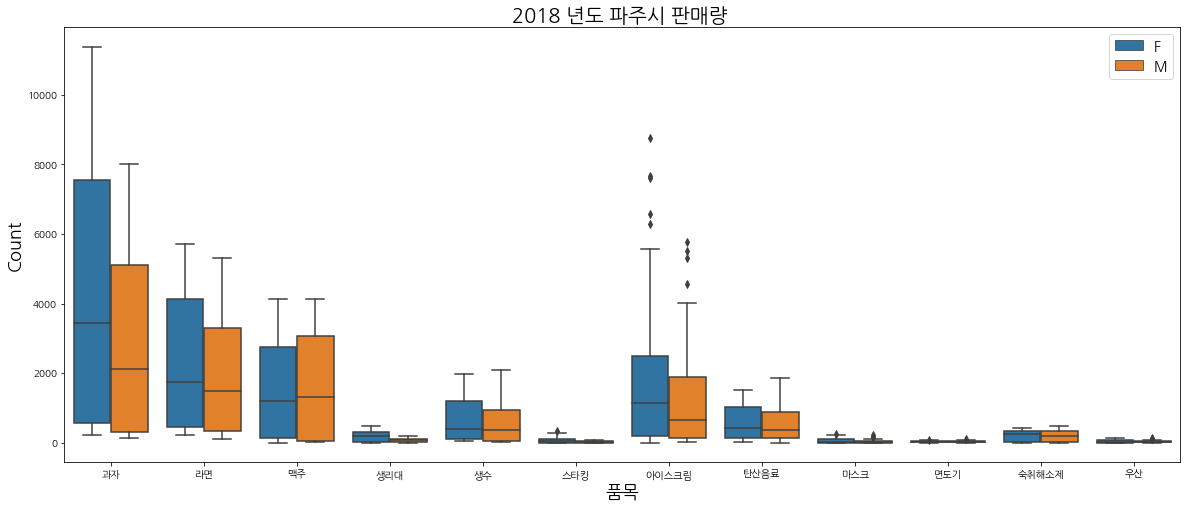

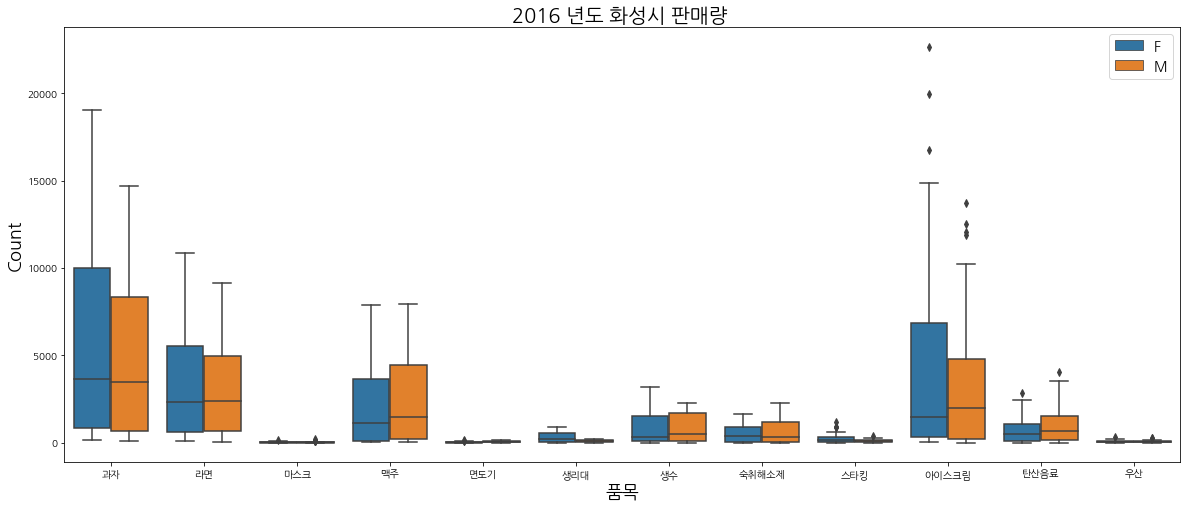

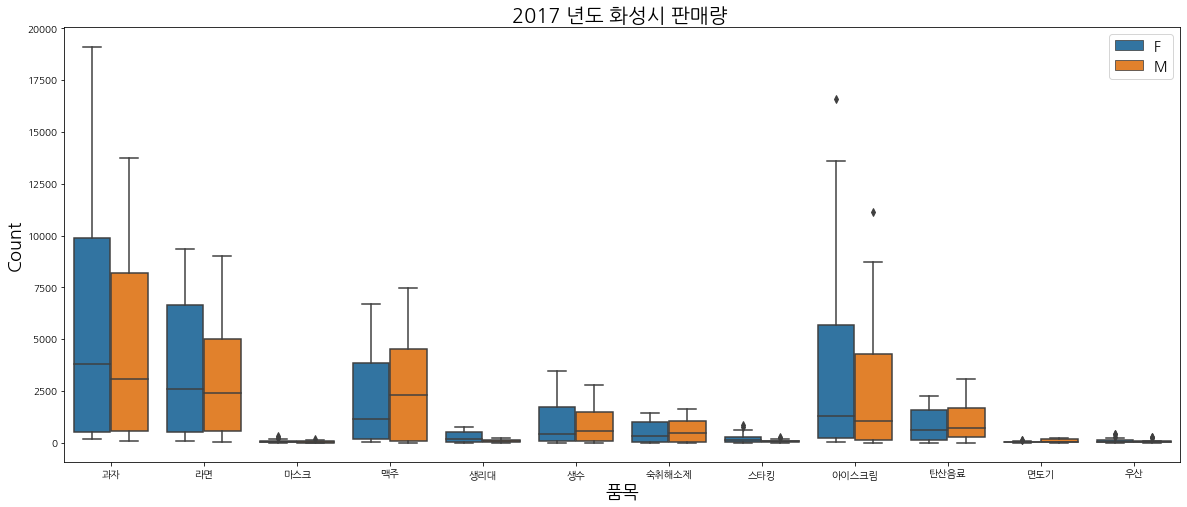

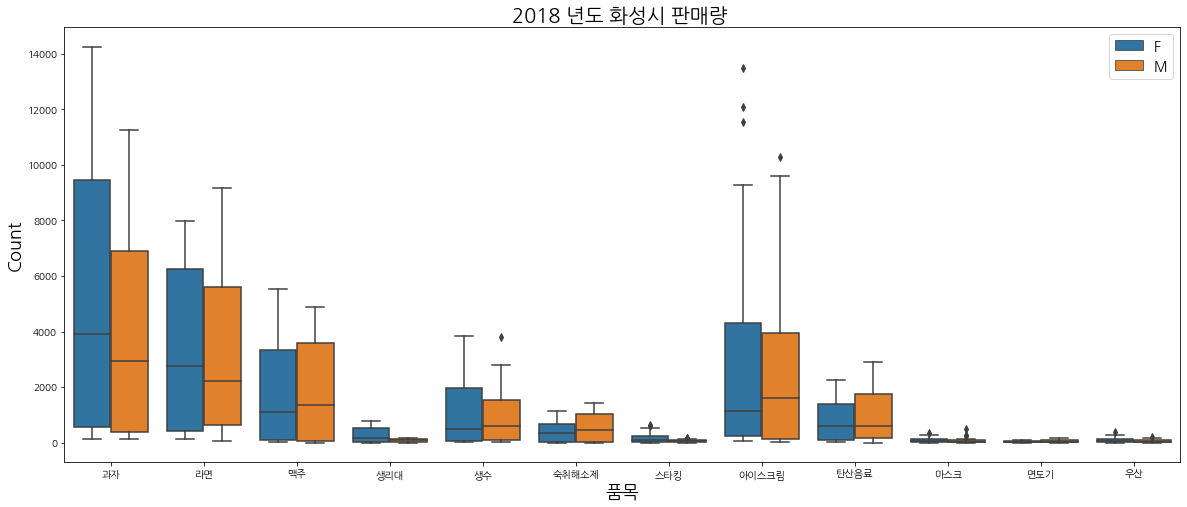

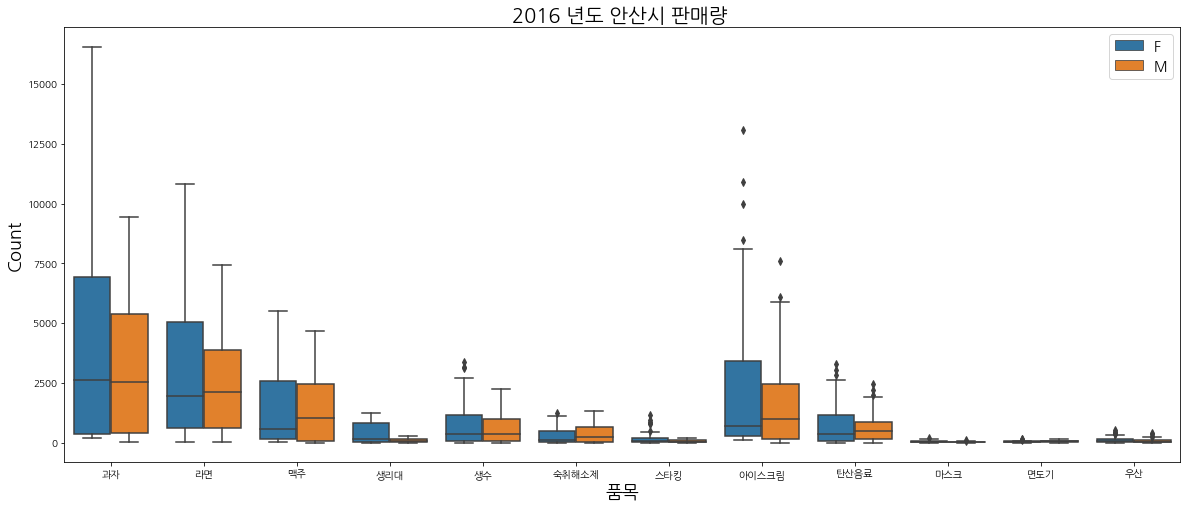

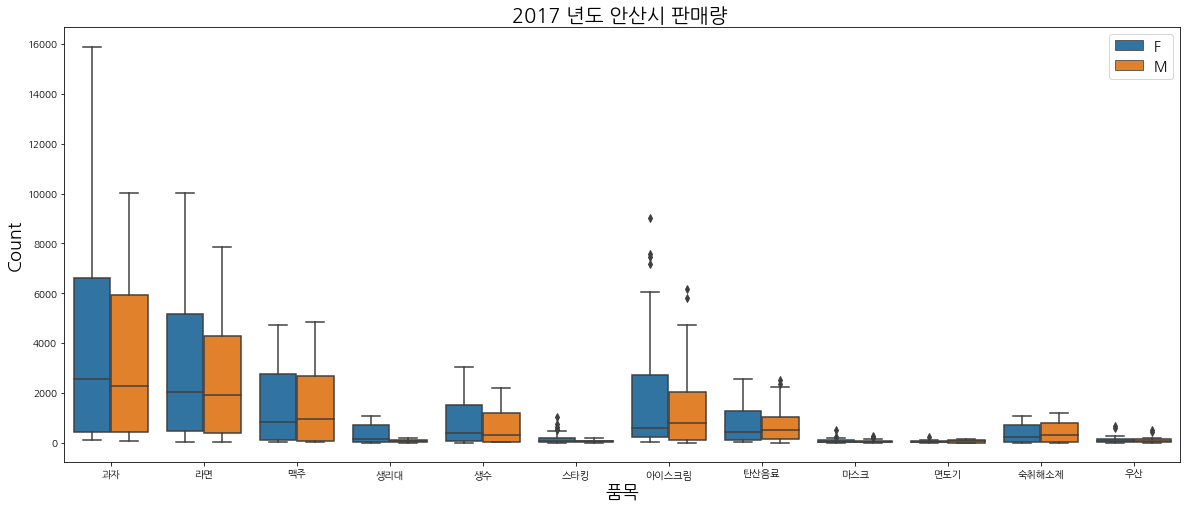

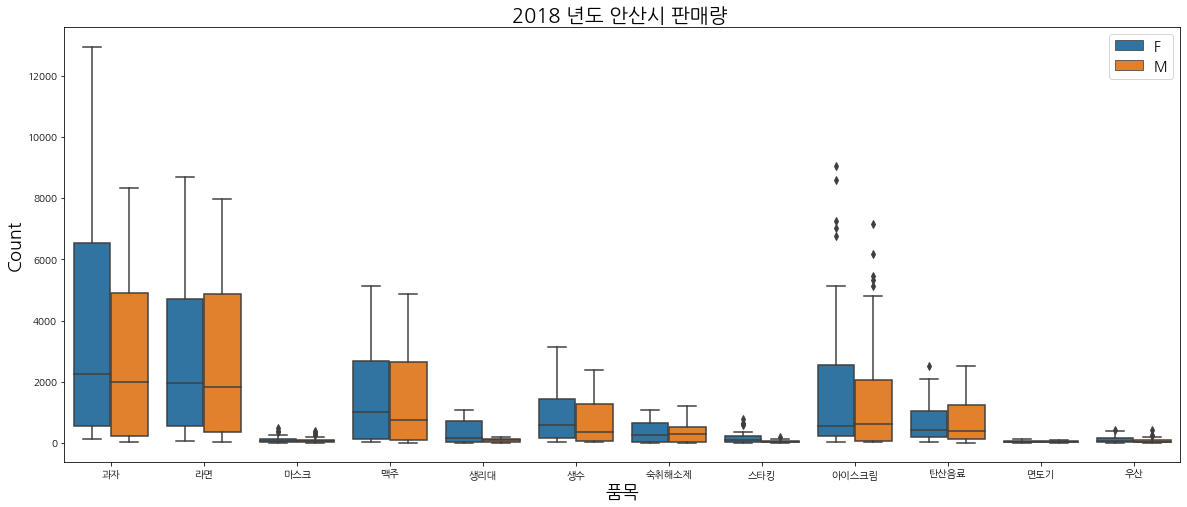

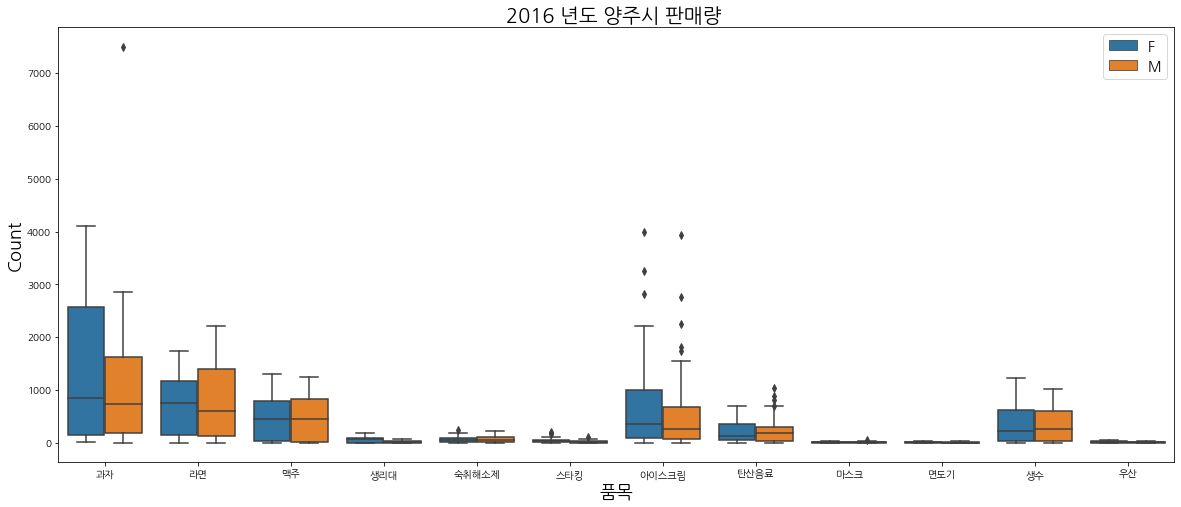

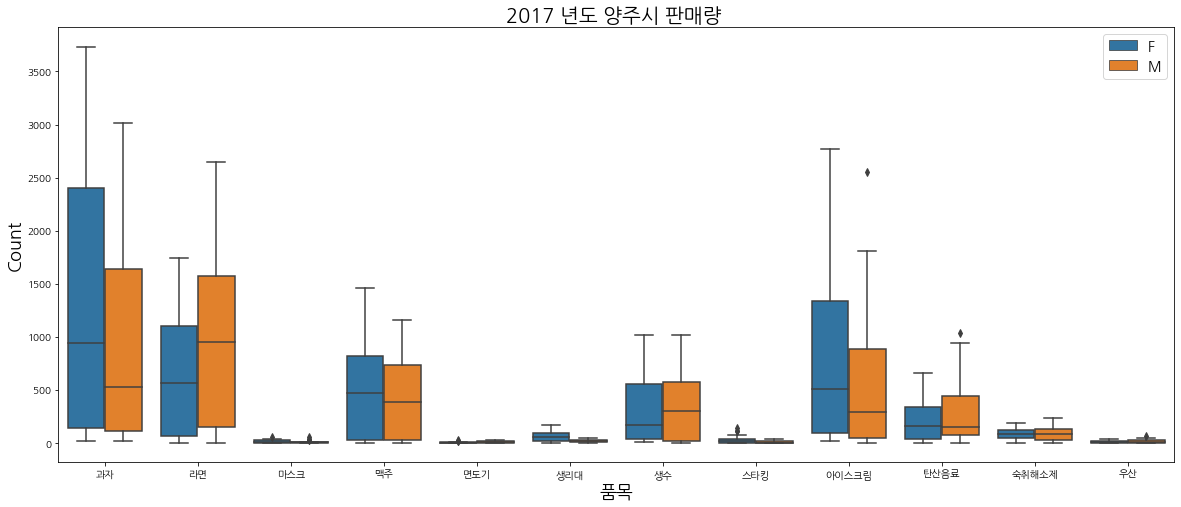

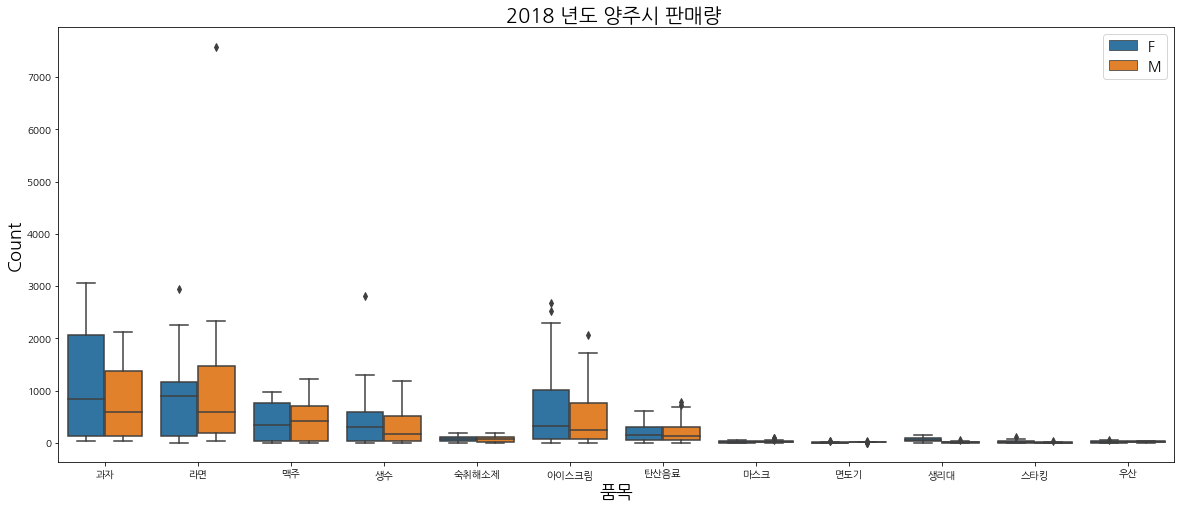

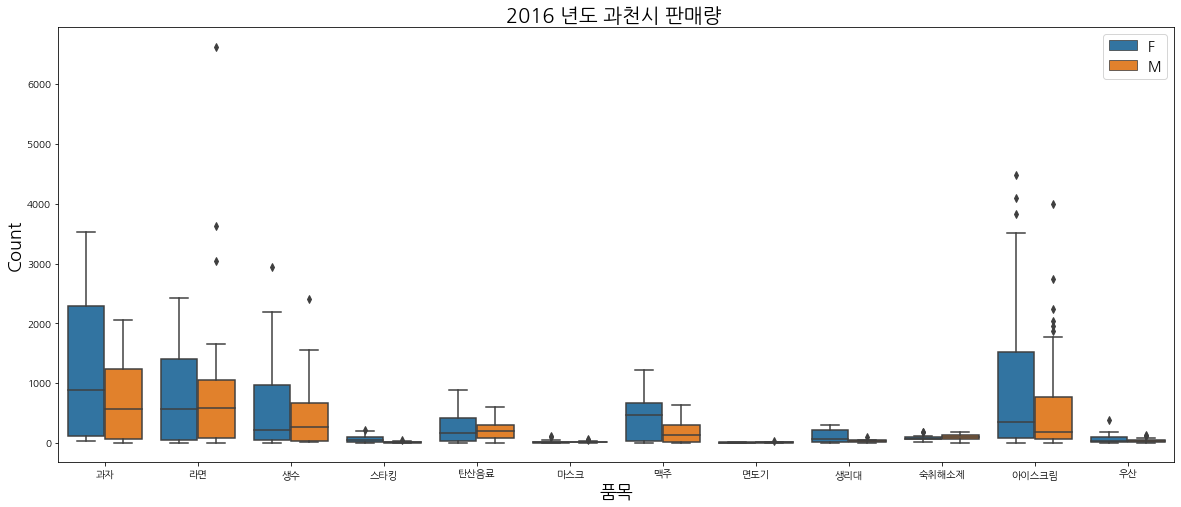

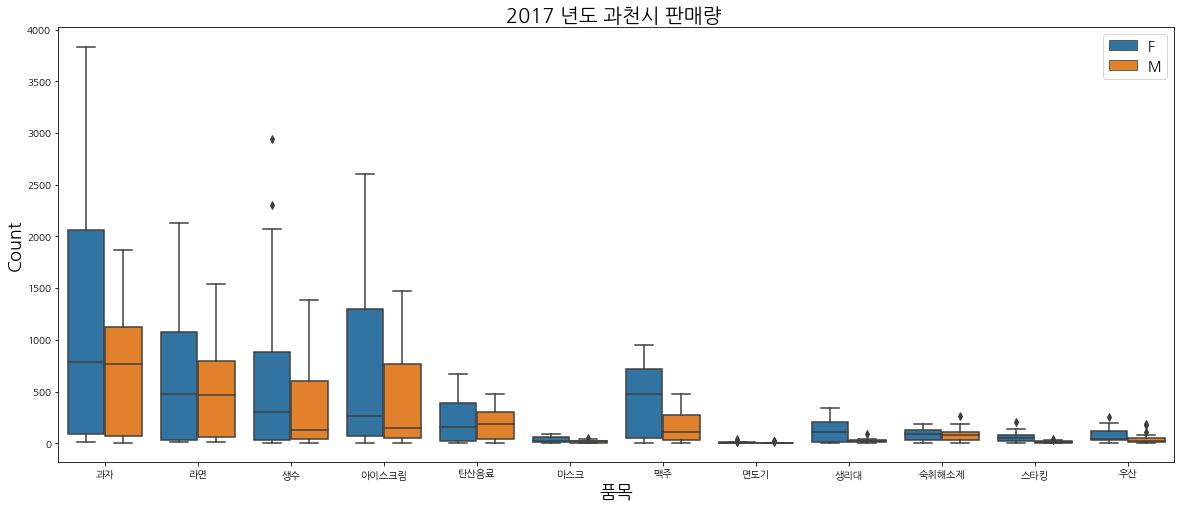

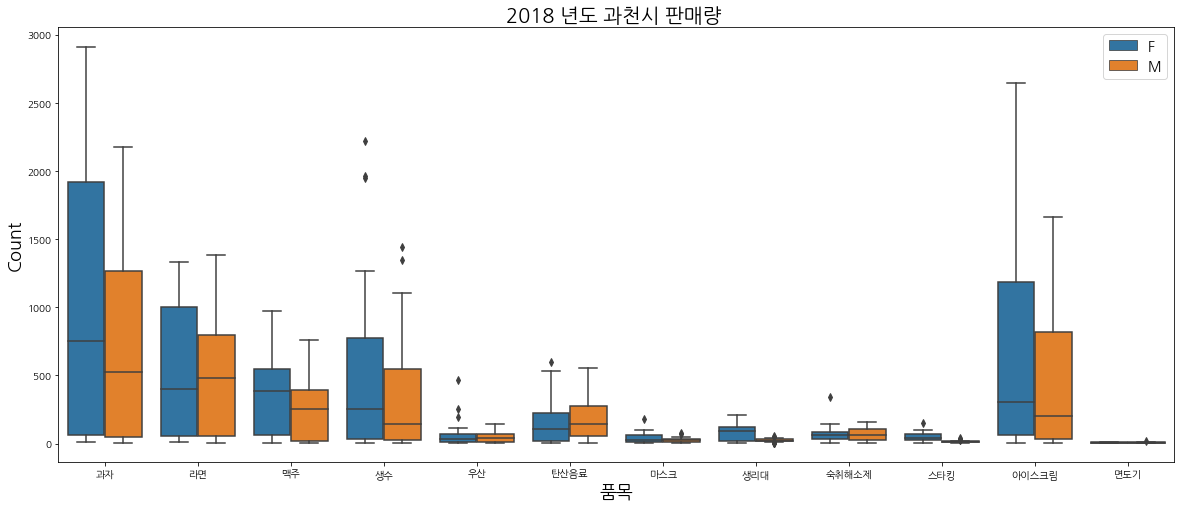

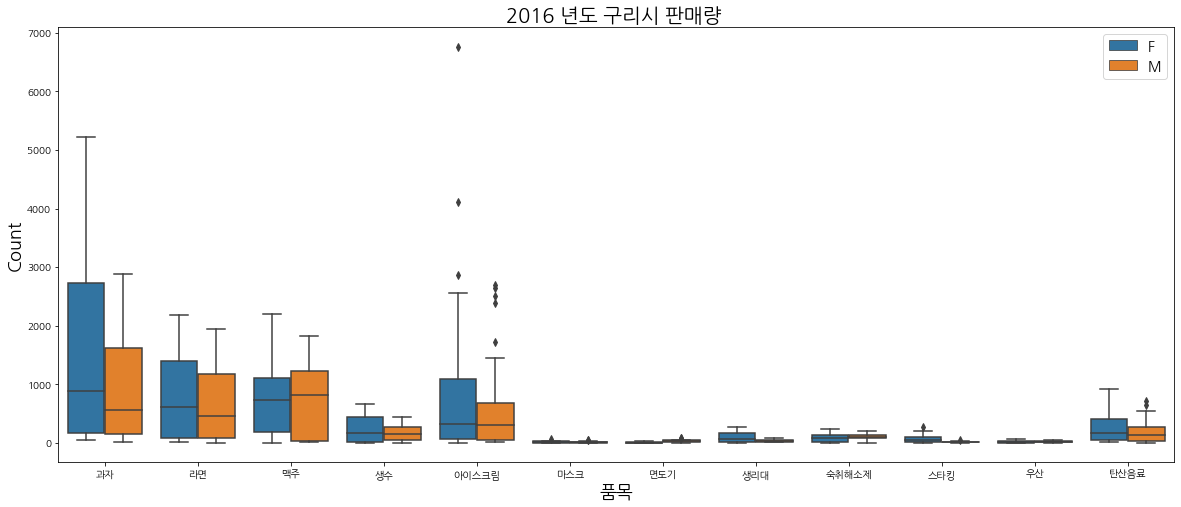

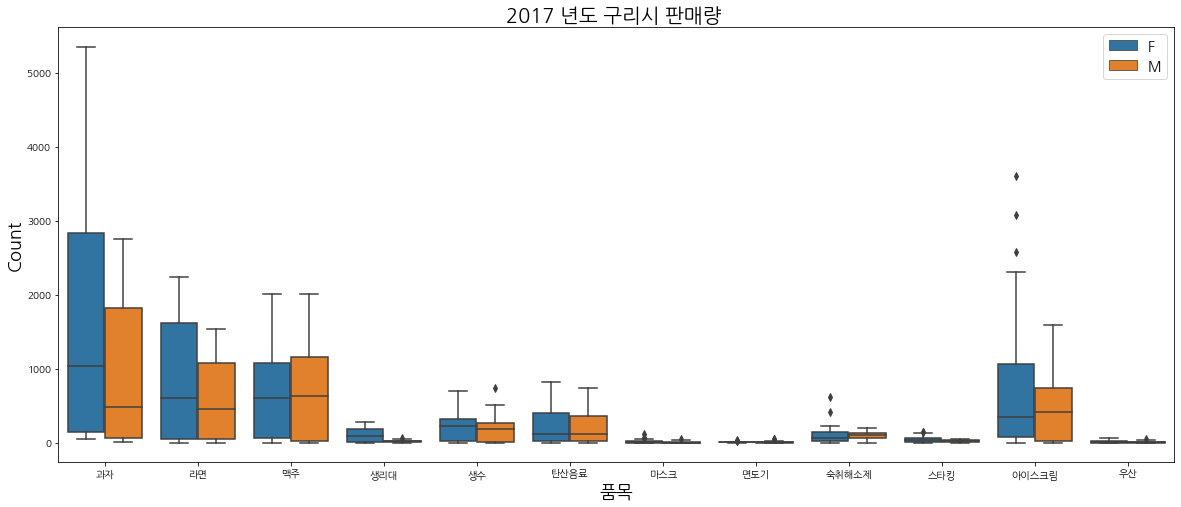

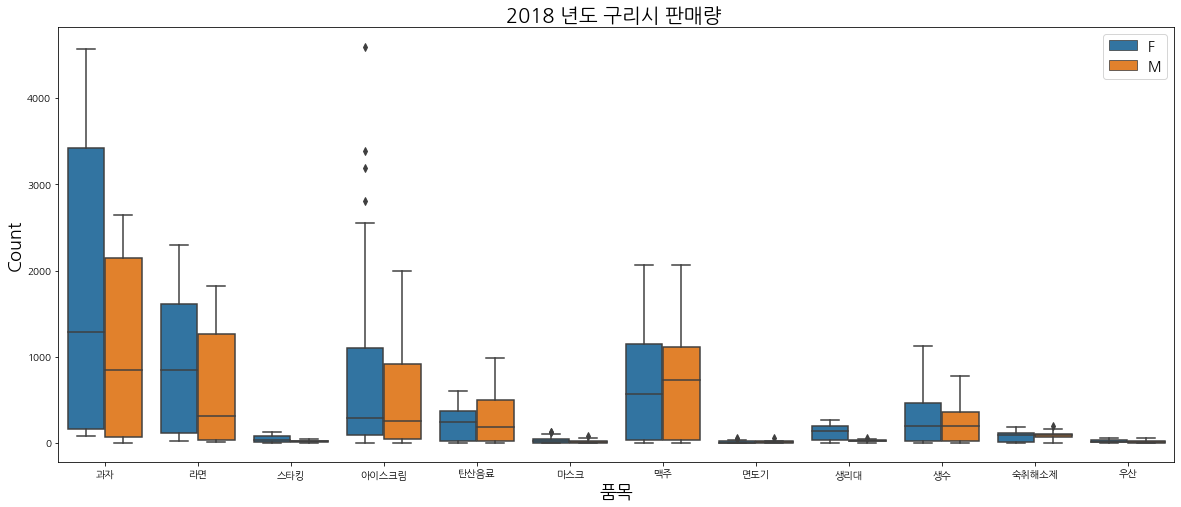

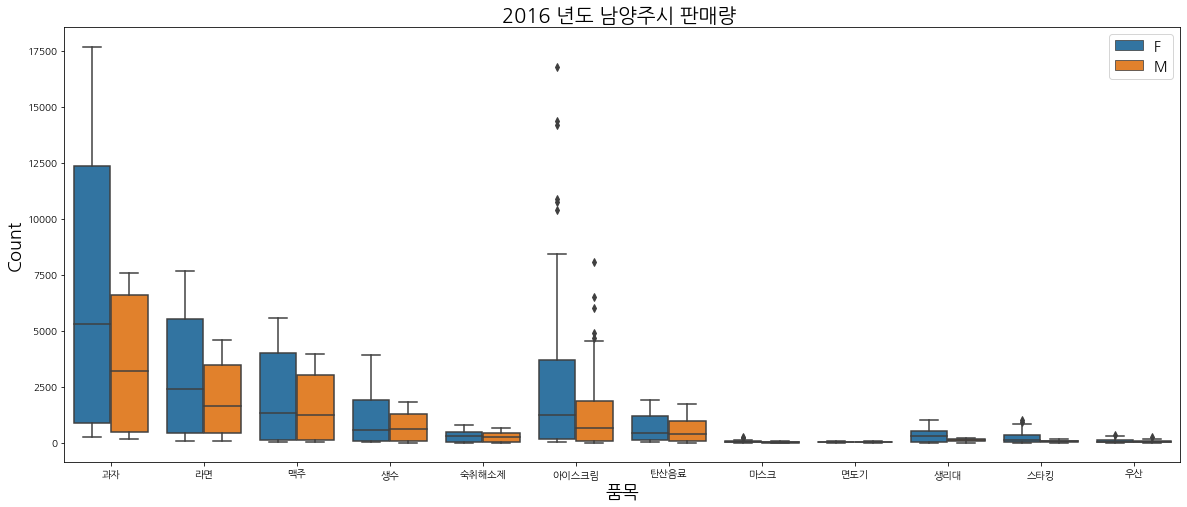

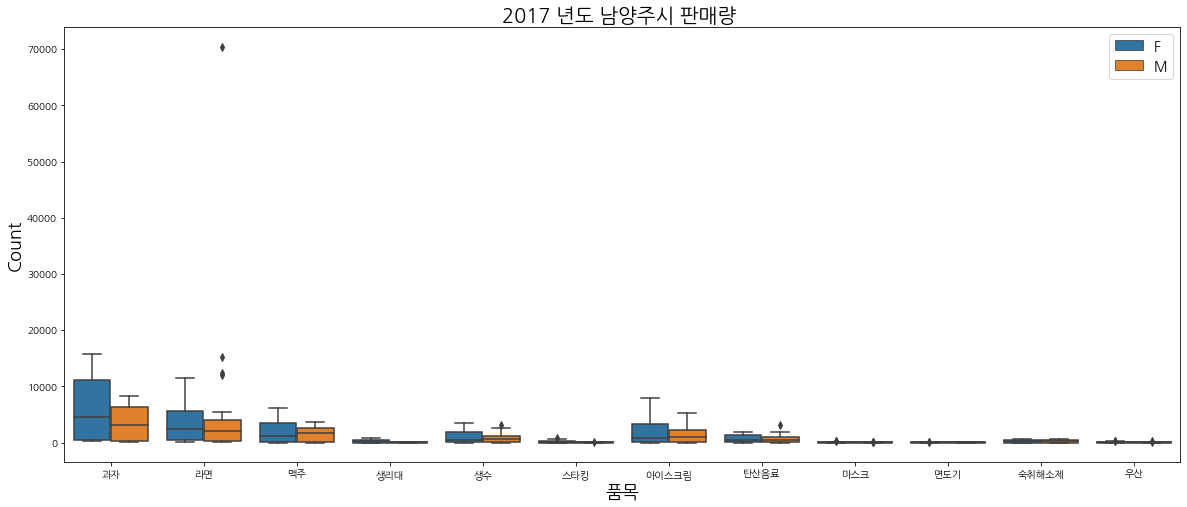

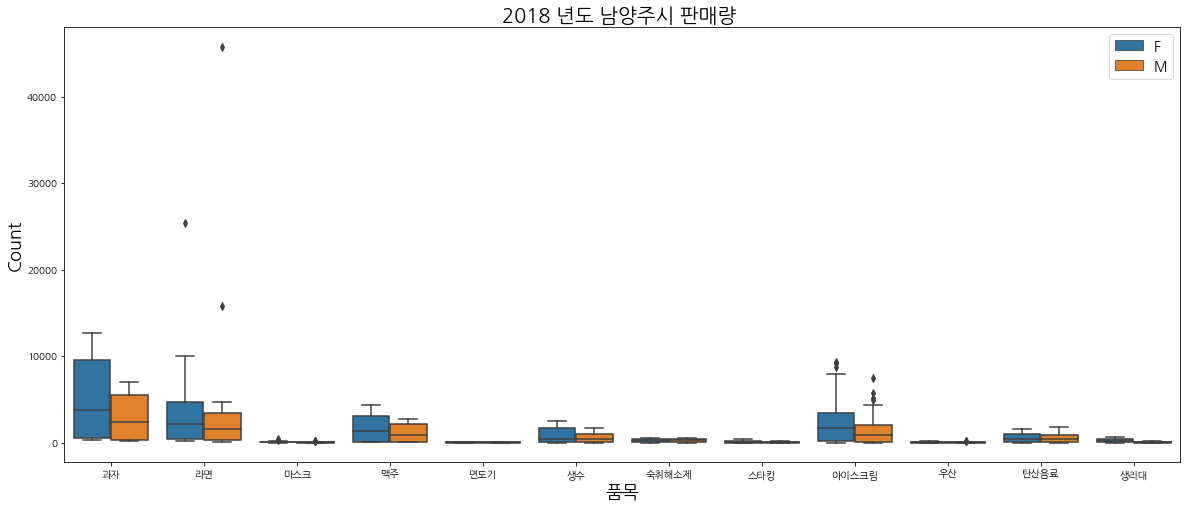

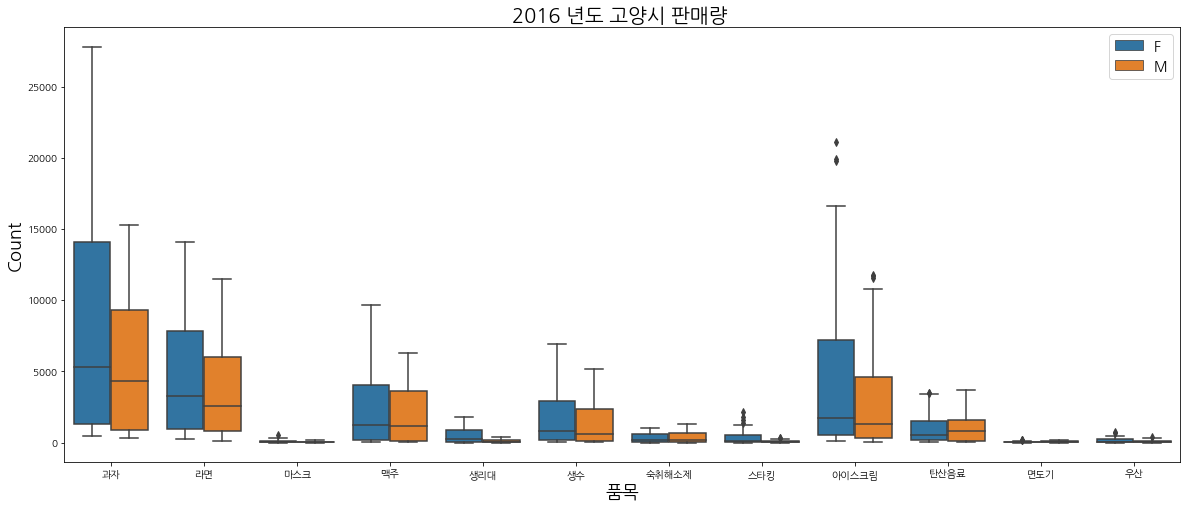

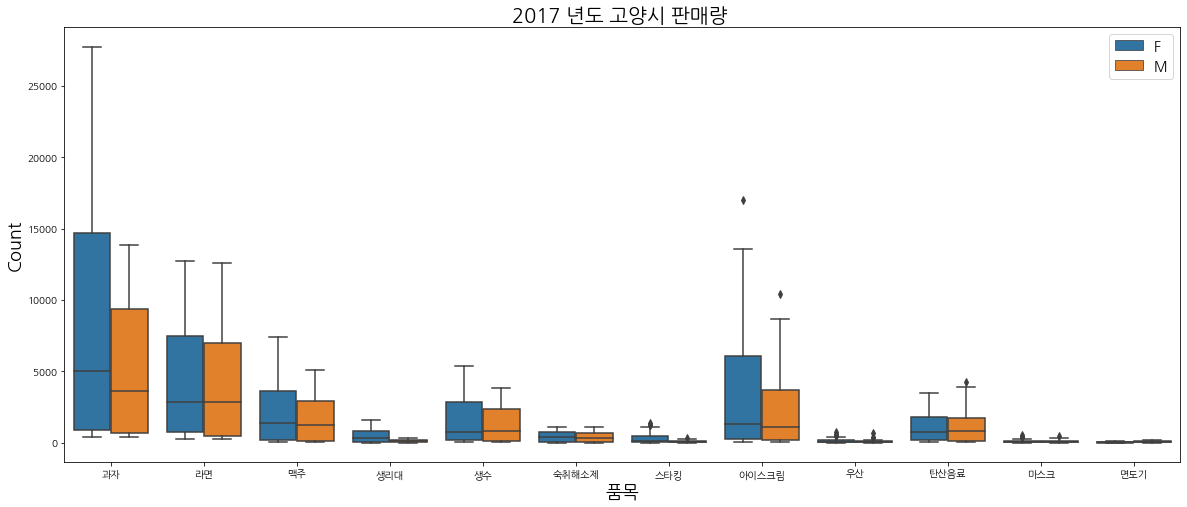

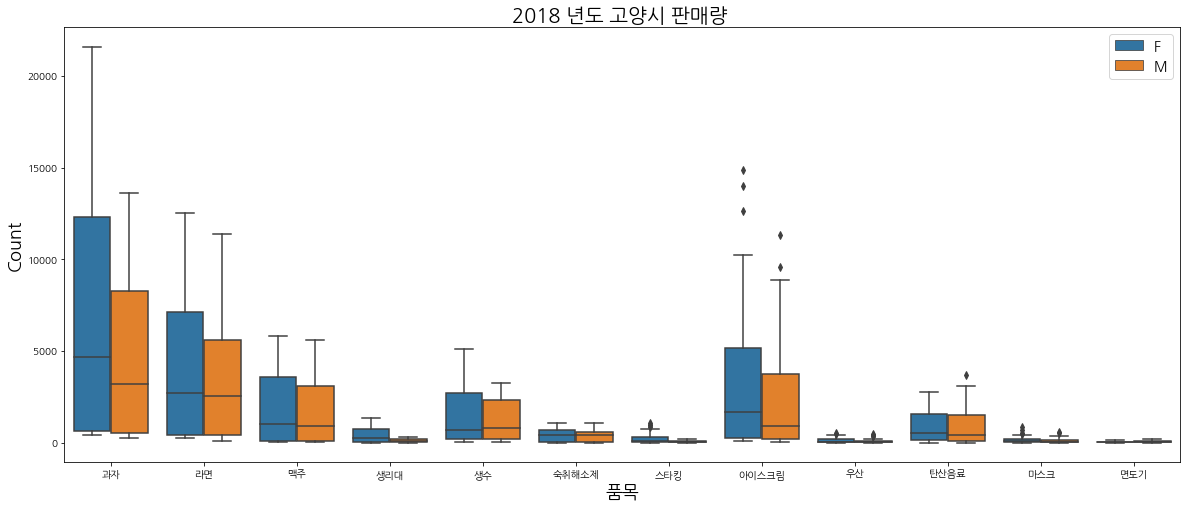

In [186]:
visualization_area(gyunggido_area,gyunggido_area_list)

# 시각화 (날짜별)

In [64]:
def visualization(dataframe,full_month,x='korea_cvs.category',y='korea_cvs.adj_qty',category=str('korea_cvs.gen_cd'),
                 title=''):
    plt.rcParams['figure.figsize'] = [24, 10]
    for month, data in zip(full_month,dataframe):
        sns.barplot(x=x, y=y, hue=category, data=data,dodge=True) # default : dodge=True

        plt.ylabel('Count', fontsize=18)
        plt.xlabel('품목', fontsize=18)

        plt.title('{} {} 판매량'.format(title,month), fontsize=20)
        plt.legend(fontsize=14)
        plt.show()


In [65]:
# 경기도, 서울, 인천 구역

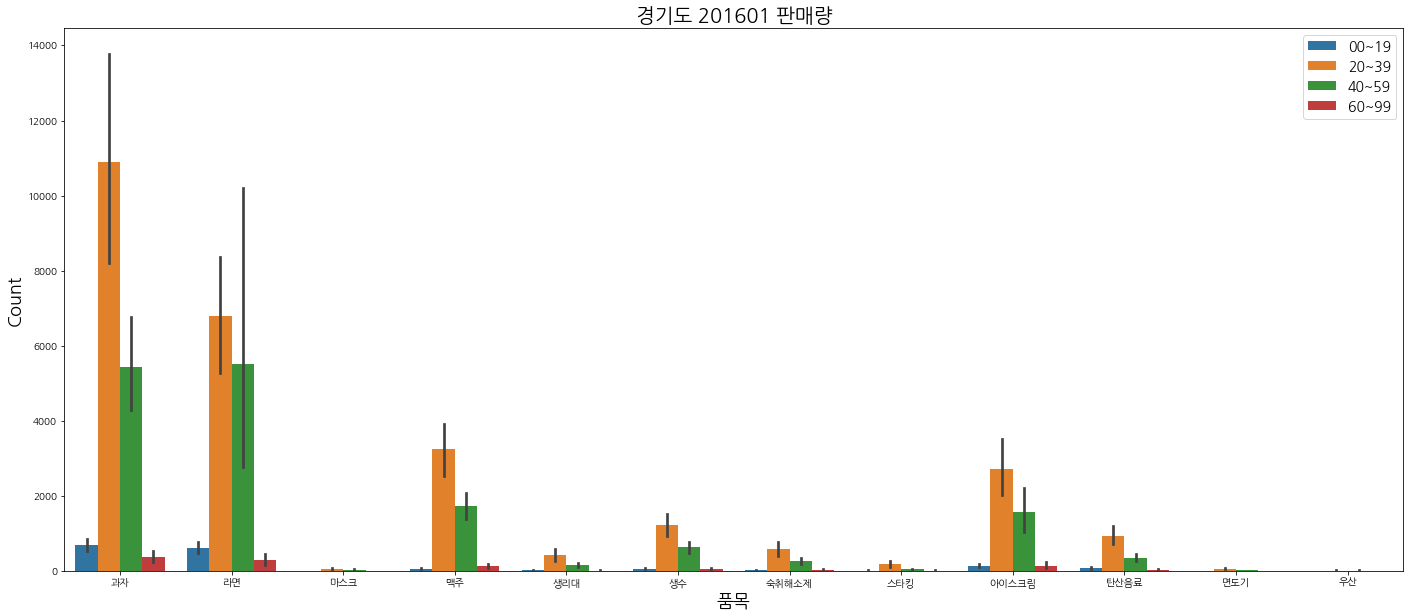

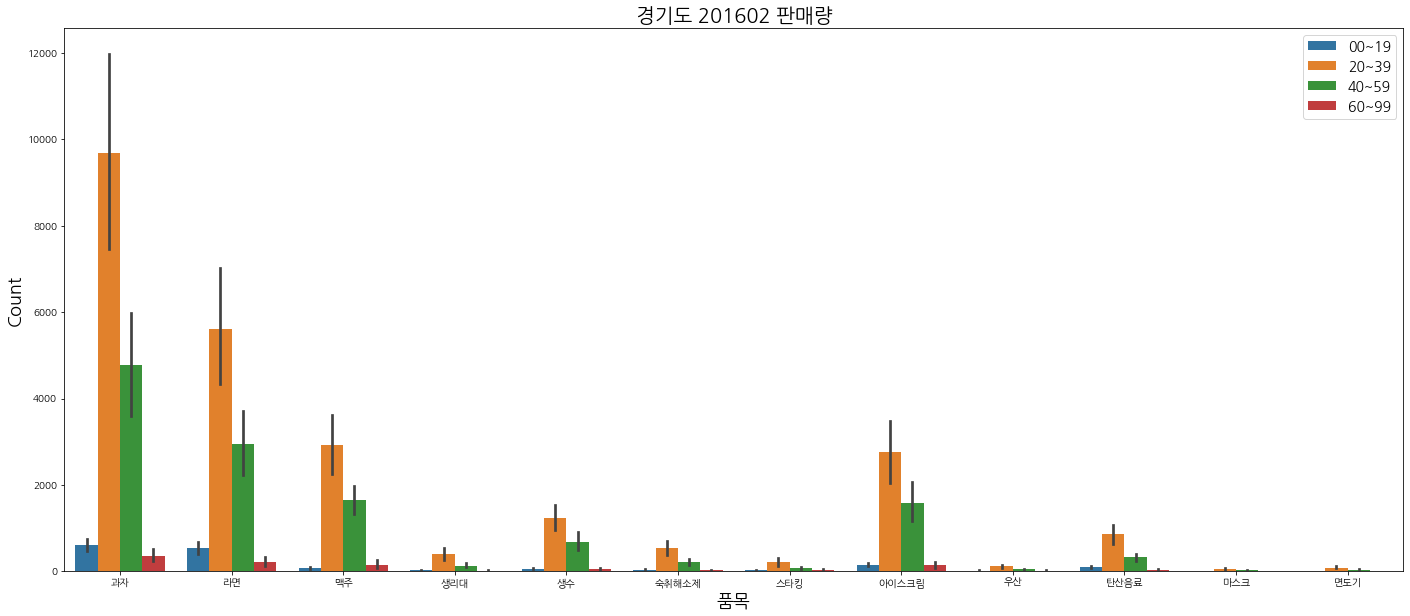

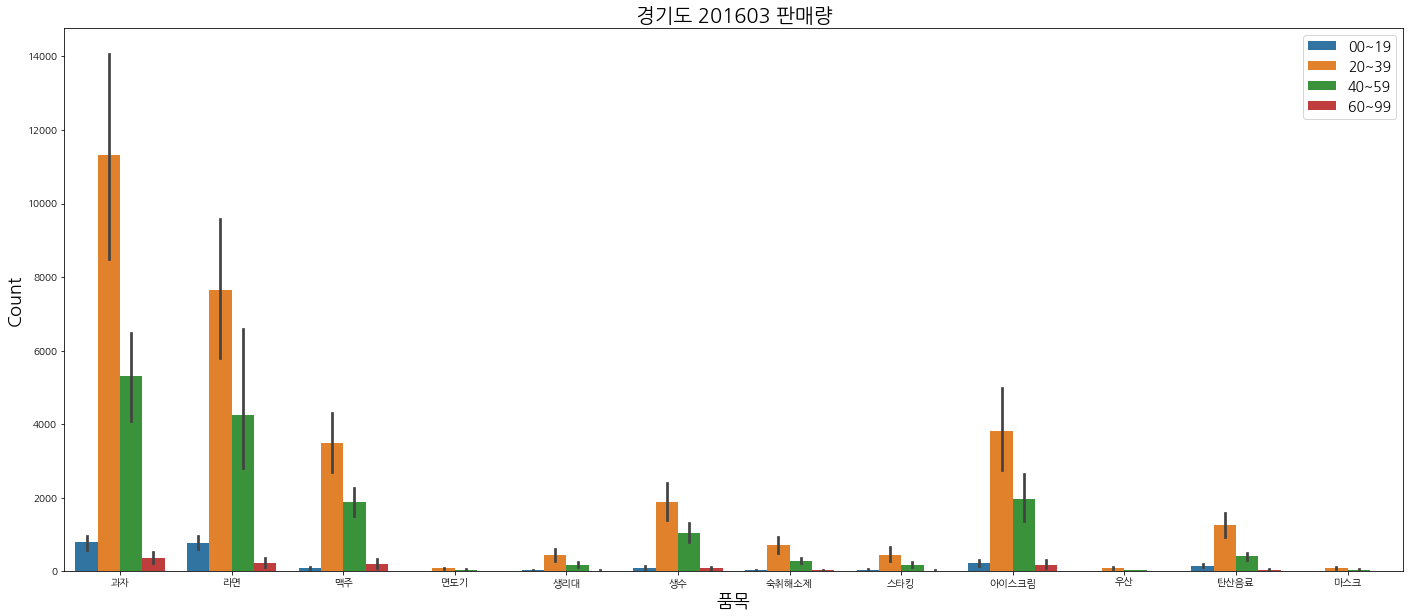

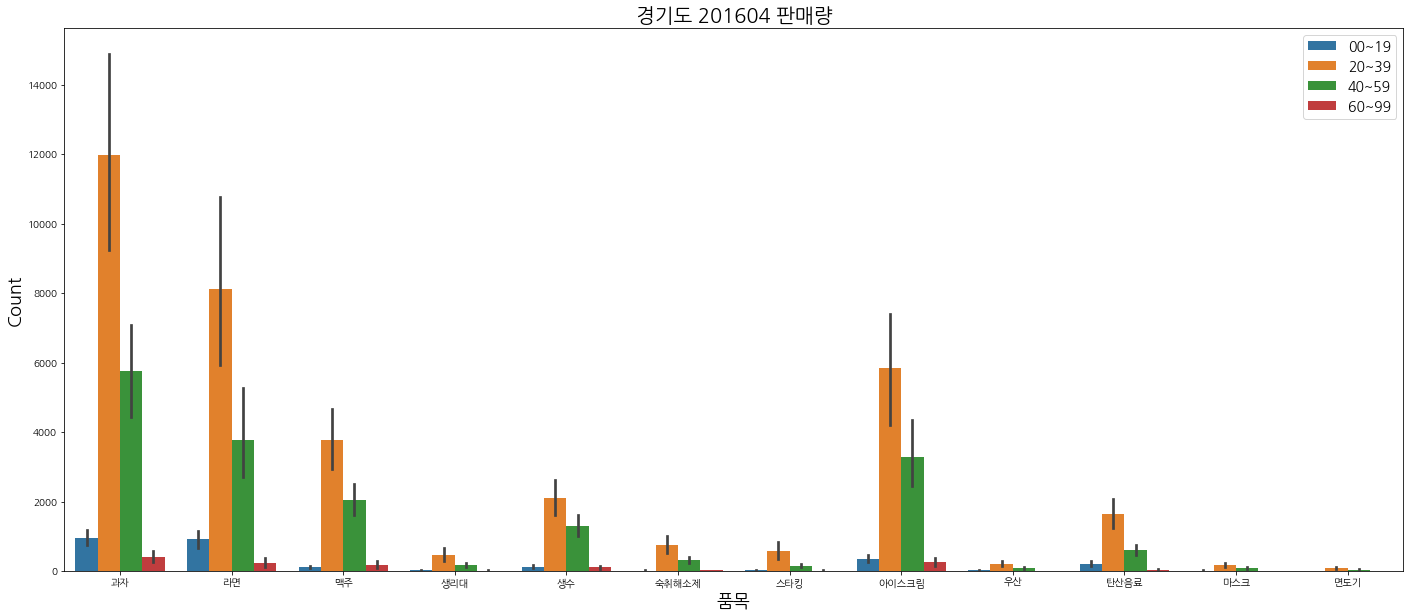

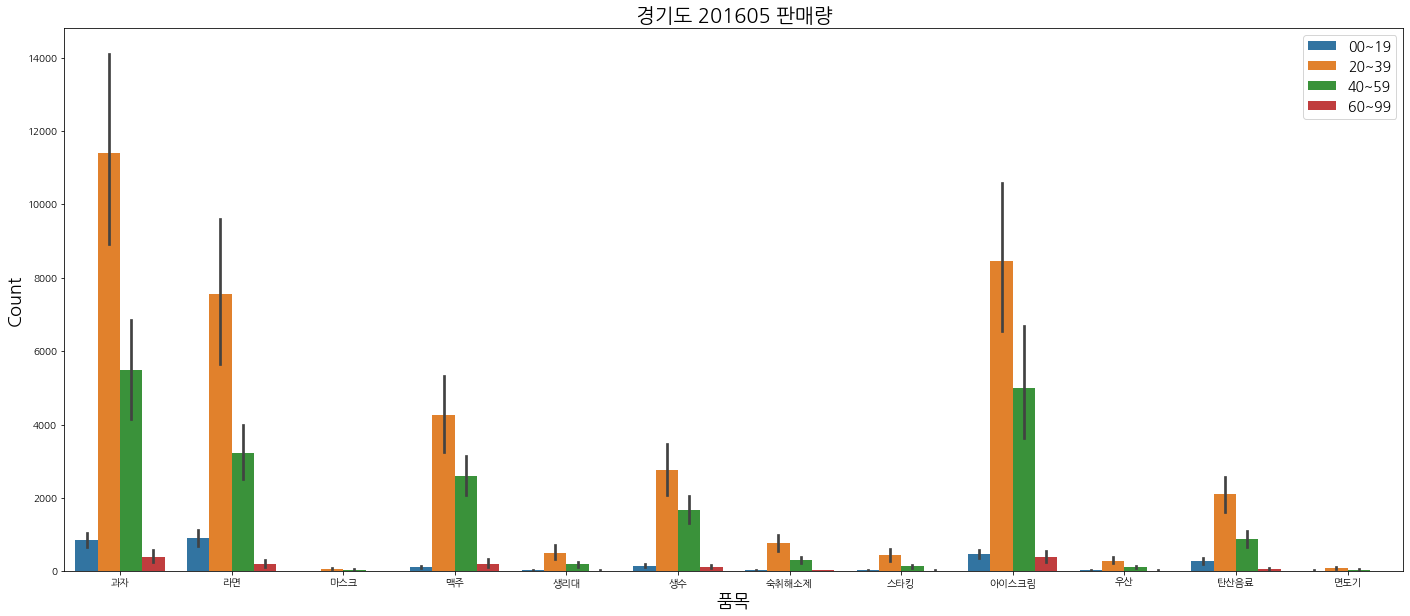

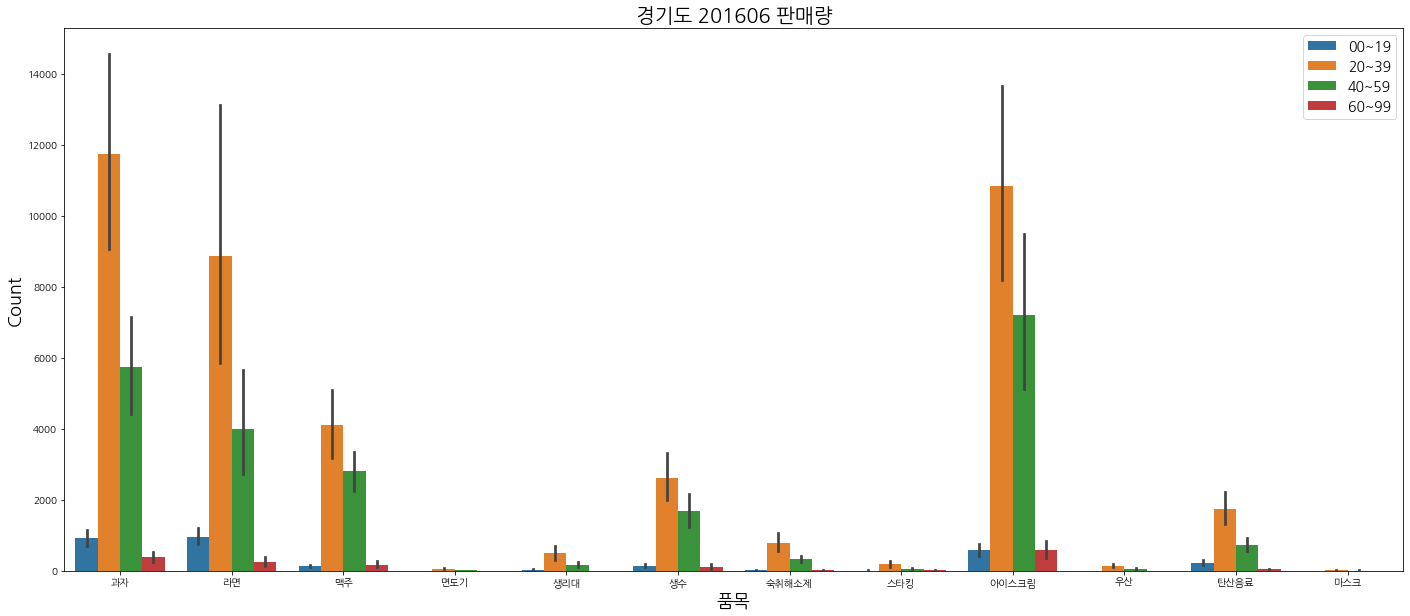

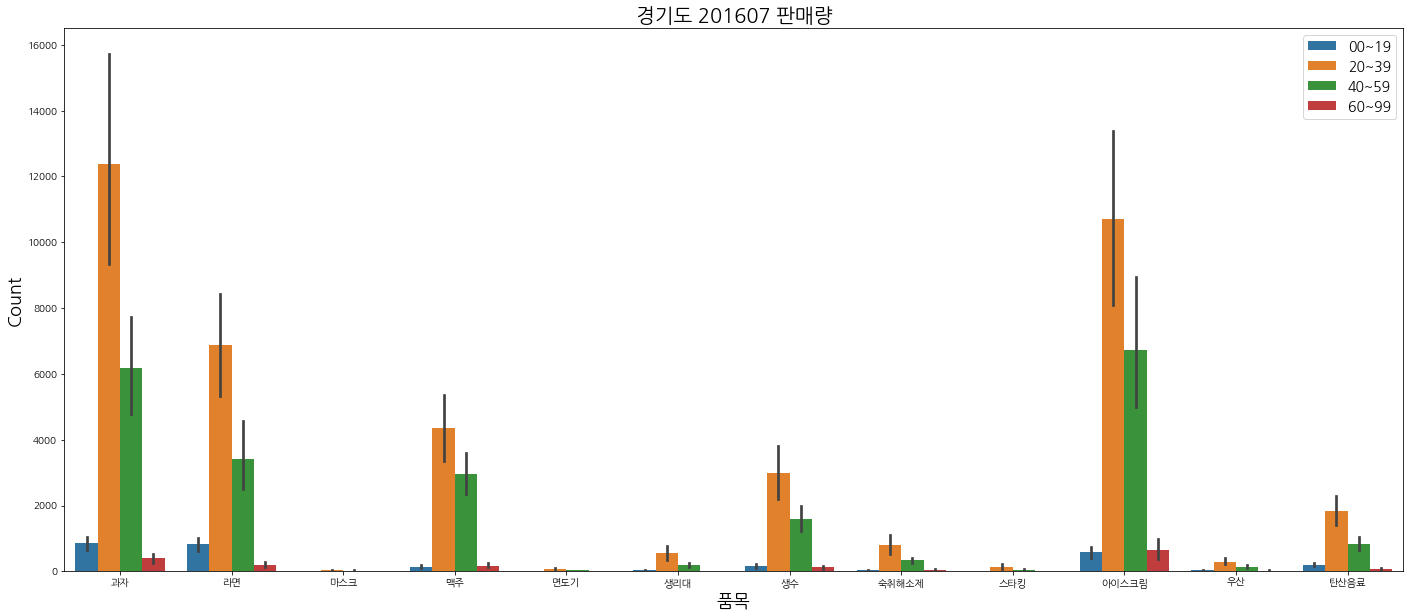

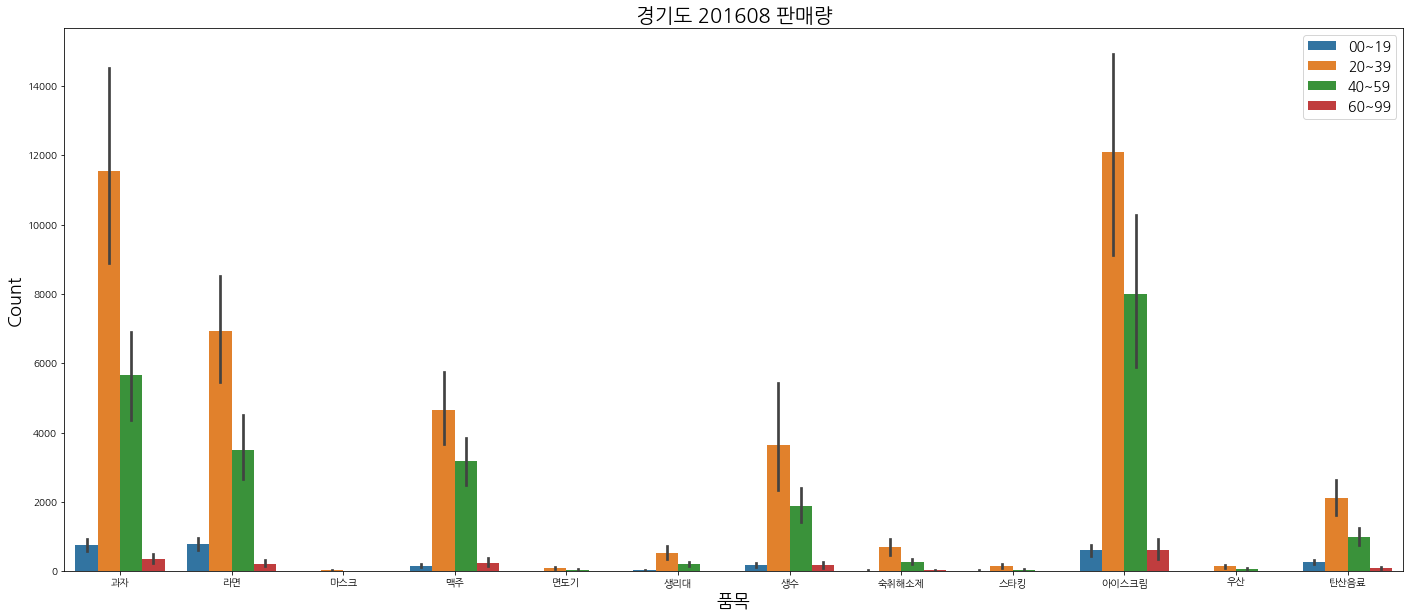

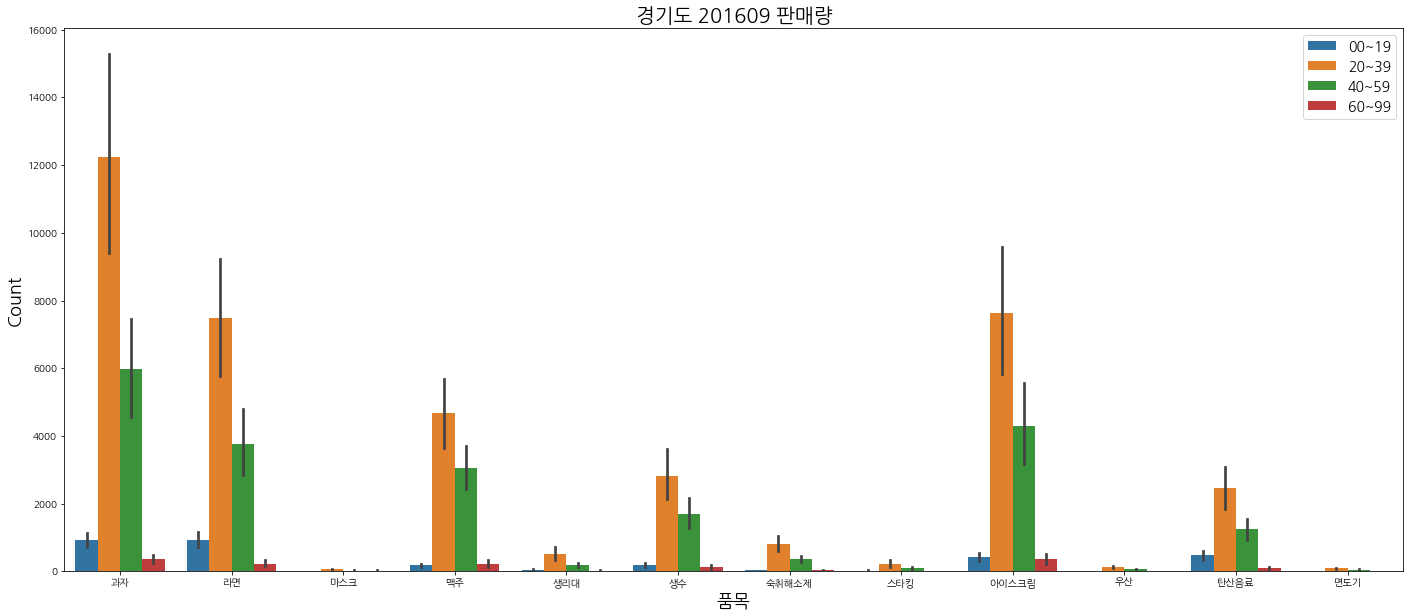

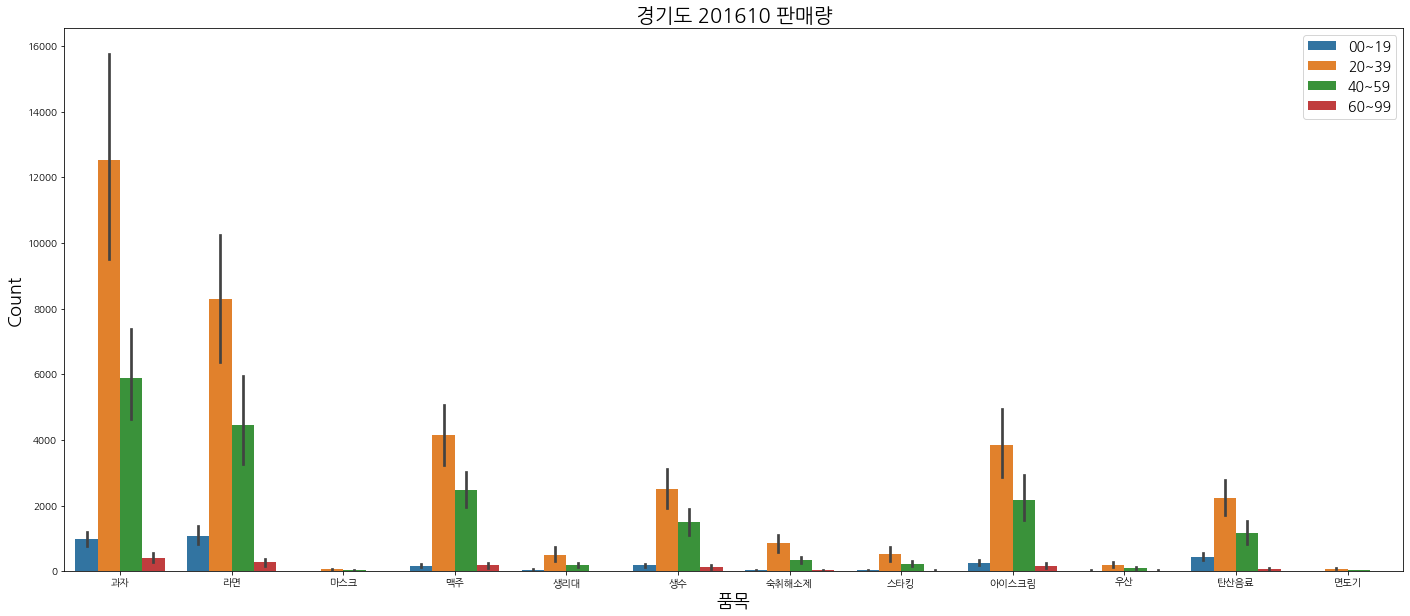

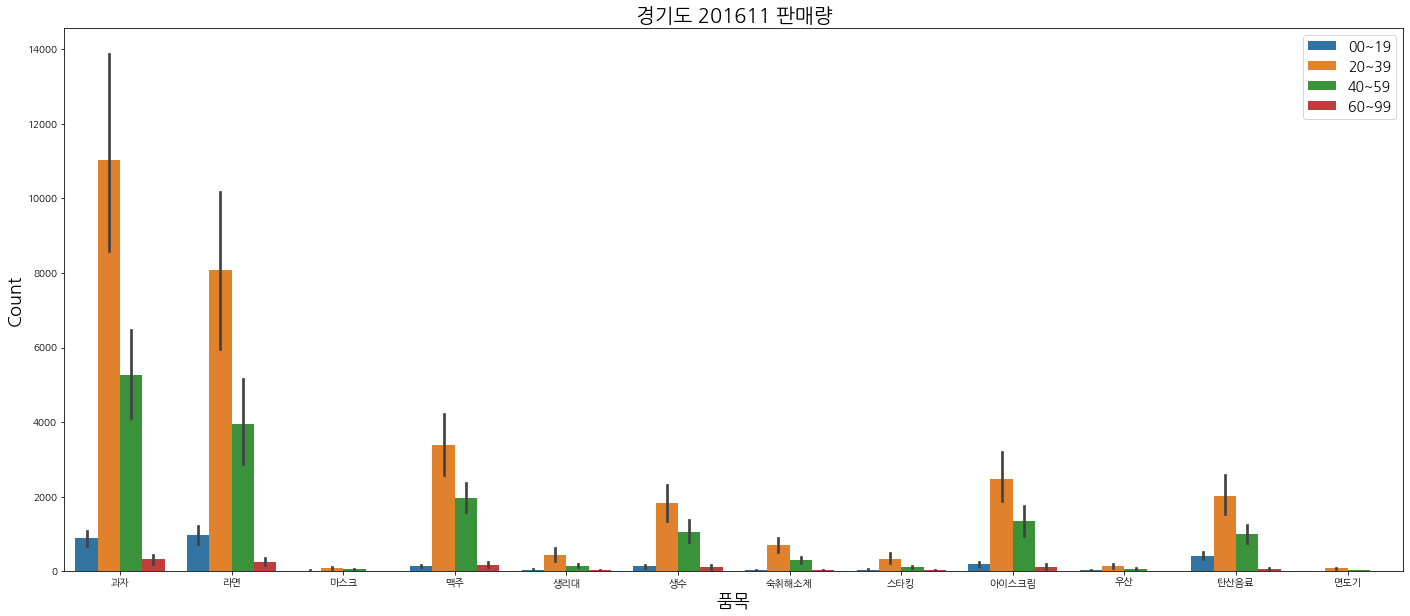

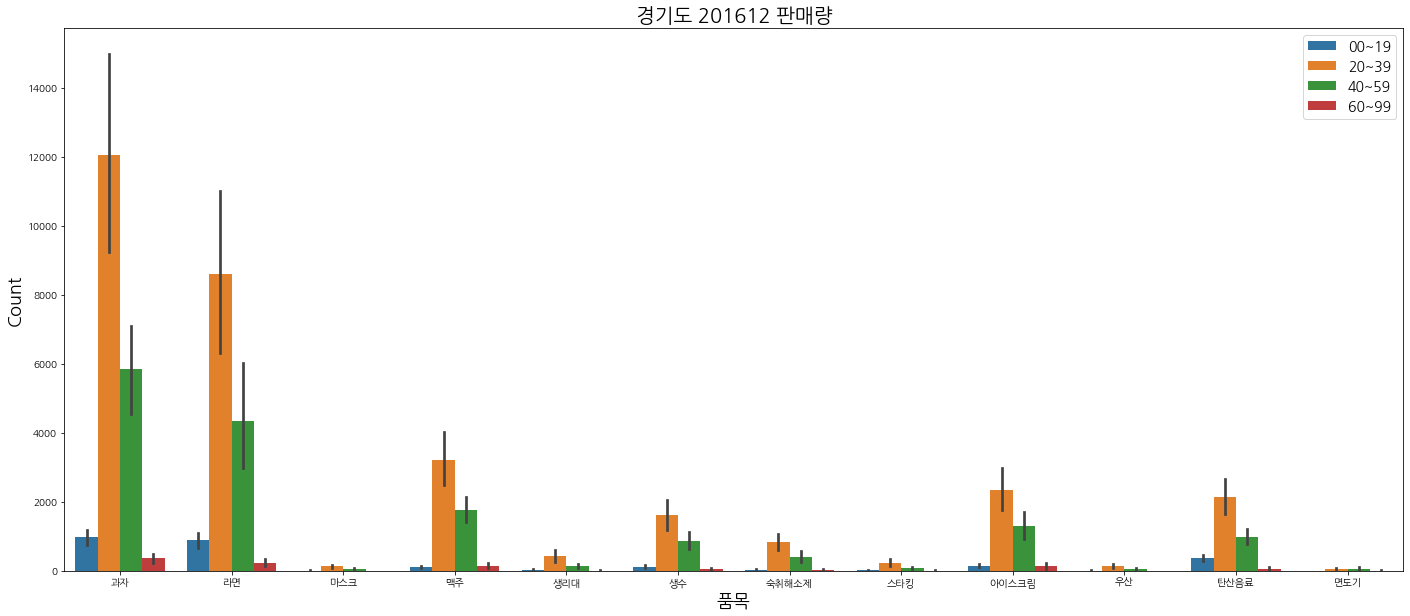

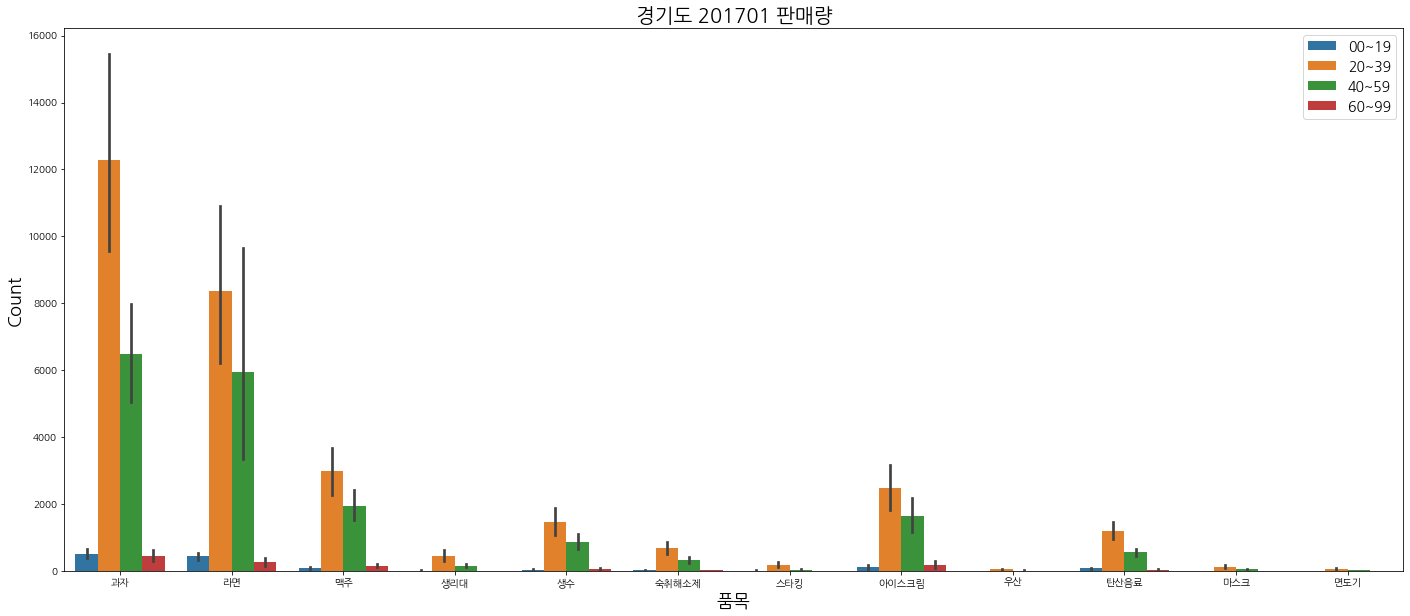

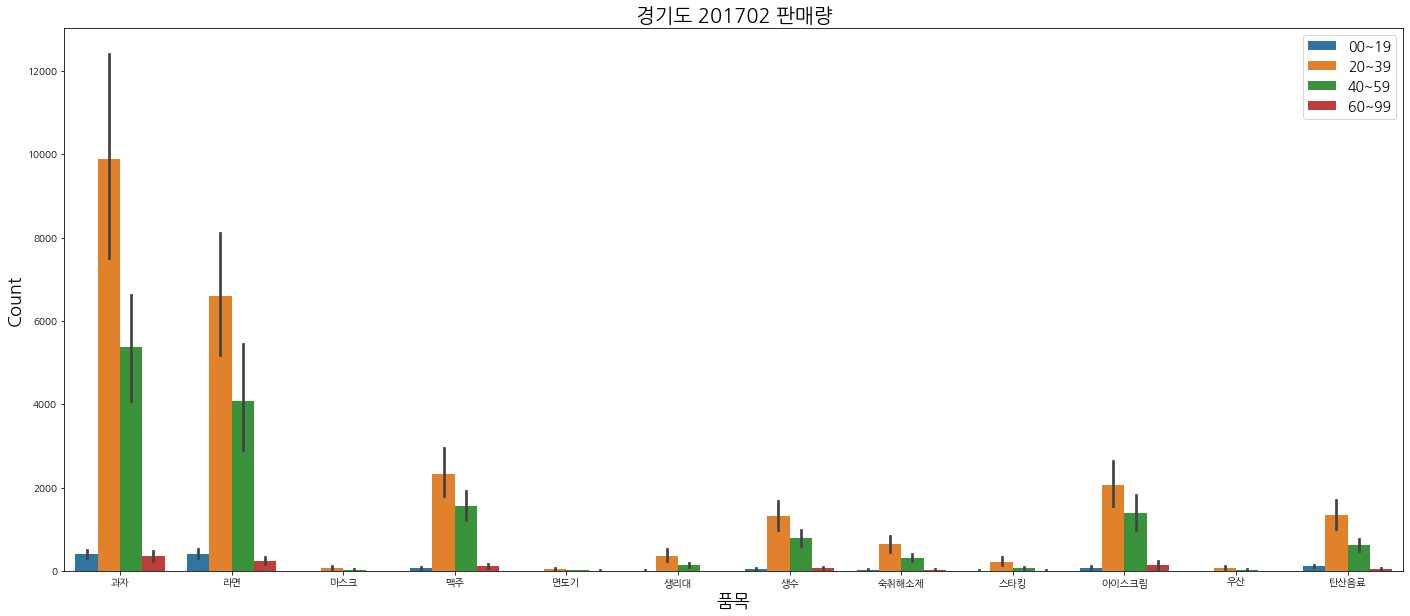

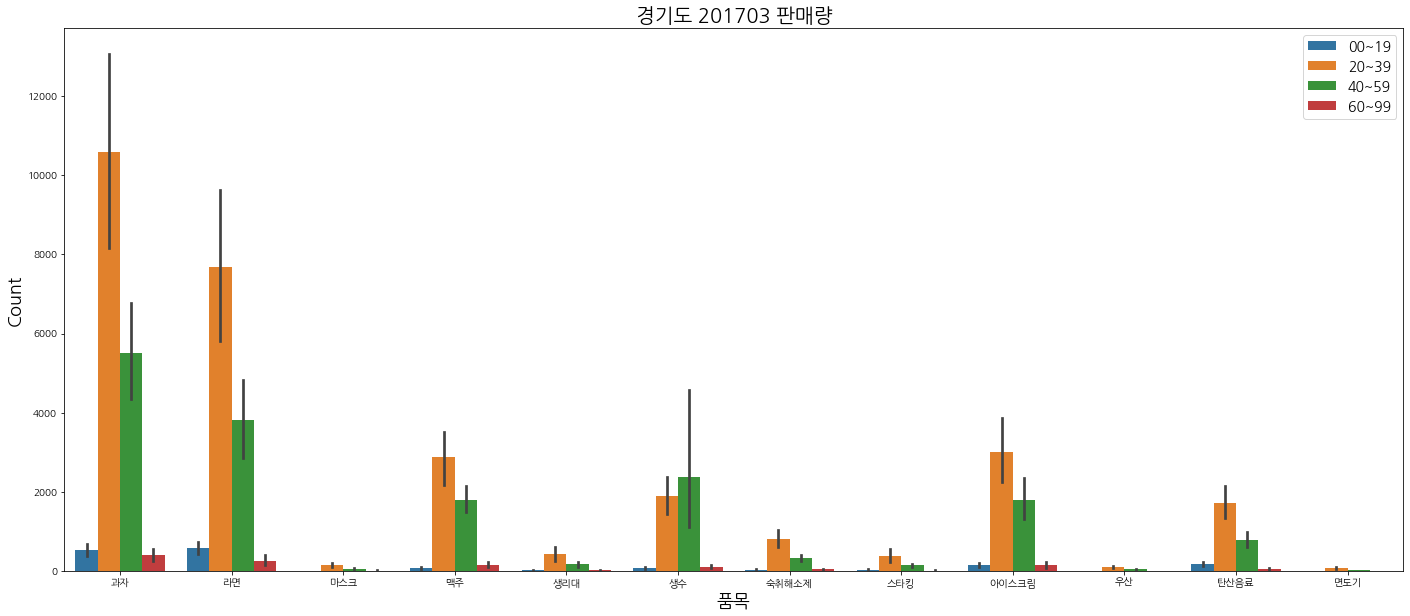

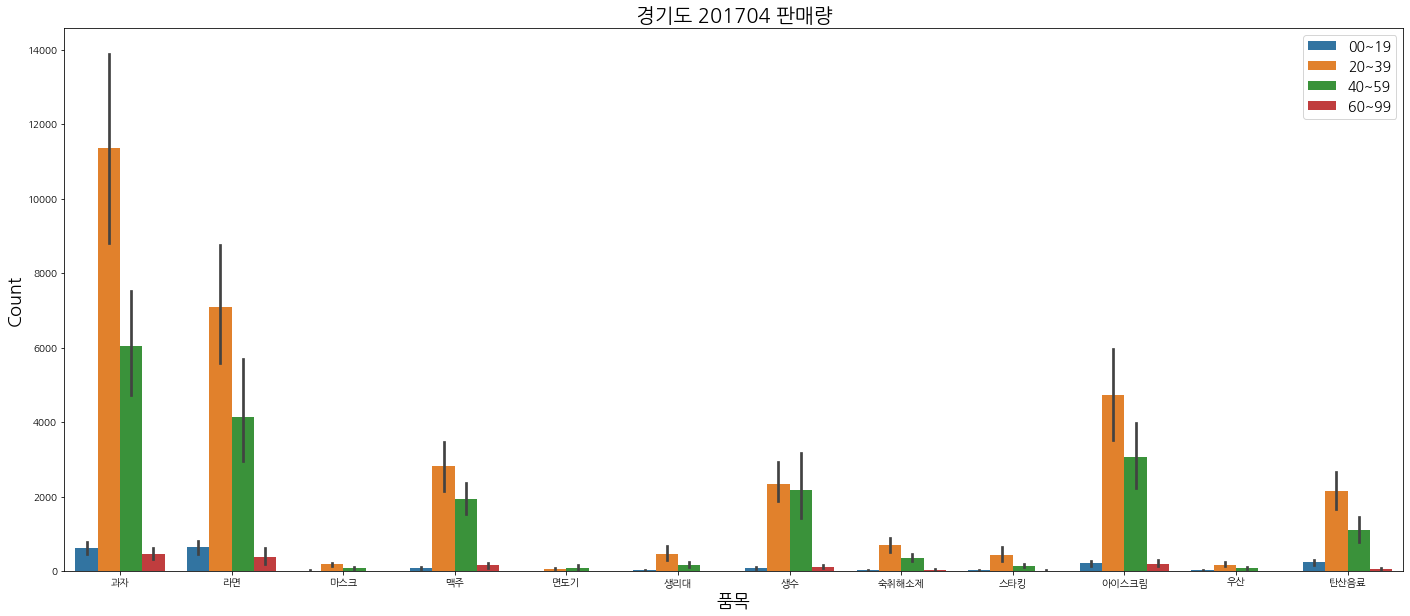

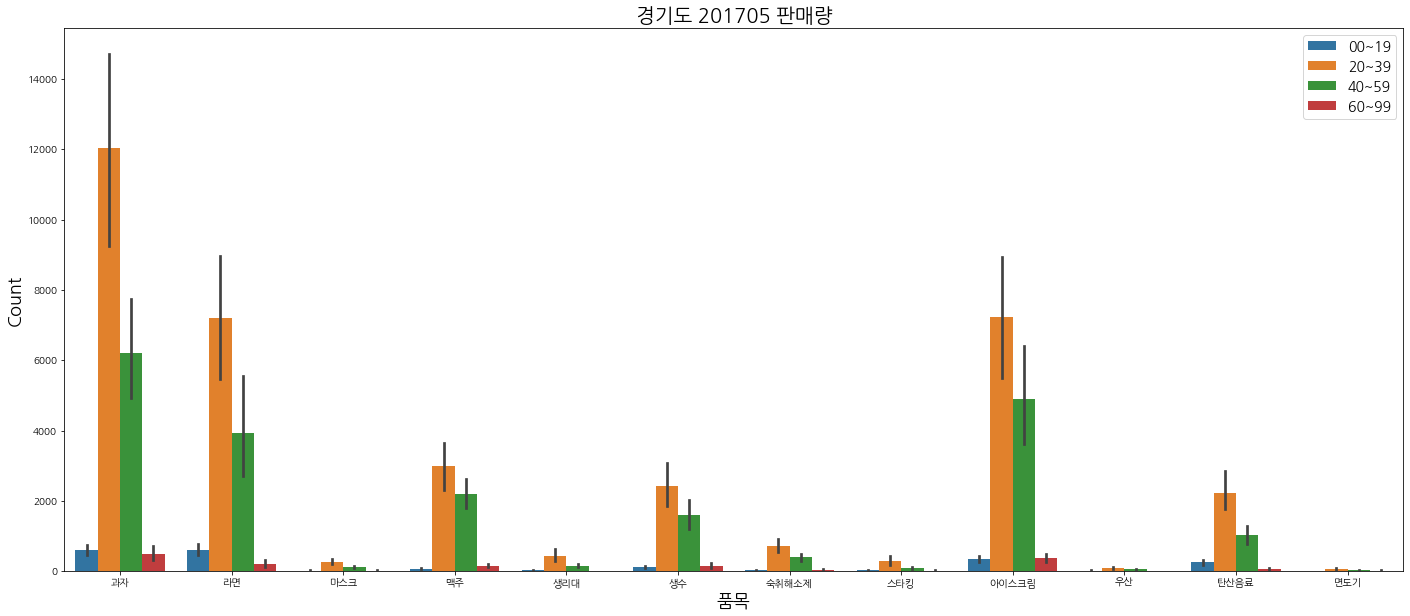

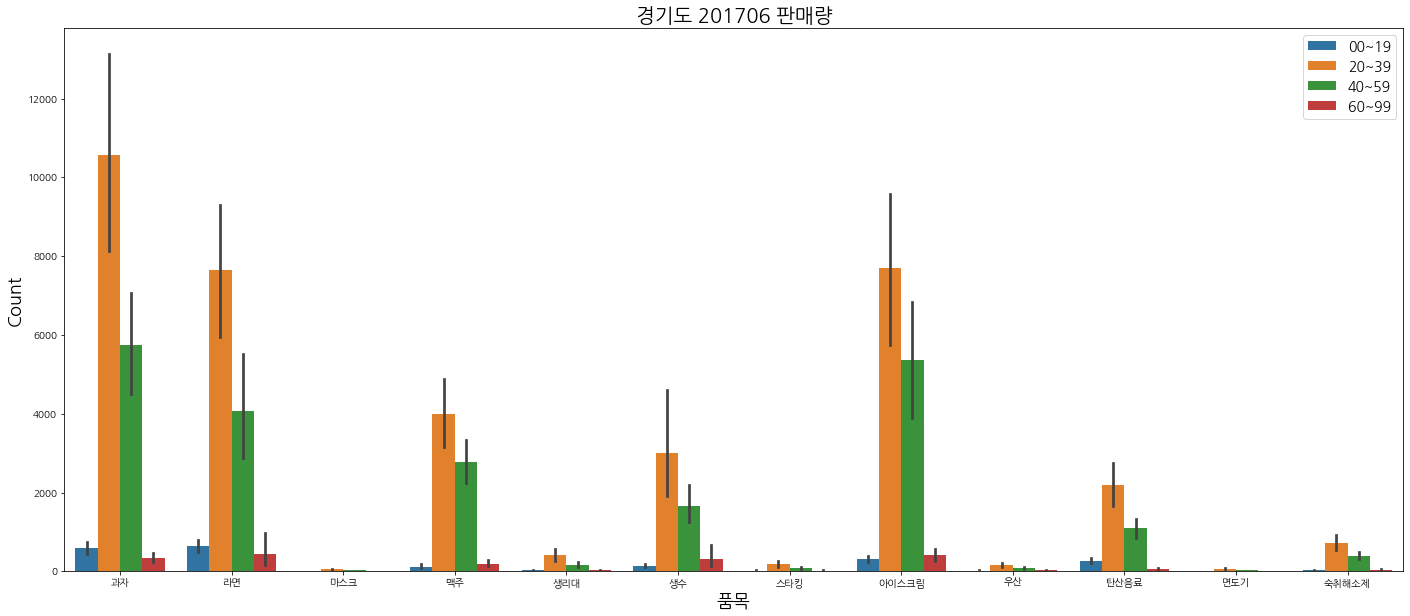

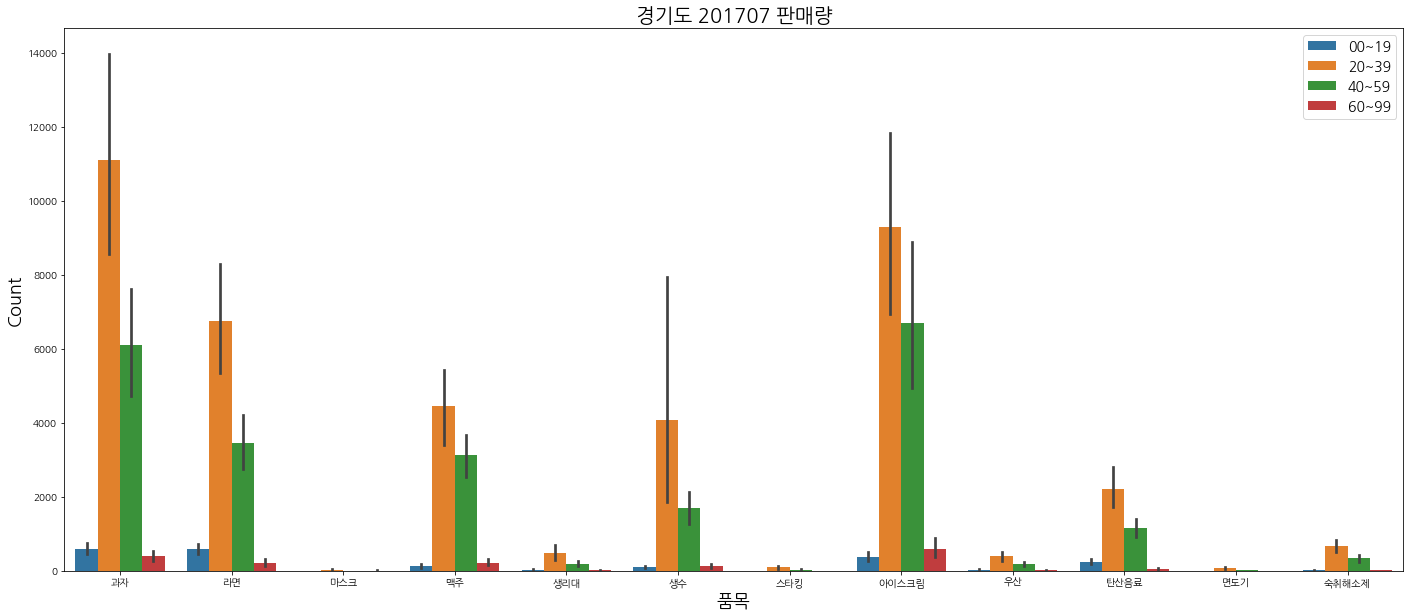

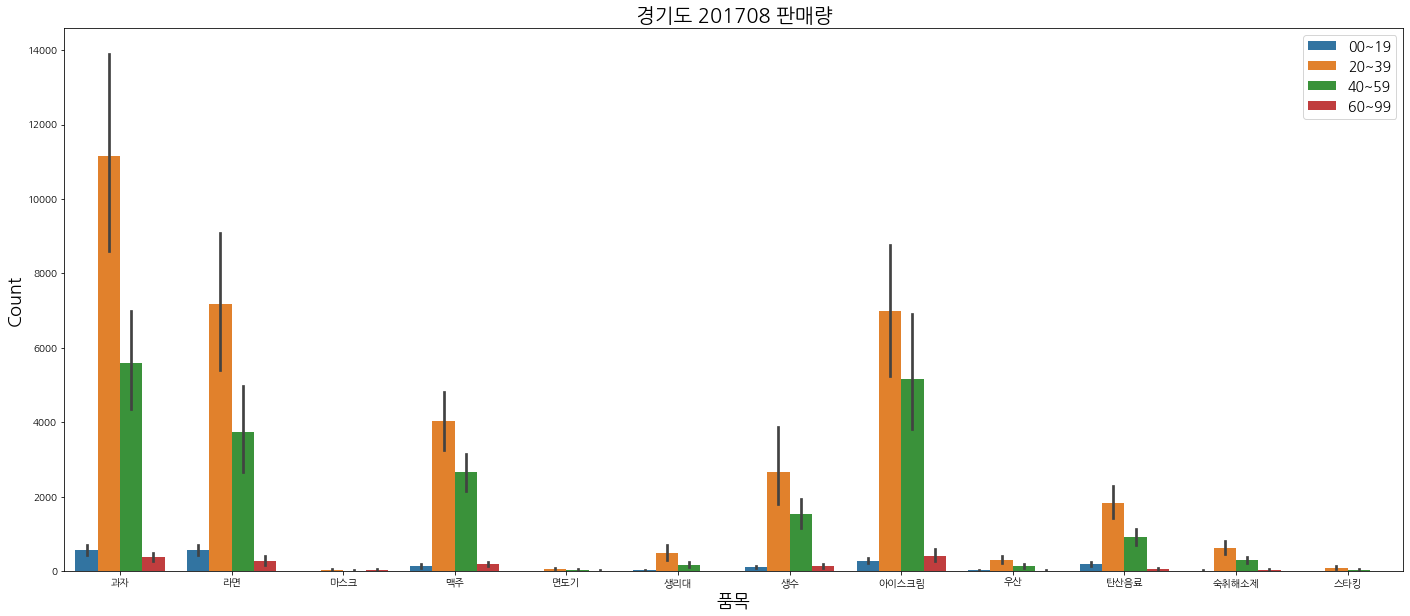

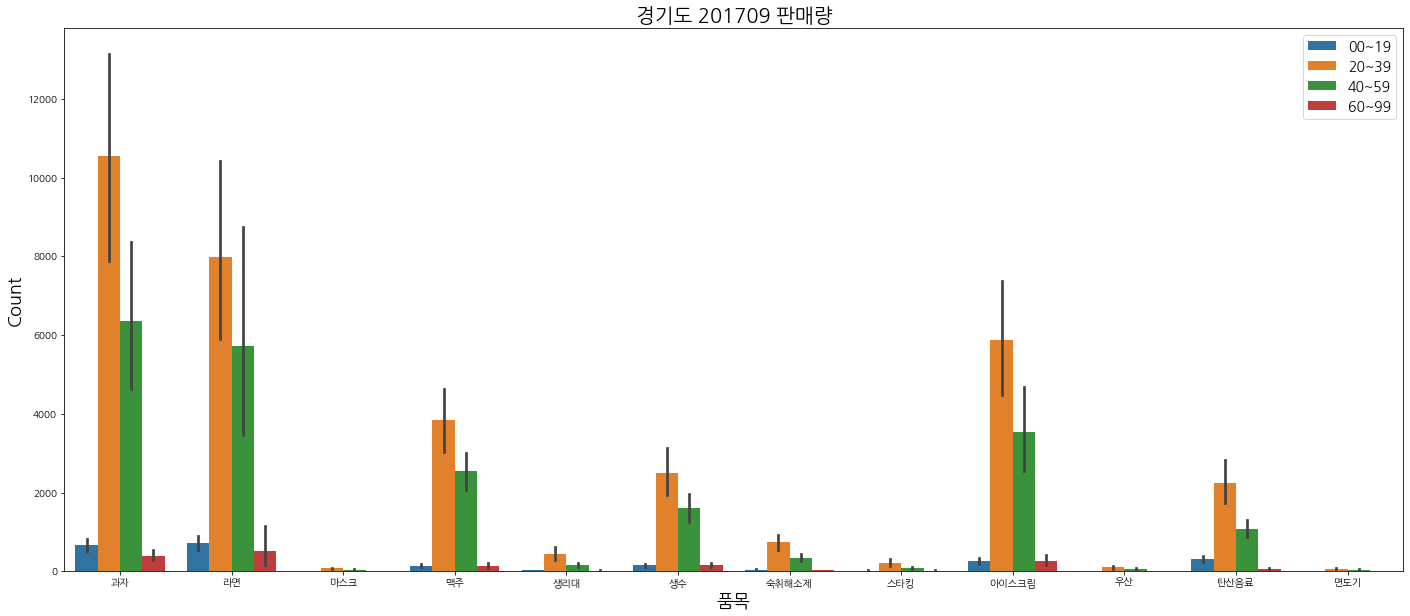

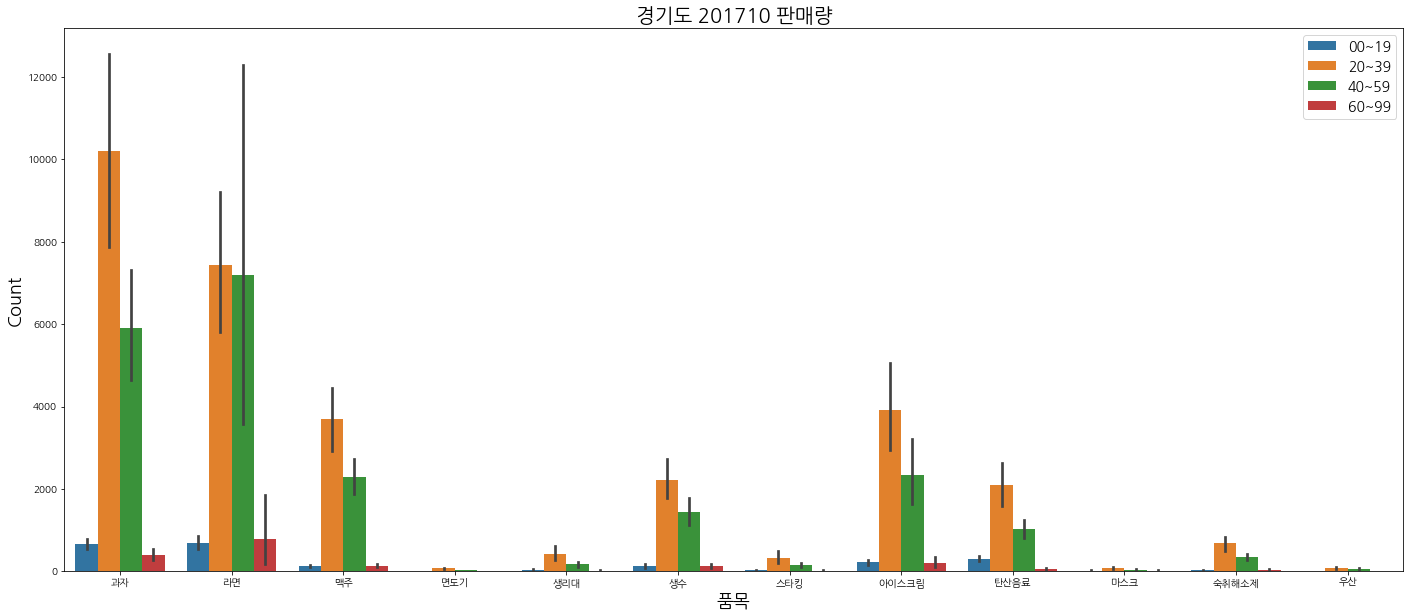

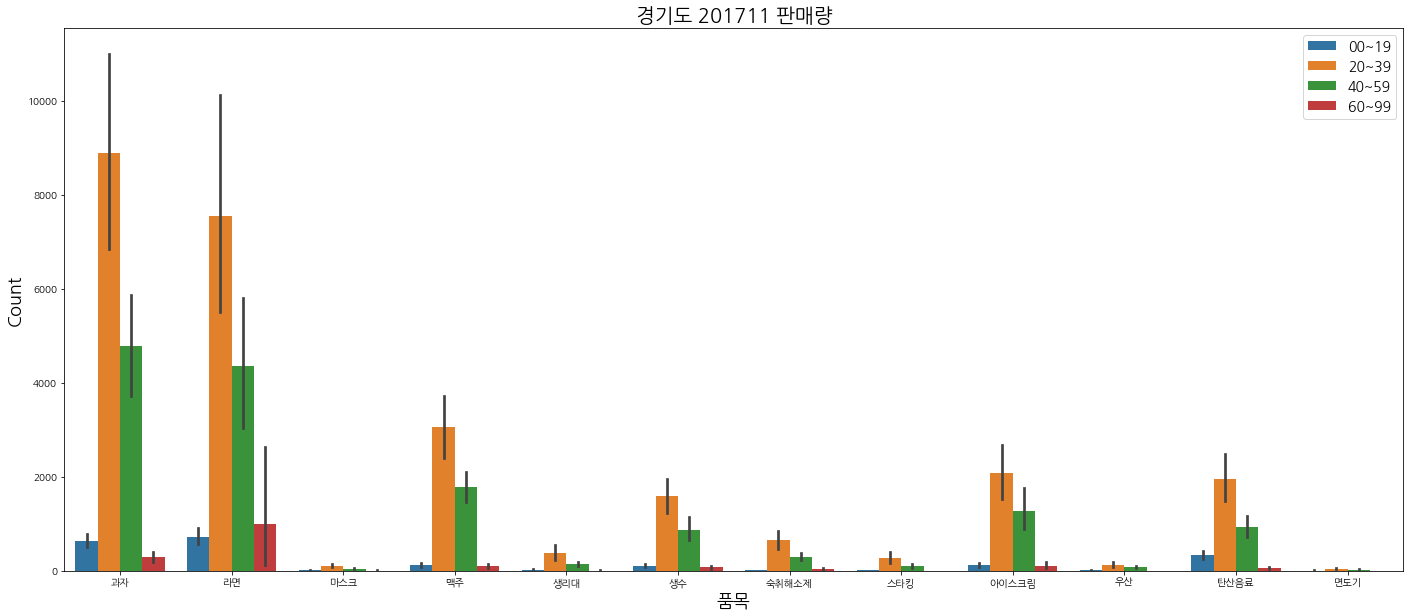

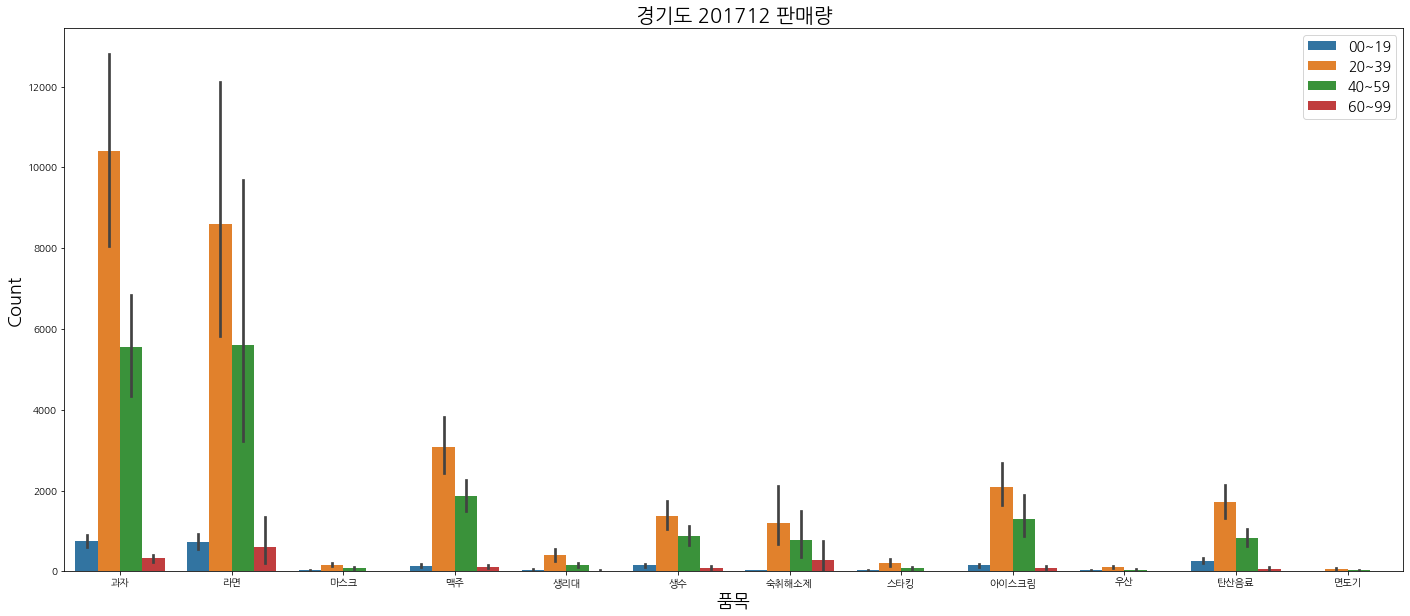

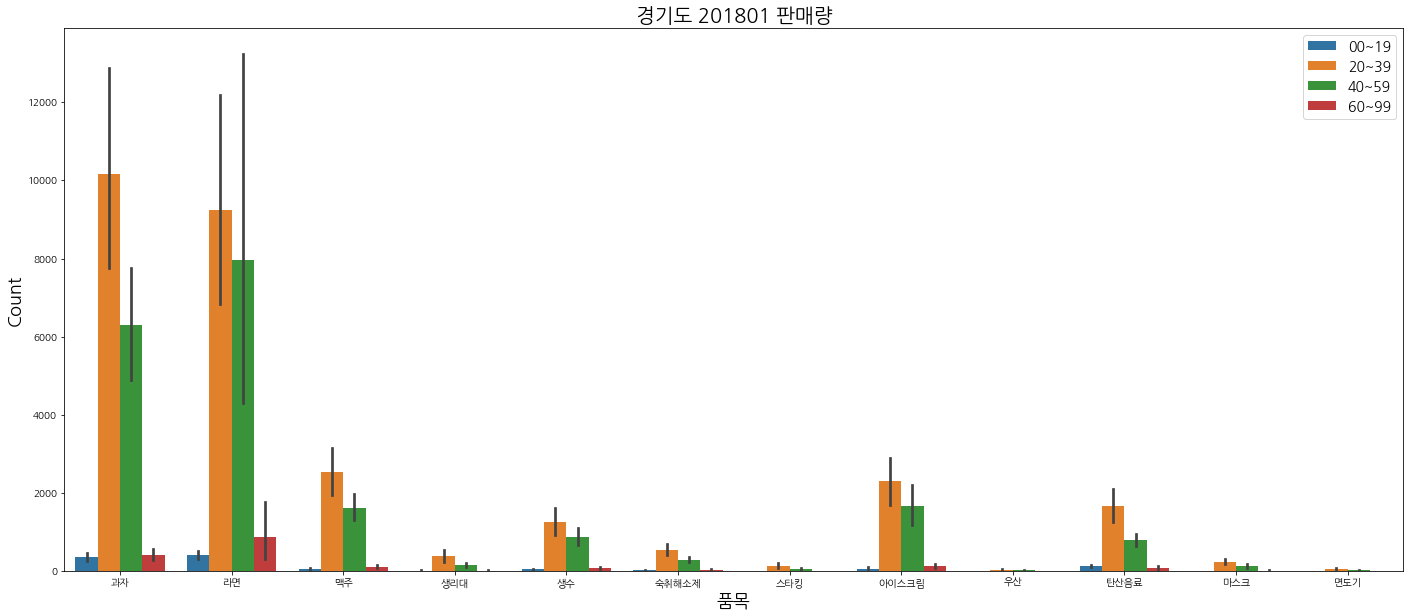

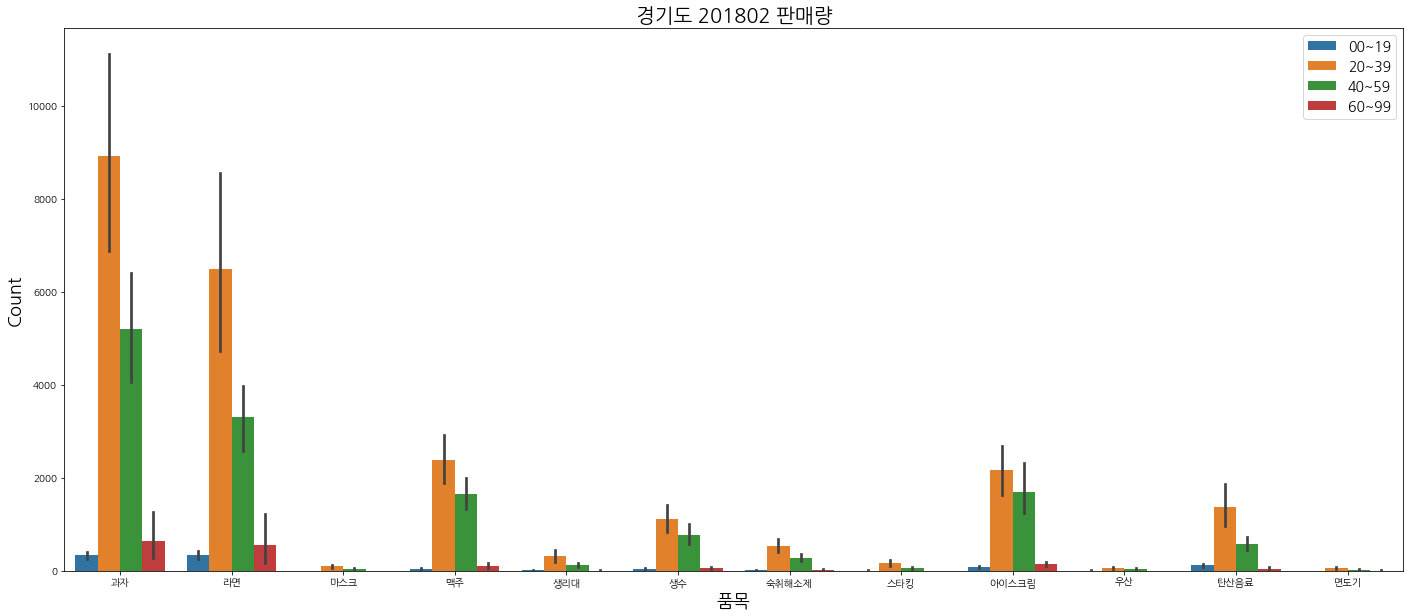

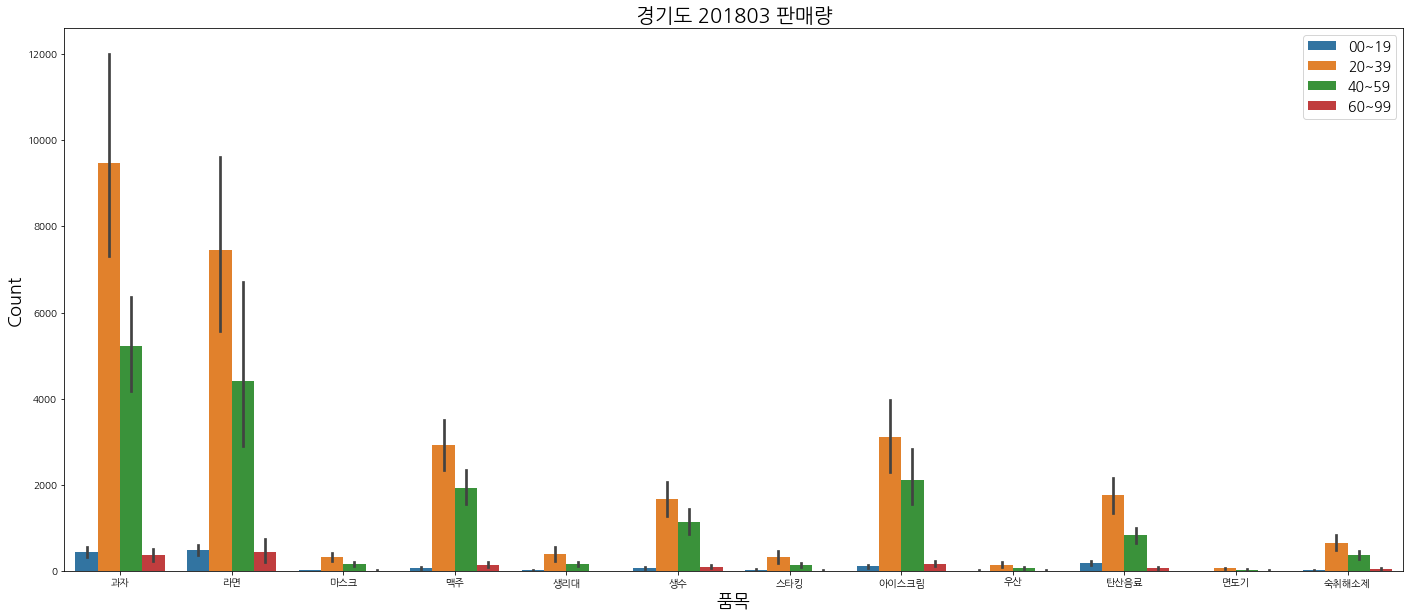

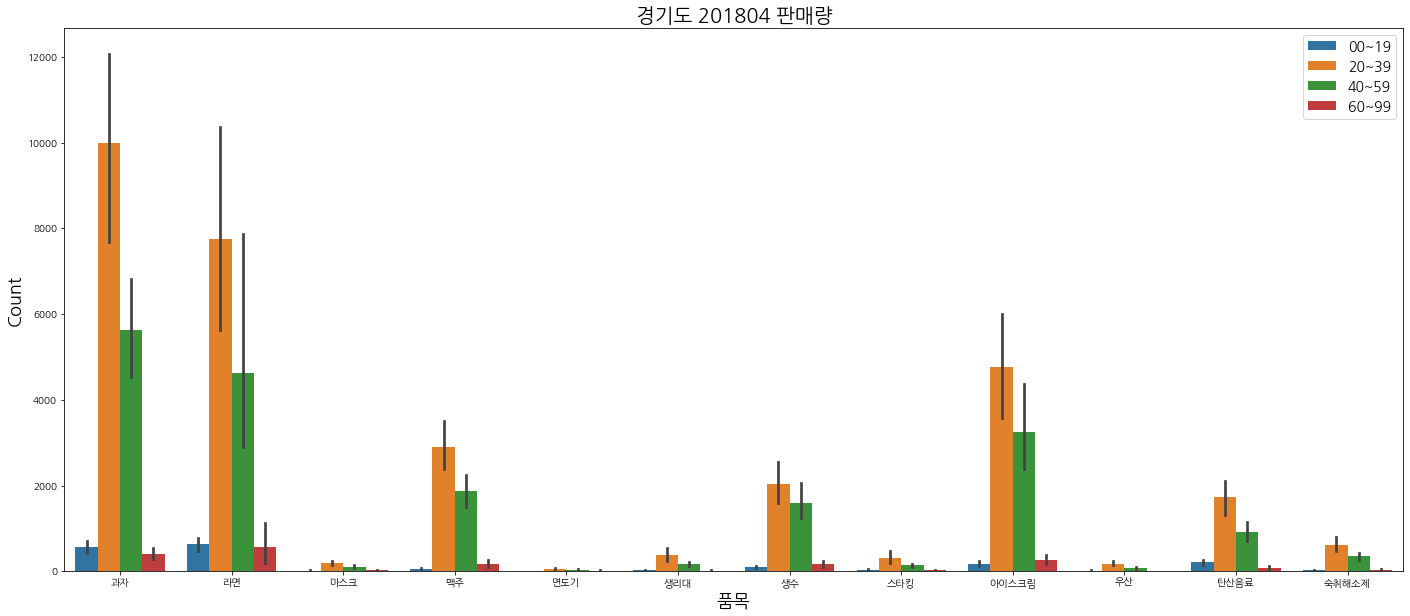

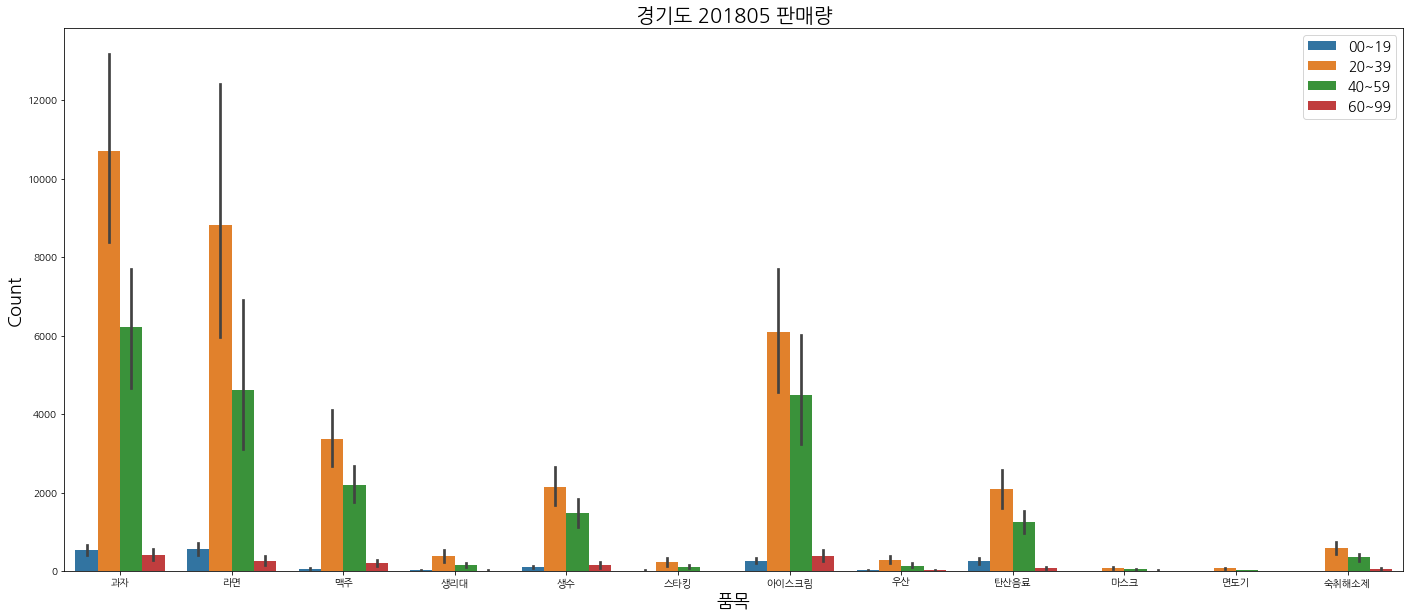

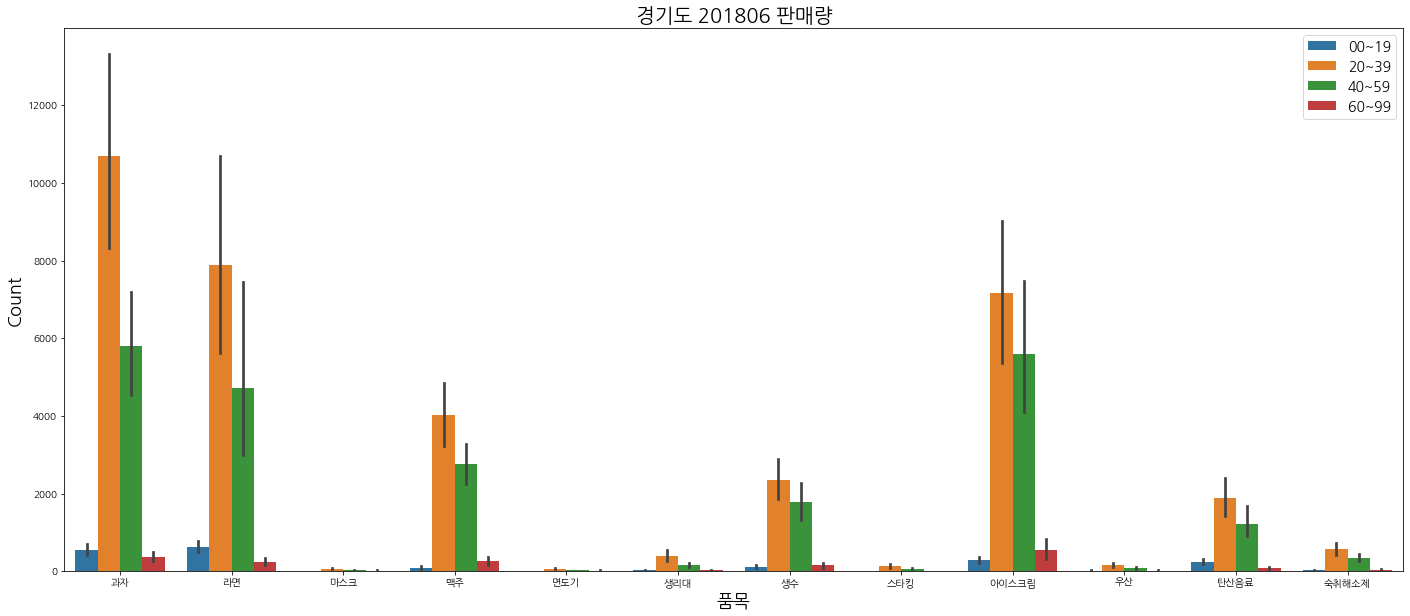

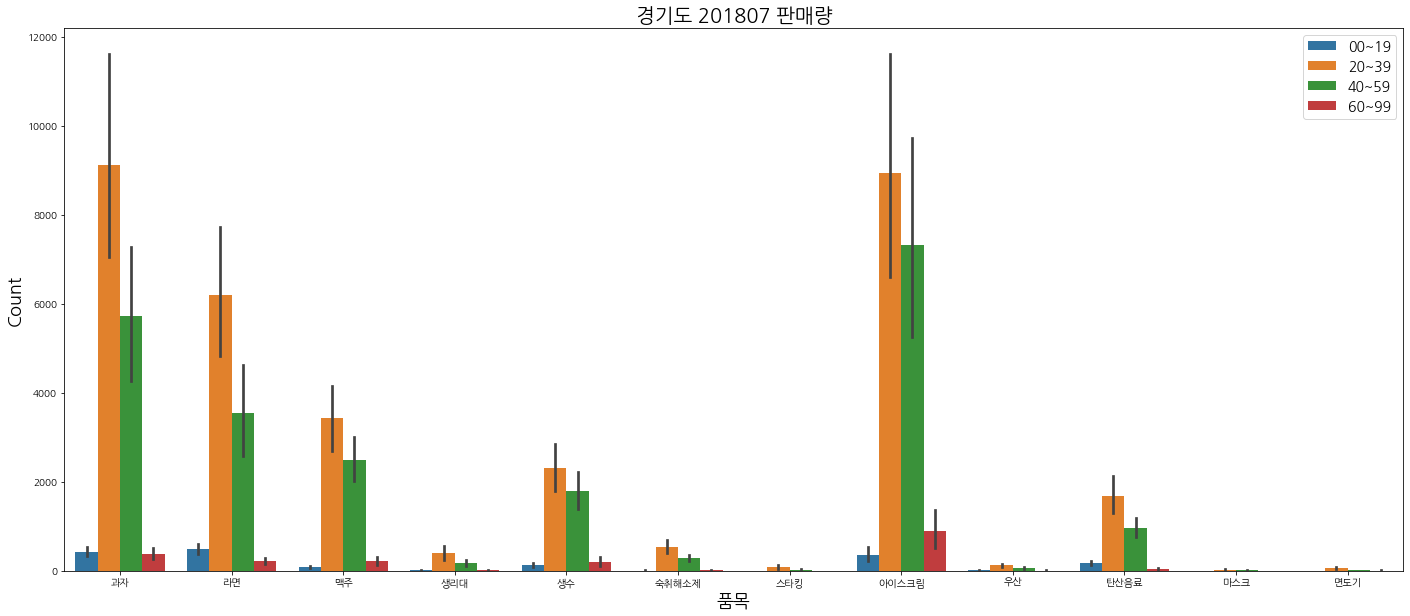

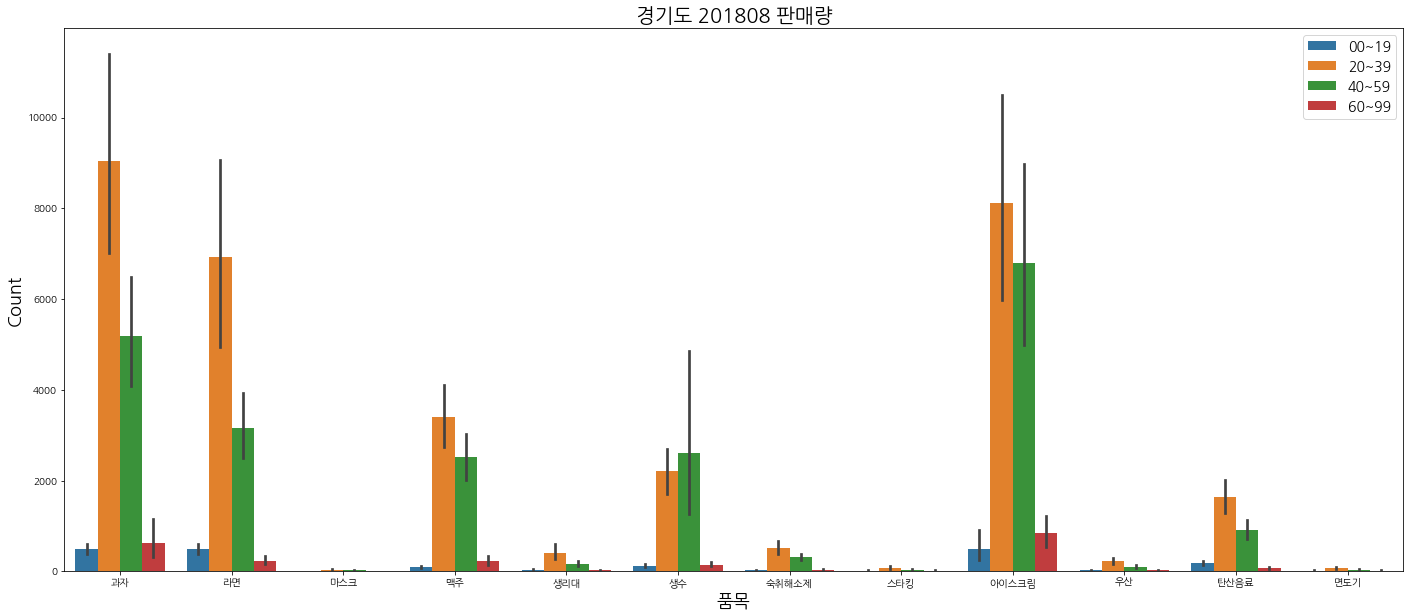

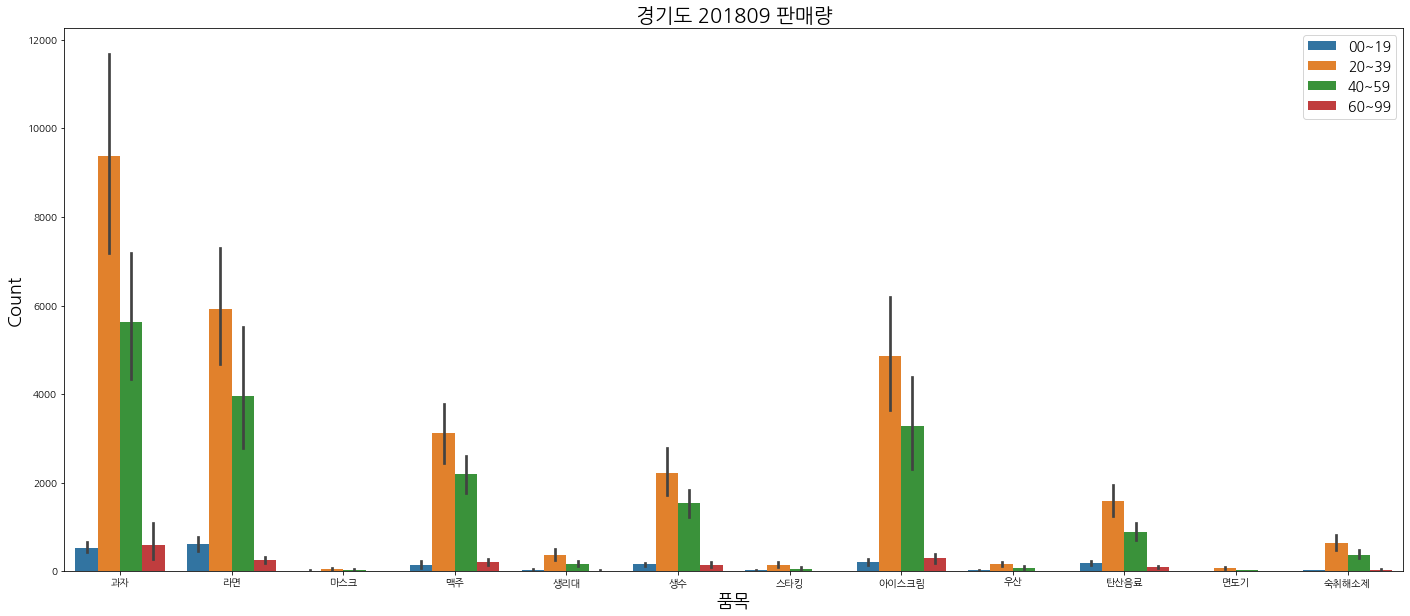

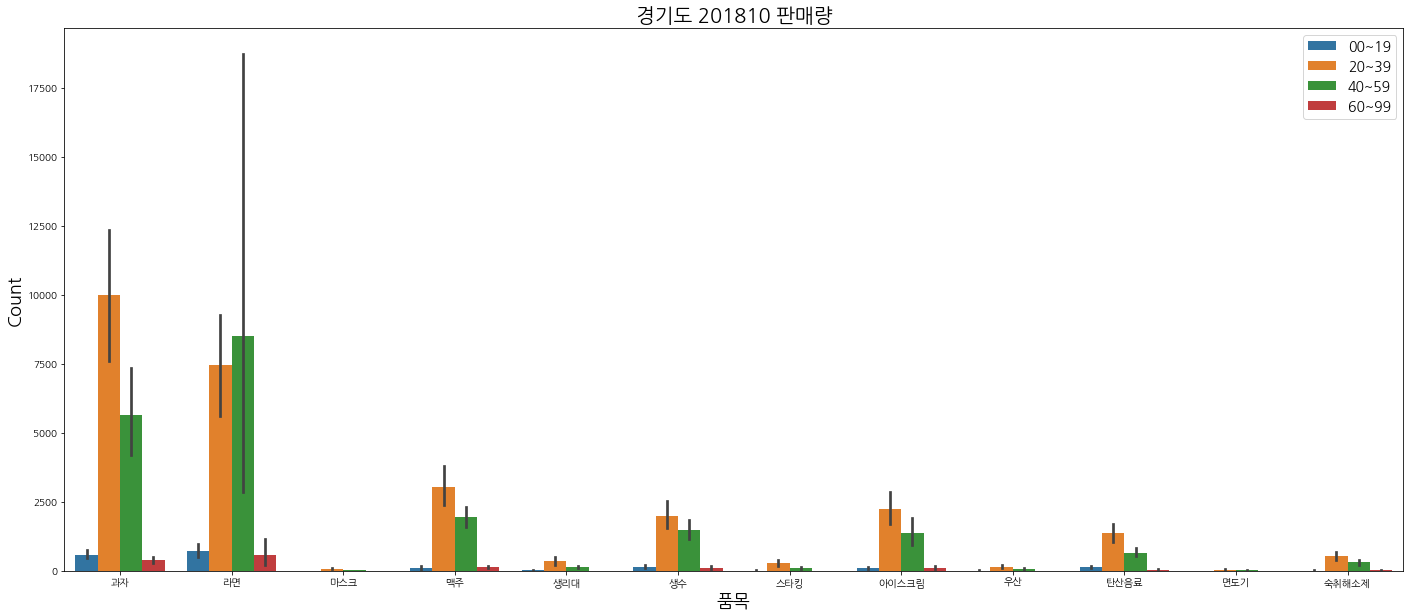

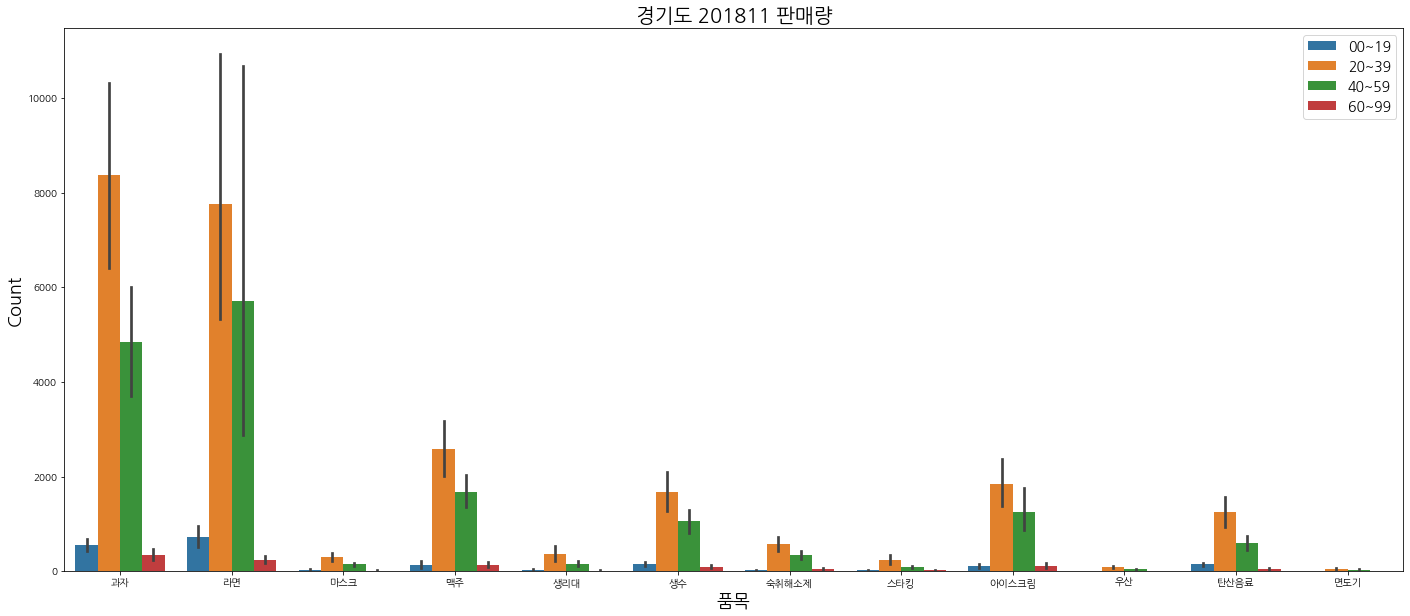

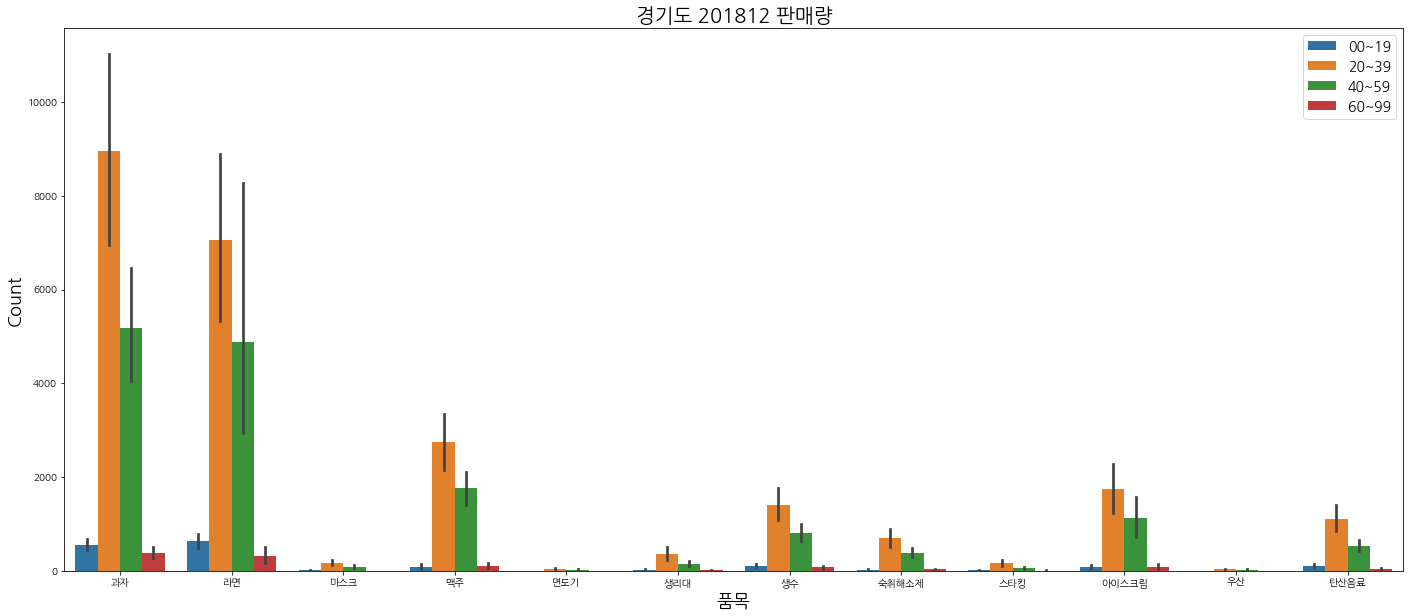

In [67]:
visualization(gyunggido_month_slice,full_month,category='korea_cvs.age_cd',title='경기도')

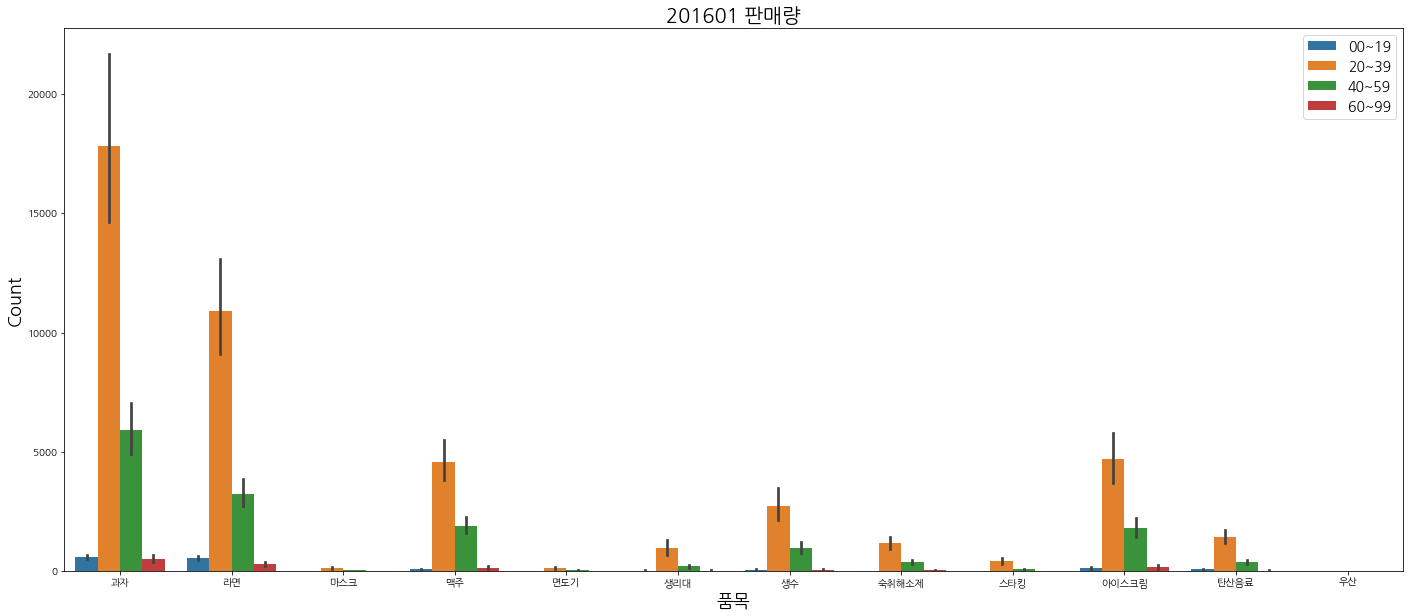

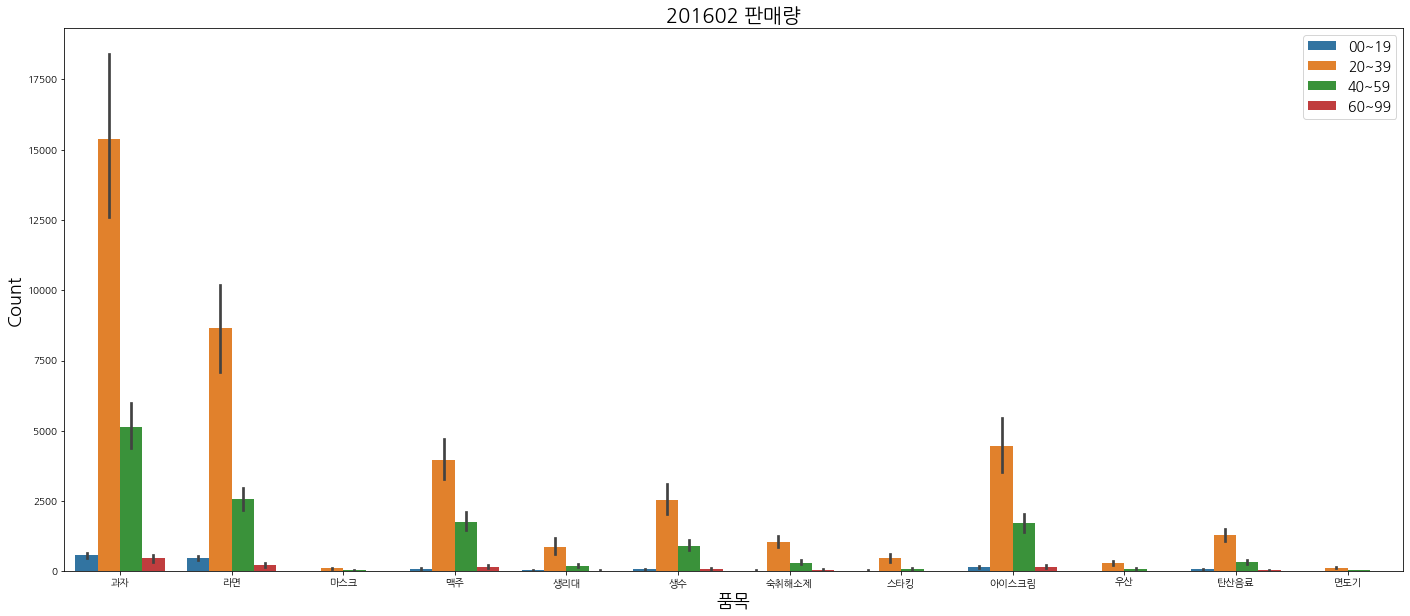

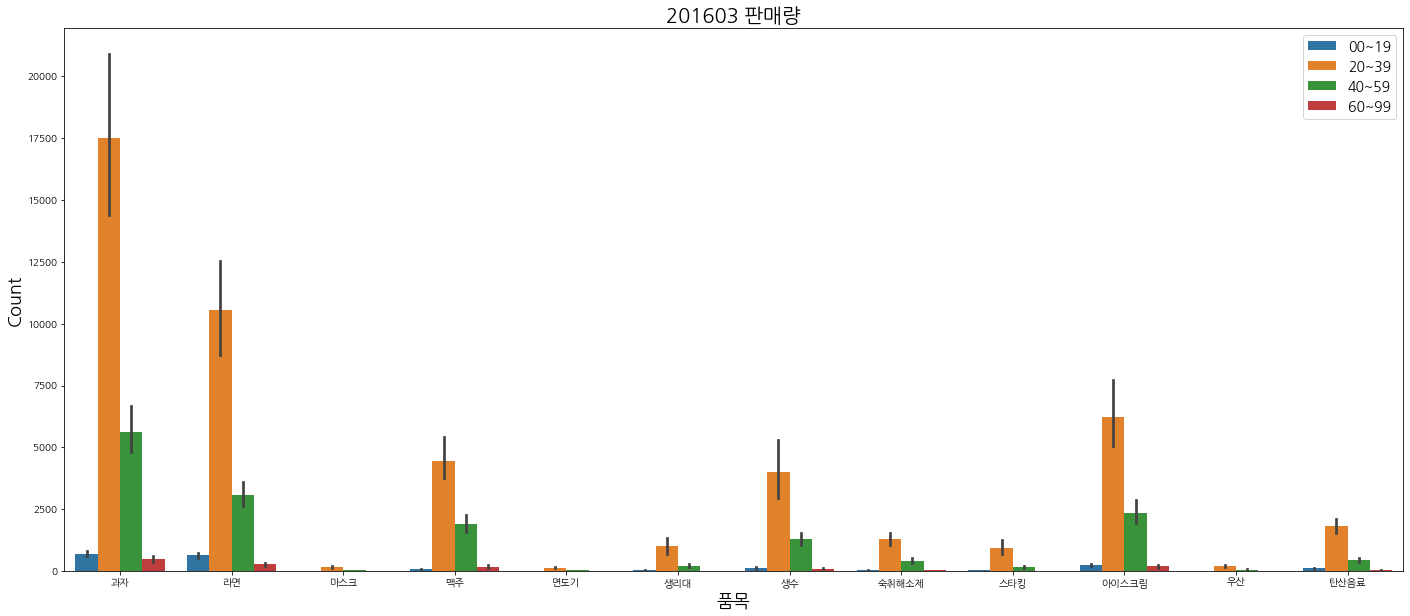

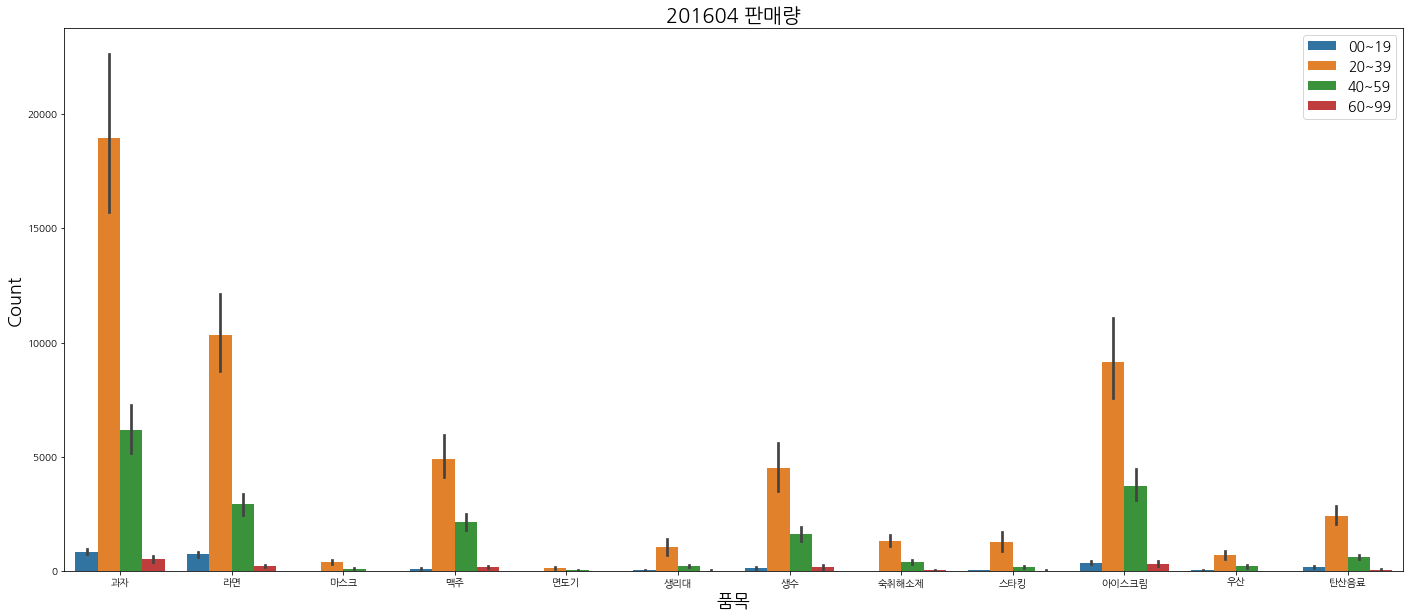

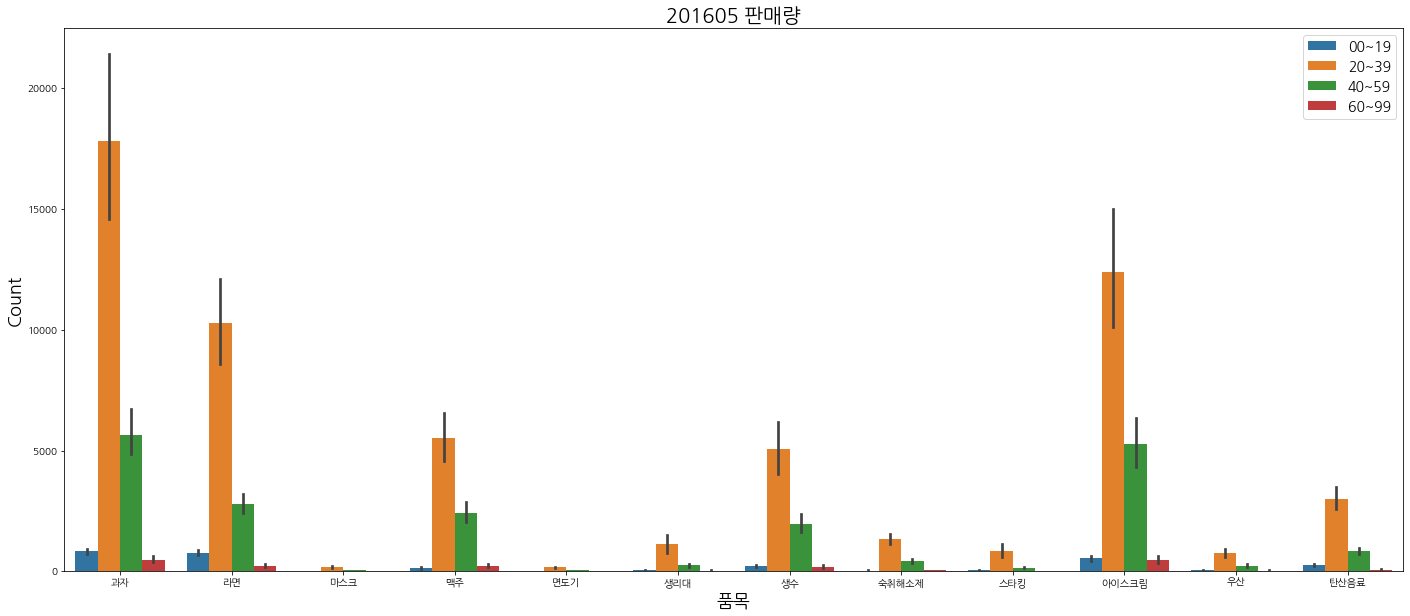

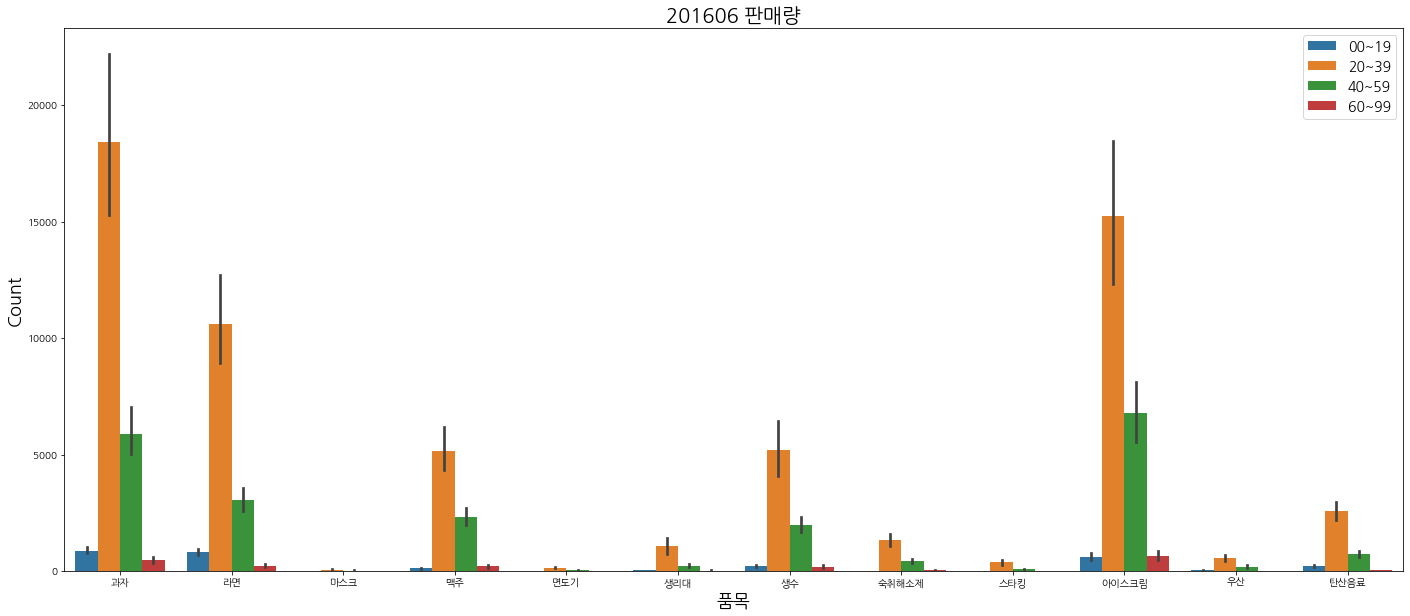

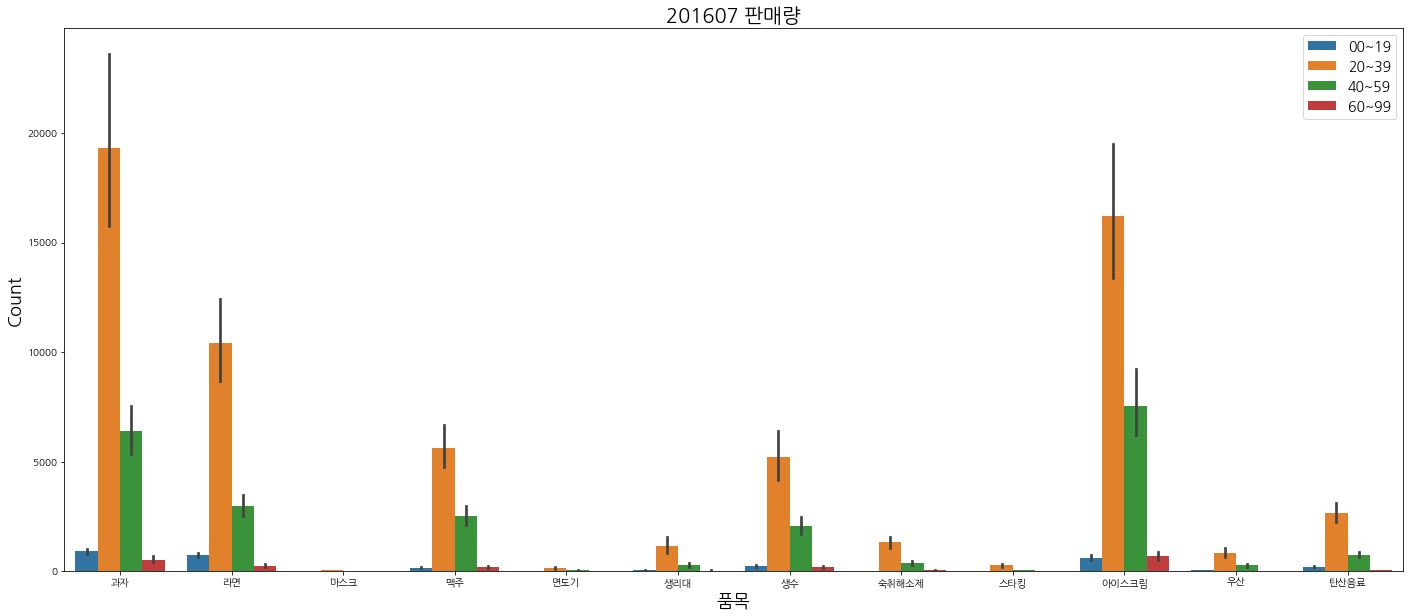

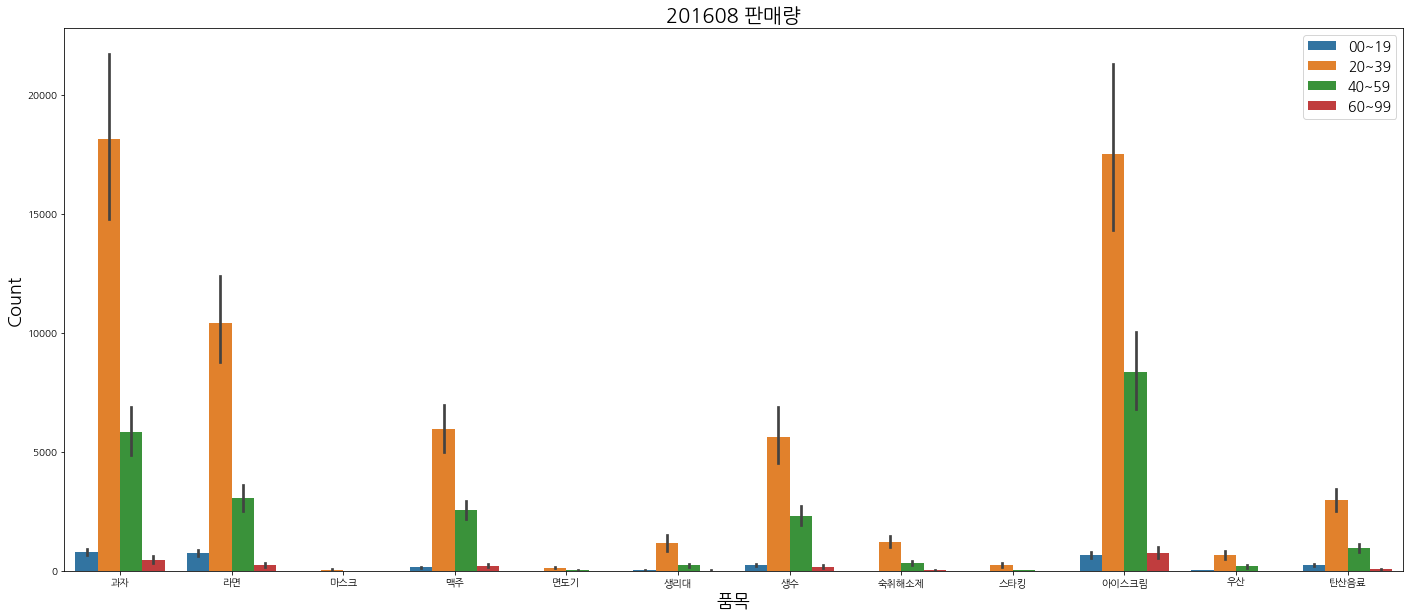

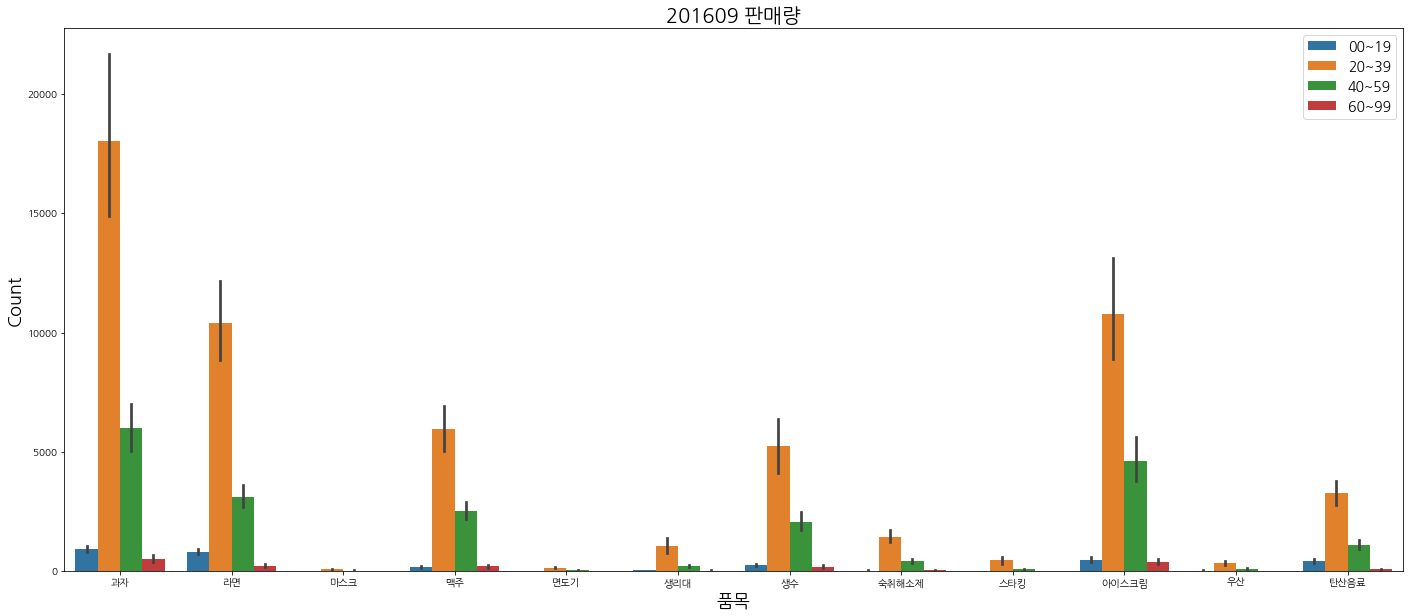

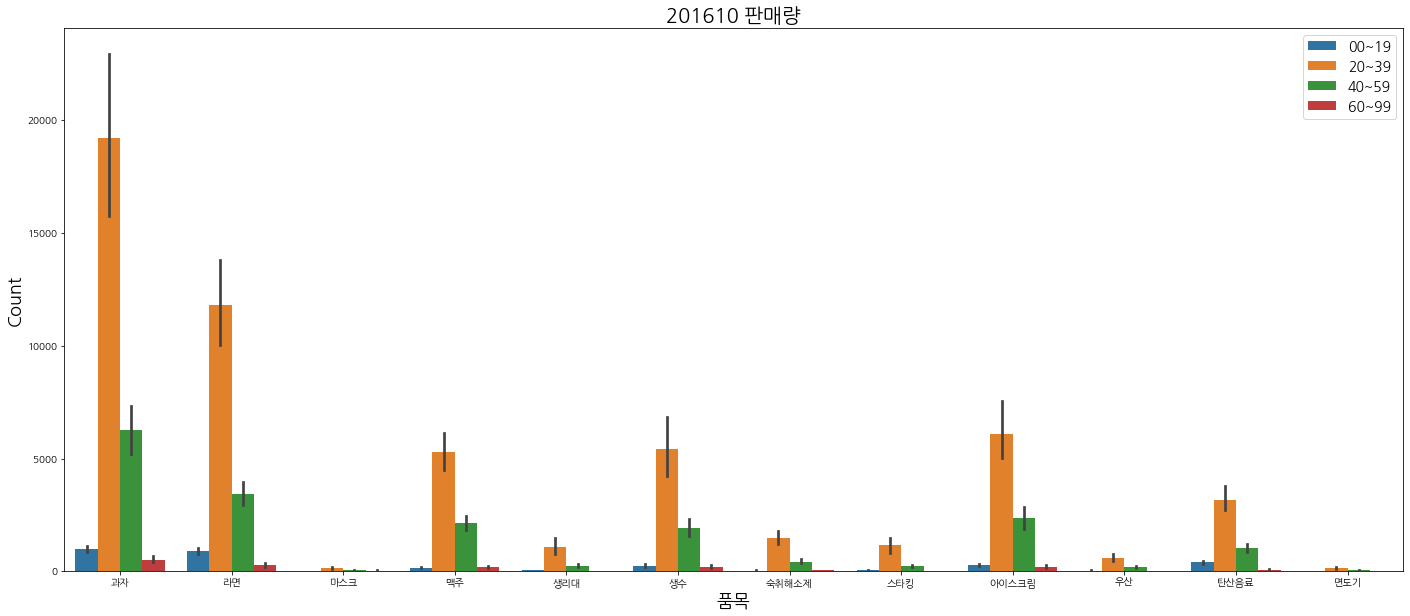

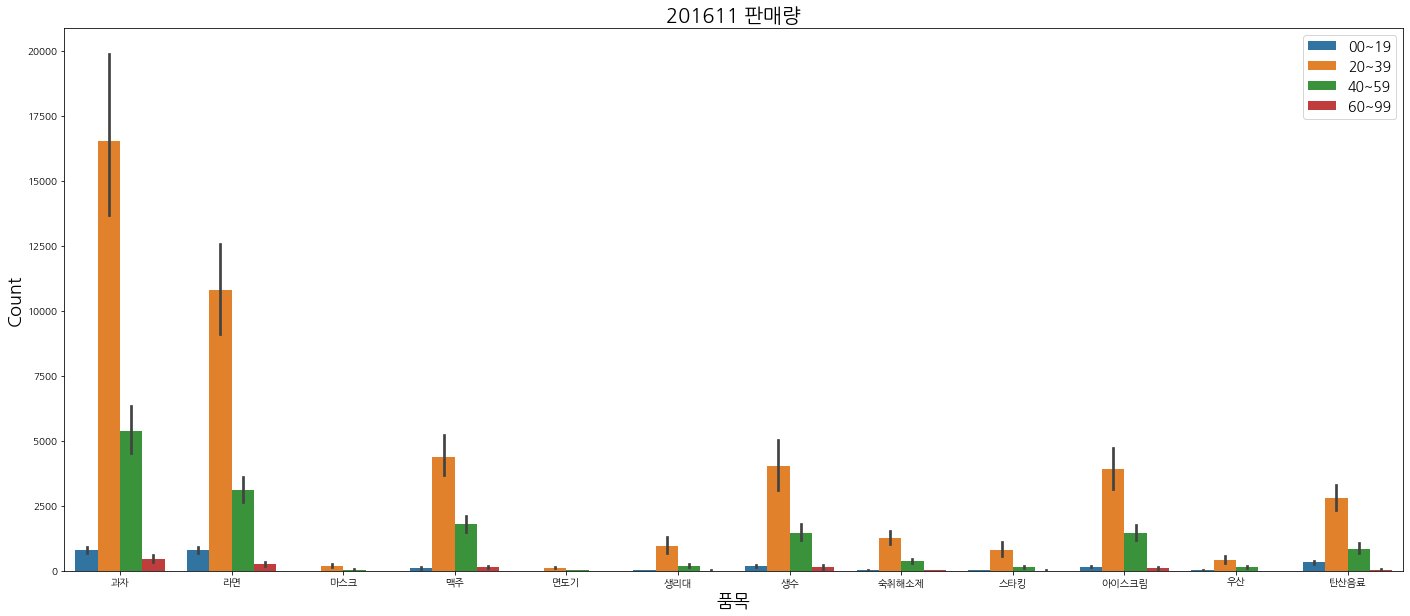

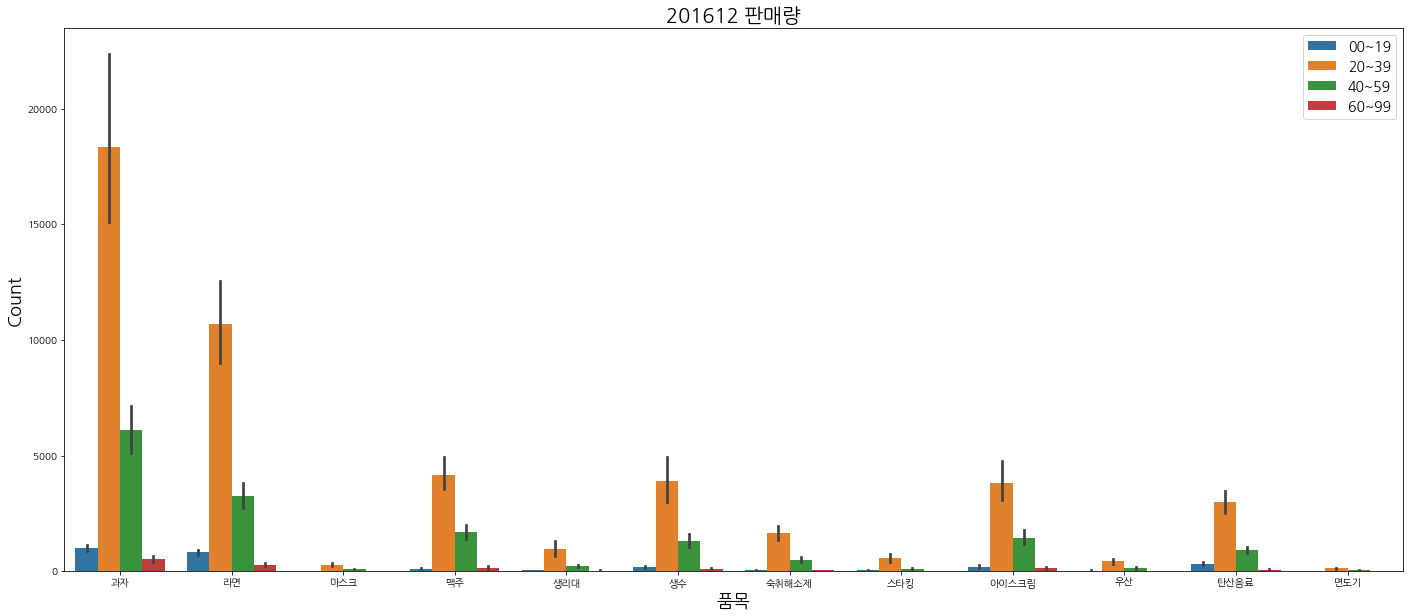

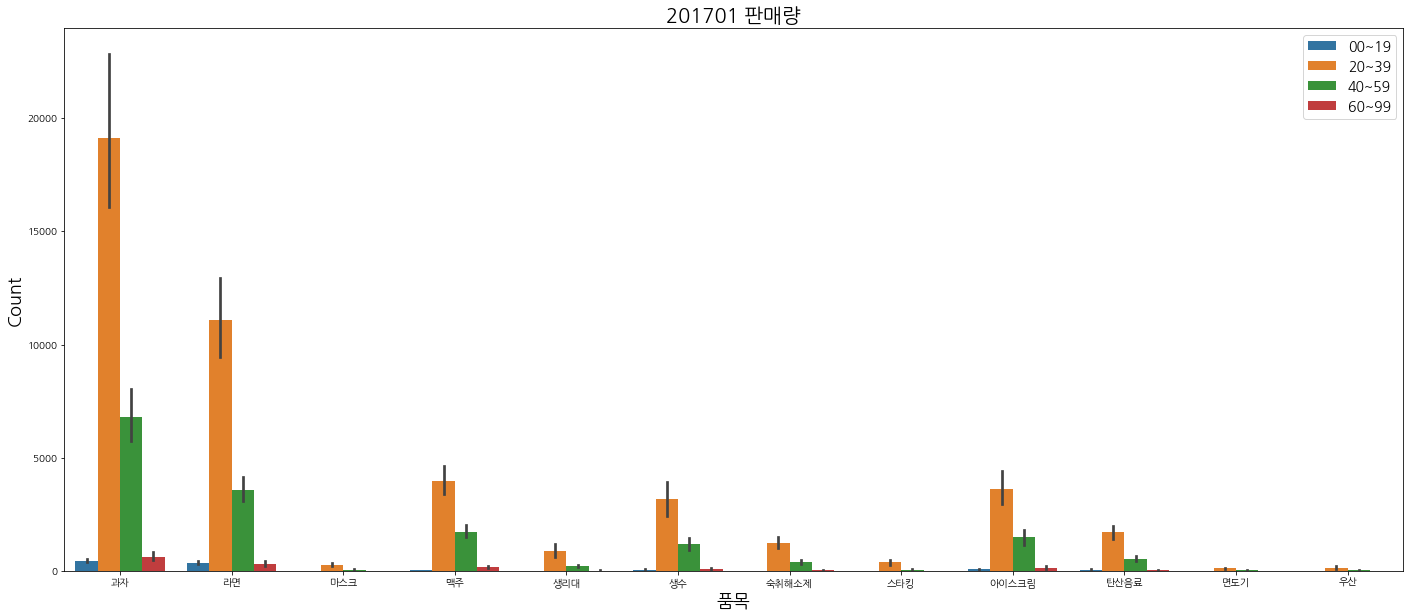

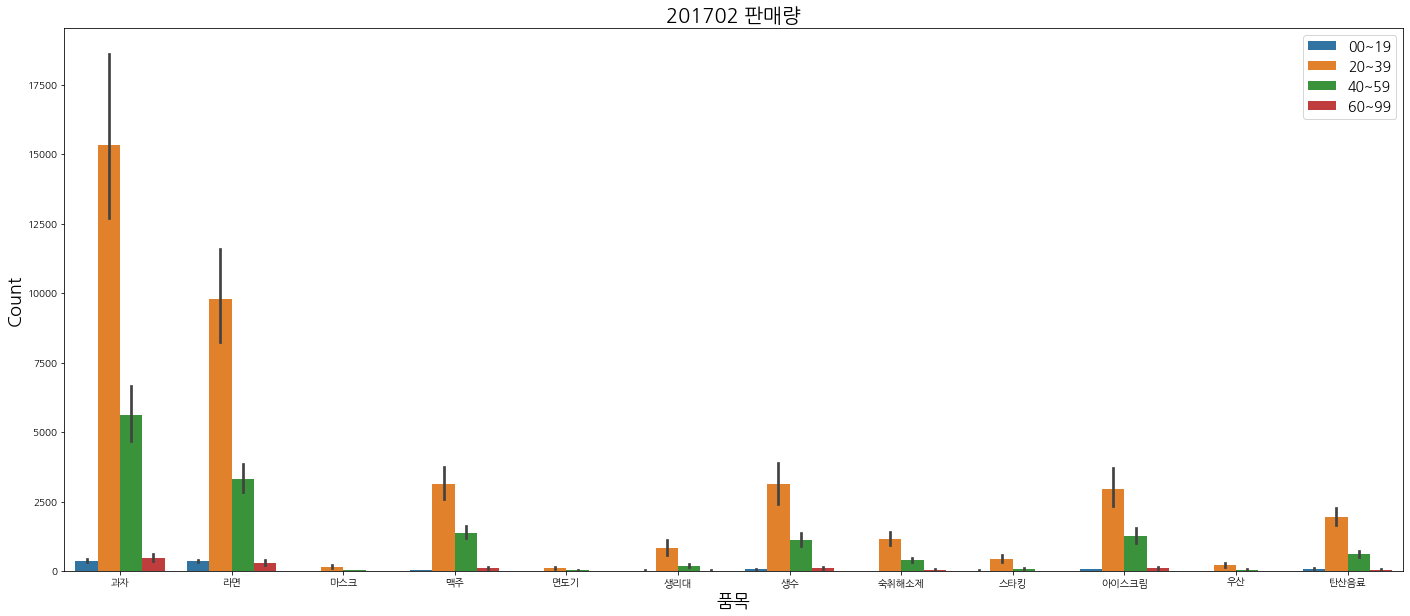

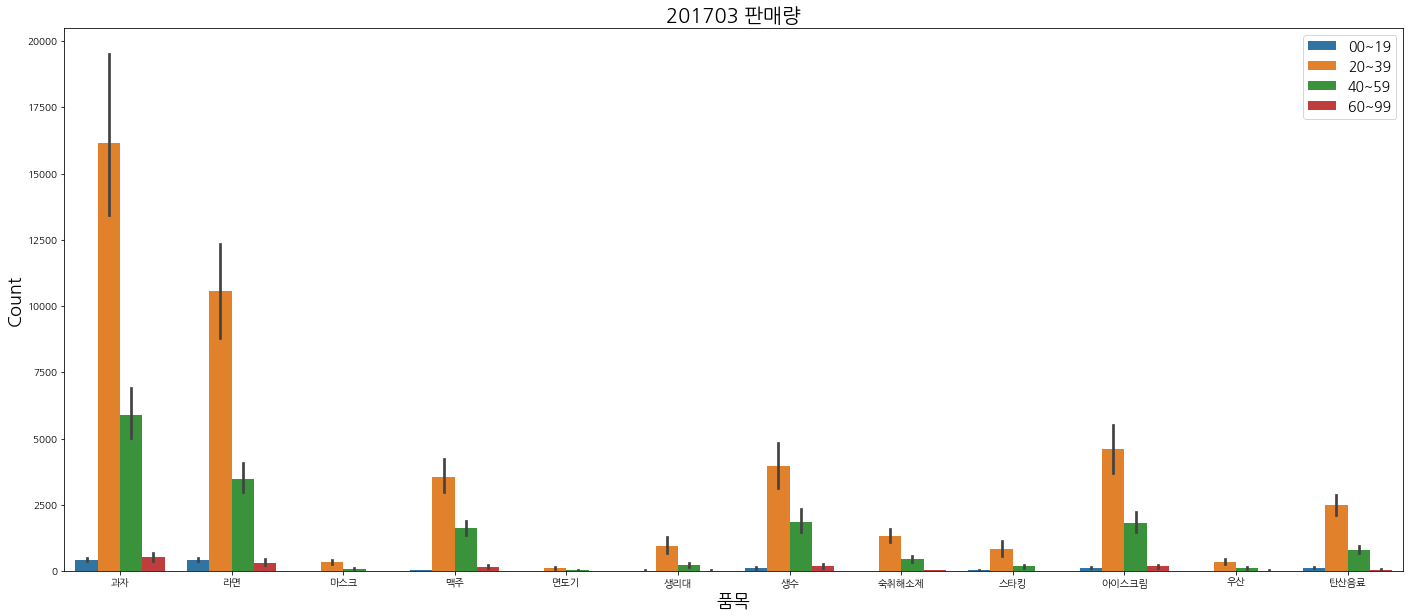

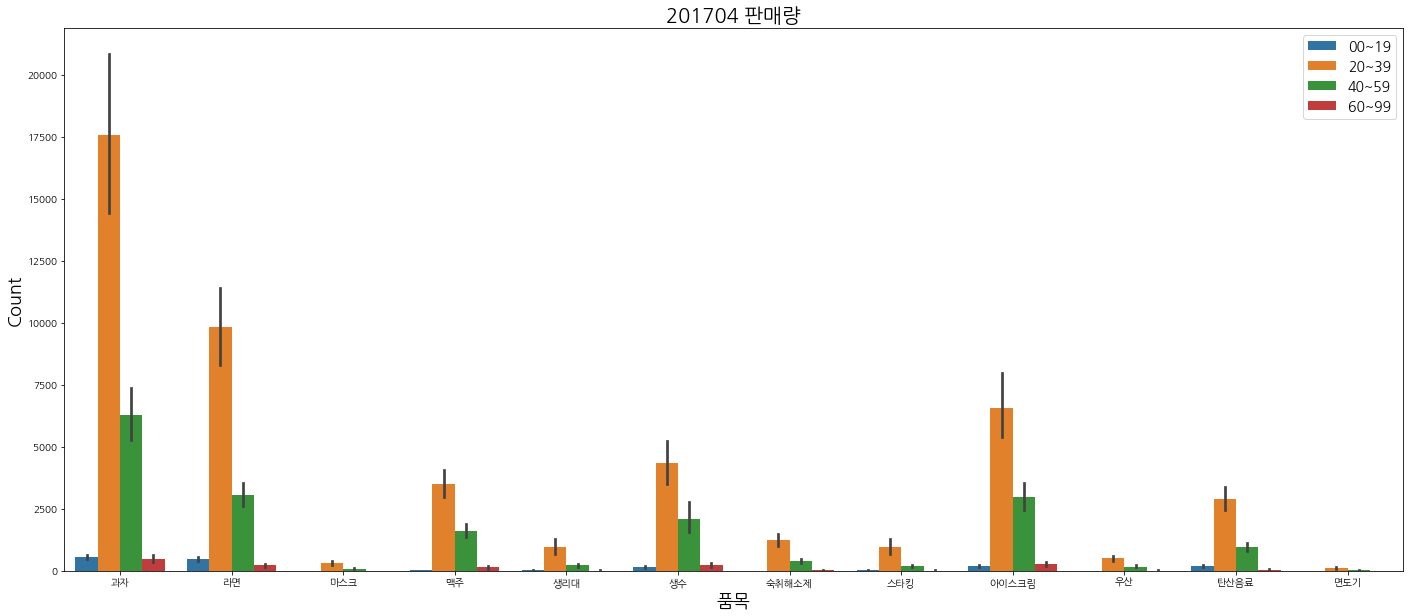

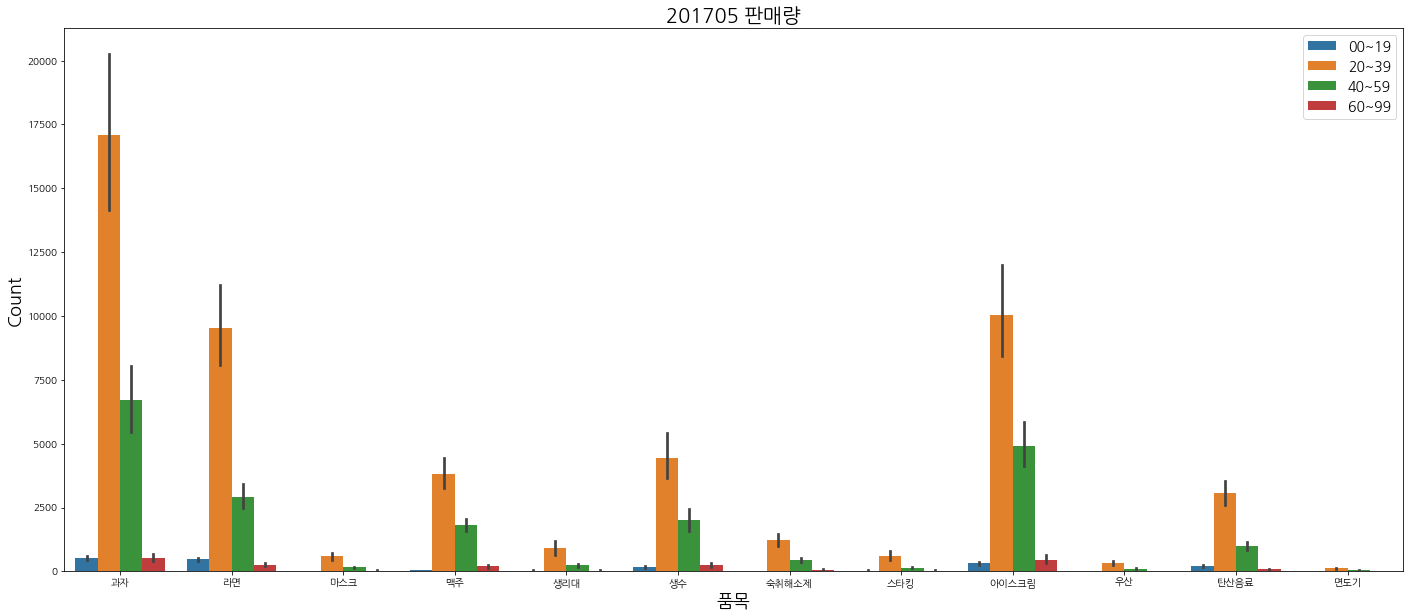

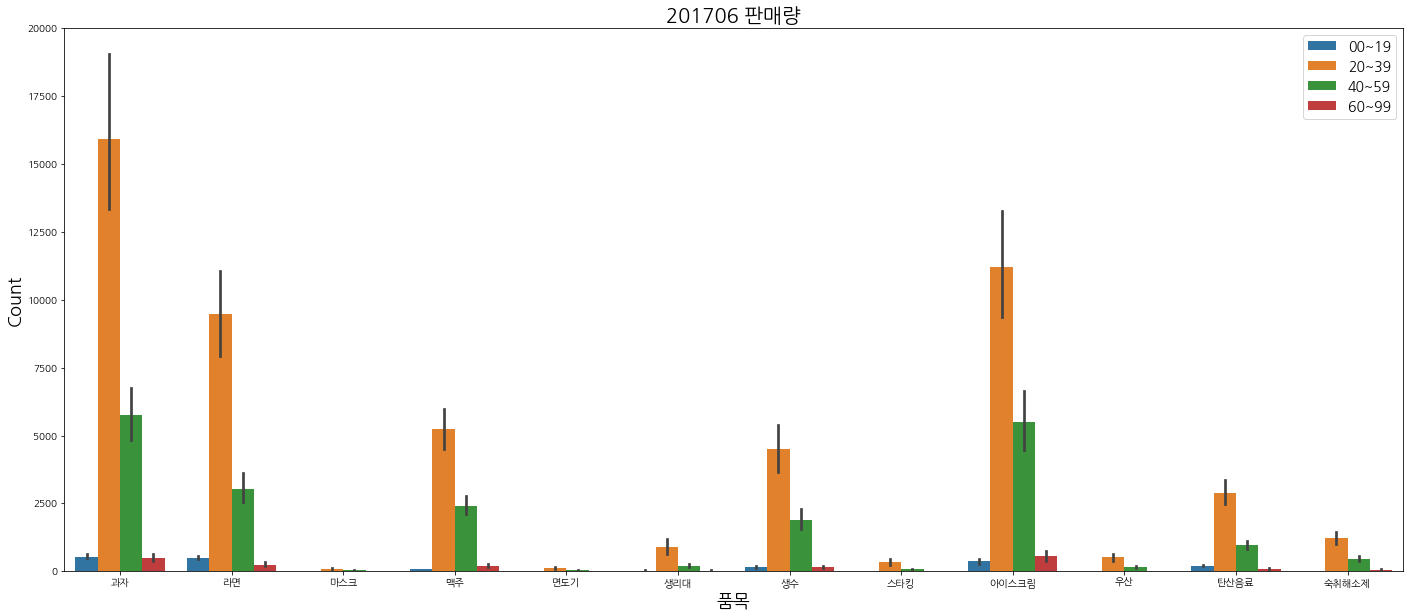

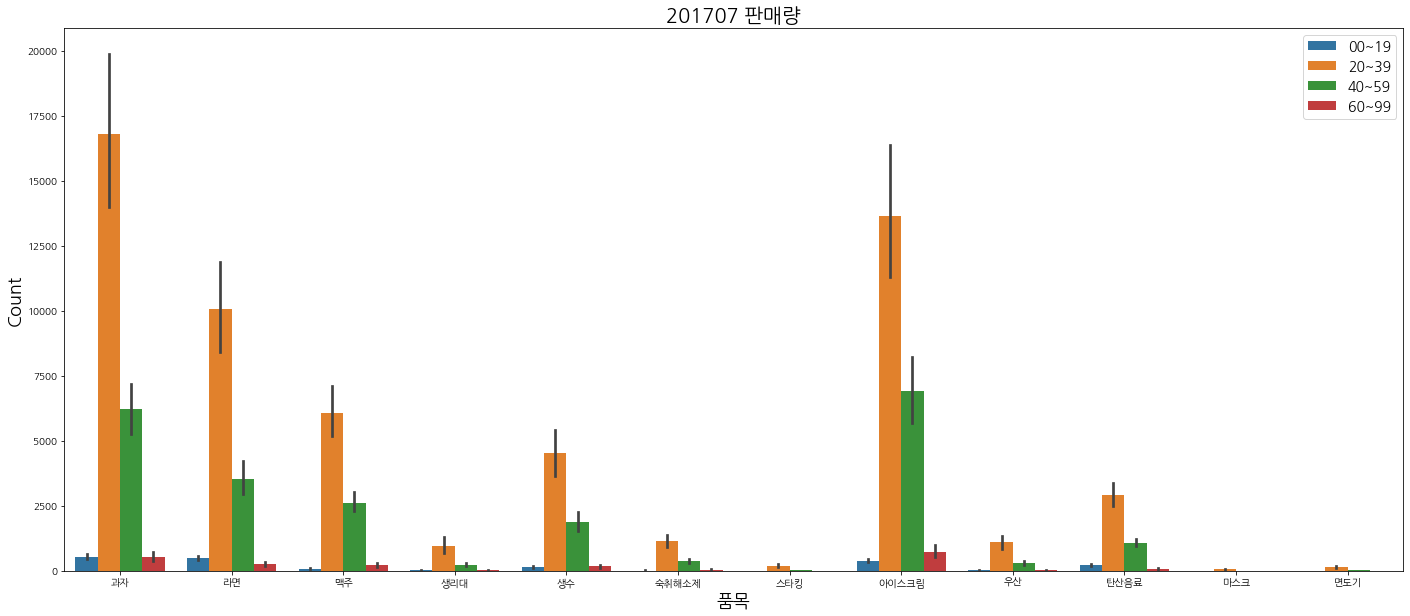

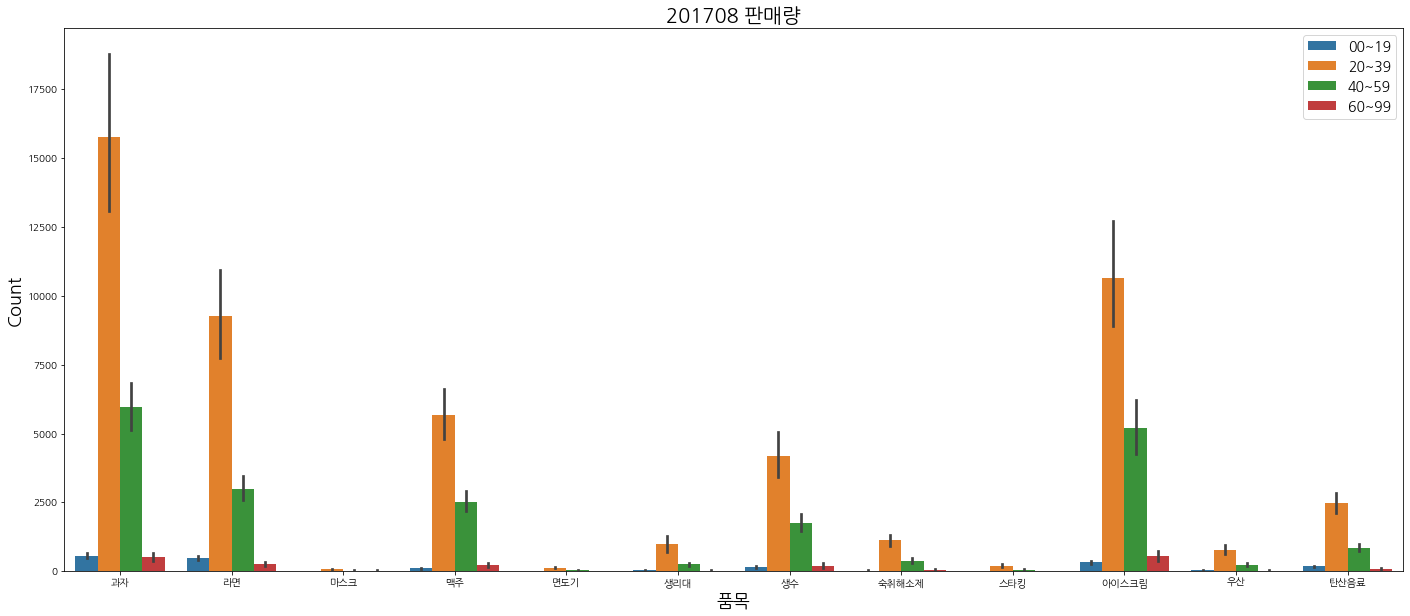

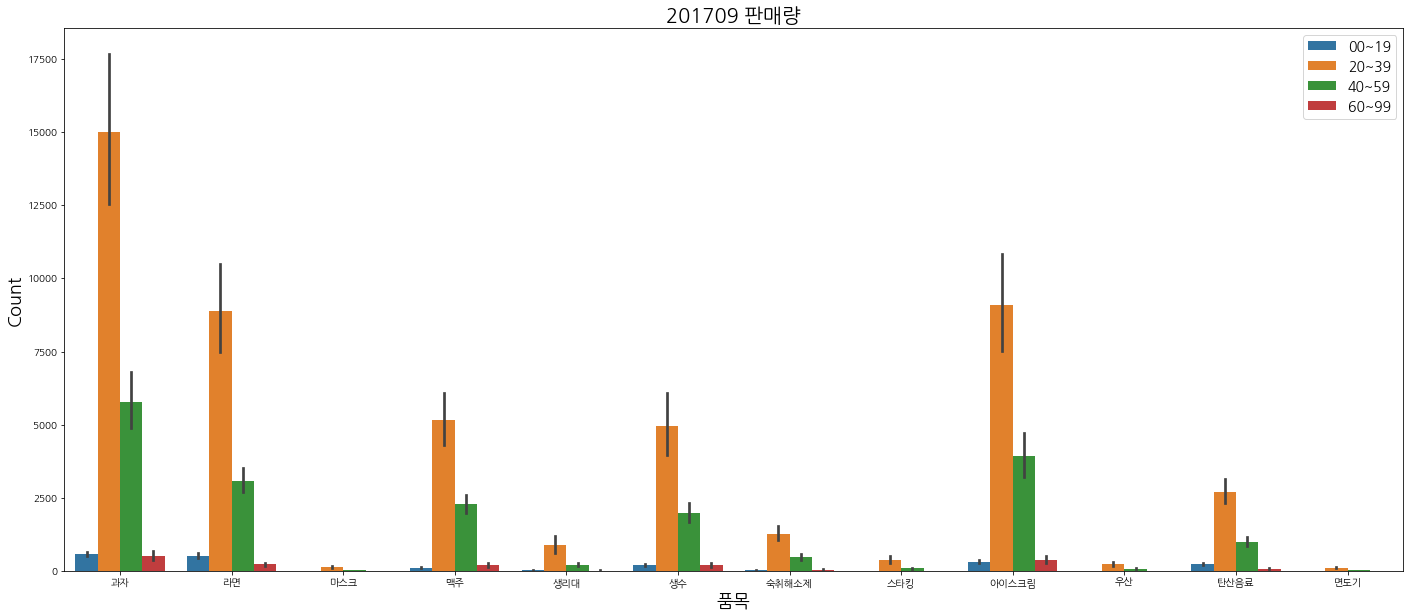

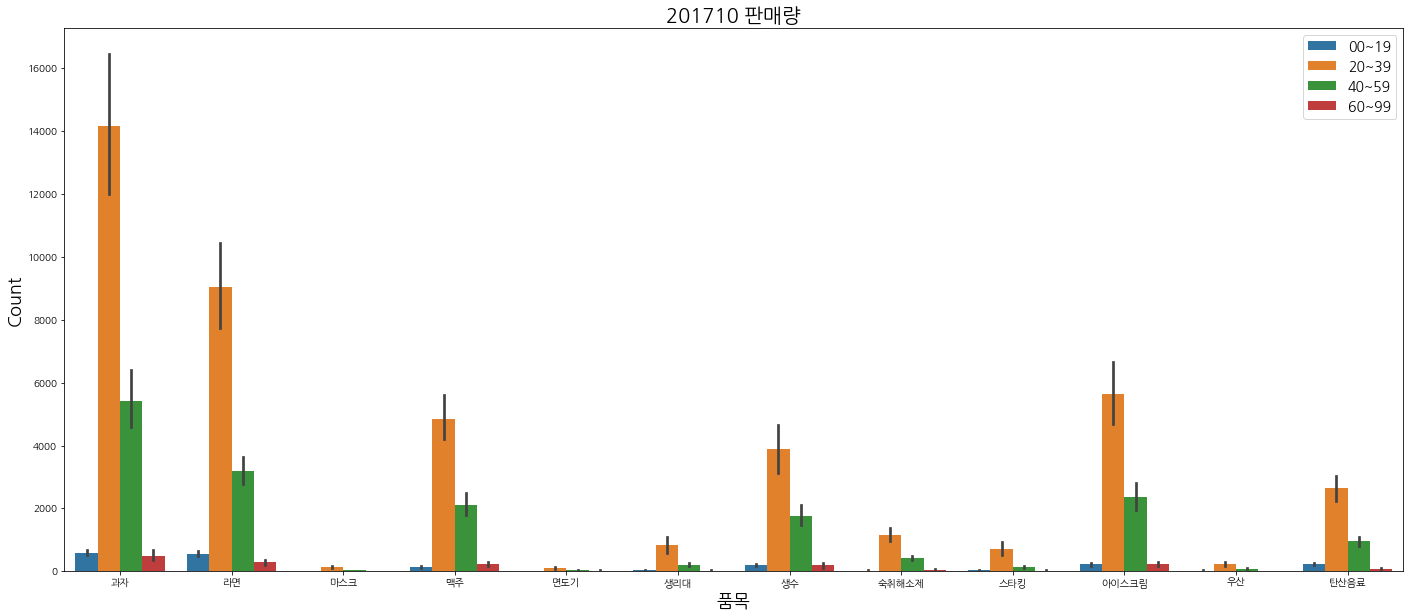

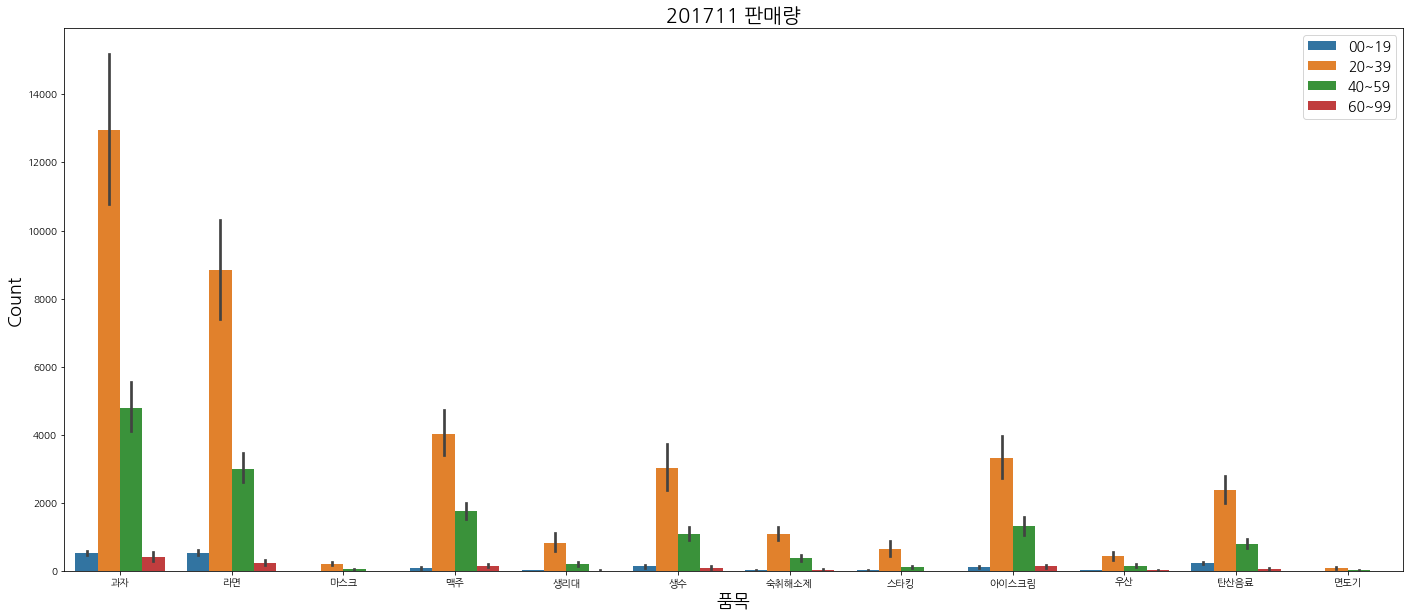

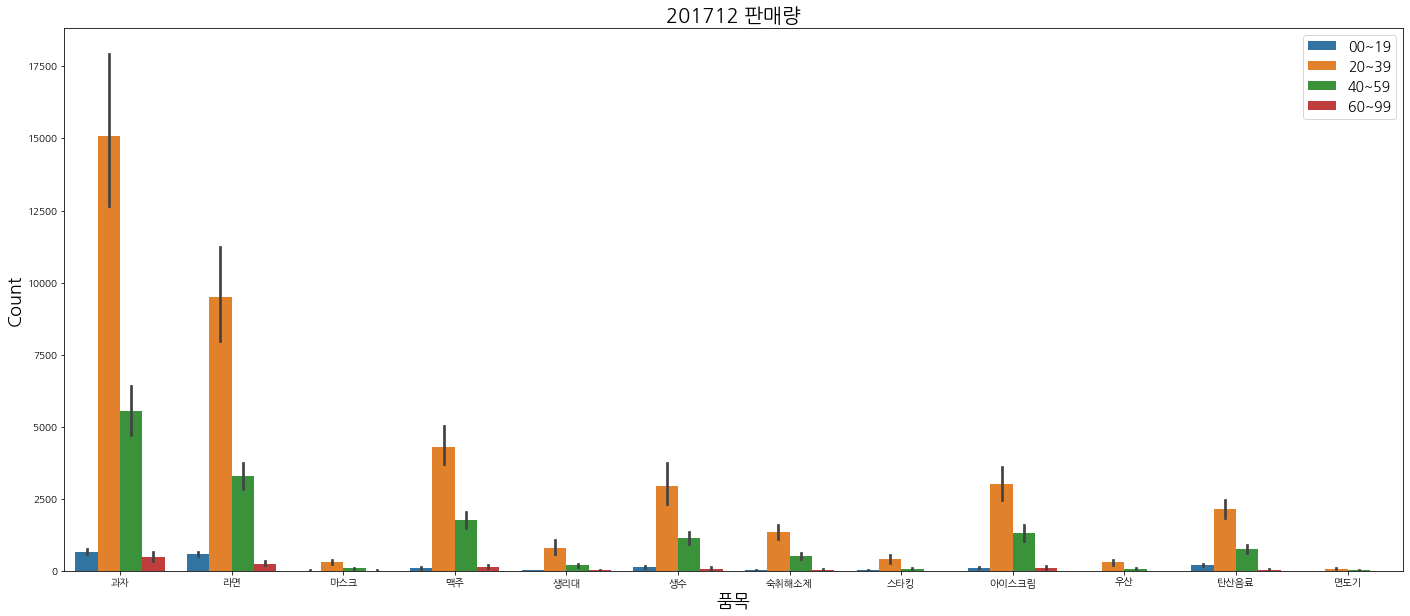

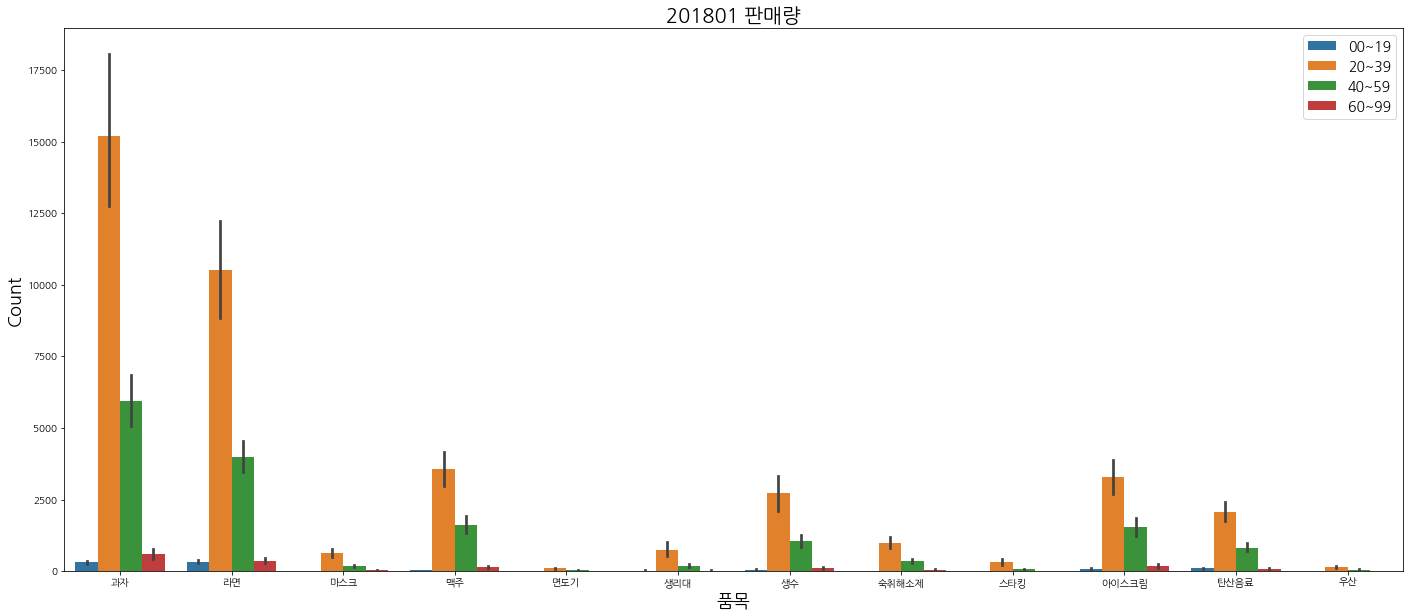

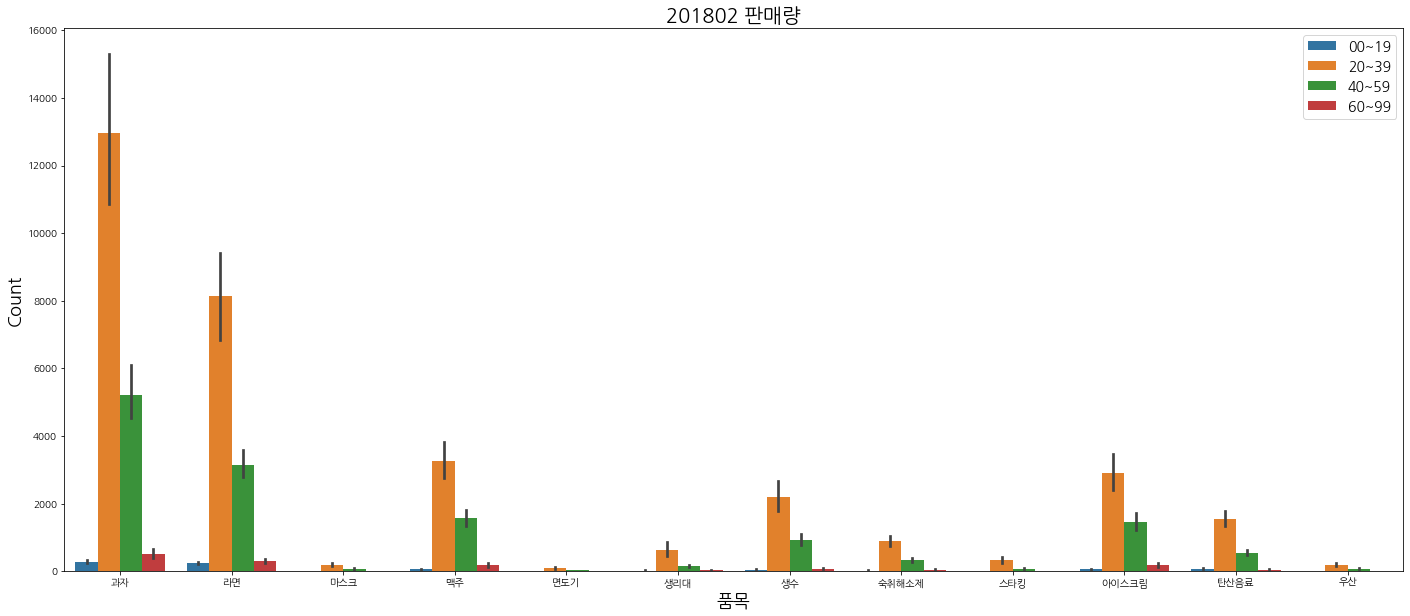

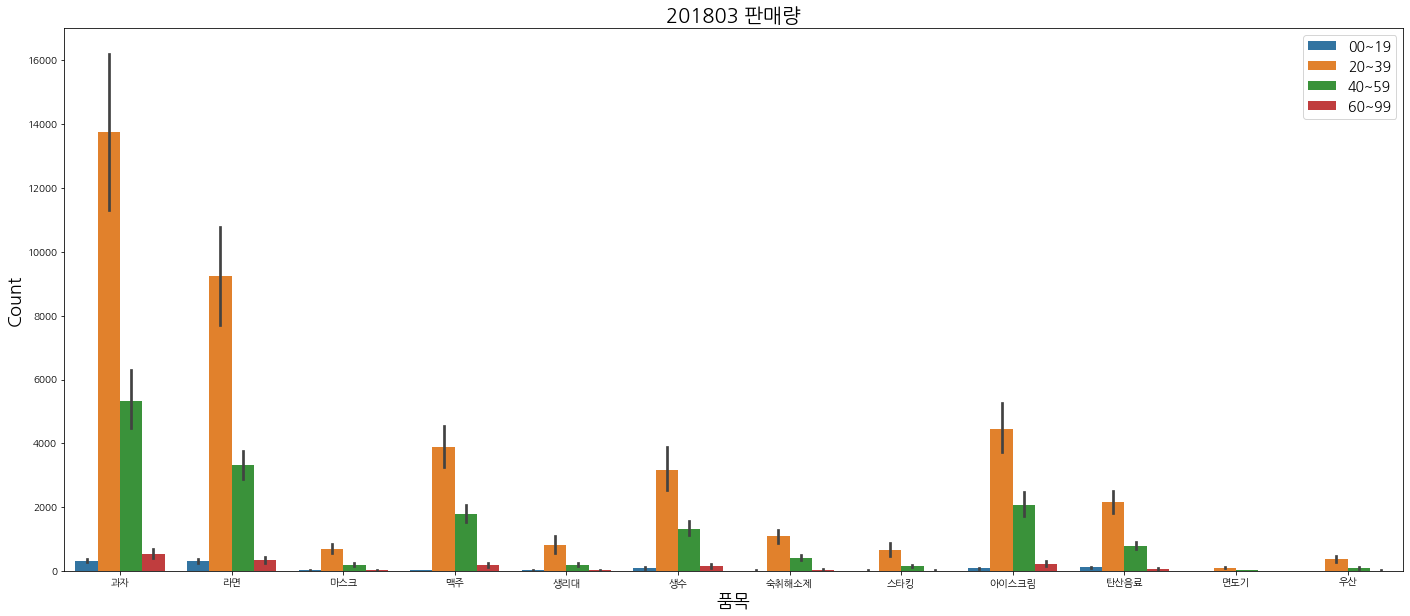

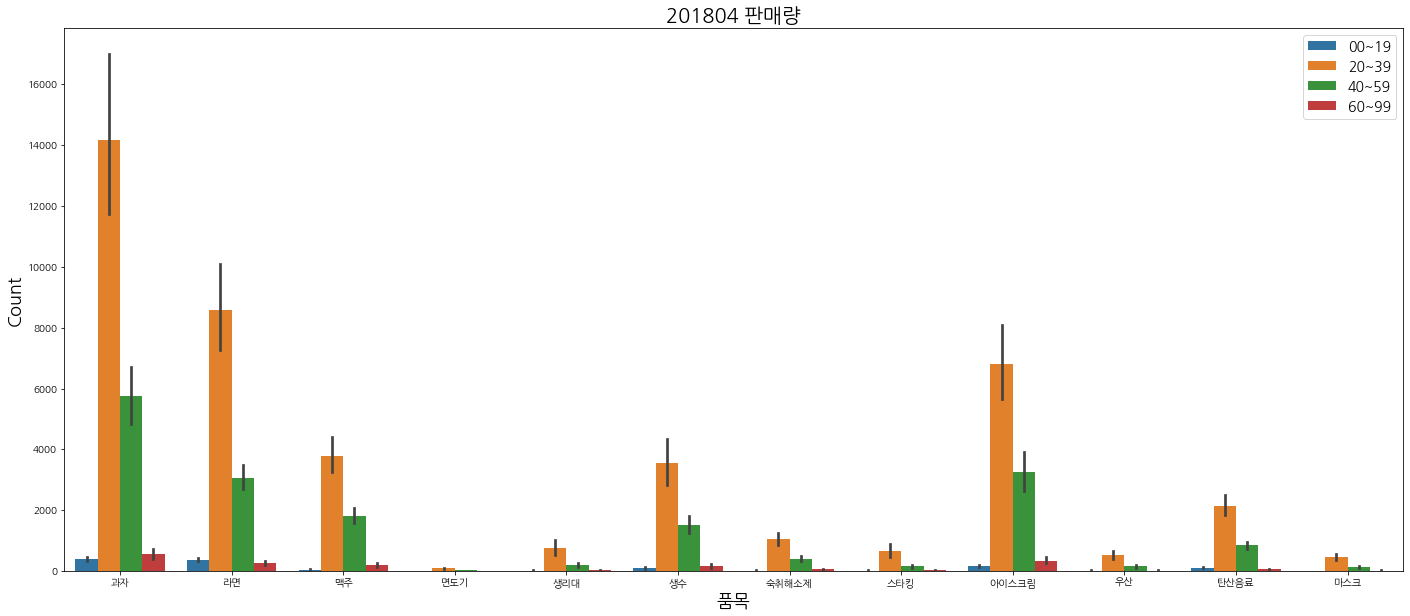

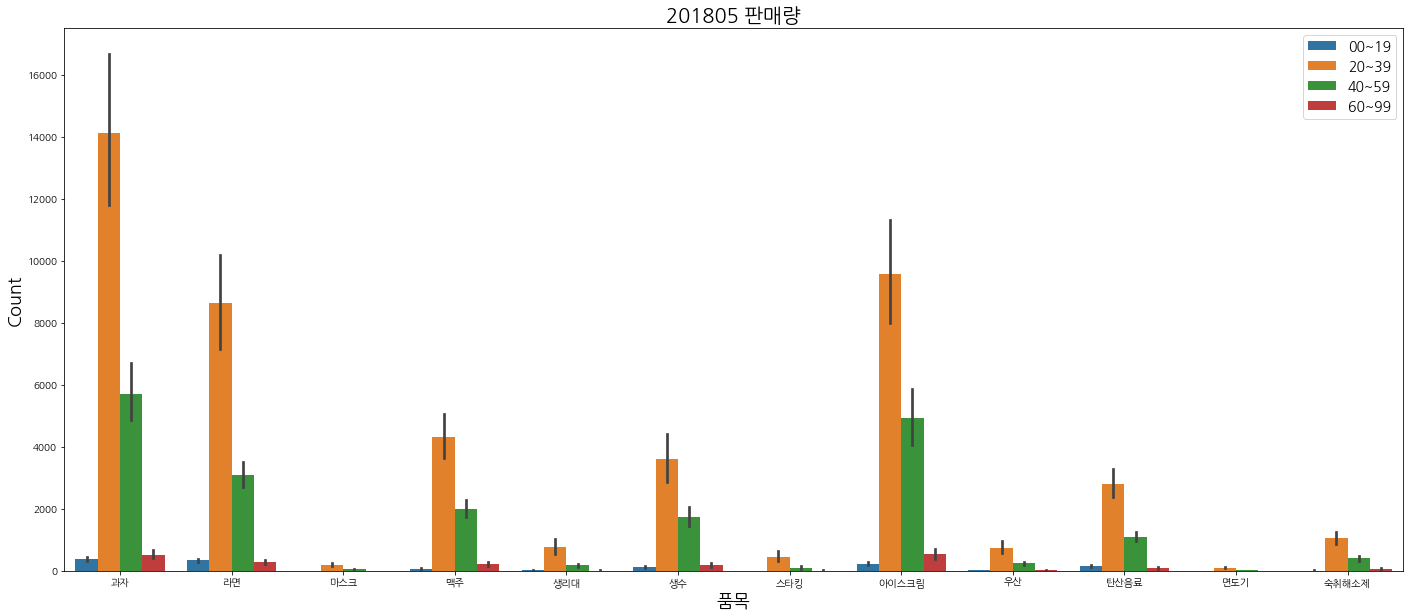

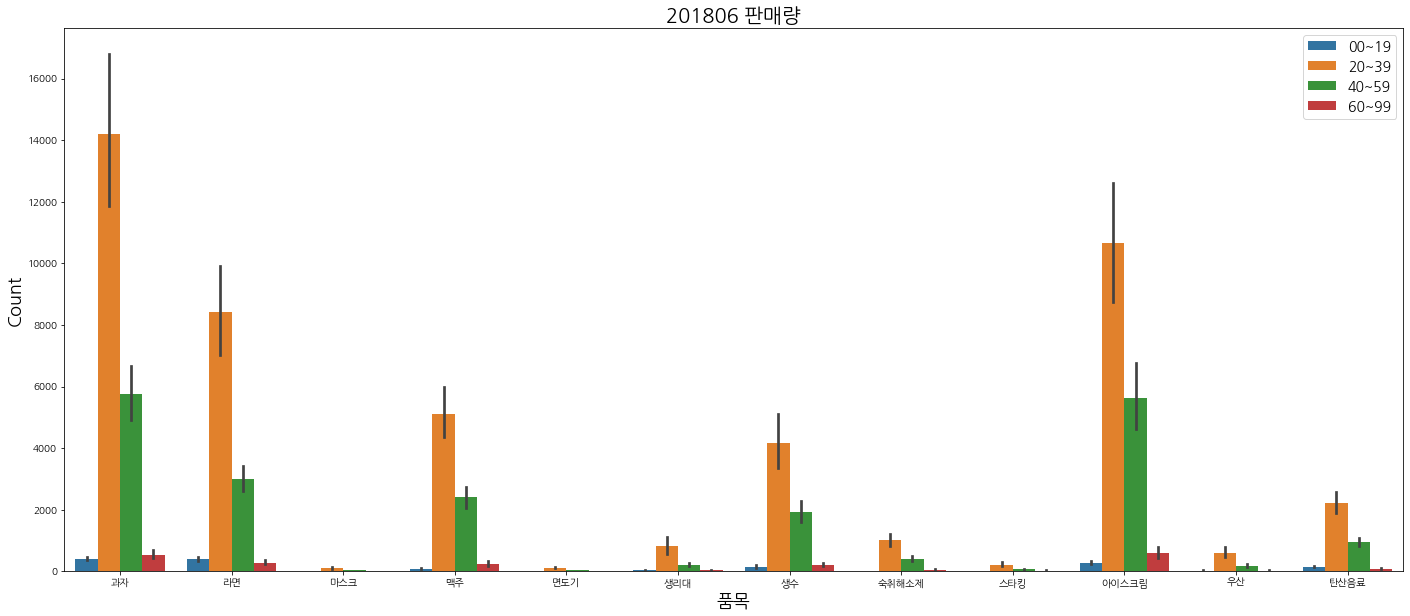

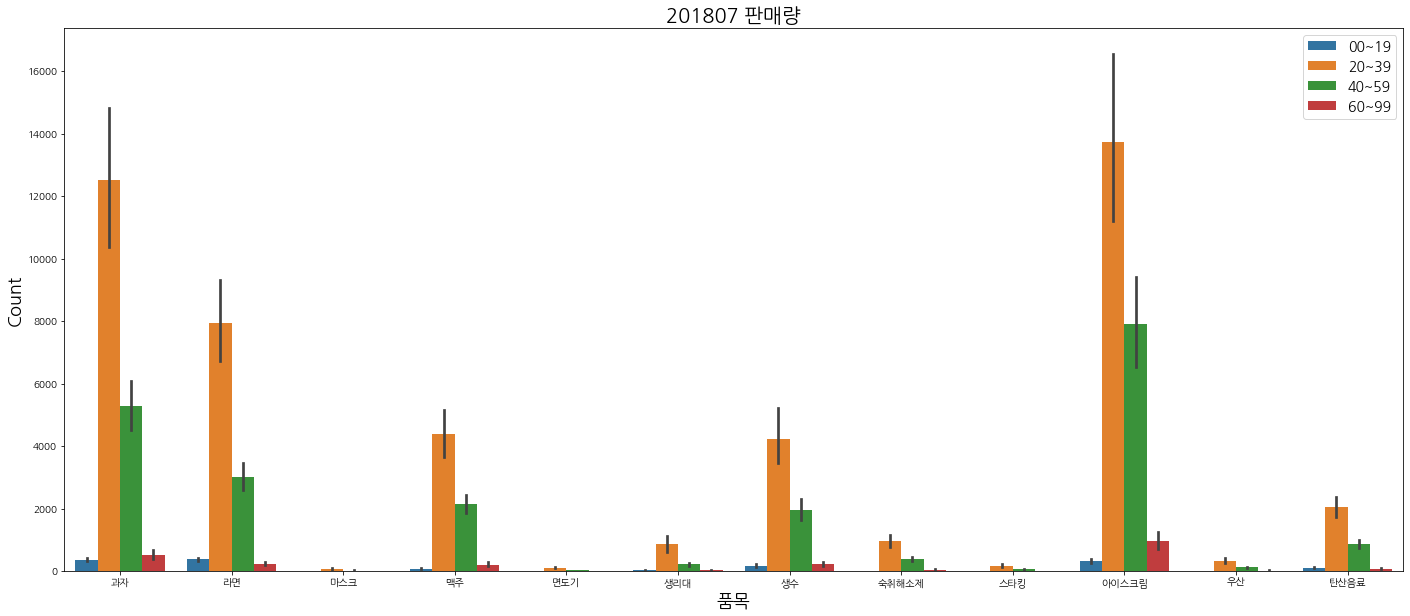

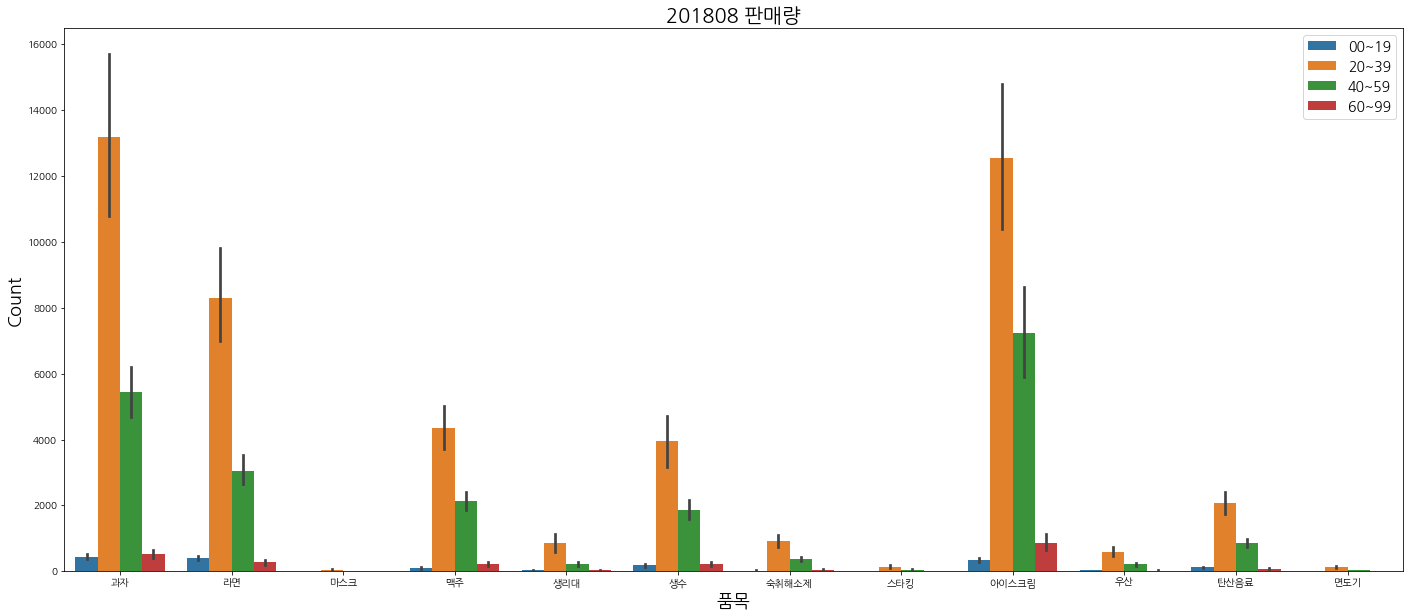

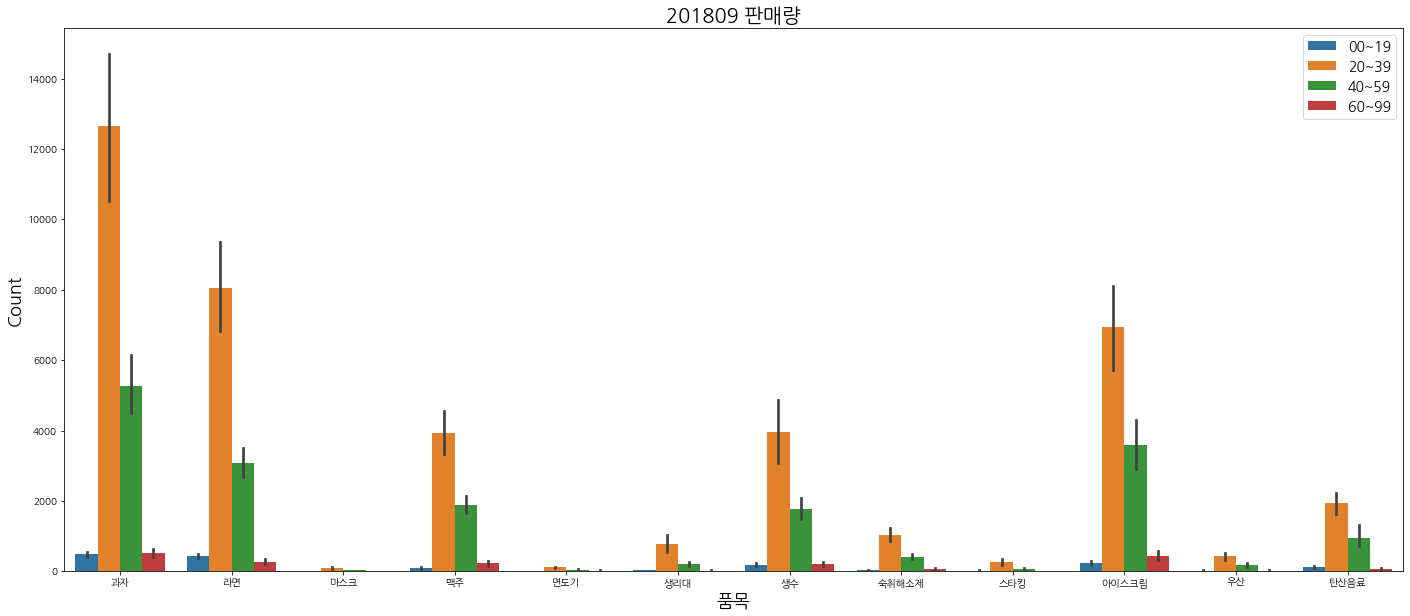

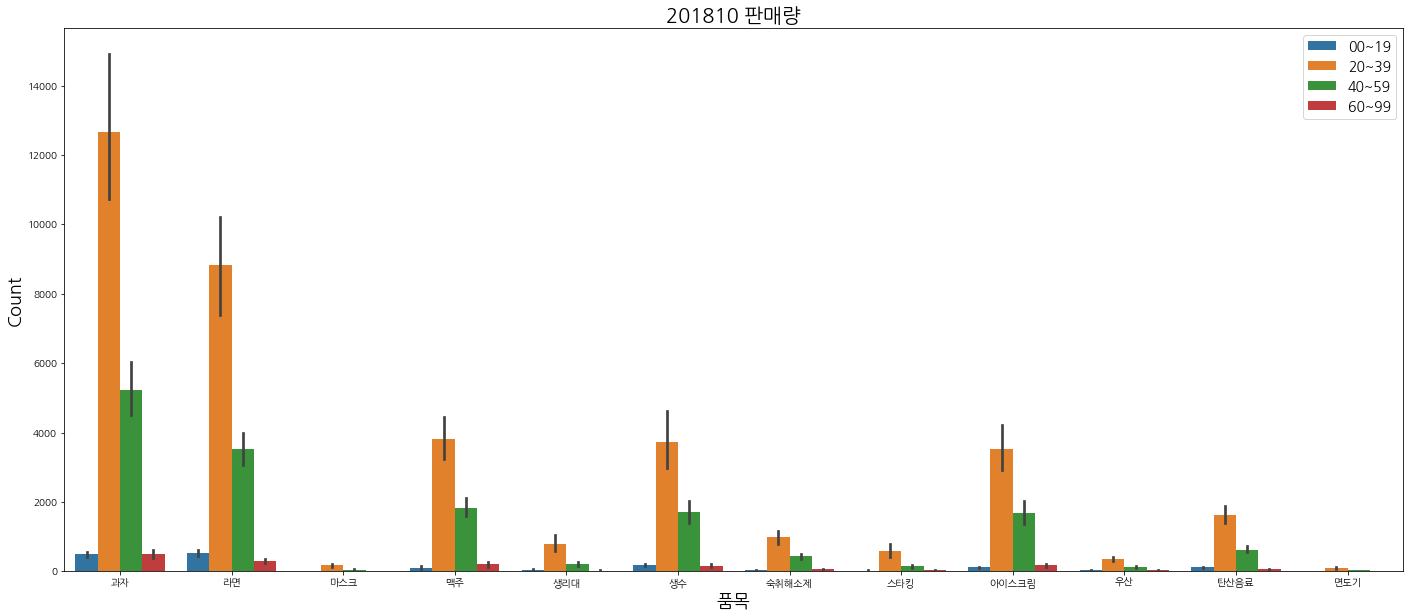

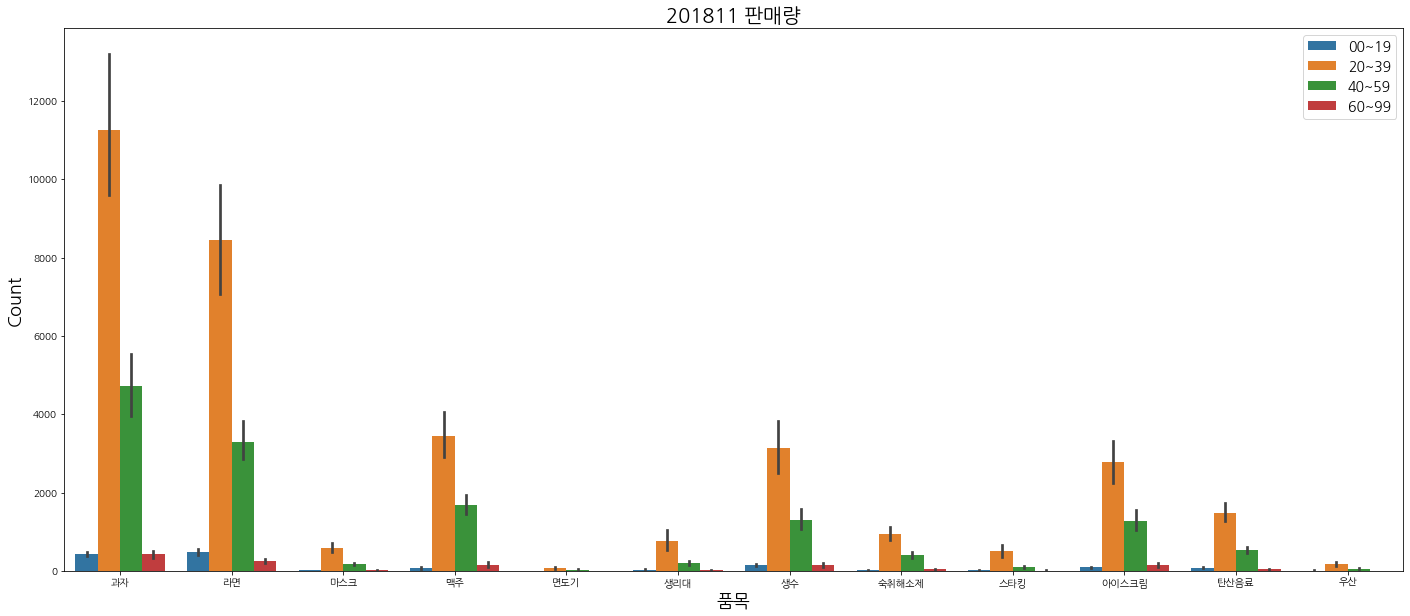

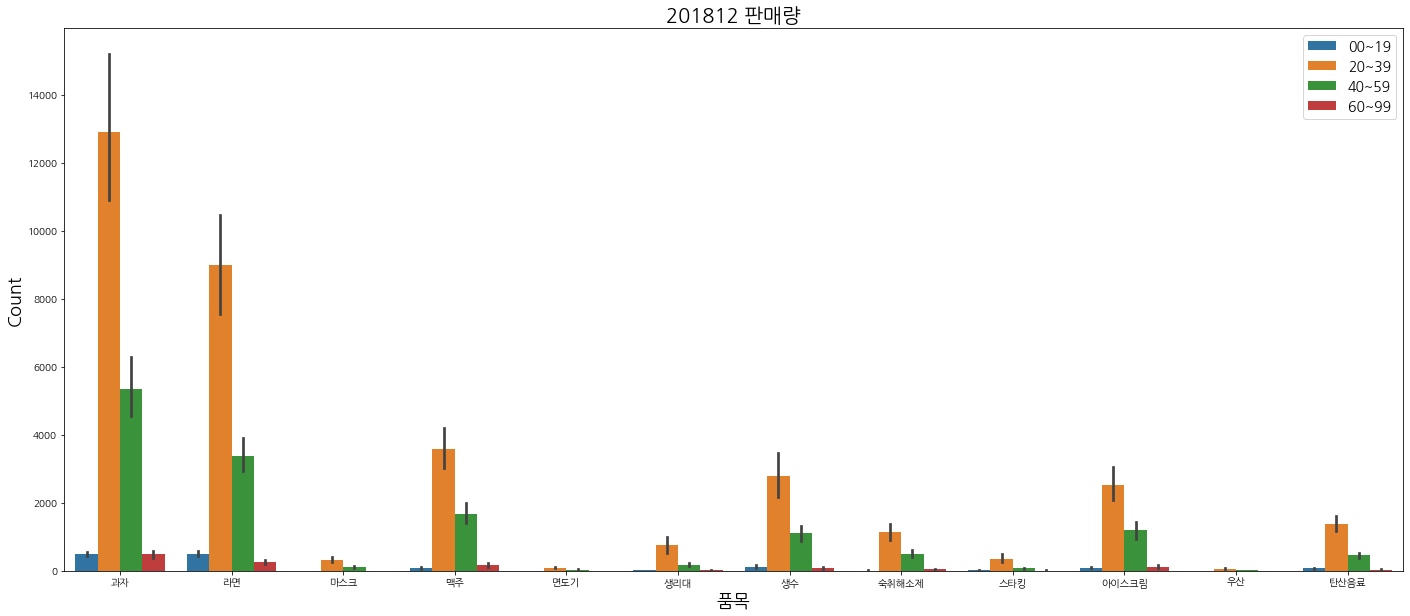

In [90]:
visualization(seoul_month_slice,full_month,category='korea_cvs.age_cd',title='서울')

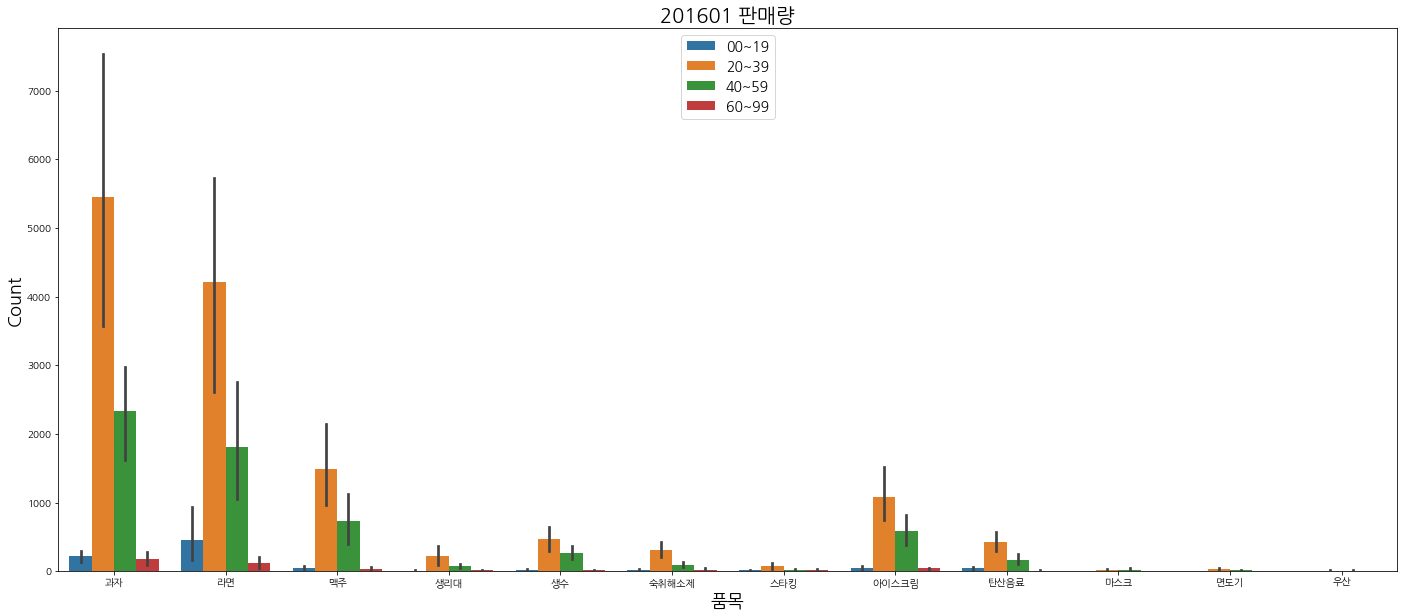

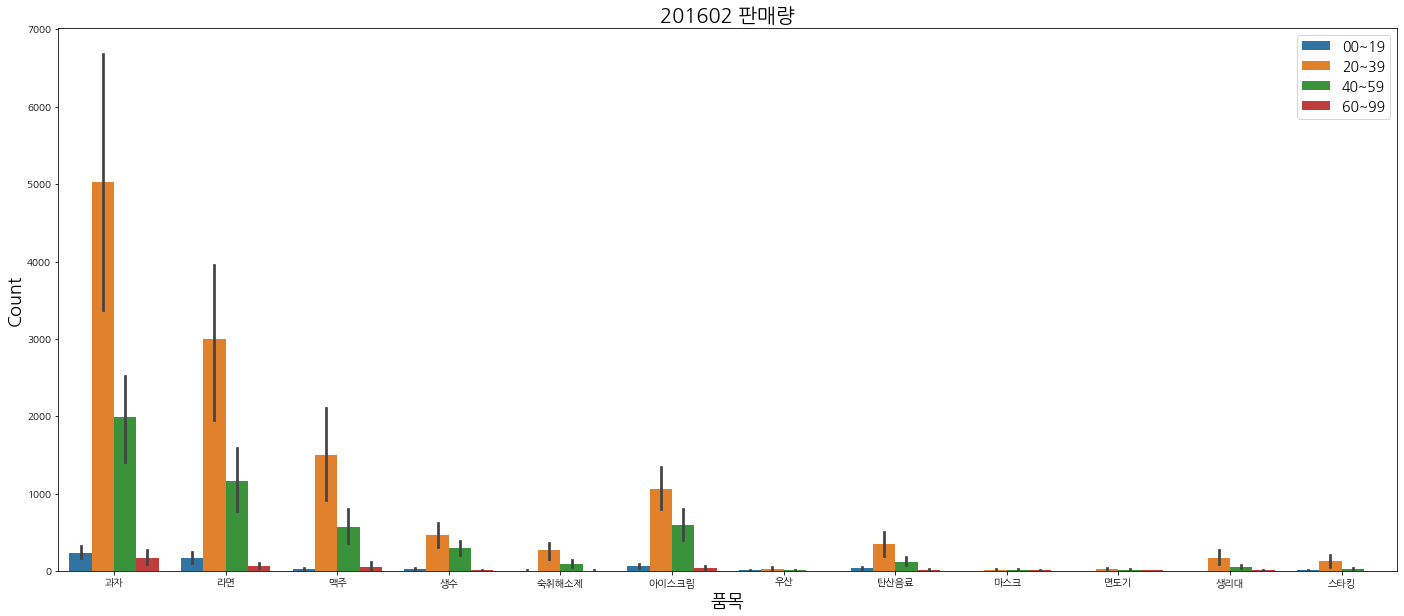

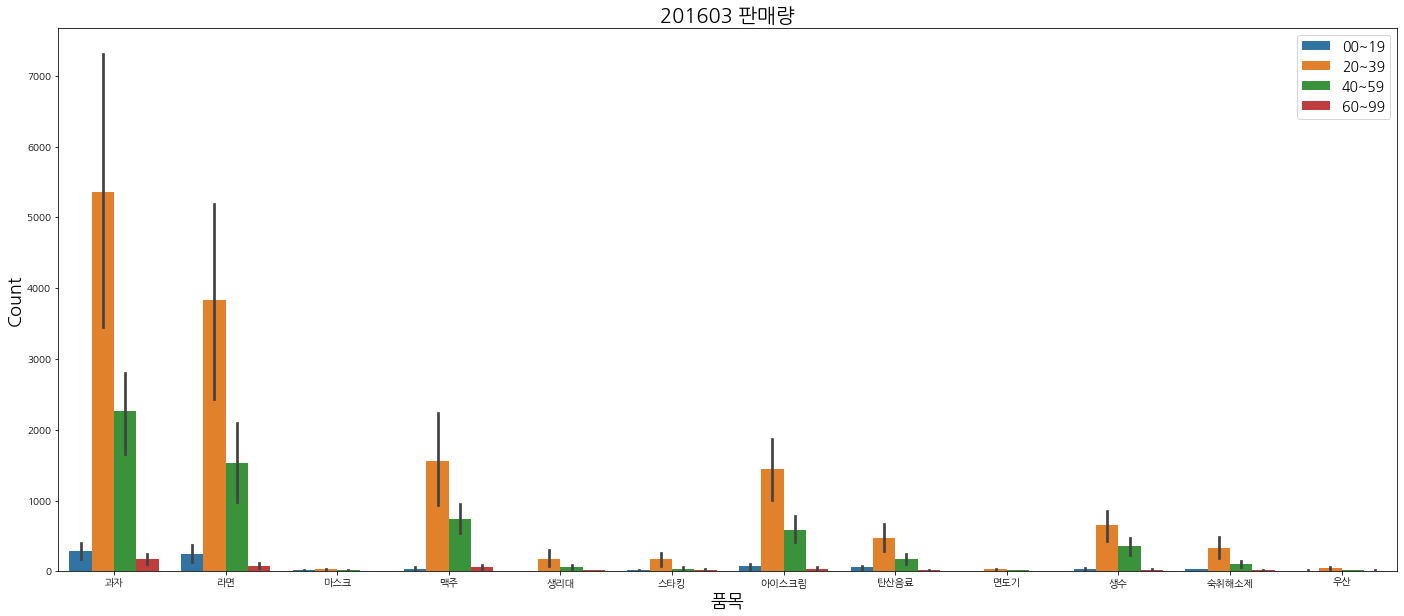

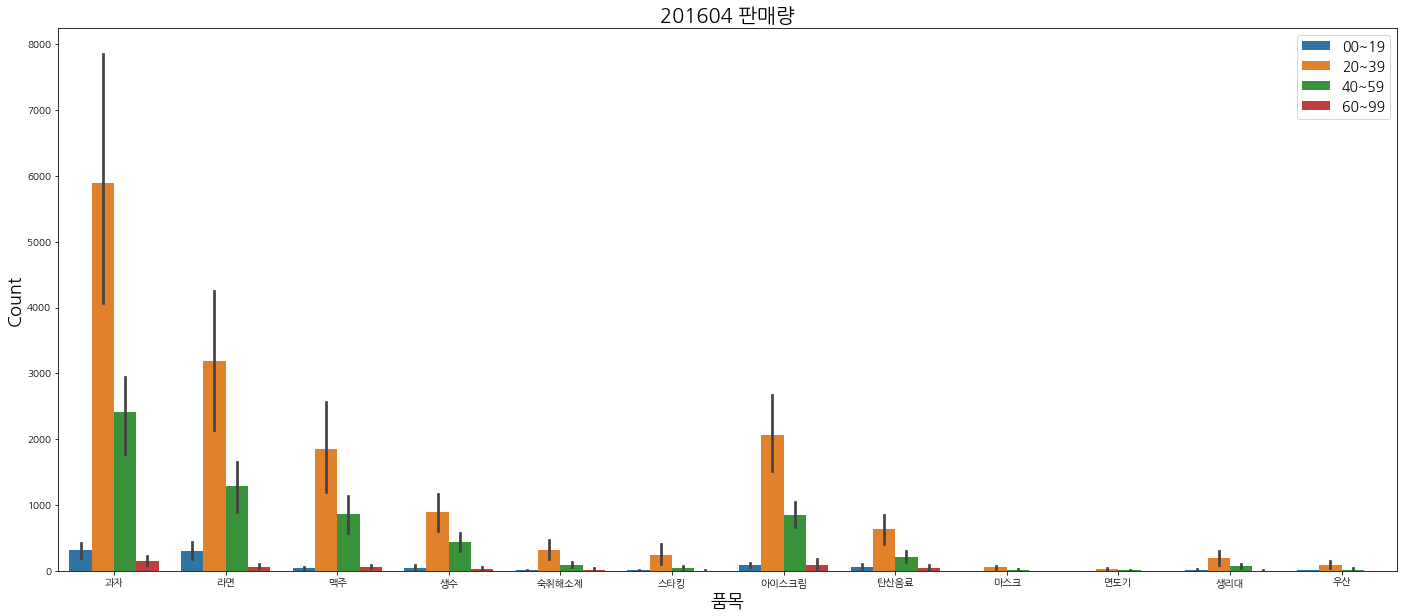

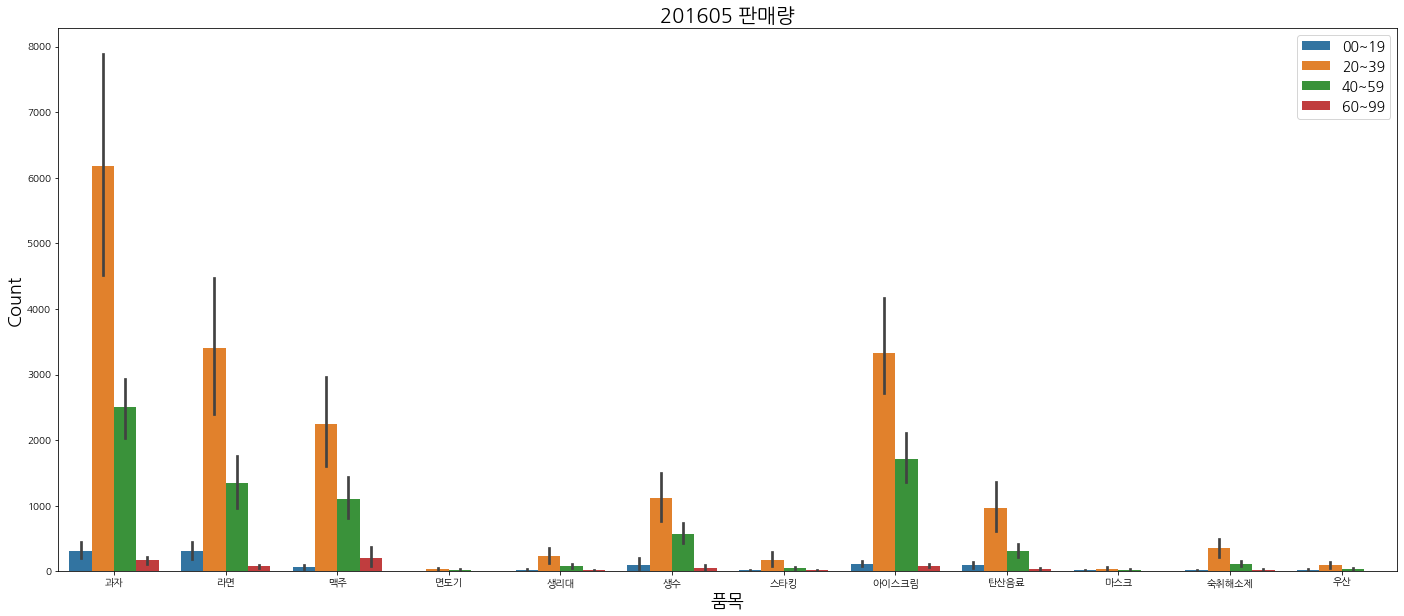

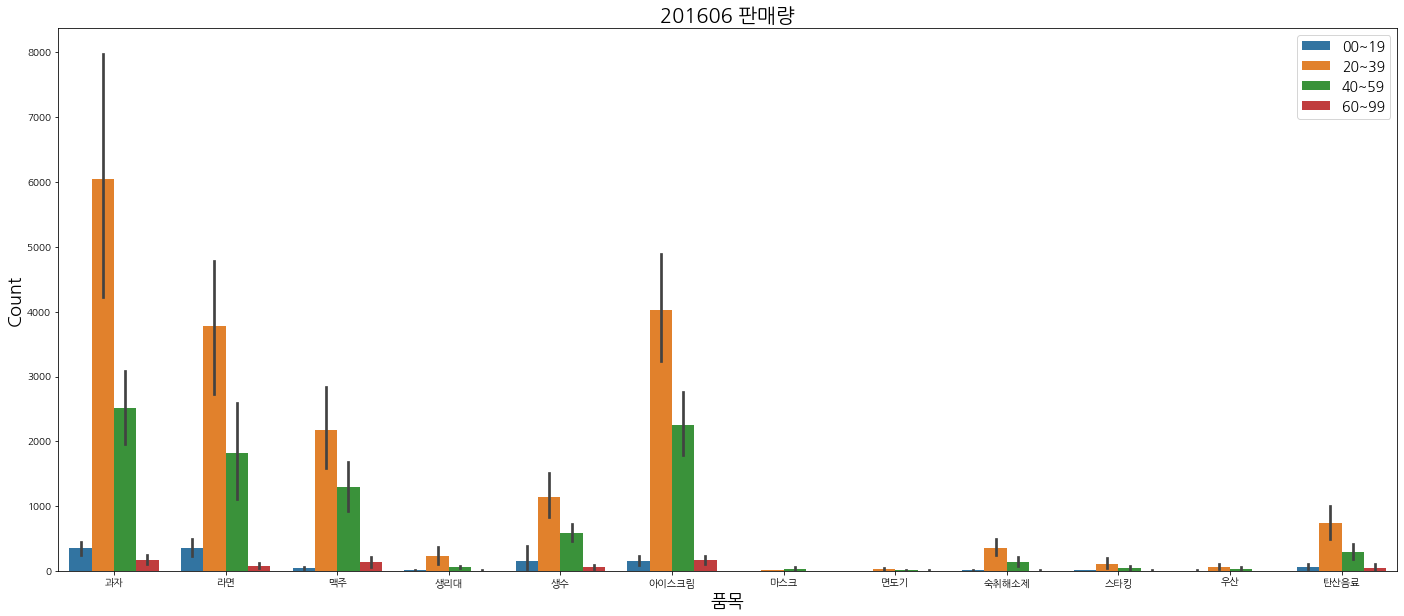

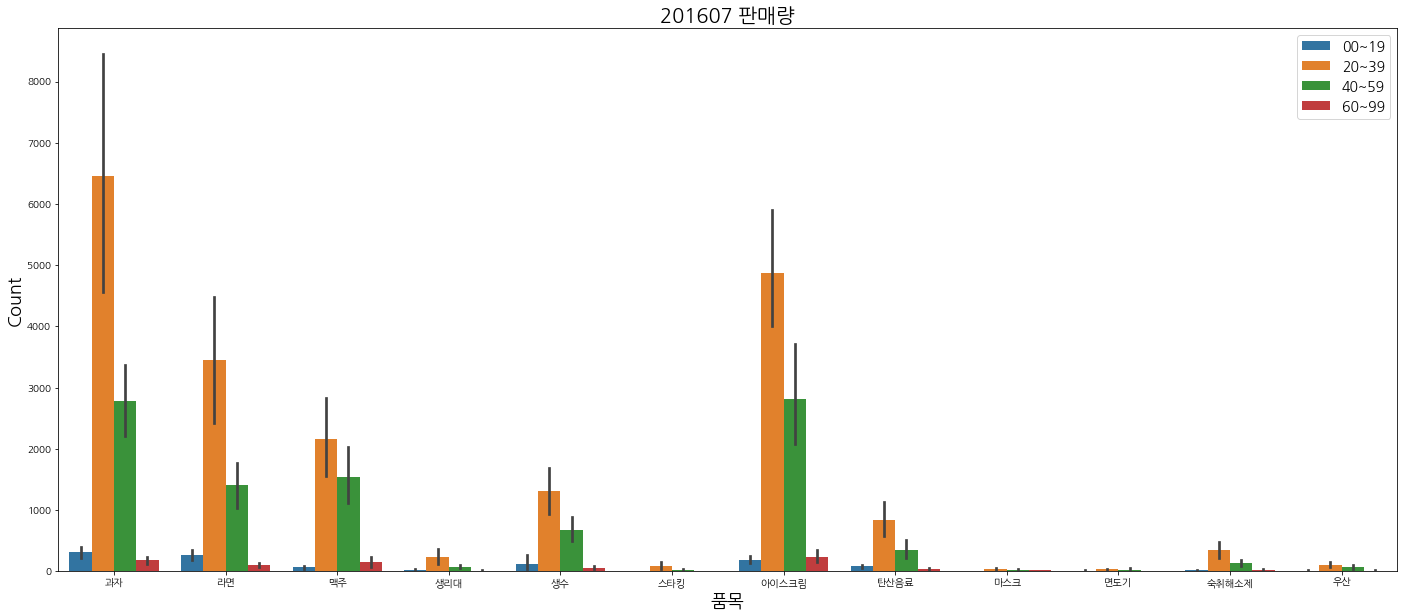

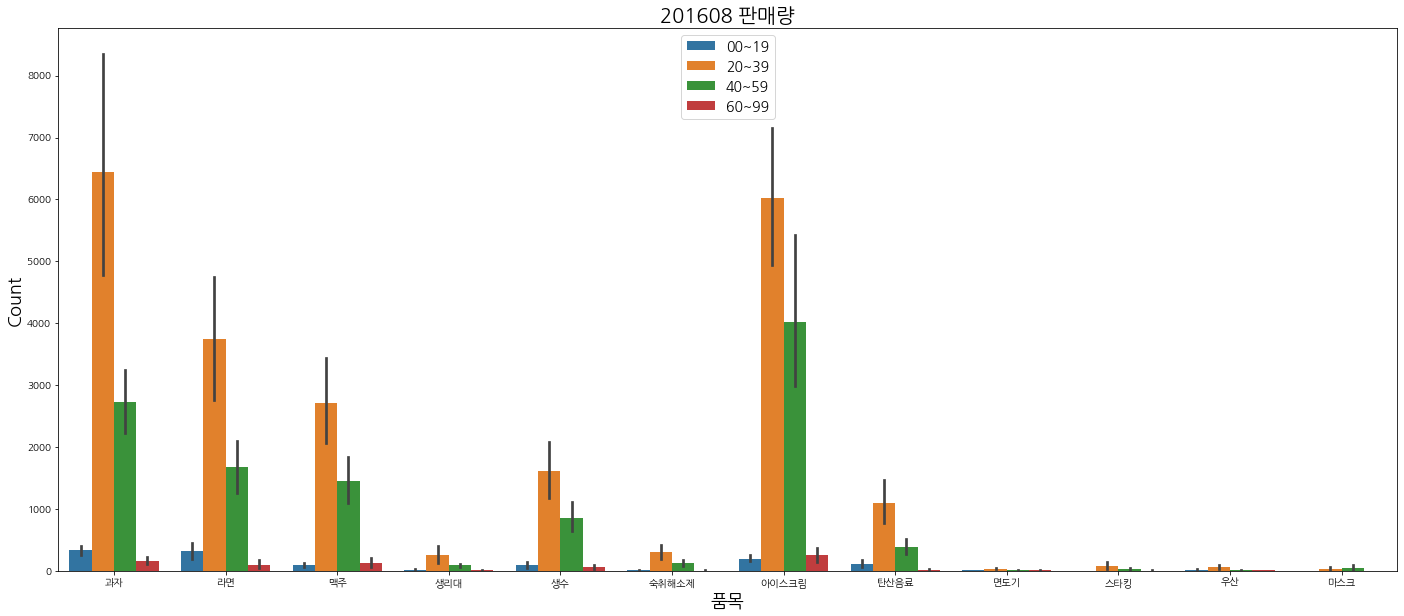

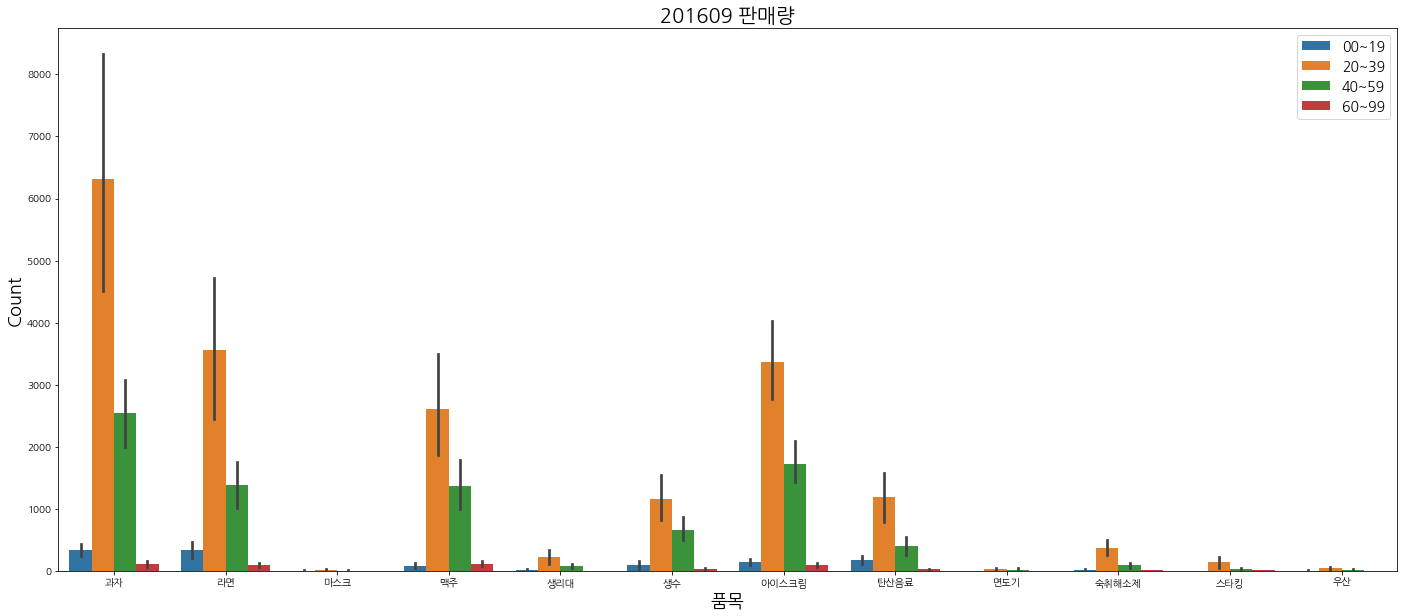

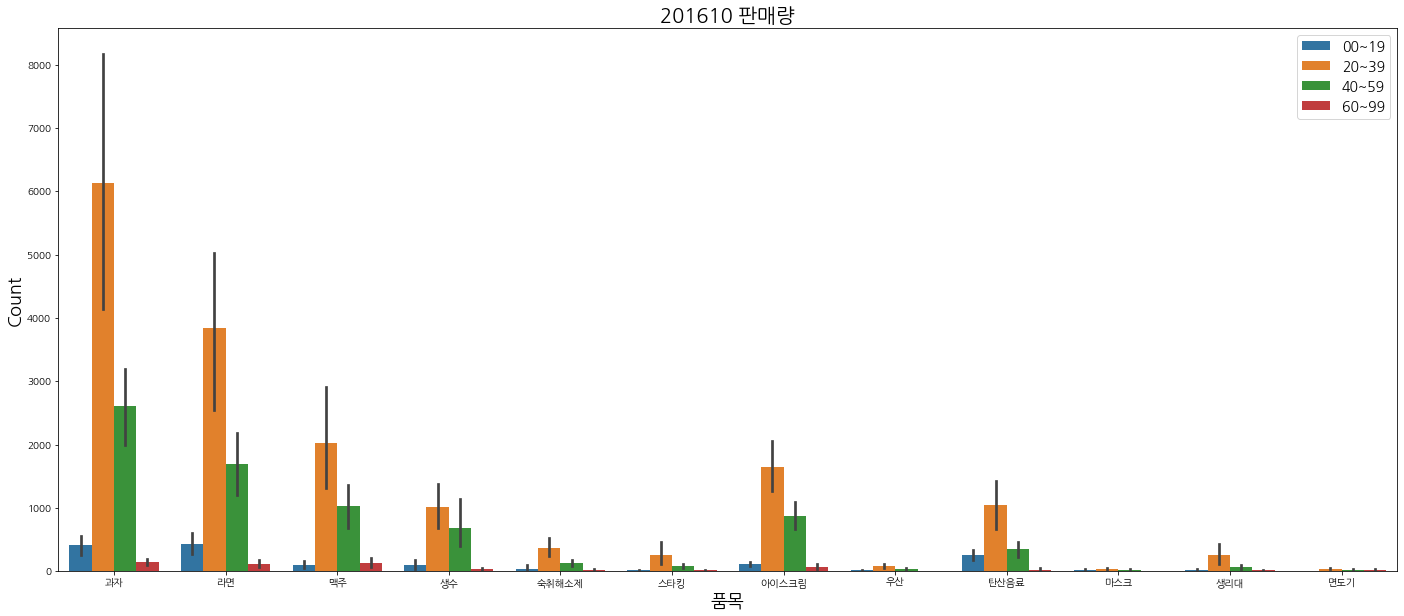

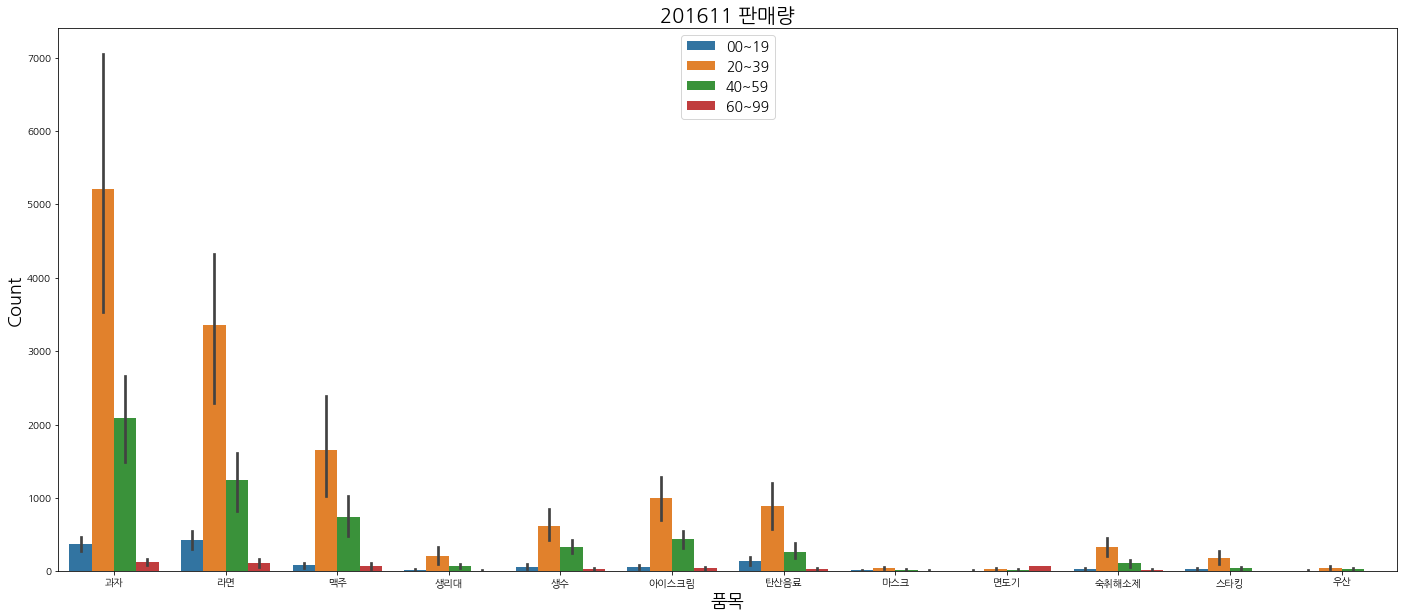

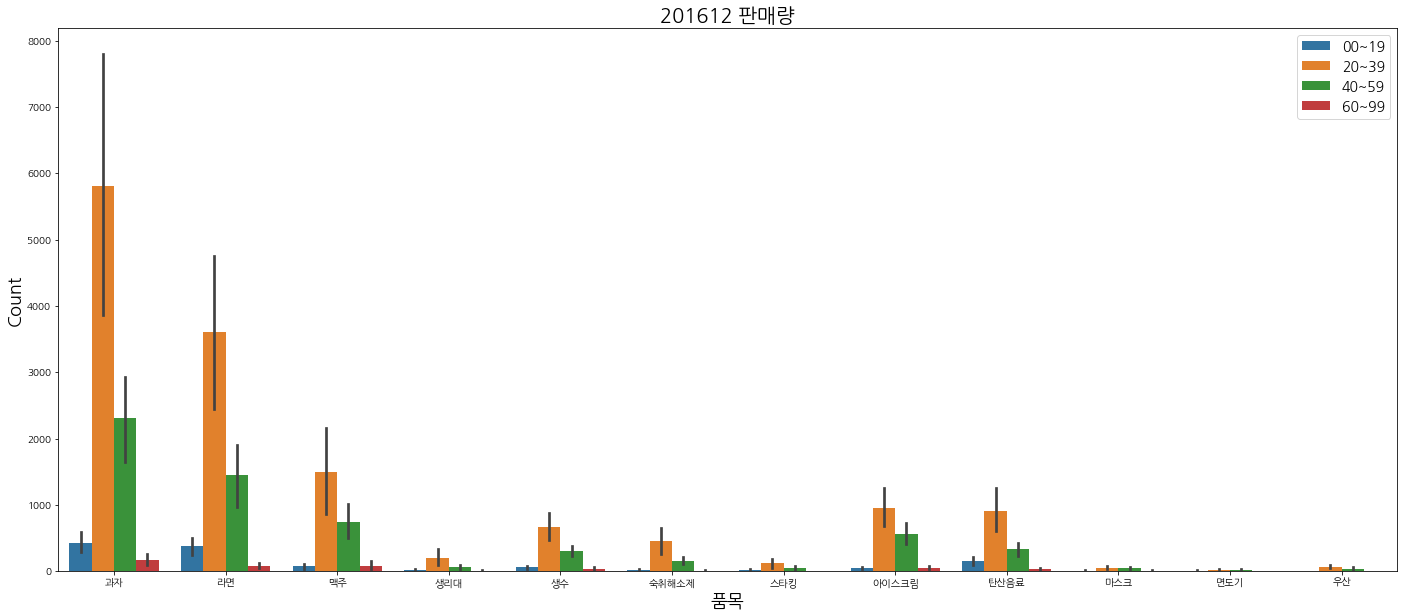

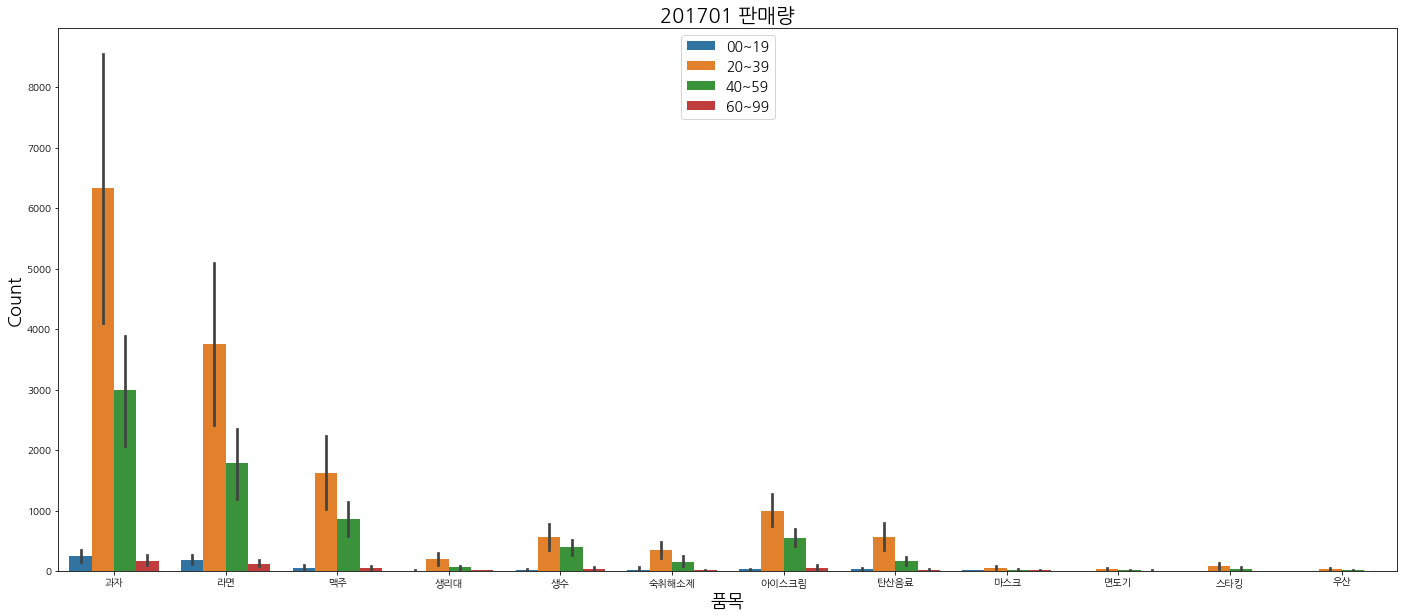

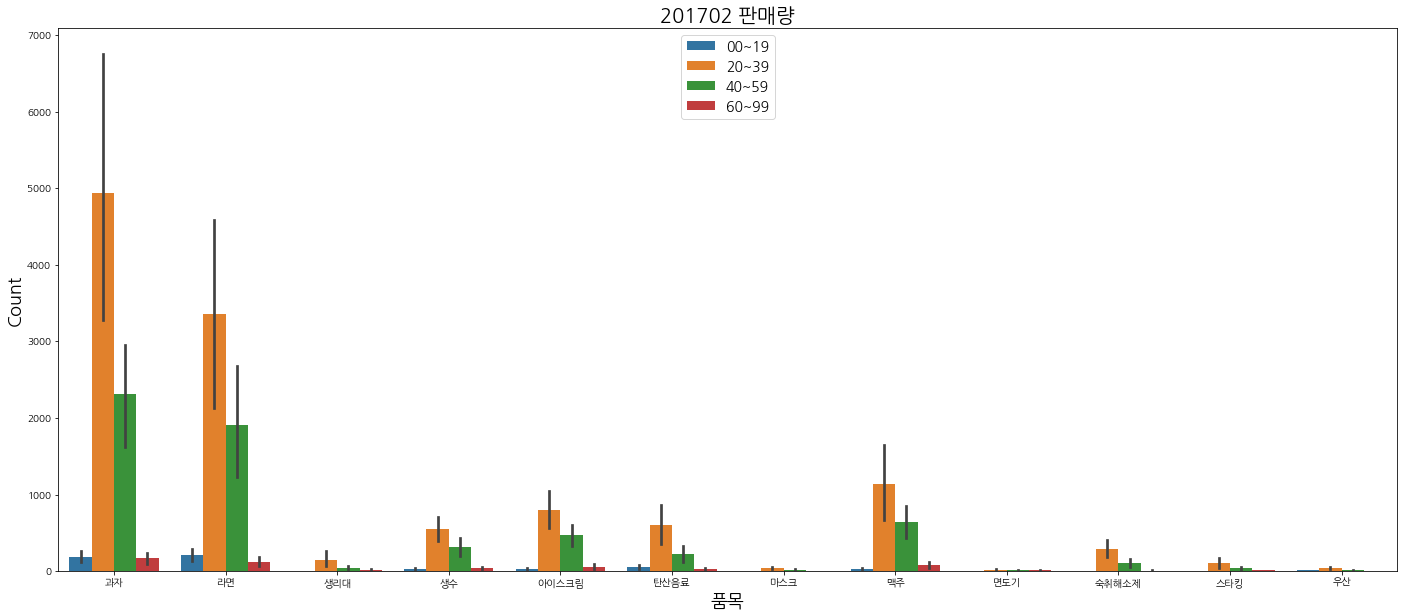

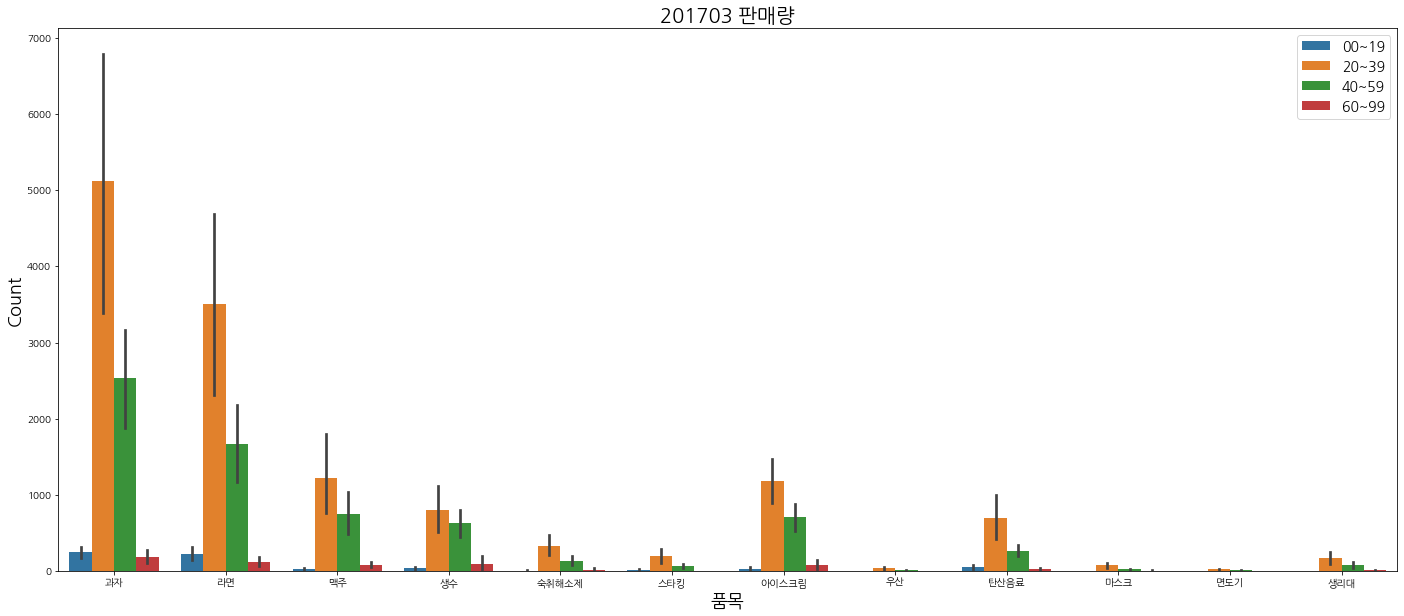

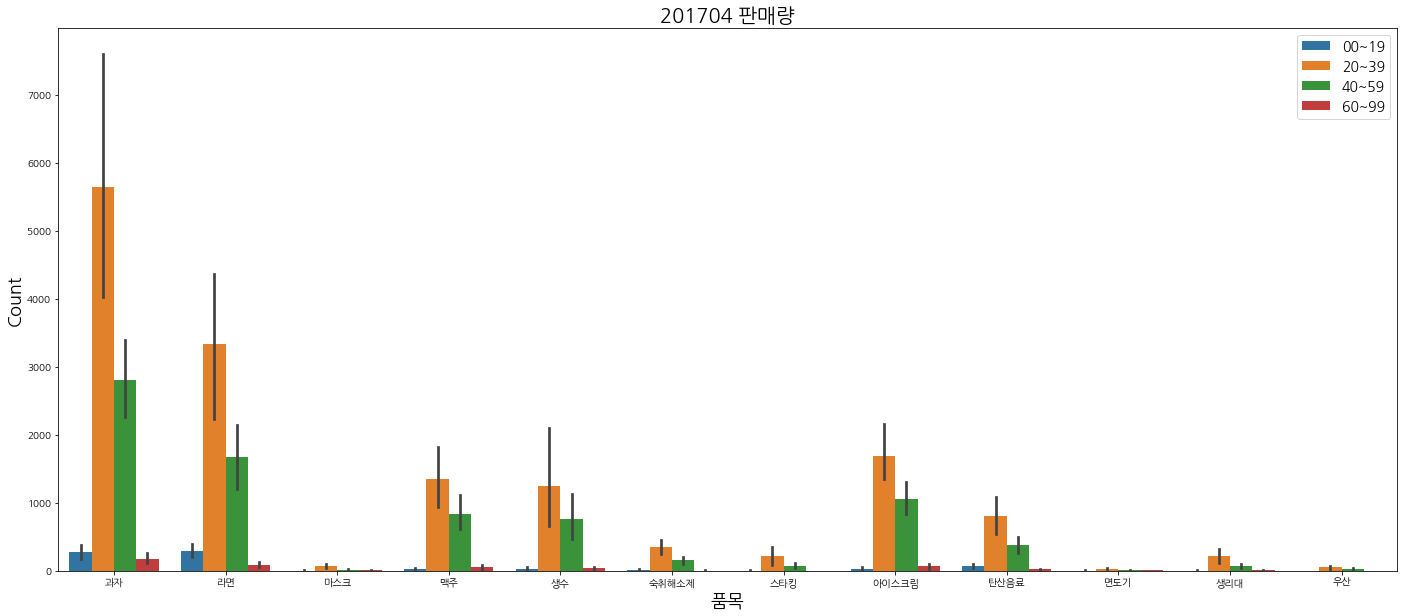

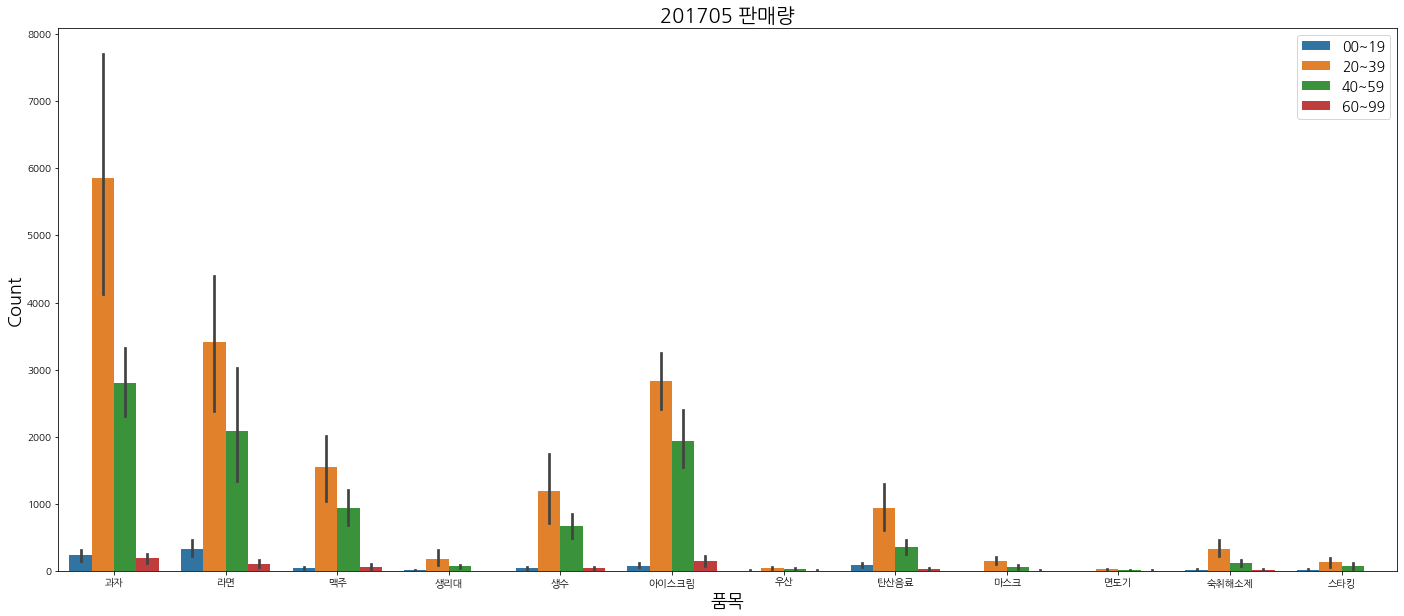

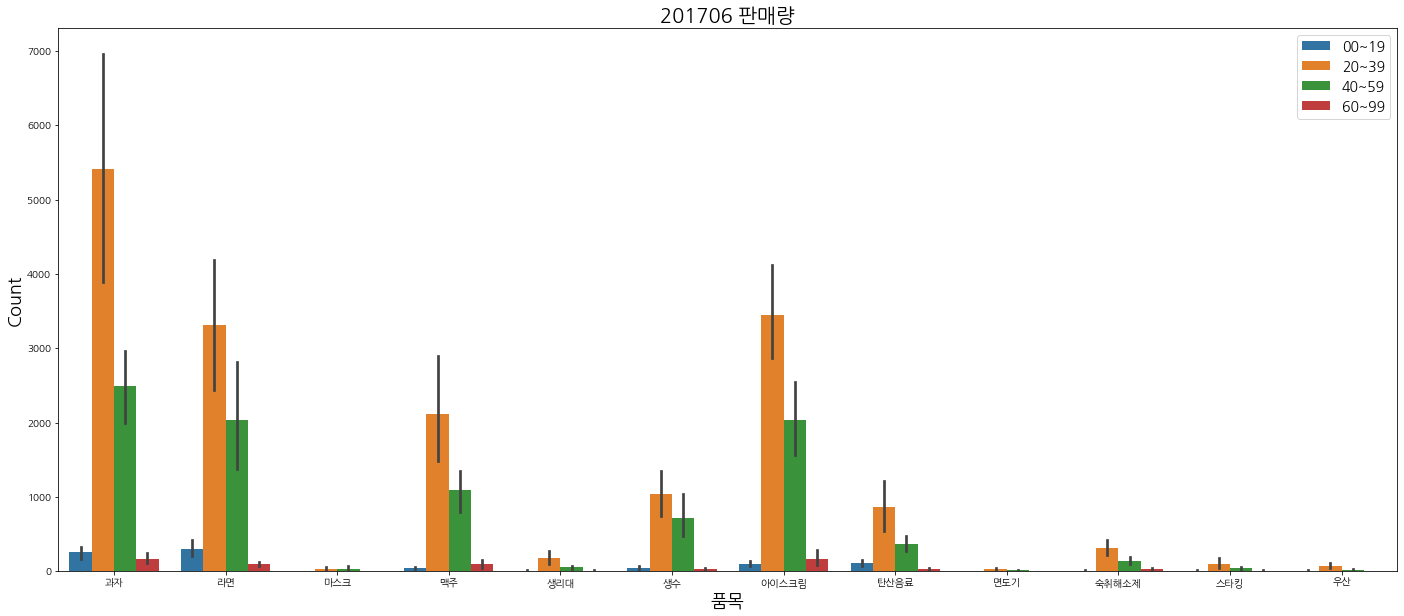

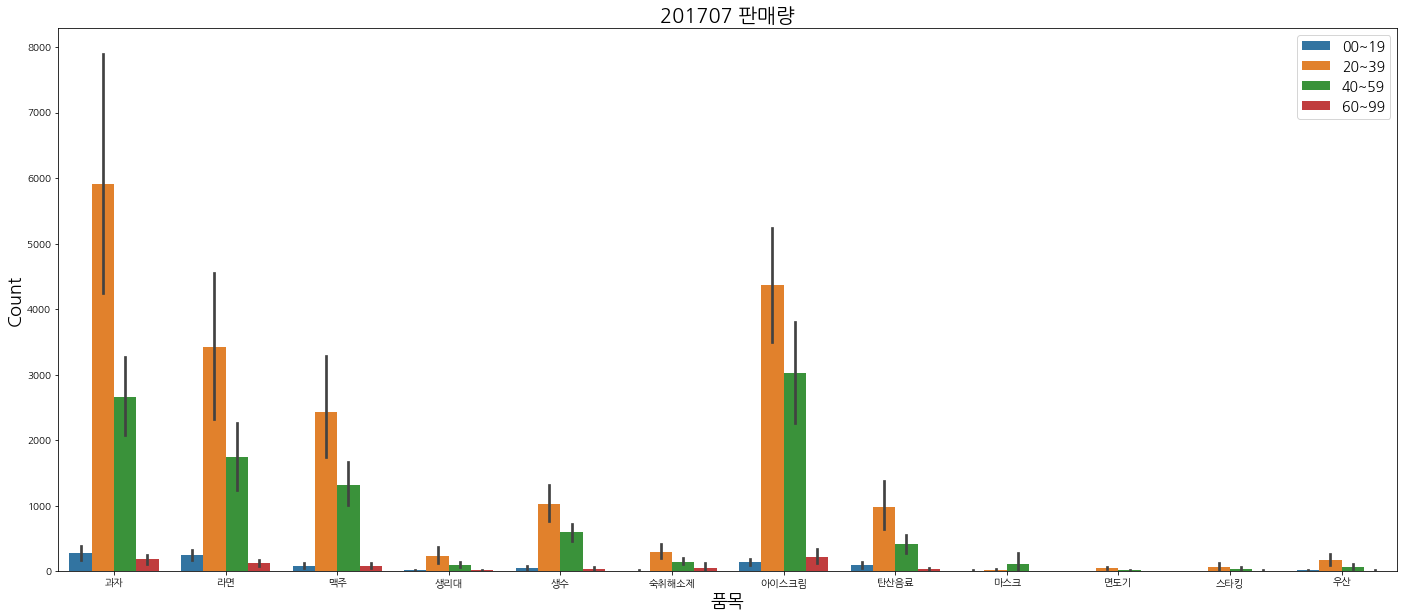

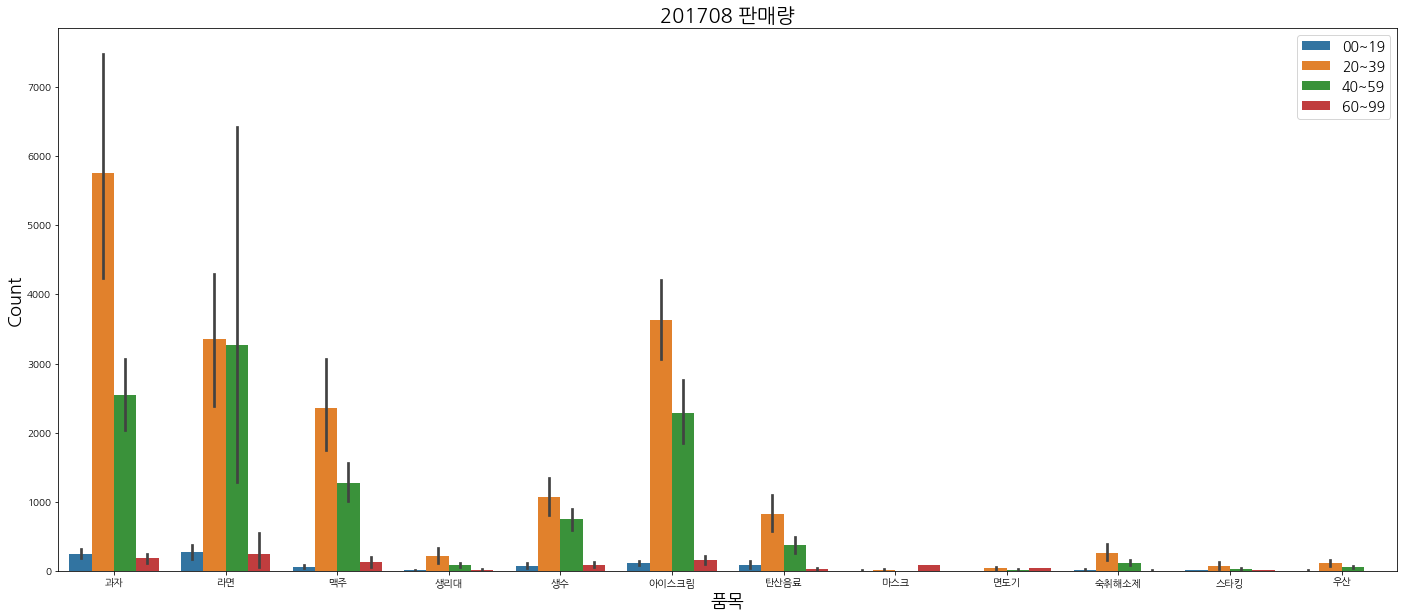

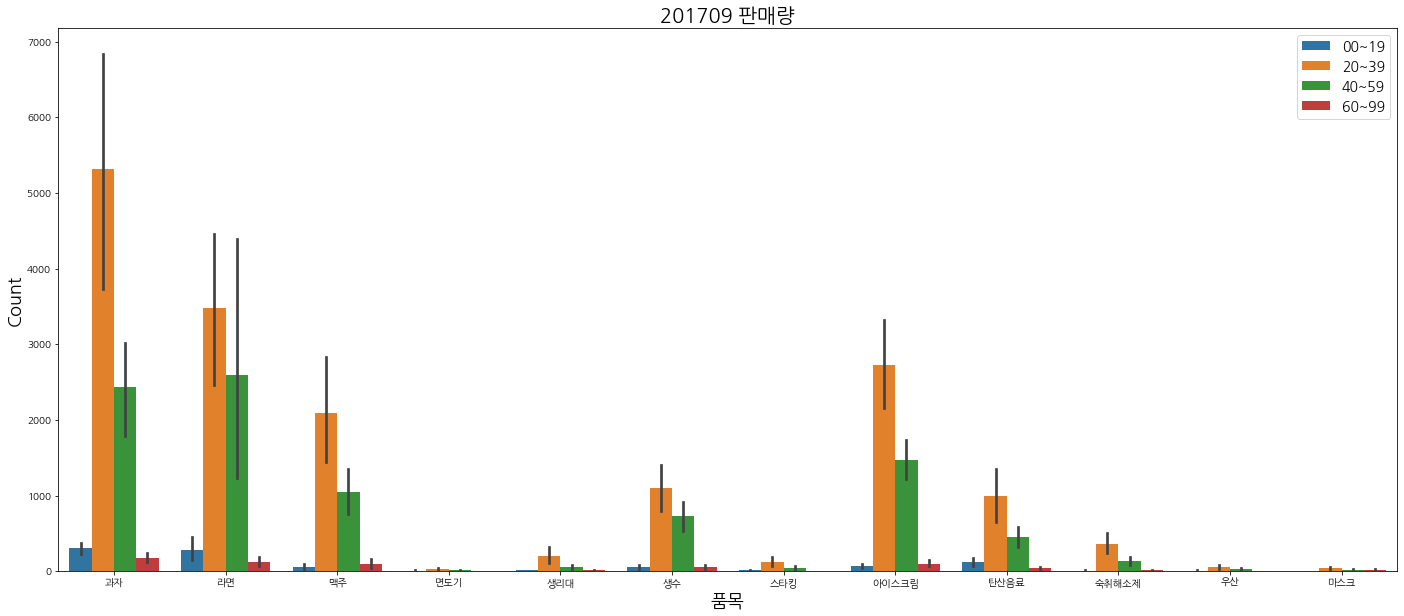

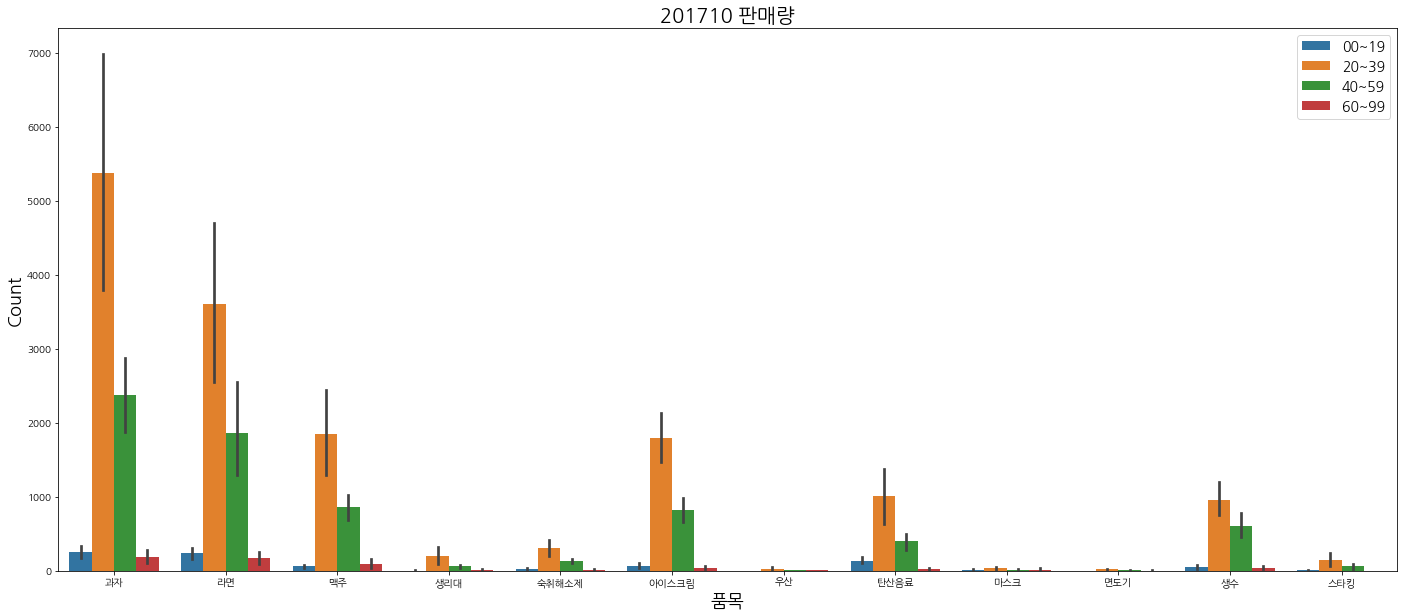

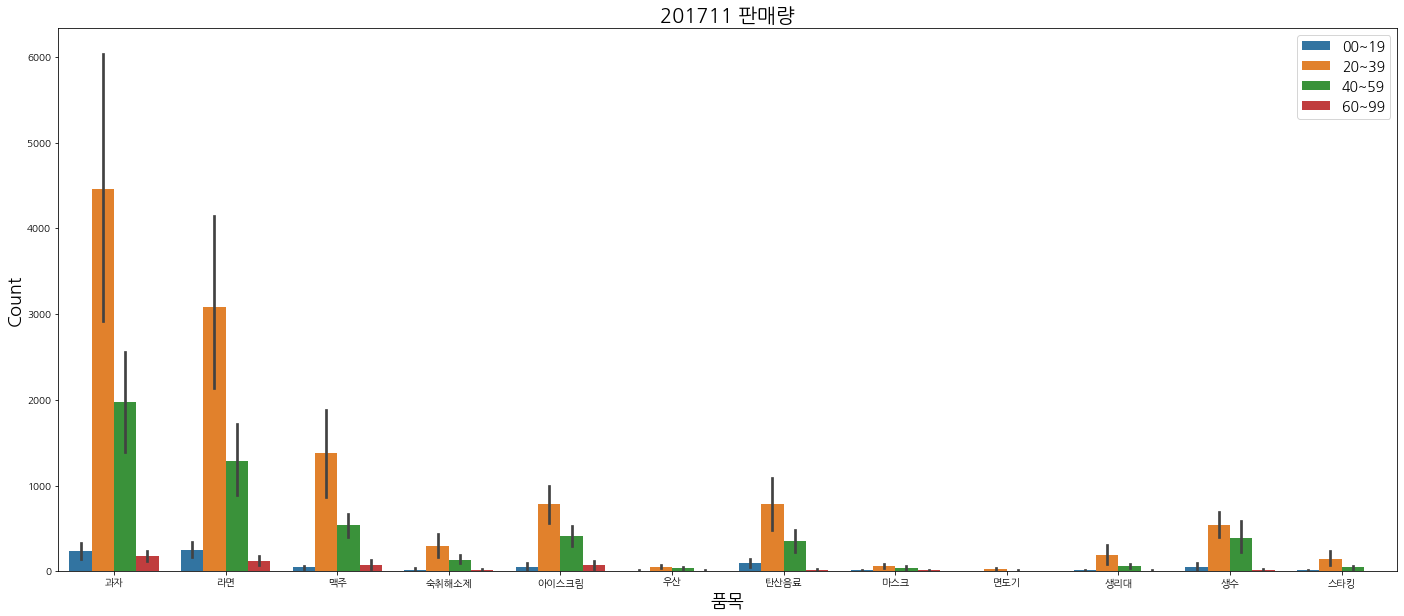

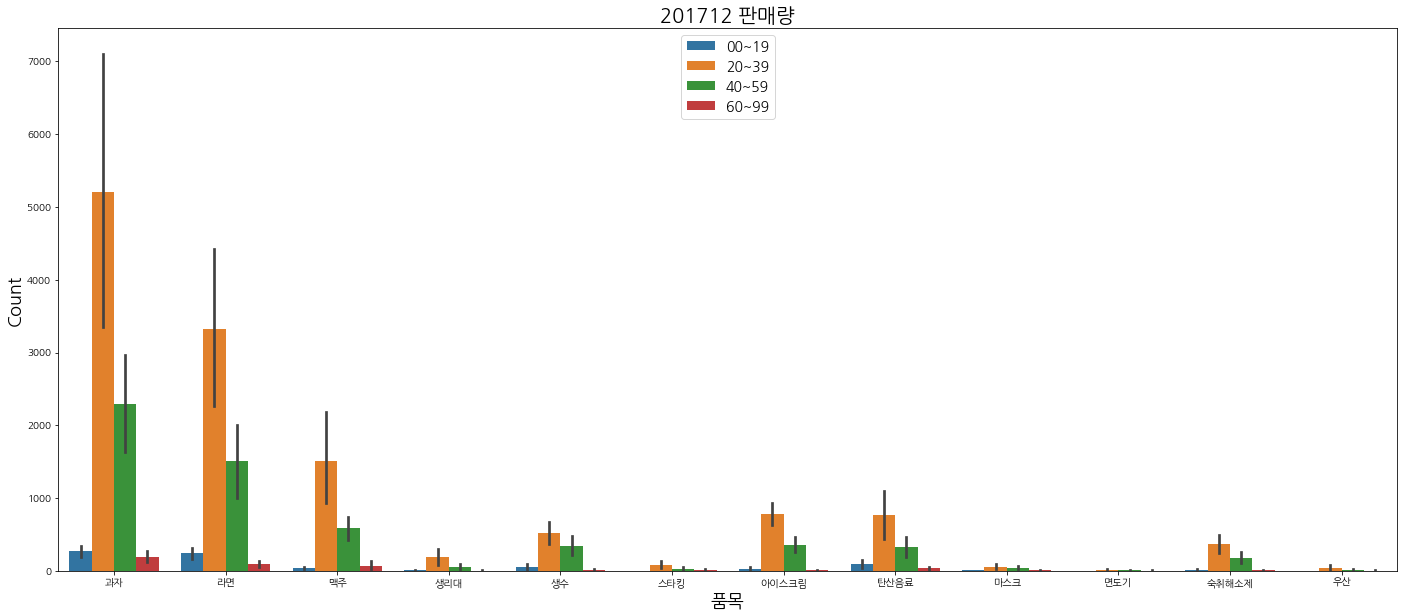

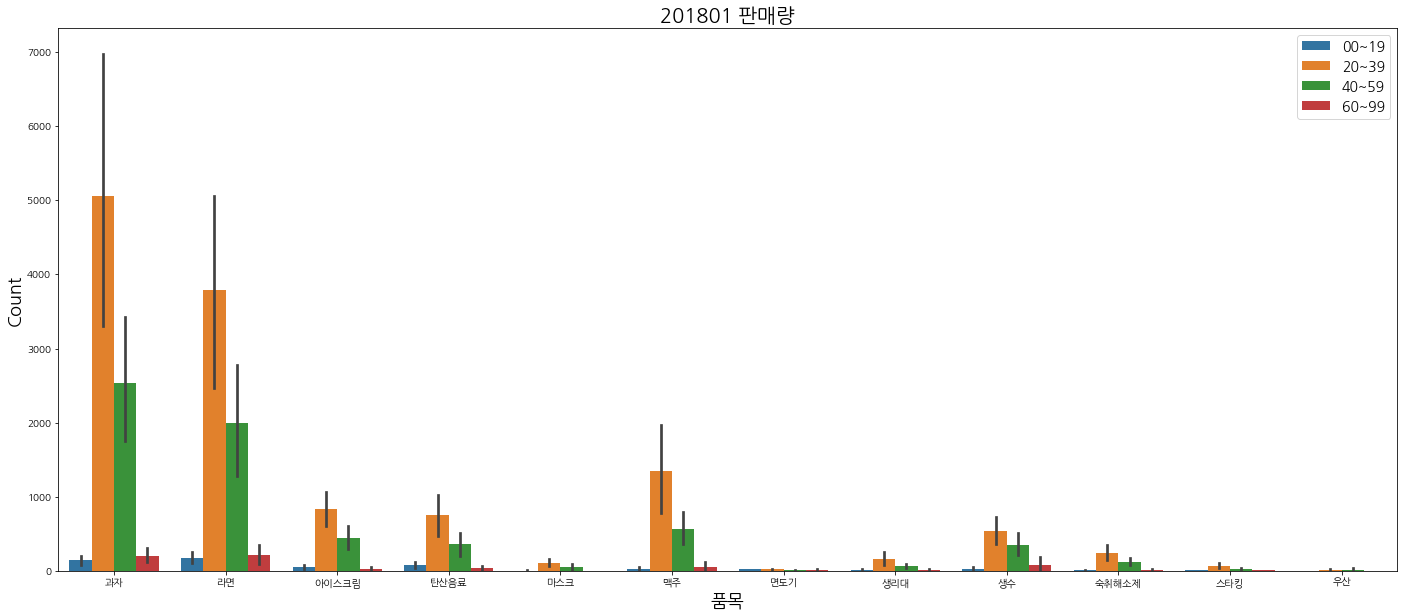

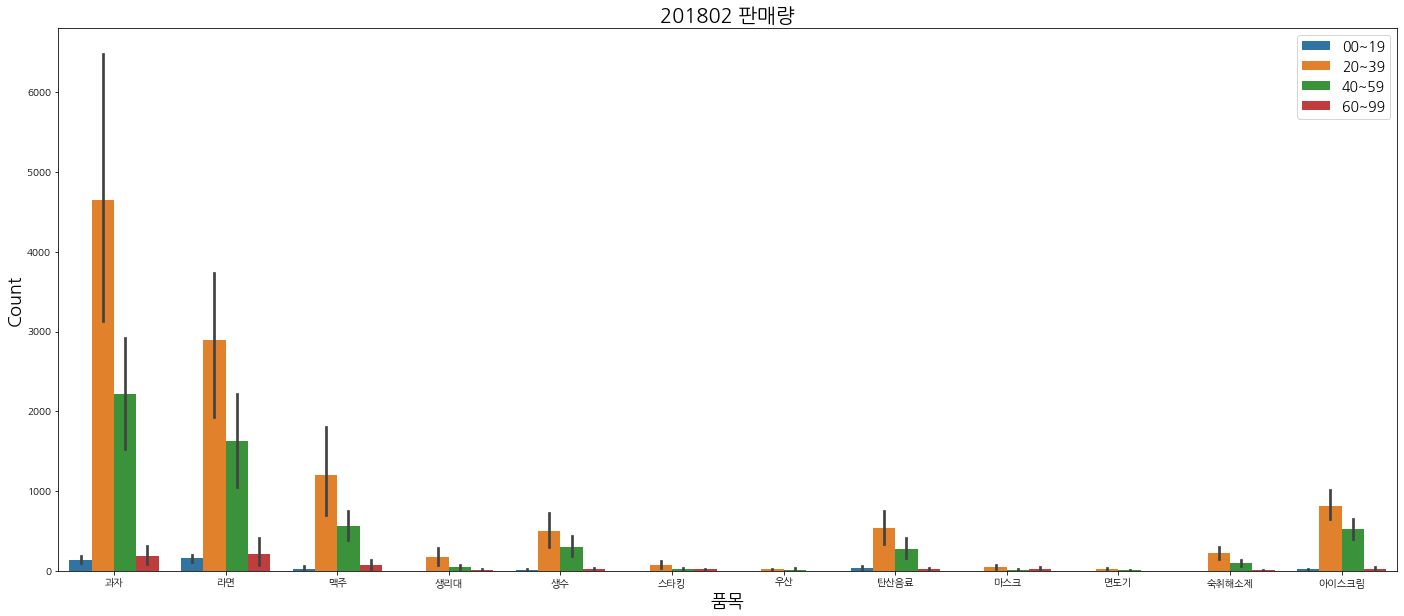

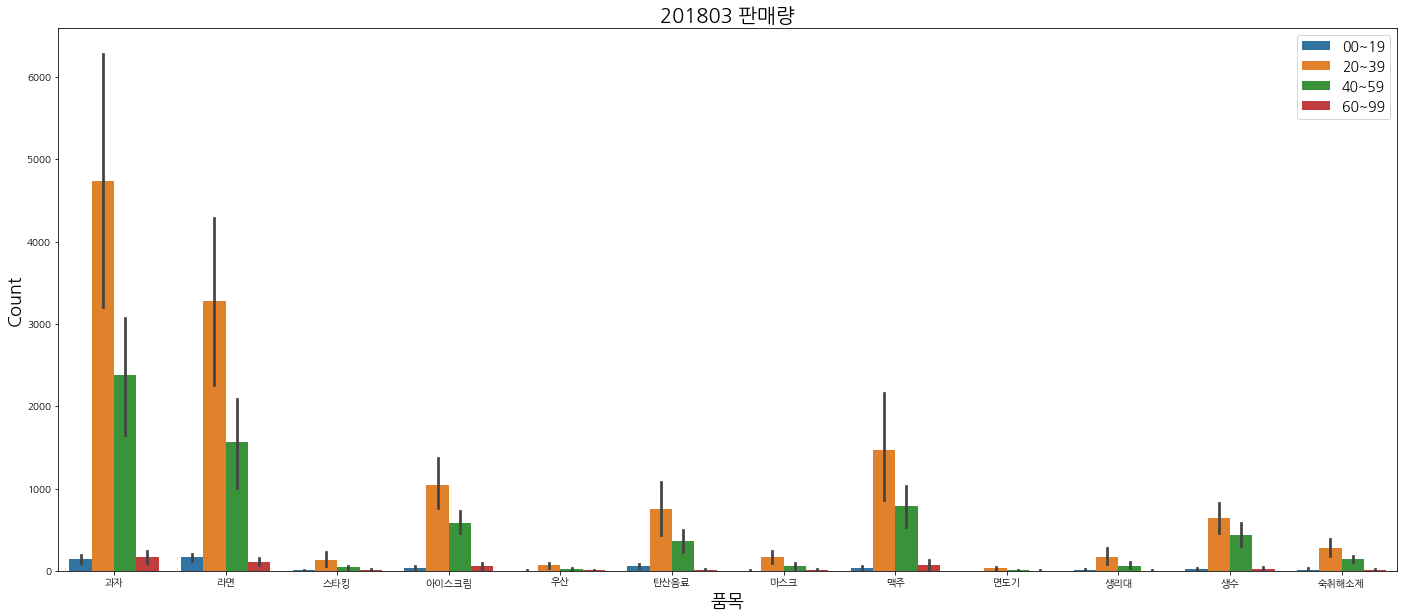

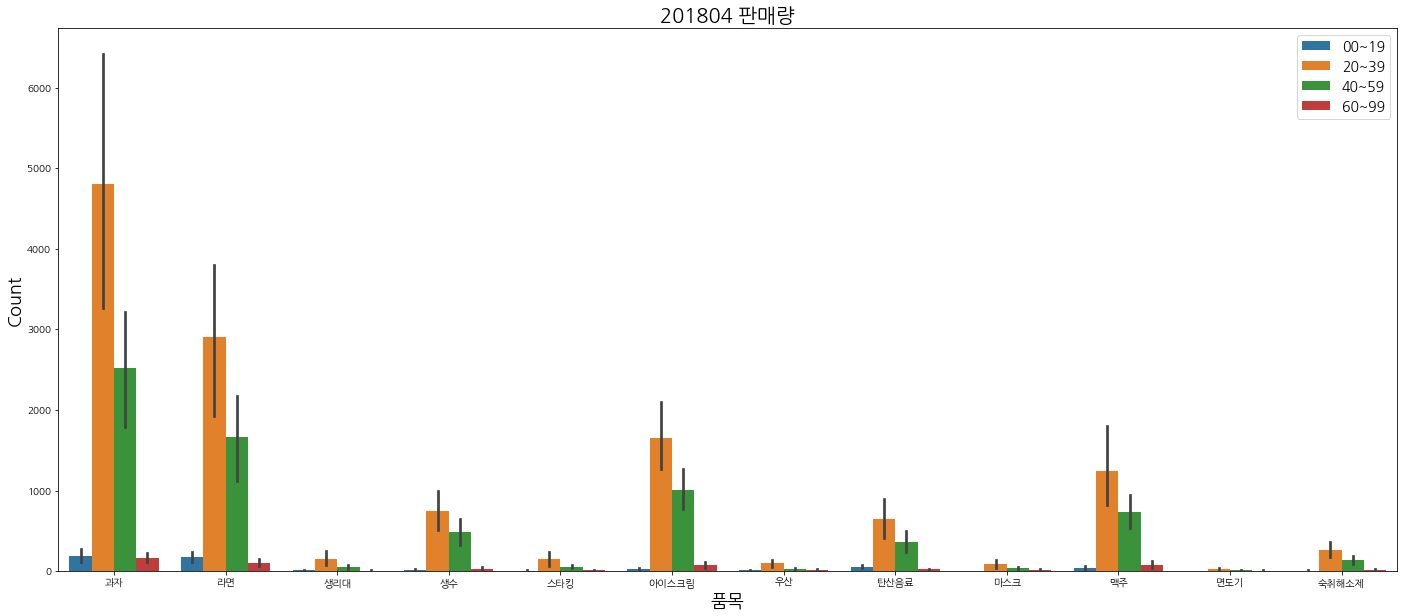

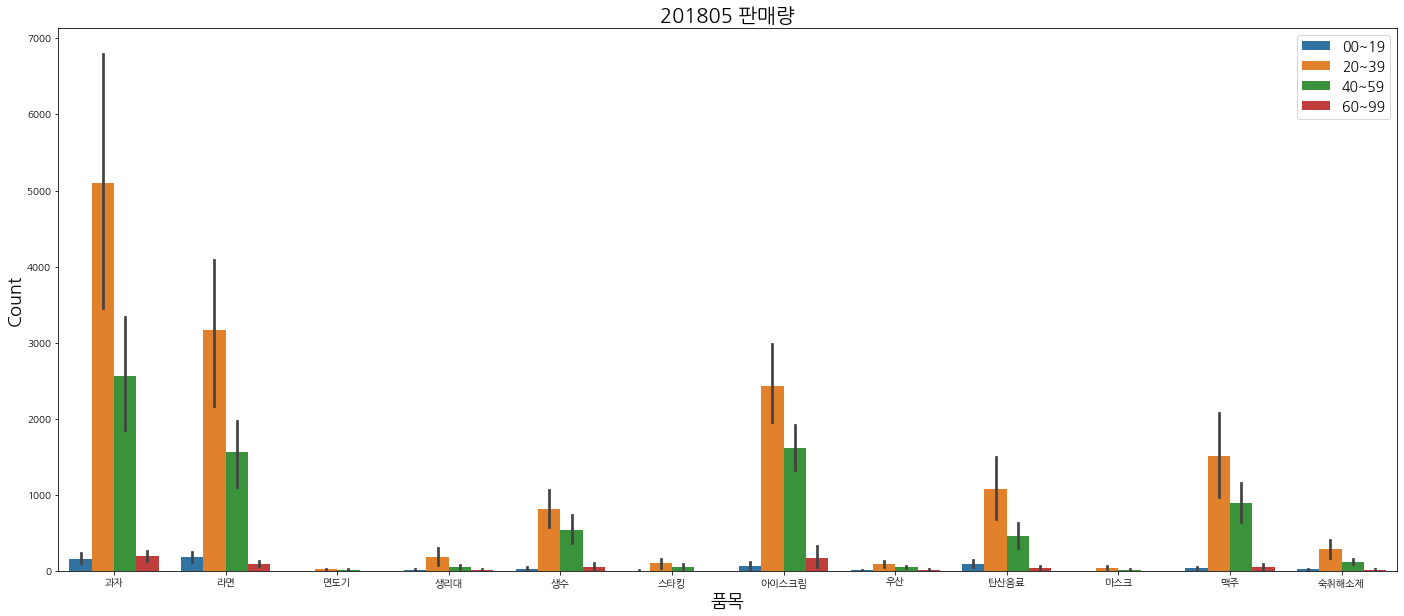

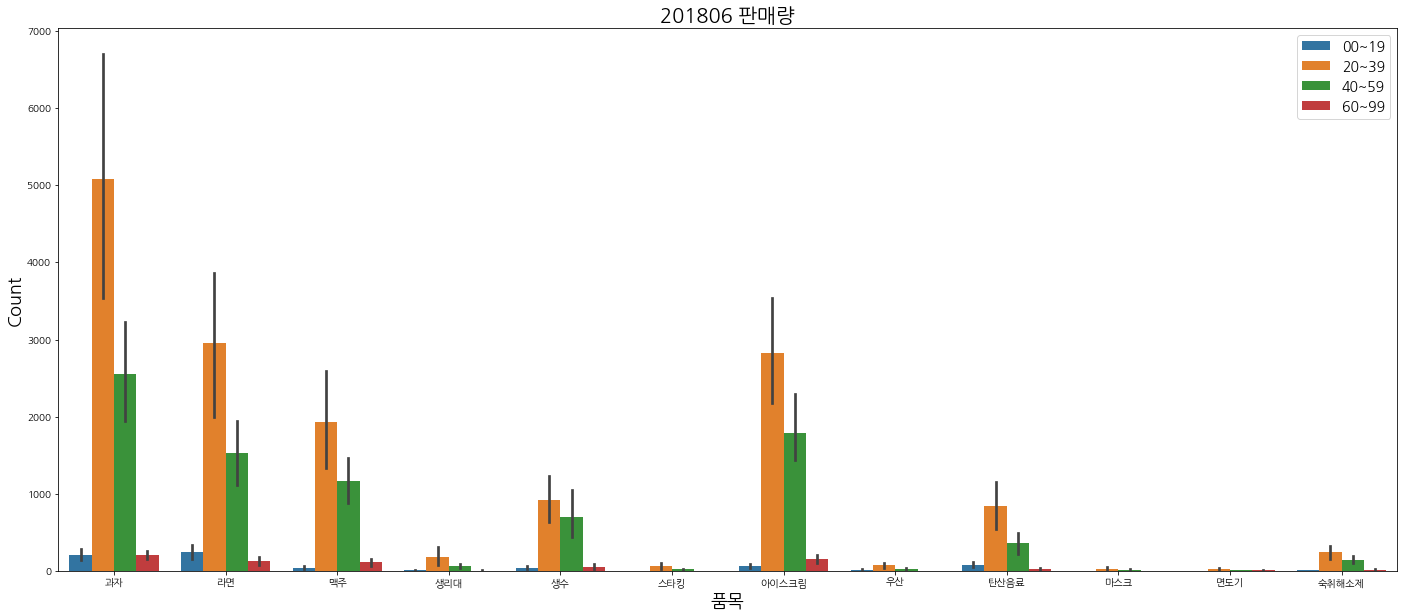

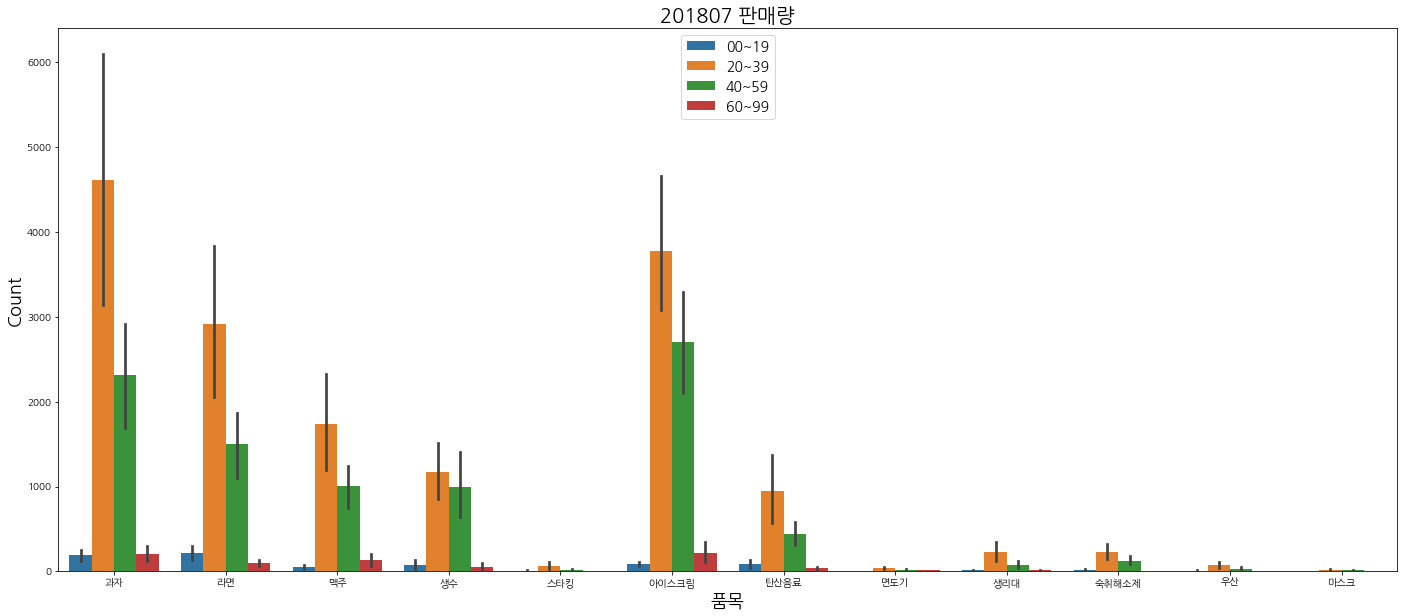

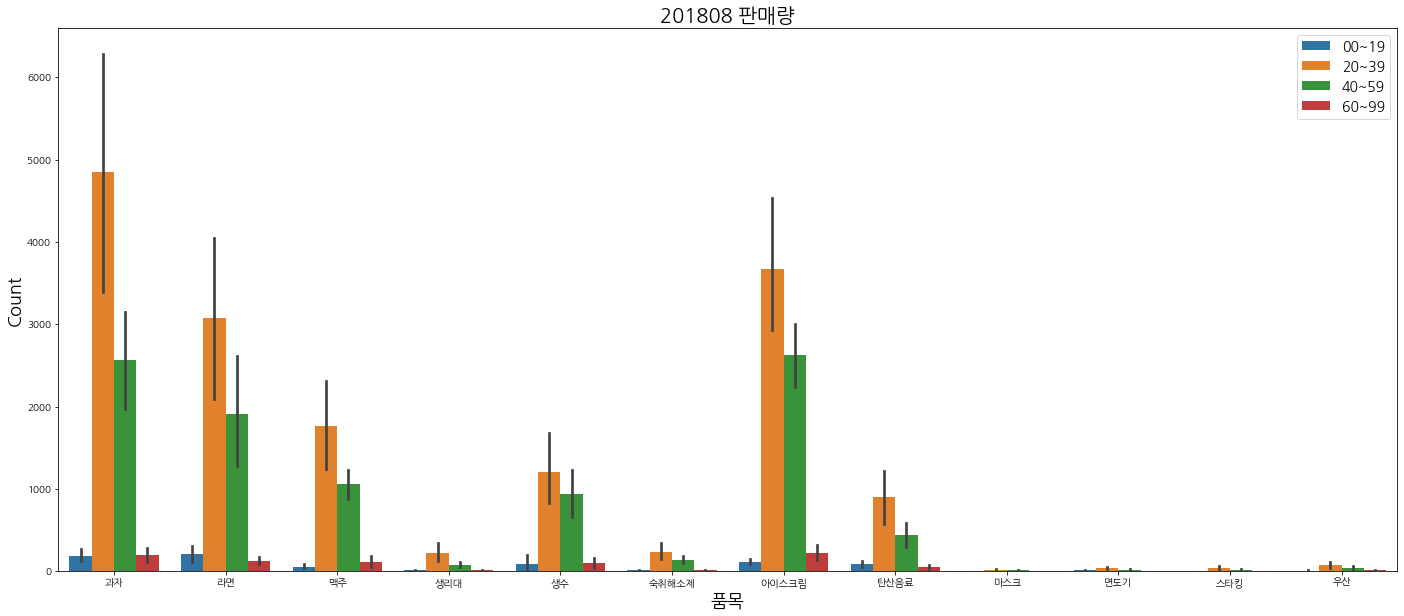

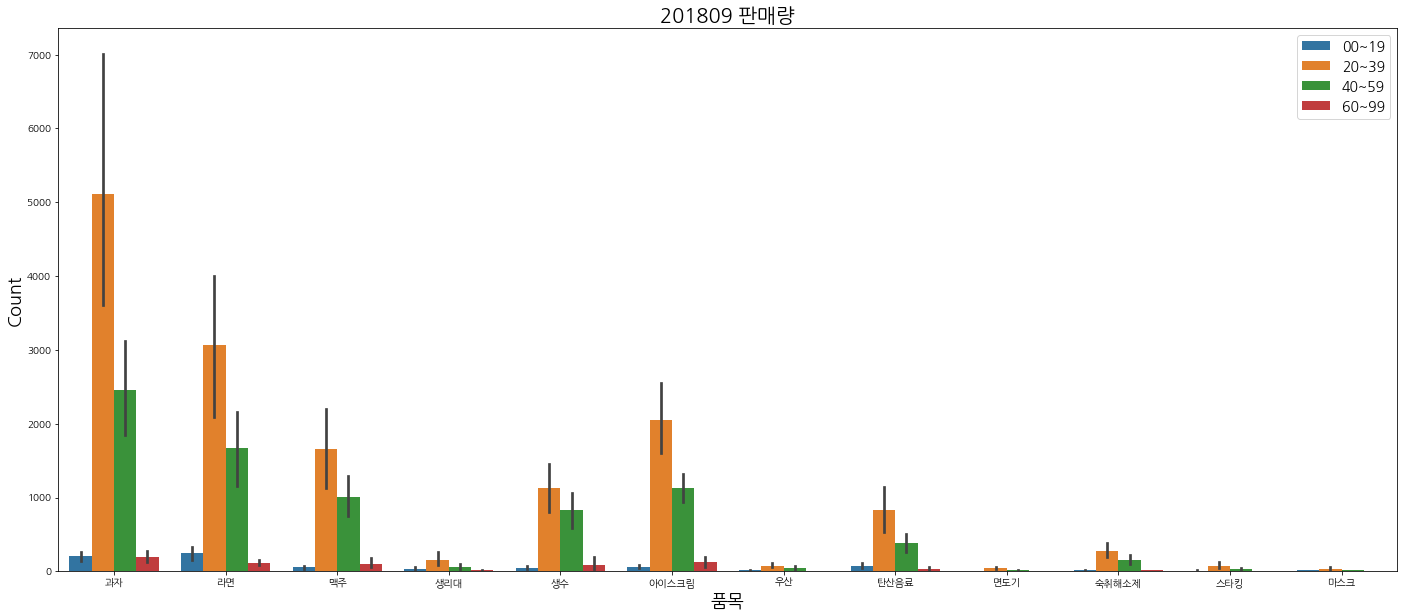

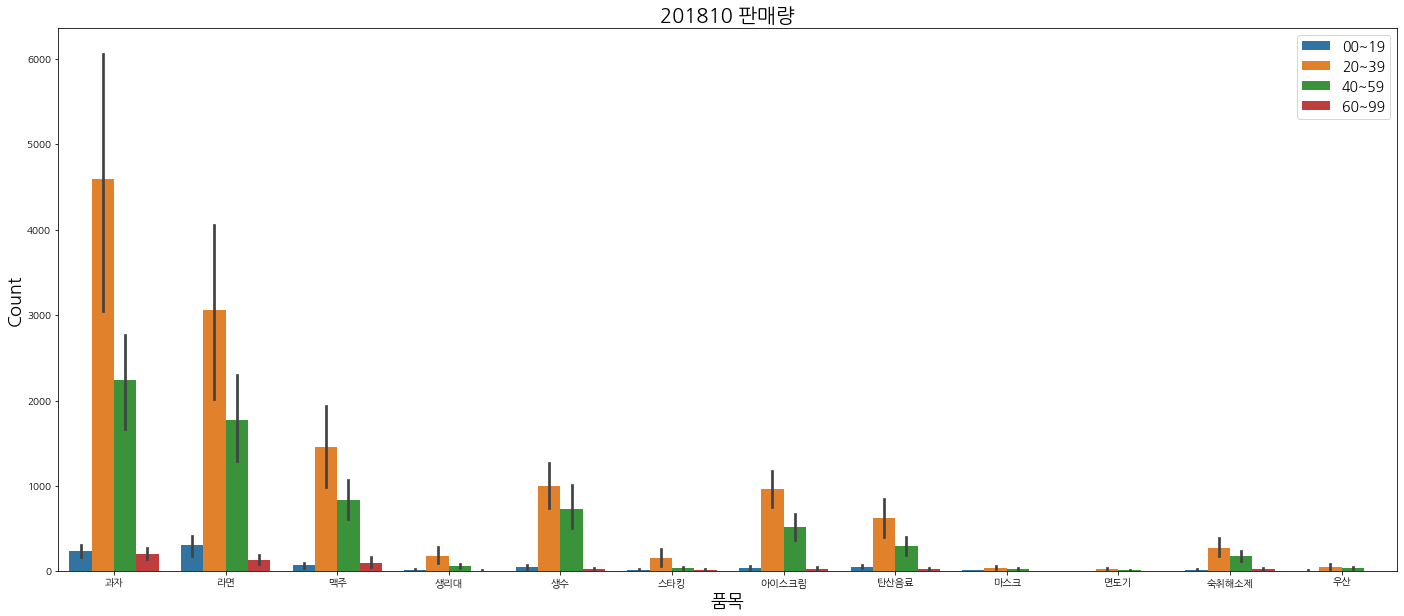

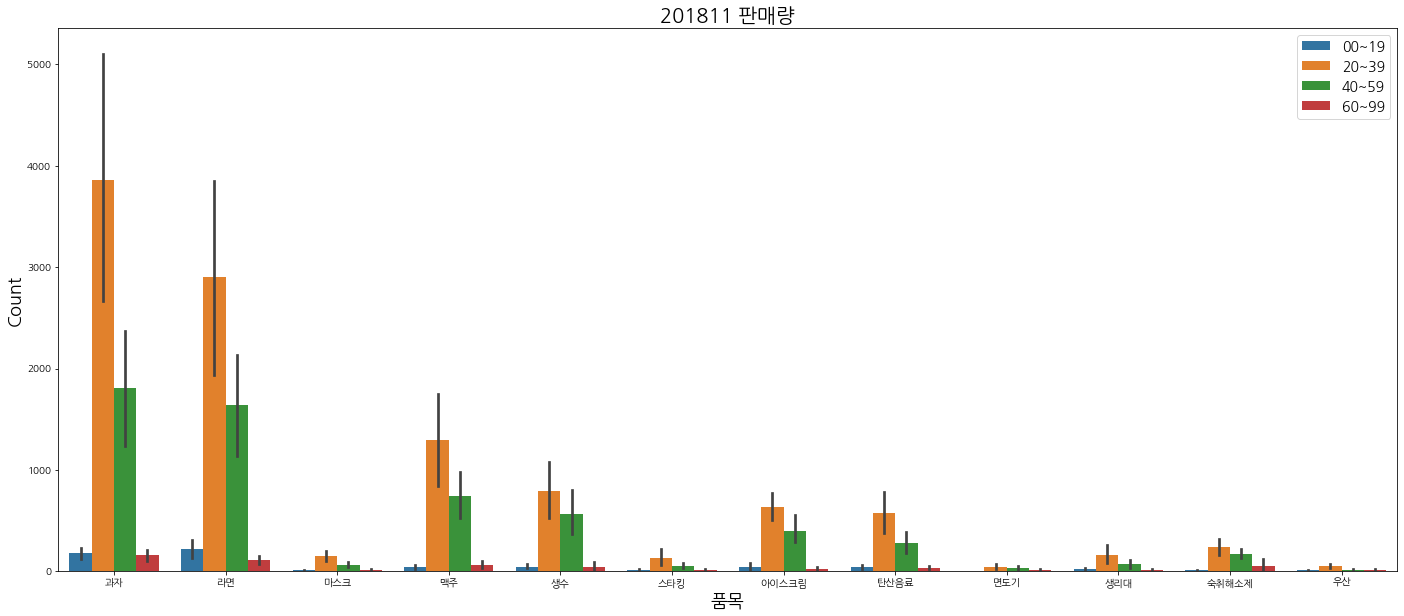

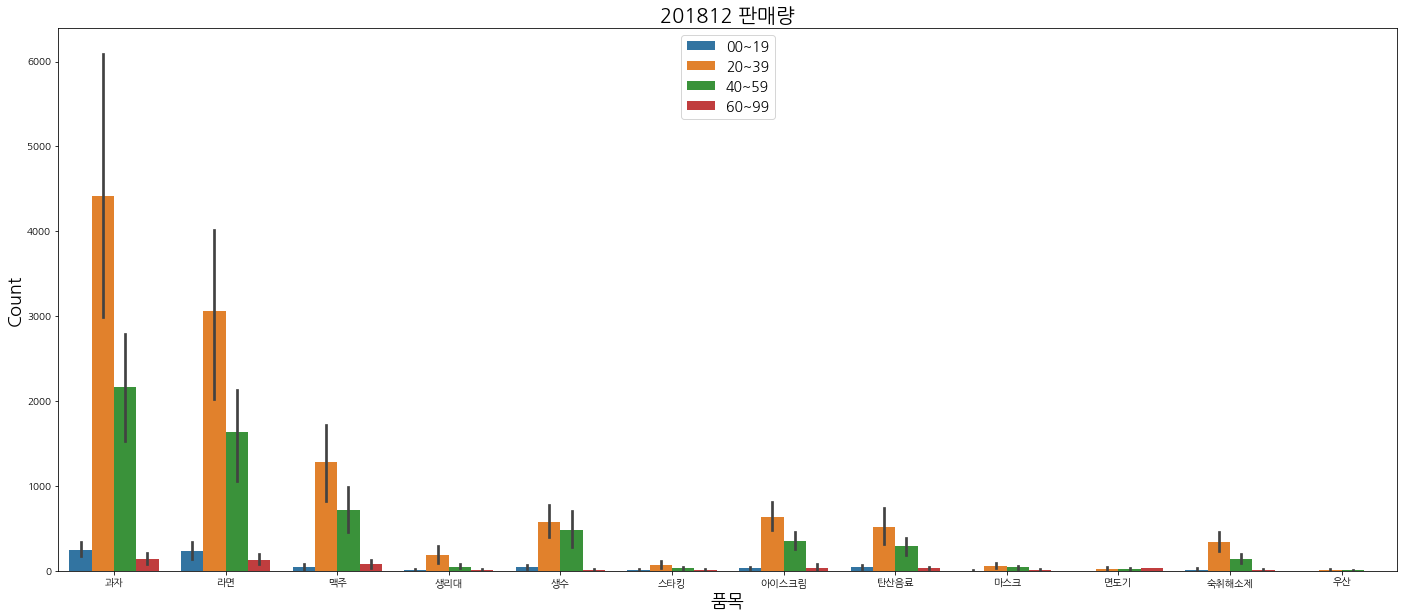

In [88]:
visualization(incheon_month_slice,full_month,category='korea_cvs.age_cd',title='인천')

# Part2

-------------------------------------------------------------

In [38]:
gwangjusi = gyunggido[gyunggido['korea_cvs.bor_nm']=='광주시']
sungnamsi = gyunggido[gyunggido['korea_cvs.bor_nm']=='성남시']

# 성남시 및 광주시 데이터 유의성 검증

In [42]:
def gender(dataframe):
    groupby = dataframe[['korea_cvs.sale_dt(month)','korea_cvs.gen_cd','korea_cvs.adj_qty','최고기온','최대풍속','최소기온','평균기온','평균풍속','합계강수량']]
    category_count = groupby.groupby(['korea_cvs.sale_dt(month)','korea_cvs.gen_cd']).sum()
    category_count.reset_index(inplace=True)
    category_count = category_count[['korea_cvs.sale_dt(month)','korea_cvs.gen_cd','korea_cvs.adj_qty']]
    category_count_M = category_count[category_count['korea_cvs.gen_cd']=='M']
    category_count_F = category_count[category_count['korea_cvs.gen_cd']=='F']
    category_count_M['datetime'] = pd.to_datetime(category_count_M['korea_cvs.sale_dt(month)'],format='%Y%m')
    category_count_F['datetime'] = pd.to_datetime(category_count_F['korea_cvs.sale_dt(month)'],format='%Y%m')
    category_count_F.reset_index(inplace=True)
    category_count_M.reset_index(inplace=True)
    category_count_M =category_count_M[['datetime','korea_cvs.gen_cd','korea_cvs.adj_qty']]
    category_count_F =category_count_F[['datetime','korea_cvs.gen_cd','korea_cvs.adj_qty']]
    return category_count_M,category_count_F

In [43]:
category_count_sungnam_M,category_count_sungnam_F = gender(sungnamsi)

<ipython-input-42-af98544bef06>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_count_M['datetime'] = pd.to_datetime(category_count_M['korea_cvs.sale_dt(month)'],format='%Y%m')
<ipython-input-42-af98544bef06>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_count_F['datetime'] = pd.to_datetime(category_count_F['korea_cvs.sale_dt(month)'],format='%Y%m')


In [44]:
category_count_gwangju_M,category_count_gwangju_F = gender(gwangjusi)

<ipython-input-42-af98544bef06>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_count_M['datetime'] = pd.to_datetime(category_count_M['korea_cvs.sale_dt(month)'],format='%Y%m')
<ipython-input-42-af98544bef06>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_count_F['datetime'] = pd.to_datetime(category_count_F['korea_cvs.sale_dt(month)'],format='%Y%m')


# 계절성을 보임과 동시에 1년 단위로 본다면 정규분포를 띄고있습니다.

# 1. 남성과 여성의 판매량 비교

In [46]:
def visual_sido(dataframe,sido,gender):
    plt.figure(figsize=(18,12))
    plt.plot(dataframe['datetime'],dataframe['korea_cvs.adj_qty'])
    plt.title('{} {} 판매량'.format(sido,gender),size=35)
    plt.xlabel('년도',size=25)
    plt.ylabel('Count',size=25)


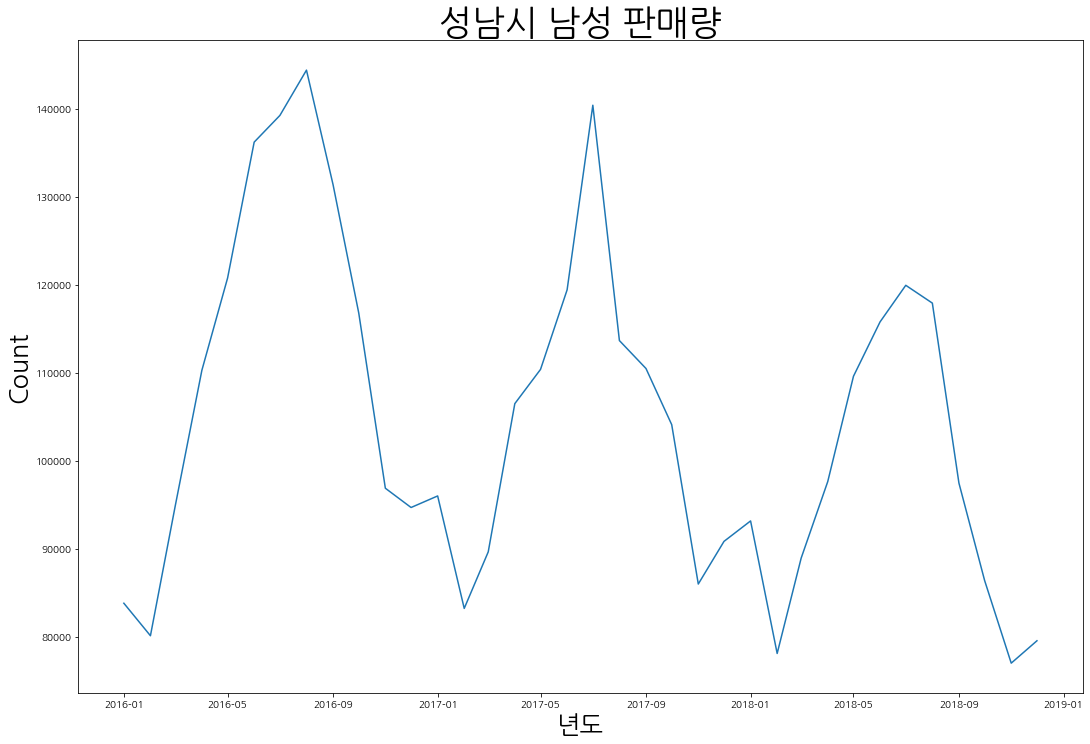

In [47]:
visual_sido(category_count_sungnam_M,'성남시','남성')

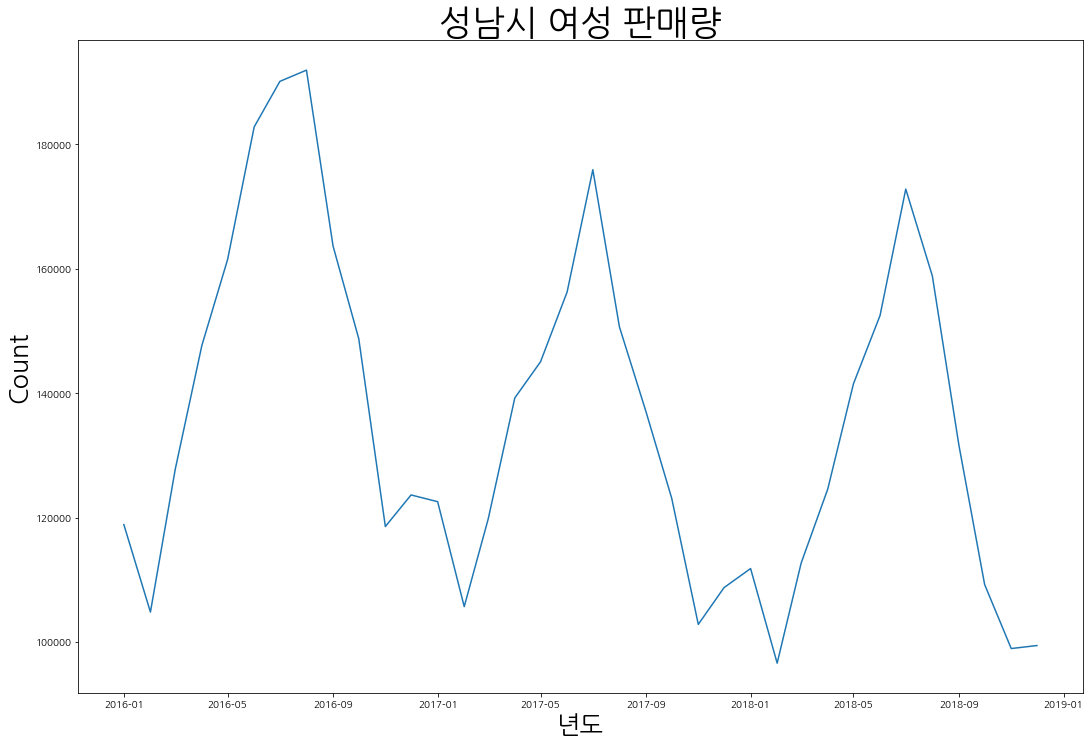

In [48]:
visual_sido(category_count_sungnam_F,'성남시','여성')

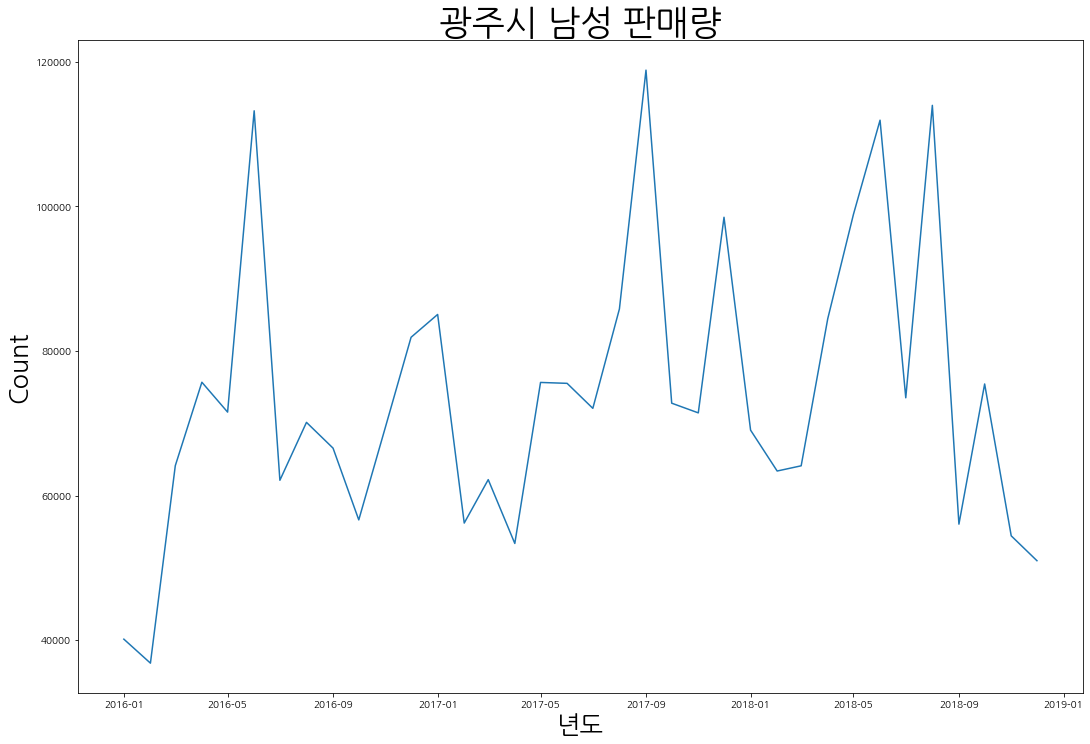

In [49]:
visual_sido(category_count_gwangju_M,'광주시','남성')

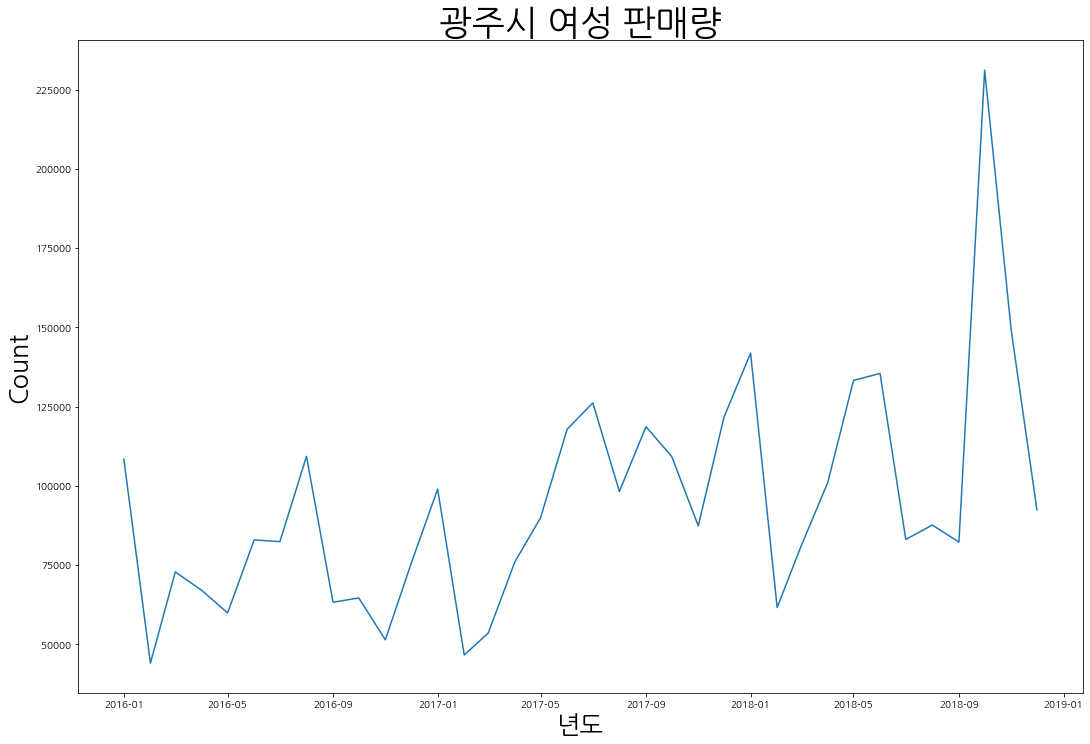

In [50]:
visual_sido(category_count_gwangju_F,'광주시','여성')

# 확인결과
- 남성보다는 여성이 판매량을 더 많이 차지하고 있고, 둘의 공통점으로는 계절성을 띄고있으며, 6~9월이 가장 판매가 많이 되는것을 확인할 수 있습니다.

# 2. 경기도 광주시와 경기도 성남시의 판매 비교 및 온도와의 상관성 분석

# 온도별 점그래프를 이용하여 확인검증

In [70]:
# 날짜별로 Groupby를 진행하여 기온별로 확인하기 위해 전처리를 진행
def sido_temp(dataframe):
    dataframe = dataframe[['korea_cvs.sale_dt(month)','최고기온','최대풍속','최소기온','평균기온','평균풍속','합계강수량']]

    
    groupby_temp = dataframe.groupby('korea_cvs.sale_dt(month)').mean()
    groupby_temp.reset_index(inplace=True)
    groupby_temp['datetime'] = pd.to_datetime(groupby_temp['korea_cvs.sale_dt(month)'],format='%Y%m')
    groupby_temp = groupby_temp[['datetime','최고기온','최대풍속','최소기온','평균기온','평균풍속','합계강수량']]
    return groupby_temp
    

In [71]:
sungnam_temp = sido_temp(sungnamsi)

In [72]:
gwangju_temp = sido_temp(gwangjusi)

In [73]:
# 위에서 나눠진 여성과 남성을 다시 합치는 작업
total_sungnam_count = category_count_sungnam_F['korea_cvs.adj_qty'] + category_count_sungnam_M['korea_cvs.adj_qty']
total_gwangju_count = category_count_gwangju_M['korea_cvs.adj_qty'] + category_count_gwangju_F['korea_cvs.adj_qty']

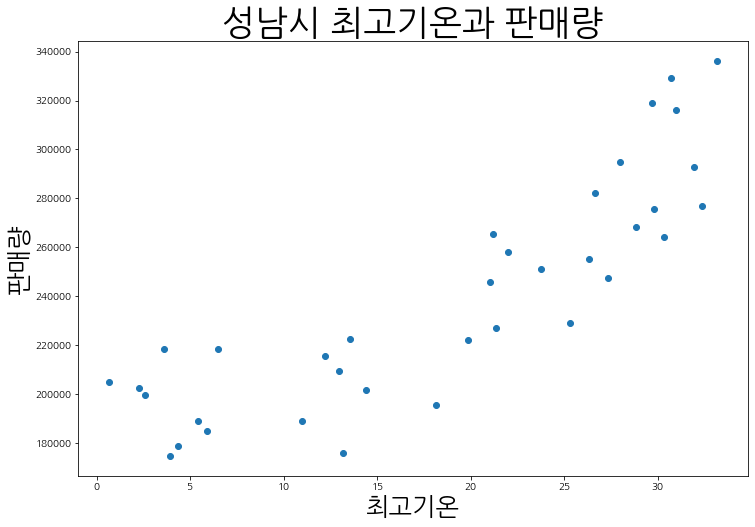

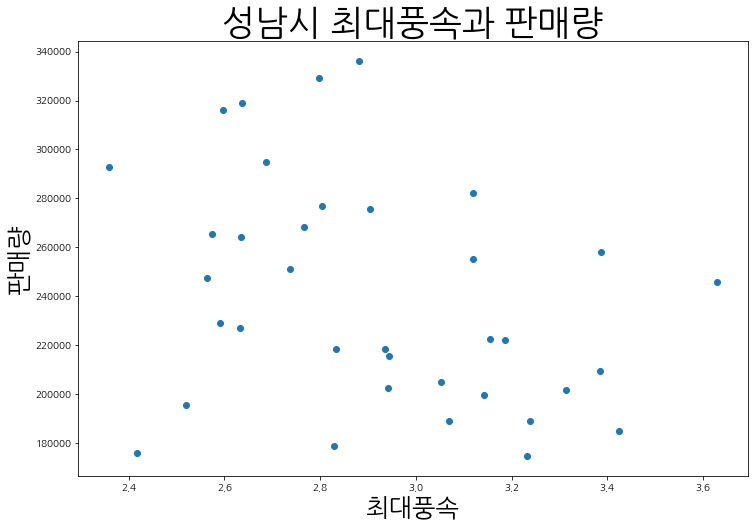

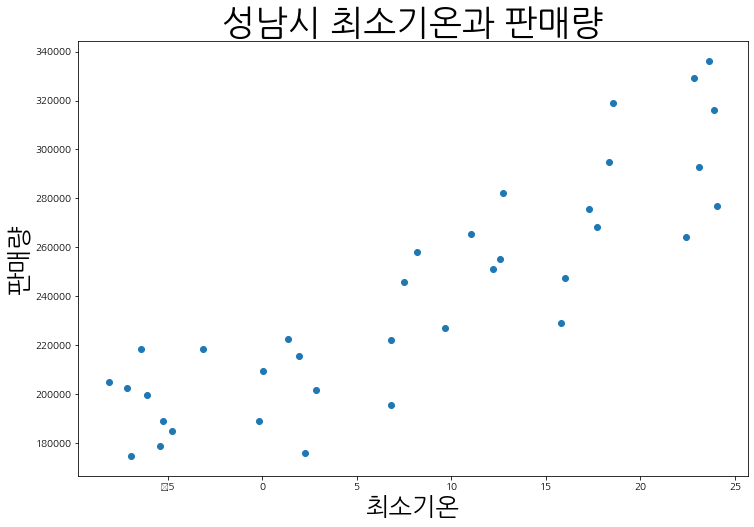

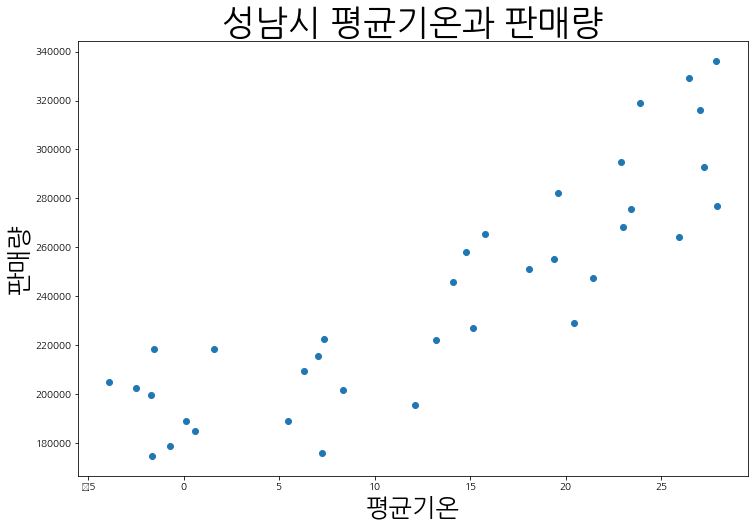

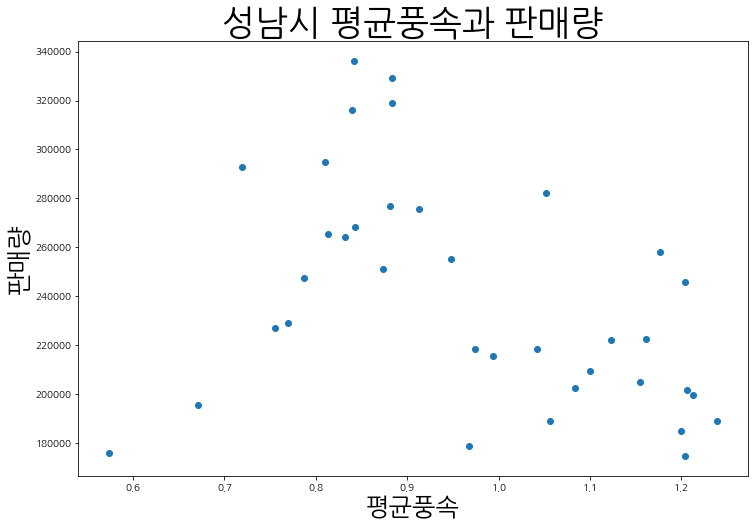

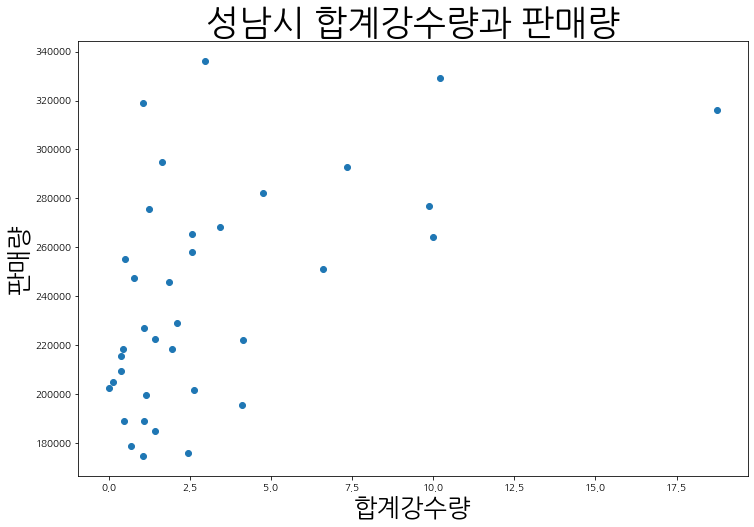

In [74]:
# 성남시 온도별 판매량 비교 그래프
columns = ['최고기온','최대풍속','최소기온','평균기온','평균풍속','합계강수량']
for col in columns:
    plt.figure(figsize=(12,8))
    plt.scatter(sungnam_temp[col],total_sungnam_count)
    plt.title('성남시 {}과 판매량'.format(col),size=35)
    plt.xlabel('{}'.format(col),size=25)
    plt.ylabel('판매량',size=25)

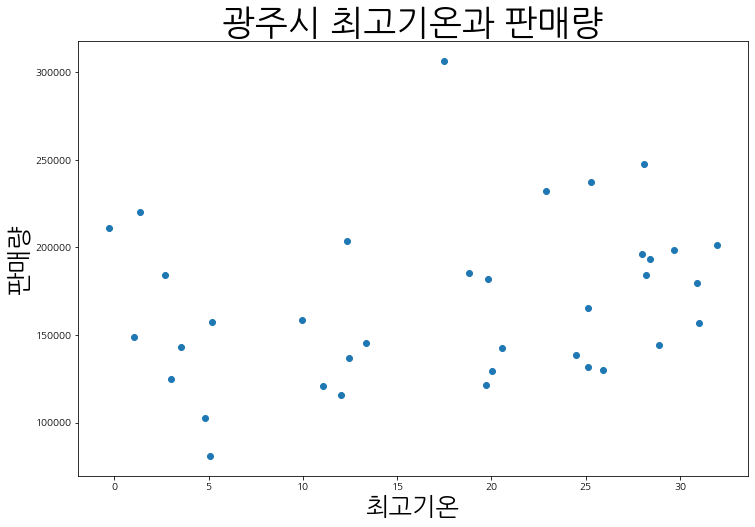

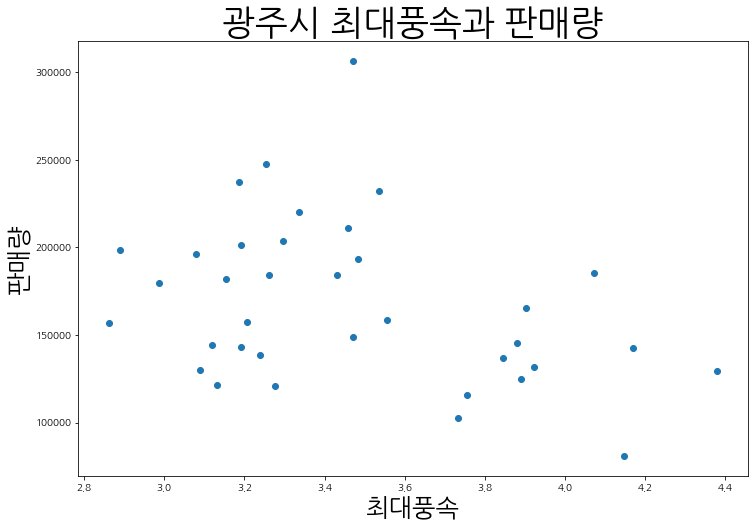

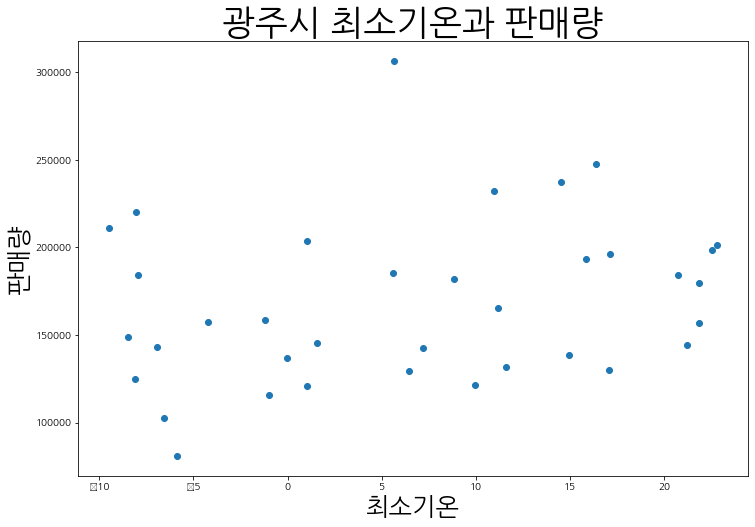

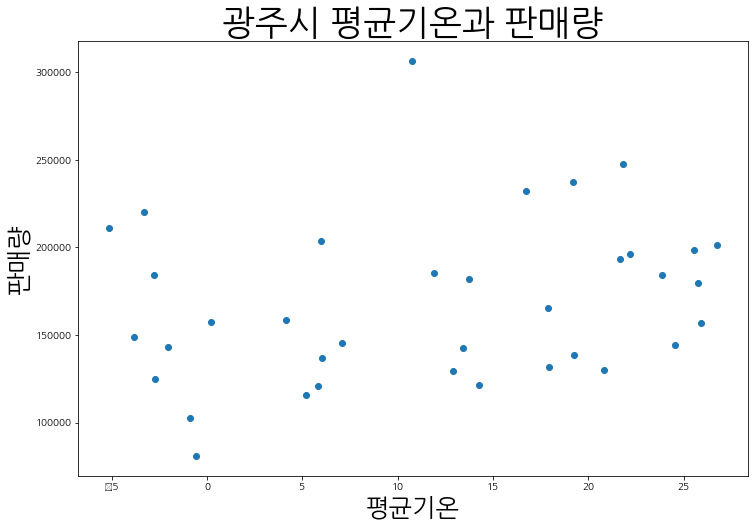

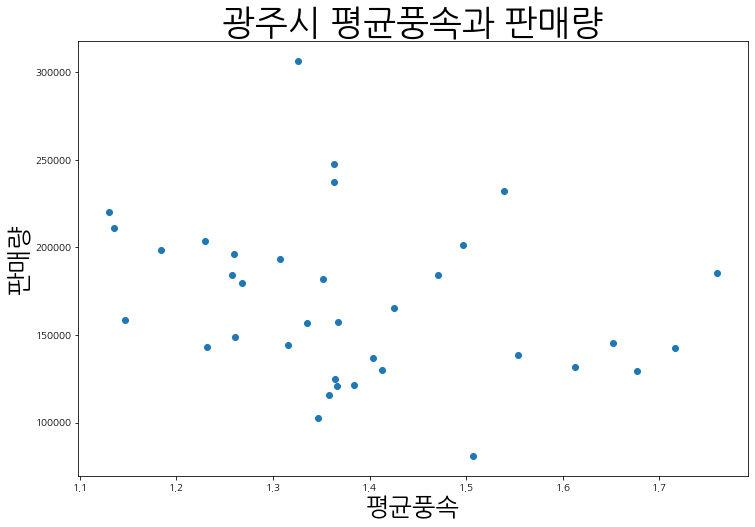

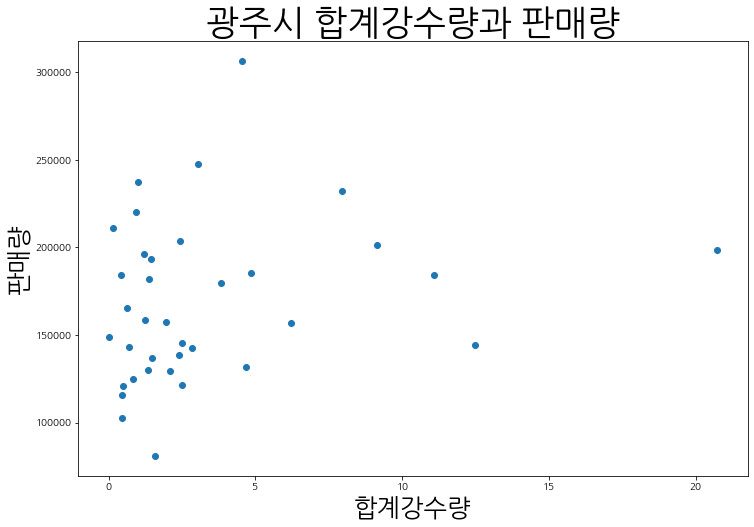

In [75]:
# 광주시 온도별 판매량 비교 그래프
columns = ['최고기온','최대풍속','최소기온','평균기온','평균풍속','합계강수량']
for col in columns:
    plt.figure(figsize=(12,8))
    plt.scatter(gwangju_temp[col],total_gwangju_count)
    plt.title('광주시 {}과 판매량'.format(col),size=35)
    plt.xlabel('{}'.format(col),size=25)
    plt.ylabel('판매량',size=25)

# 확인결과 : 
- 경기도 성남시는 온도와 상관성이 있는것으로 확인됐습니다.
- 광주시는 상관관계가 없음
- 가설 1. 기온과 판매량은 상관없음을 기각하고 대립가설인 기온과 판매량은 상관있음으로 판정됐습니다.
- 단, 광주는 예외
- 성남시는 기온이 올라갈수록 판매량이 증가하고 있는것을 확인하였고, 상관계수가 양의 상관관계를 유지하고 있습니다.

In [76]:
print('성남시')
print('상관계수 : ',(stats.pearsonr(sungnam_temp['평균기온'],total_sungnam_count)[0]),
     'P-value : ',(stats.pearsonr(sungnam_temp['평균기온'],total_sungnam_count)[1]))

성남시
상관계수 :  0.8697292505354522 P-value :  5.786996641351627e-12


In [77]:
print('광주시')
print('상관계수 : ',(stats.pearsonr(gwangju_temp['평균기온'],total_gwangju_count)[0]),
     'P-value : ',(stats.pearsonr(gwangju_temp['평균기온'],total_gwangju_count)[1]))

광주시
상관계수 :  0.2493108024105657 P-value :  0.1425553263075969


# 3. 광주시와 성남시의 판매량(count) 비교검증
- 가설 : 광주시와 성남시의 판매량은 차이가 없다.

# 등분산 검증
- 유의확률 80%로 등분산임을 확인했습니다.

In [87]:
lresult = stats.levene(total_sungnam_count, total_gwangju_count)
print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult))

LeveneResult(F) : 0.064 
p-value : 0.801


# T-test 검증결과

In [90]:
# 등분산이 아닌경우 equal_var=False 파라미터를 추가해서 진행합니다.
result = stats.ttest_ind(total_sungnam_count, total_gwangju_count)
print('t statistic : %.3f \np-value : %.3f' % (result))

t statistic : 6.601 
p-value : 0.000


In [93]:
print('성남시의 판매량과 광주시의 판매량 상관관계')
print('상관계수 : ',(stats.pearsonr(total_sungnam_count,total_gwangju_count)[0]),
     'P-value : ',(stats.pearsonr(total_sungnam_count,total_gwangju_count)[1]))

성남시의 판매량과 광주시의 판매량 상관관계
상관계수 :  0.11947103728167645 P-value :  0.4876695573535495


# 확인결과:
- T-Test 결과 가설인 성남시와 광주시의 차이가 없음을 기각하고, 차이가 있음을 알 수 있습니다.
- 둘의 판매량은 T-test로는 유의성을 확인하였고, 상관관계로는 의미가 없음을 알 수 있습니다.

# 최종 결론
- 남성보단 여성이 편의점을 더 이용을 하고있고, 성남시는 광주시보다 판매량이 계절성을 띄고있으며, 주로 판매되는 월은 6~9월 입니다.
- 실제로 온도와 판매량은 상관관계가 있었으며, 성남시의 판매량과 광주시의 판매량은 등분산을 띄고있습니다.
- 그리고 비가오기 시작하면 판매량은 감소추세를 보이는가 싶다가도 비가 더 올때는 오히려 판매량이 증가함을 알 수 있습니다.
- 그리고 바람이 많이 부는 날에는 판매량이 감소하며, 이는 비가 많이 올시하고는 다르게 많이 불수록 판매량은 줄어듭니다.
- 성남시의 판매량과 광주시의 판매량은 차이가 있으며 이를 T-test로 검증 하였습니다.
- 분석 방법론은 애자일 방식을 적용하였으며, 이론-분석-검증을 반복 및 번복하여 진행하였습니다.
- 감사합니다.